Import necessary libraries.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

# Loading the datasets

In [2]:
plant_gen = pd.read_csv('../data/Plant_2_Generation_Data.csv')
plant_weat = pd.read_csv('../data/Plant_2_Weather_Sensor_Data.csv')

# Convert DATR_TIME from string to datetime
plant_gen['DATE_TIME'] = pd.to_datetime(plant_gen['DATE_TIME'])
plant_weat['DATE_TIME'] = pd.to_datetime(plant_weat['DATE_TIME'])

In [3]:
plant_gen.columns, plant_weat.columns

(Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
        'DAILY_YIELD', 'TOTAL_YIELD'],
       dtype='object'),
 Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
        'MODULE_TEMPERATURE', 'IRRADIATION'],
       dtype='object'))

In [4]:
plant_gen.SOURCE_KEY.unique(), plant_gen.PLANT_ID.unique(), plant_weat.SOURCE_KEY.unique(), plant_weat.PLANT_ID.unique()

(array(['4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL', '9kRcWv60rDACzjR',
        'Et9kgGMDl729KT4', 'IQ2d7wF4YD8zU1Q', 'LYwnQax7tkwH5Cb',
        'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv', 'NgDl19wMapZy17u',
        'PeE6FRyGXUgsRhN', 'Qf4GUc1pJu5T6c6', 'Quc1TzYxW2pYoWX',
        'V94E5Ben1TlhnDV', 'WcxssY2VbP4hApt', 'mqwcsP2rE7J0TFp',
        'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz', 'q49J1IKaHRwDQnt',
        'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb', 'xMbIugepa2P7lBB',
        'xoJJ8DcxJEcupym'], dtype=object),
 array([4136001]),
 array(['iq8k7ZNt4Mwm3w0'], dtype=object),
 array([4136001]))

In [5]:
plt.style.use('seaborn')

In [6]:
def datetime_vs(df, col1, col2=None):
    for _, gp in df.groupby(df['DATE_TIME'].dt.dayofyear):
        plt.figure(figsize=(15, 10))
        plt.plot_date(gp['DATE_TIME'], gp[col1], label=col1)
        if col2:
            scale = gp[col1].max() / gp[col2].max()
            plt.plot_date(gp['DATE_TIME'], gp[col2] * scale, label=col2)
        plt.legend(loc="upper left")
        plt.show()

# Graphs 
* AMBIENT_TEMPERATURE vs MODULE_TEMPERATURE
* AMBIENT_TEMPERATURE vs IRRADIATION
* MODULE_TEMPERATURE vs IRRADIATION

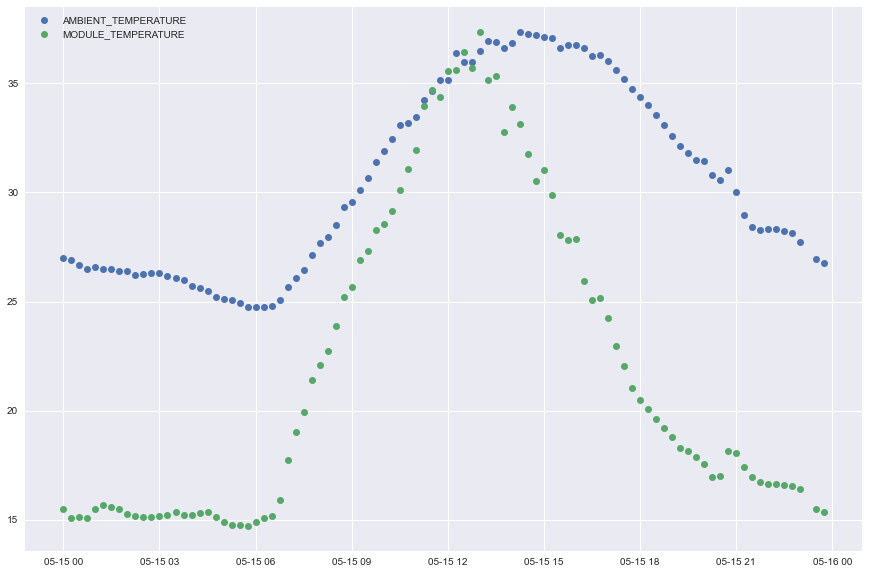

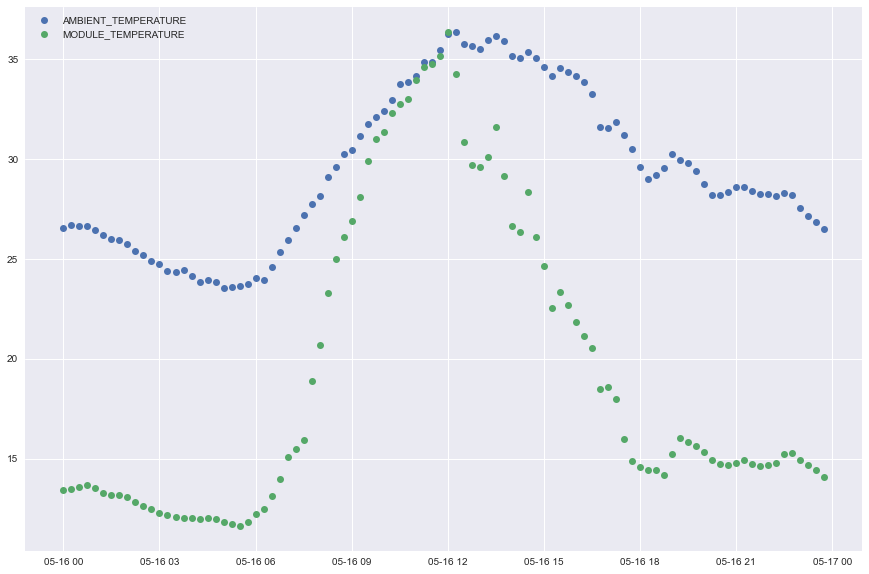

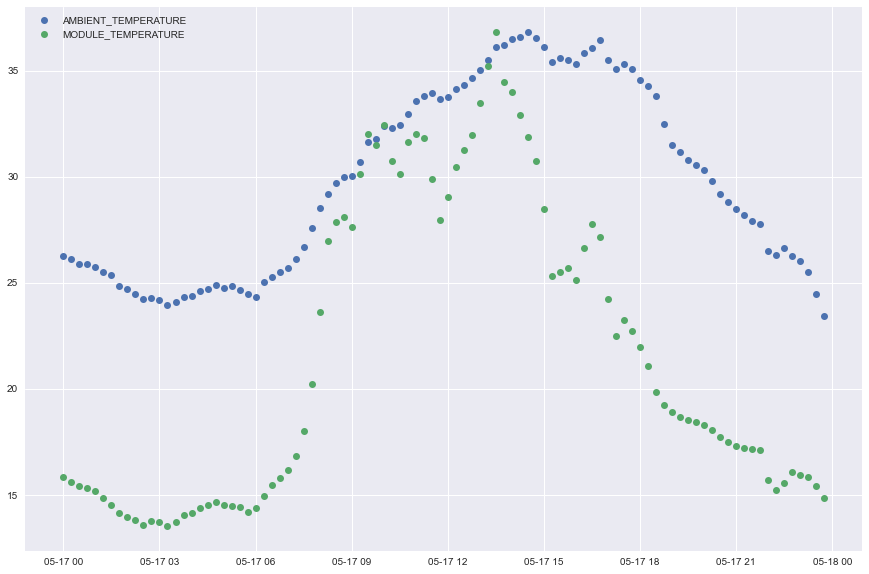

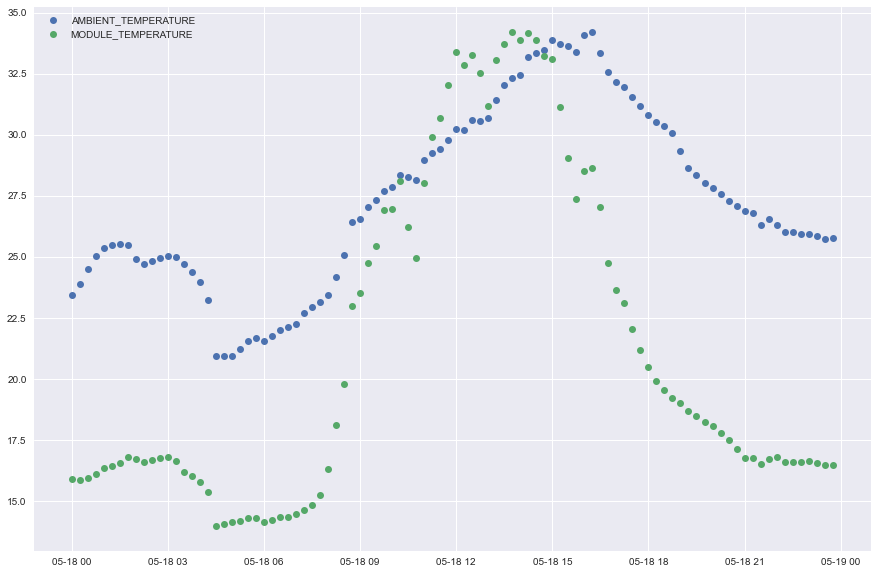

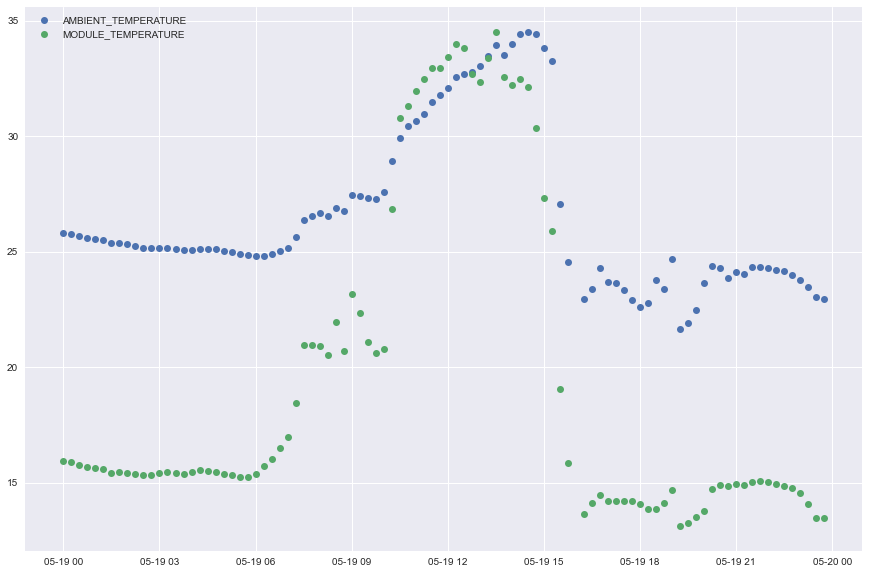

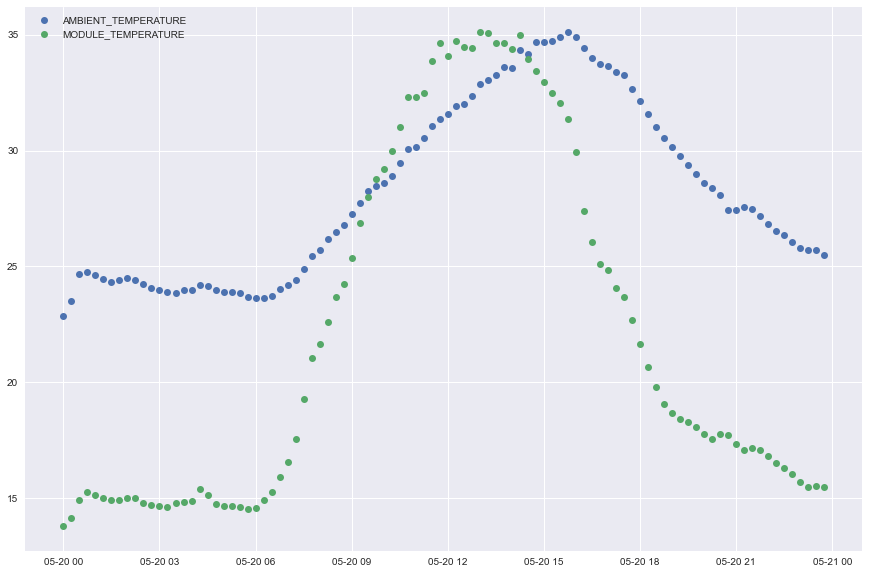

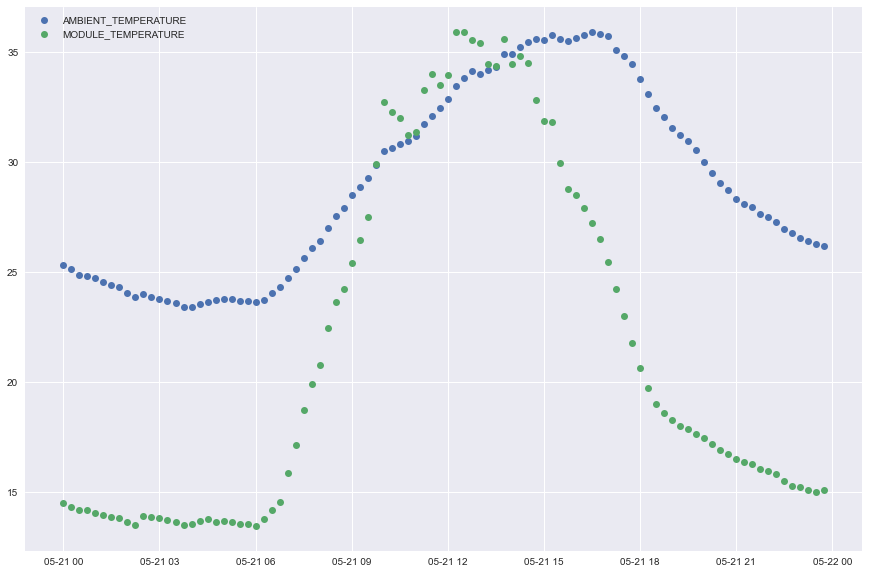

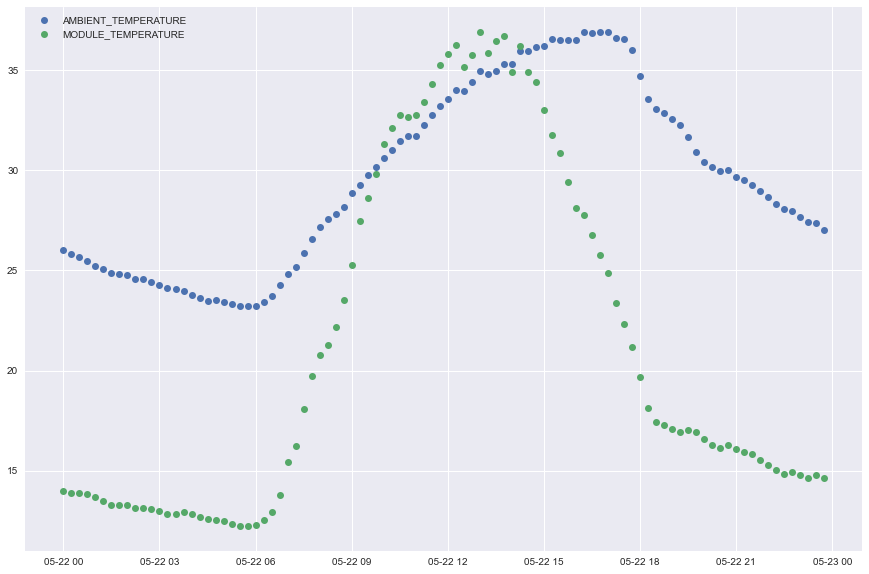

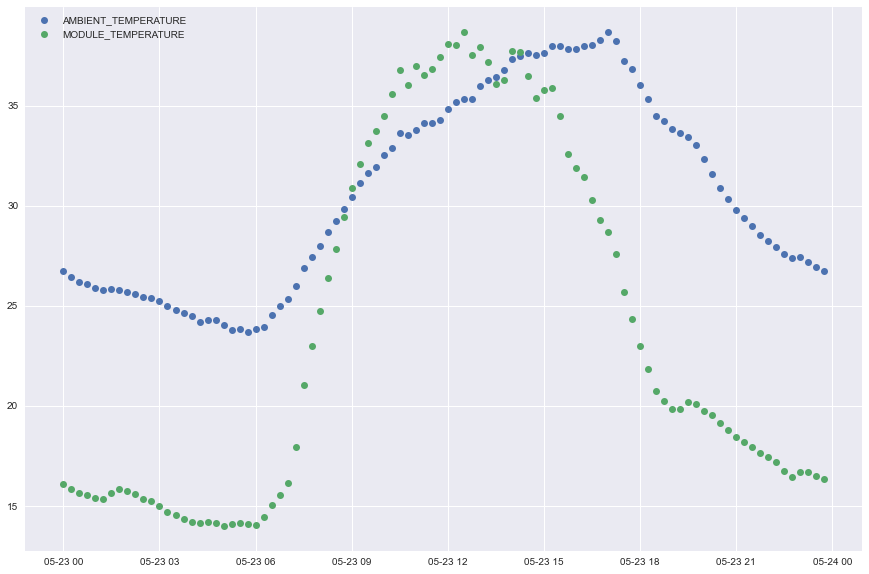

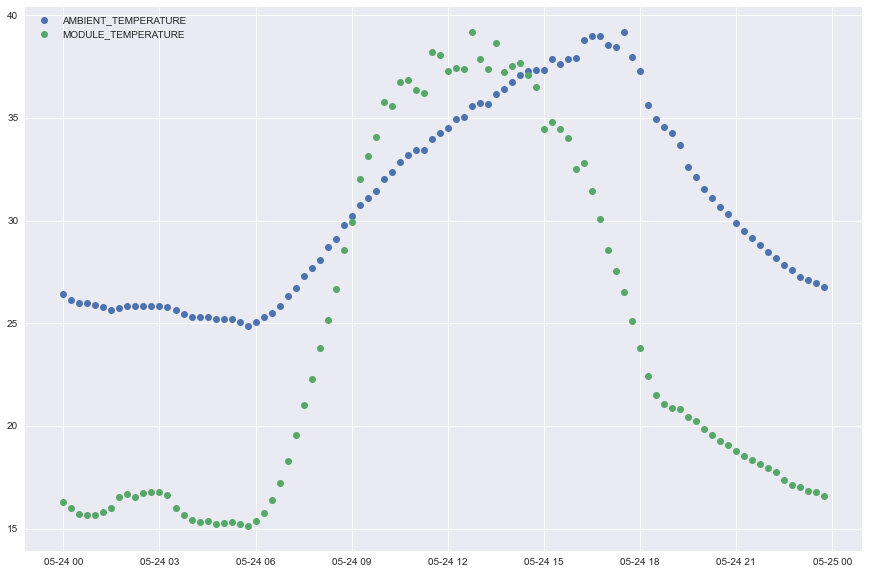

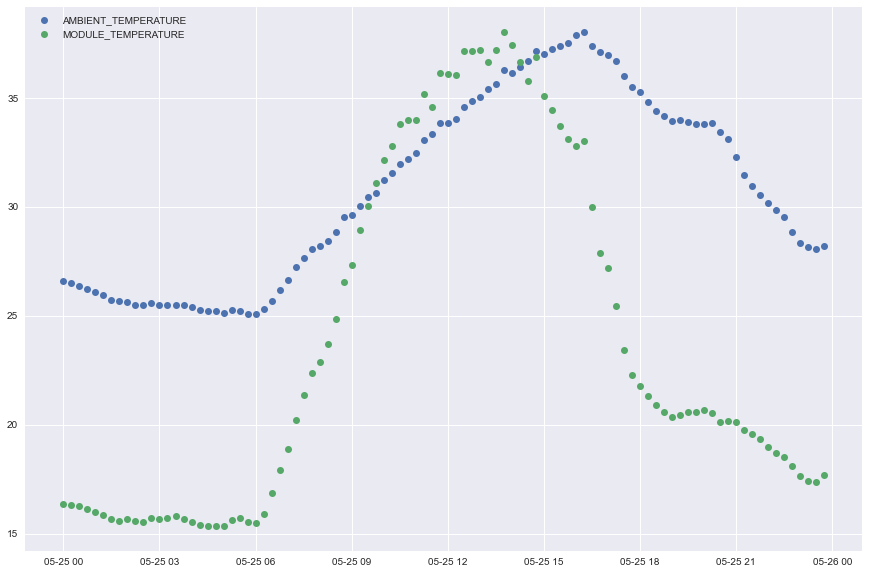

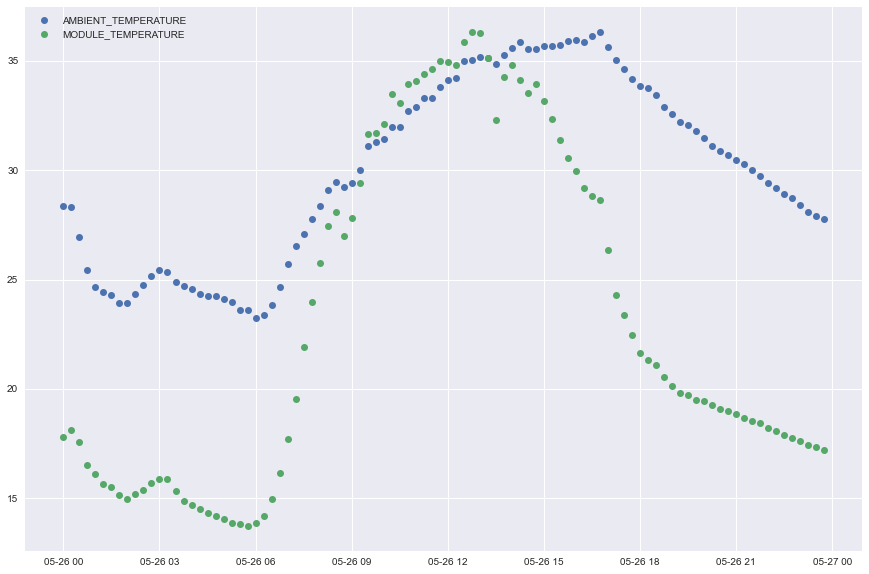

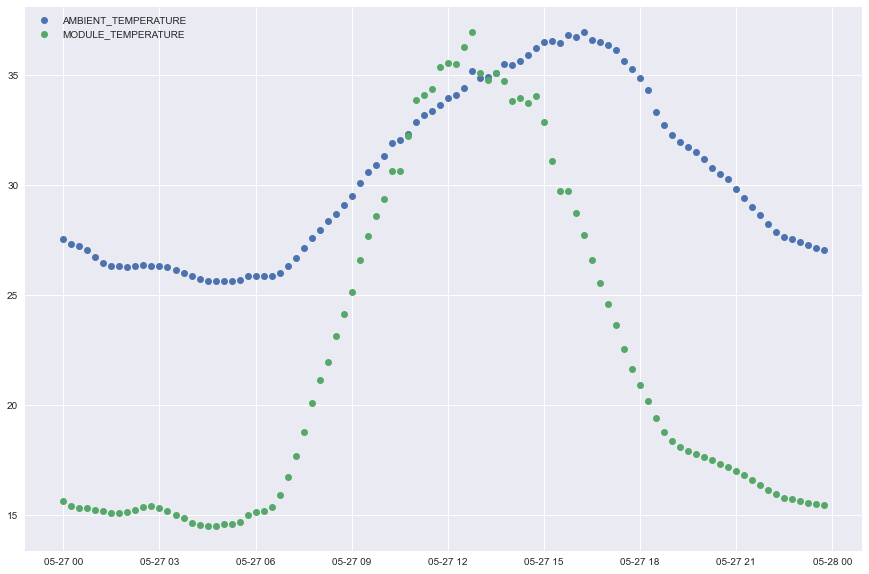

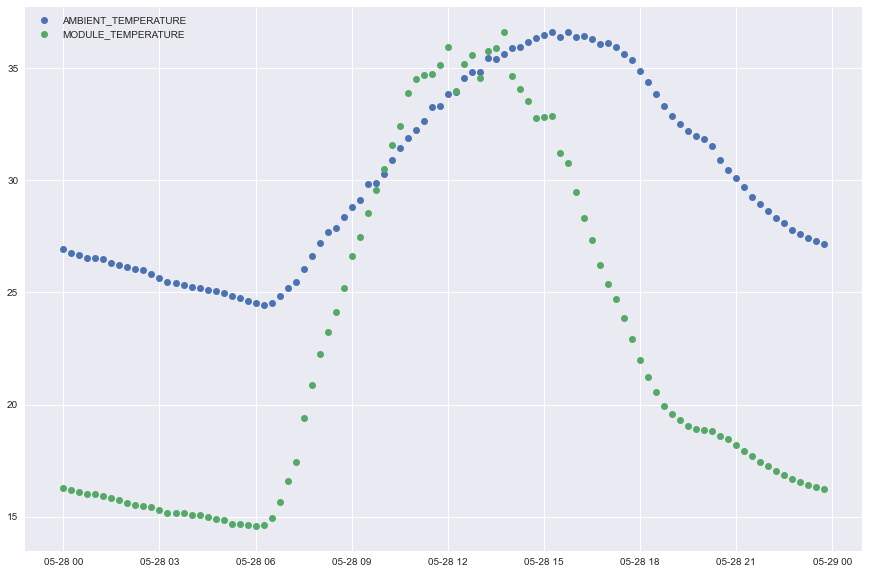

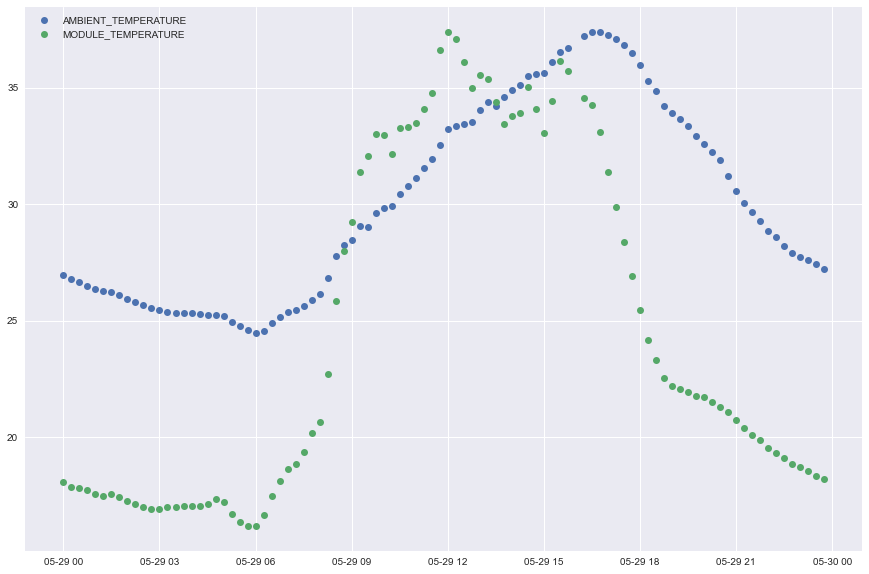

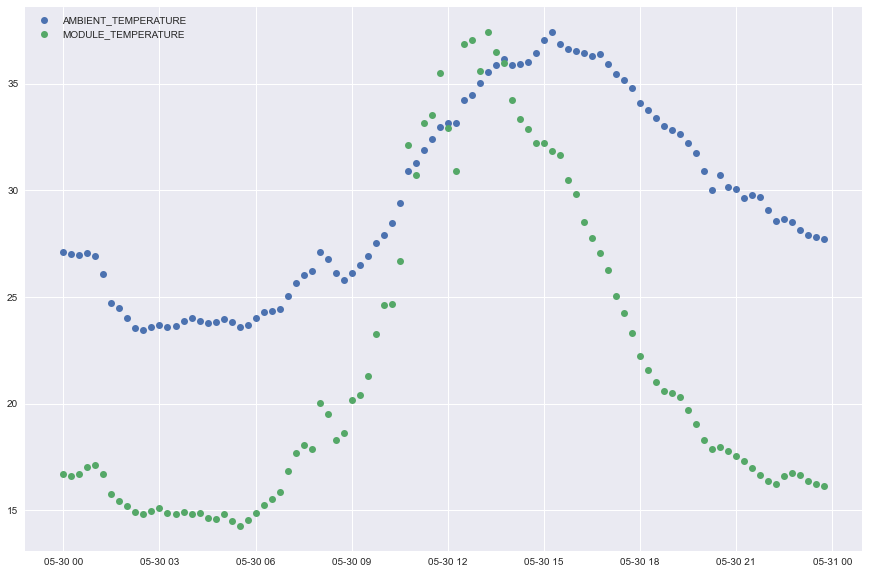

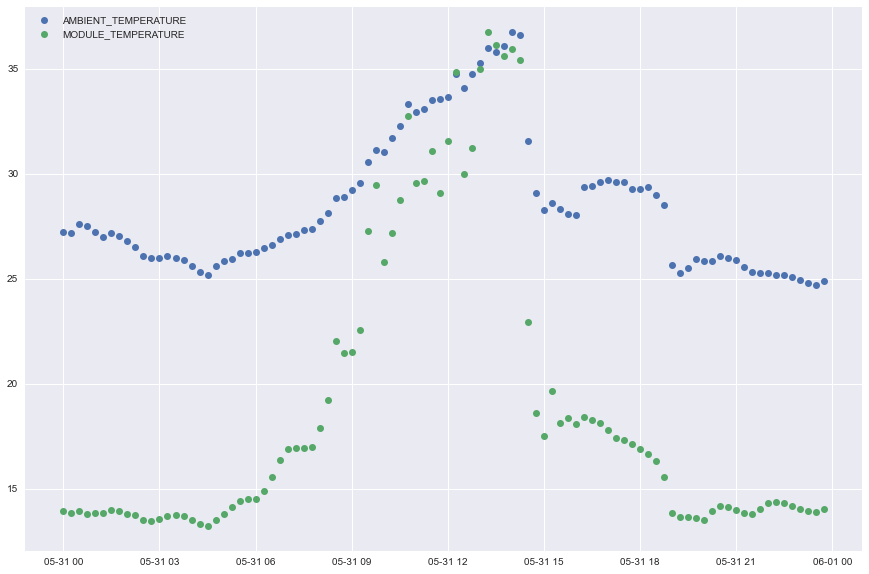

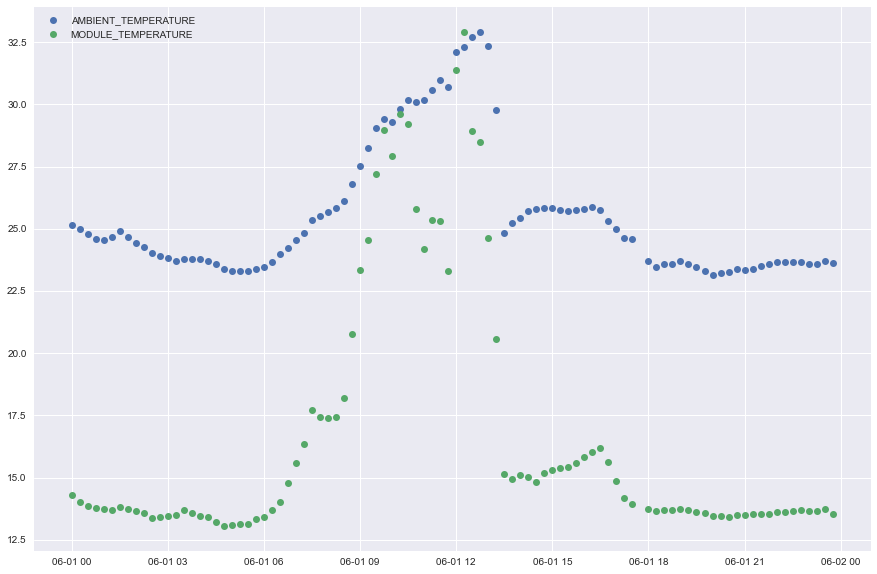

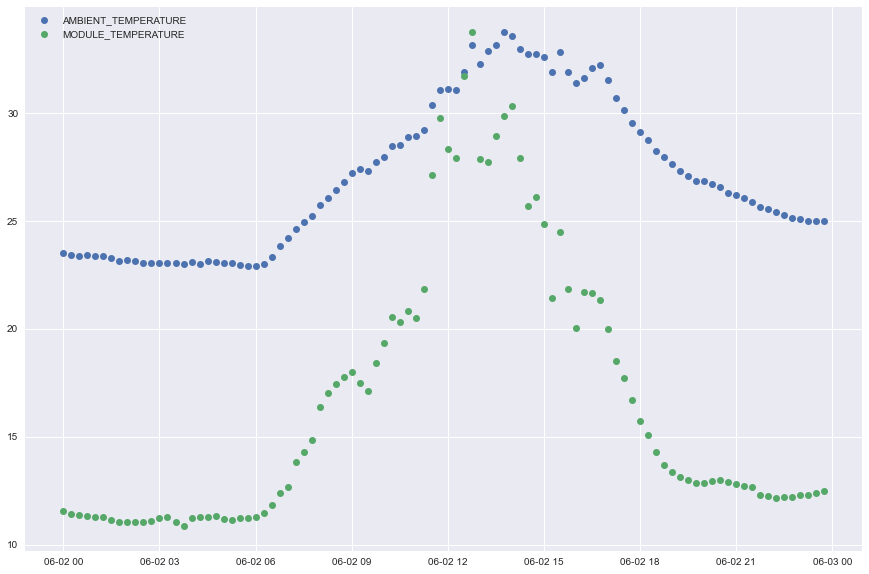

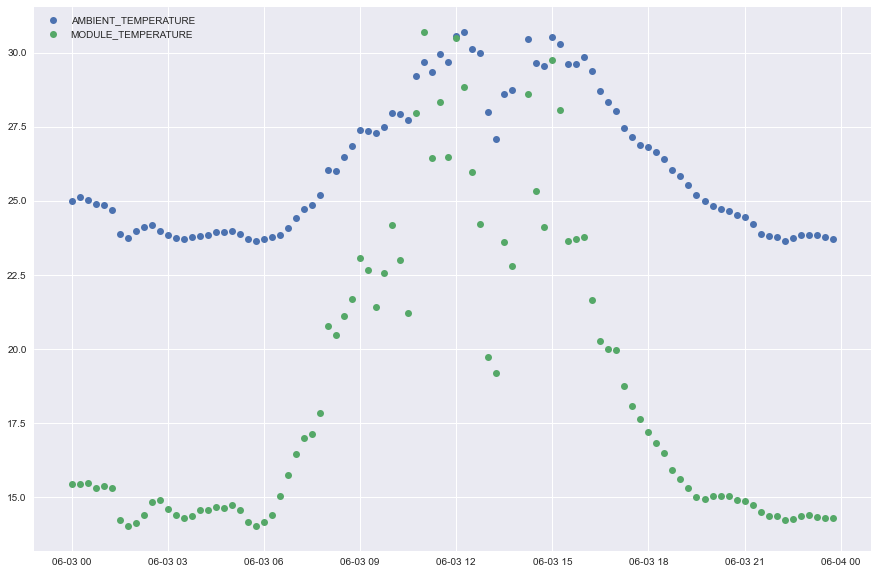

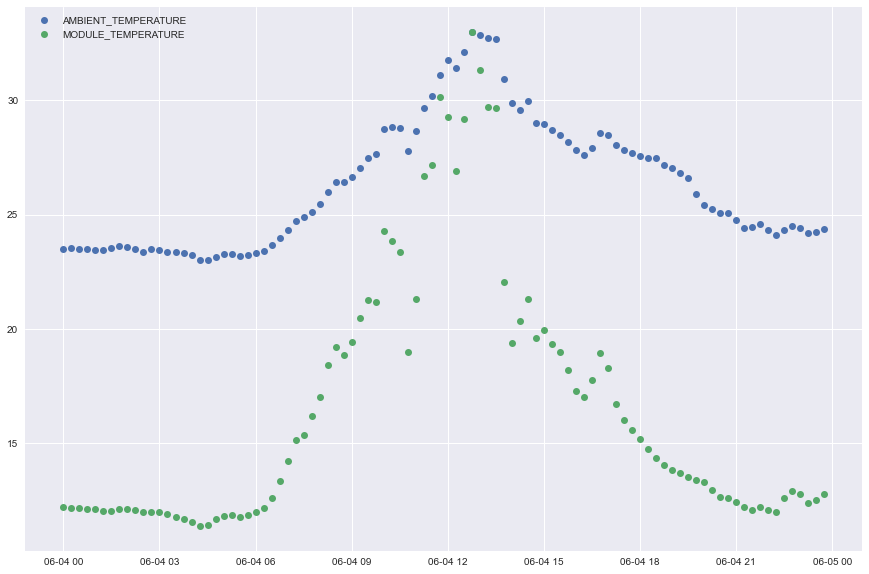

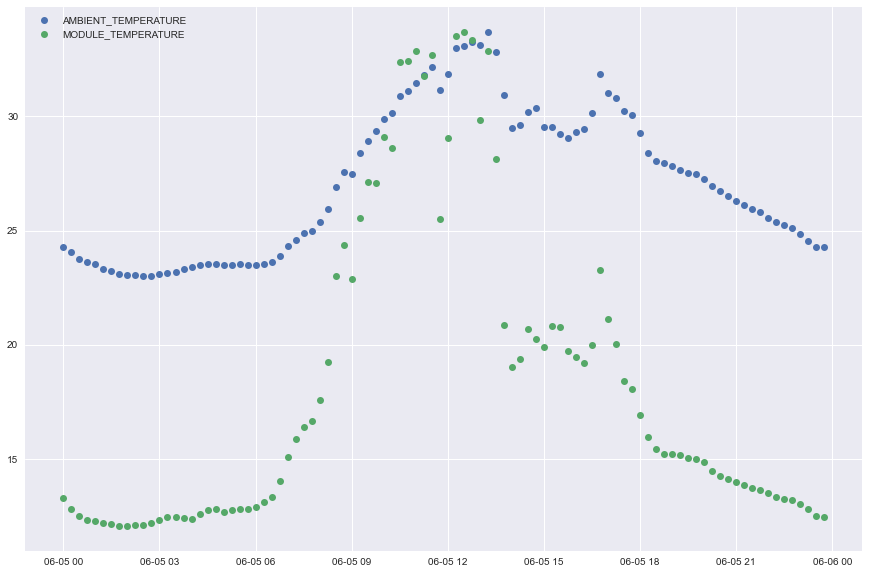

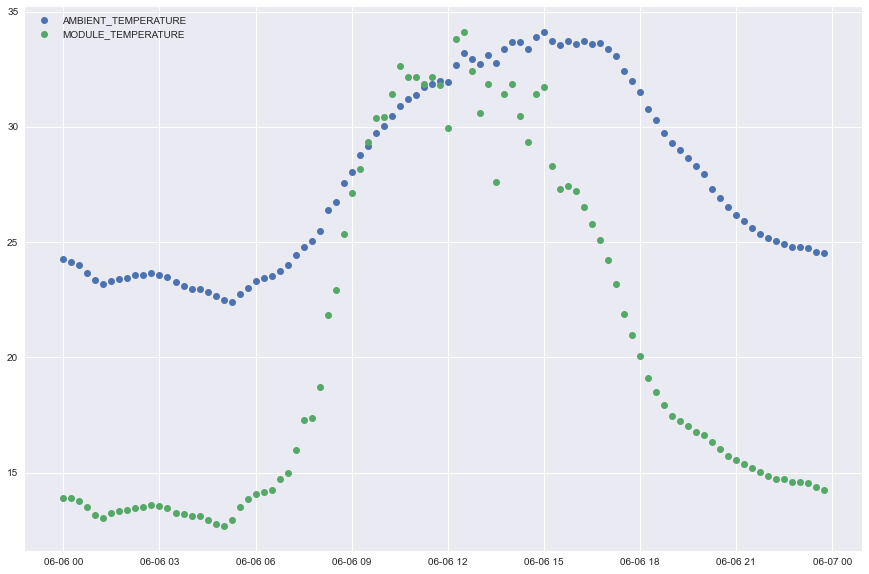

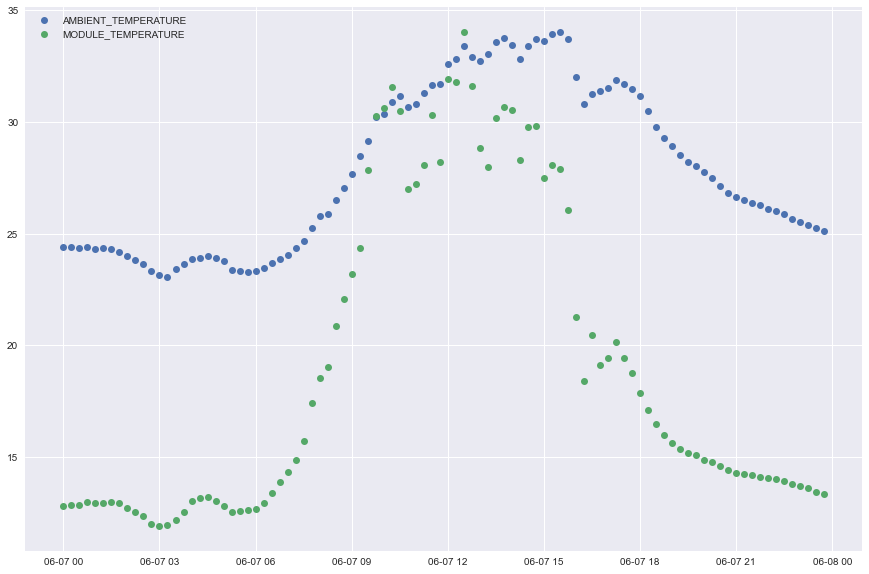

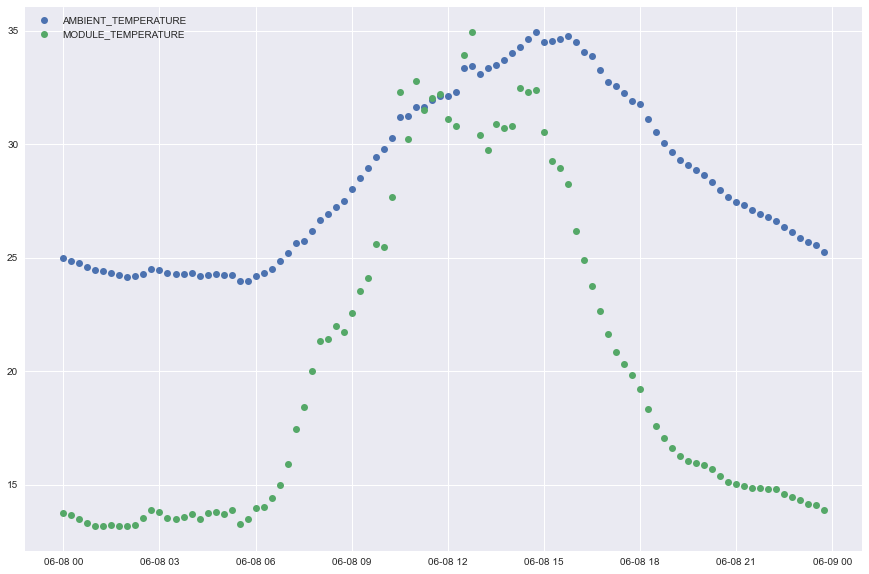

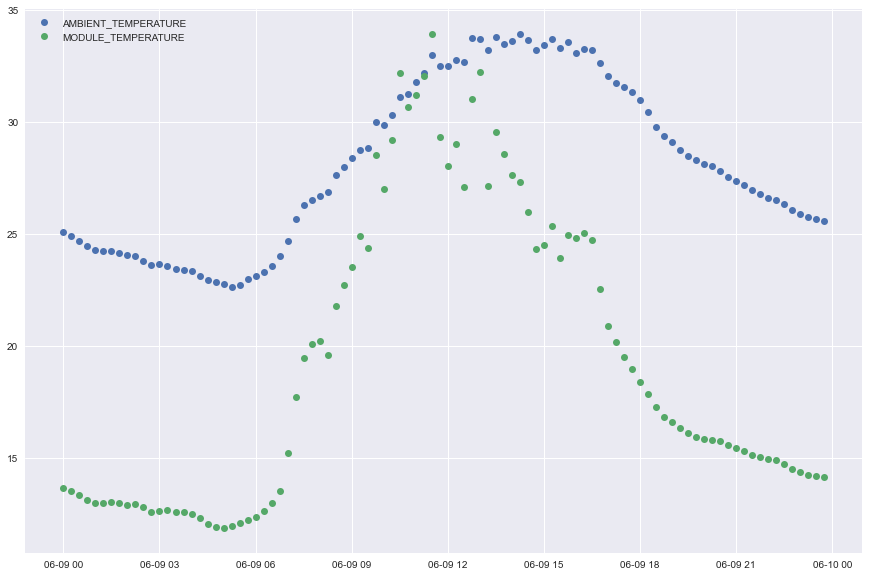

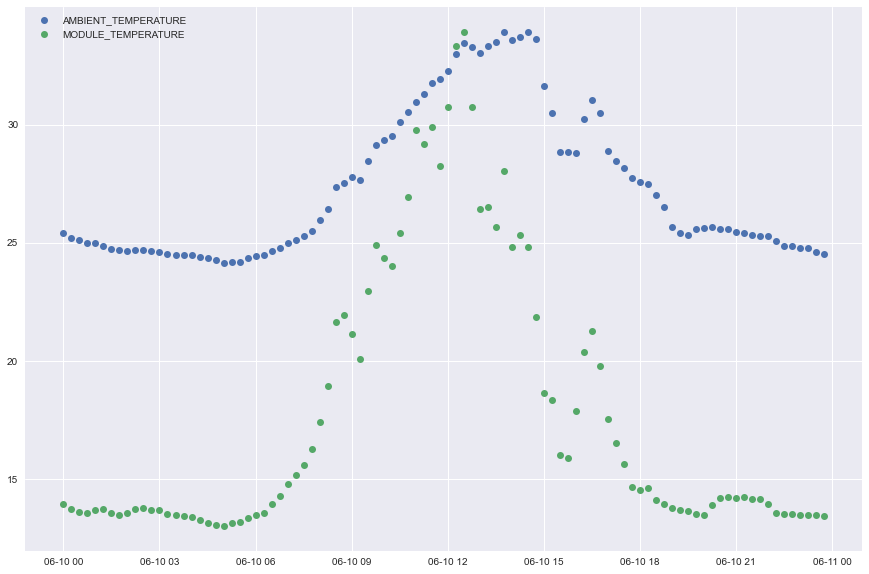

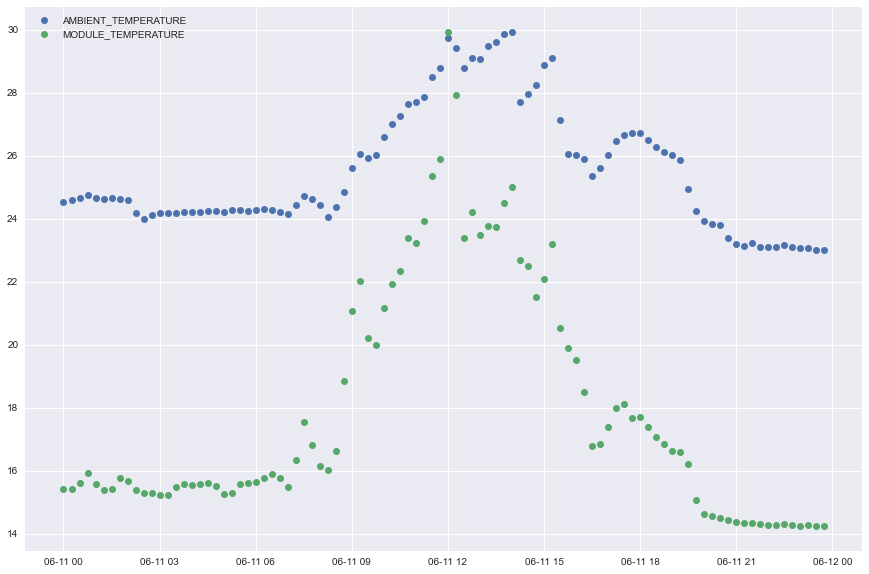

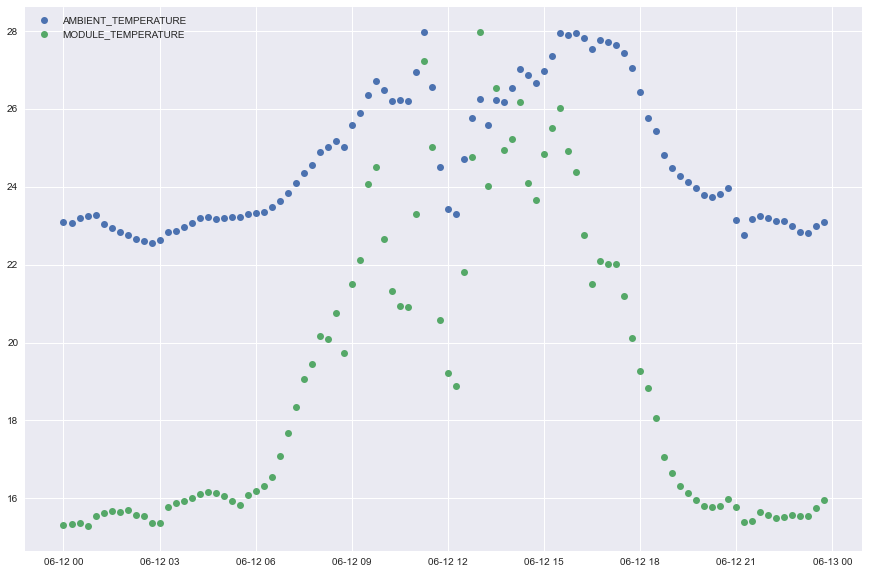

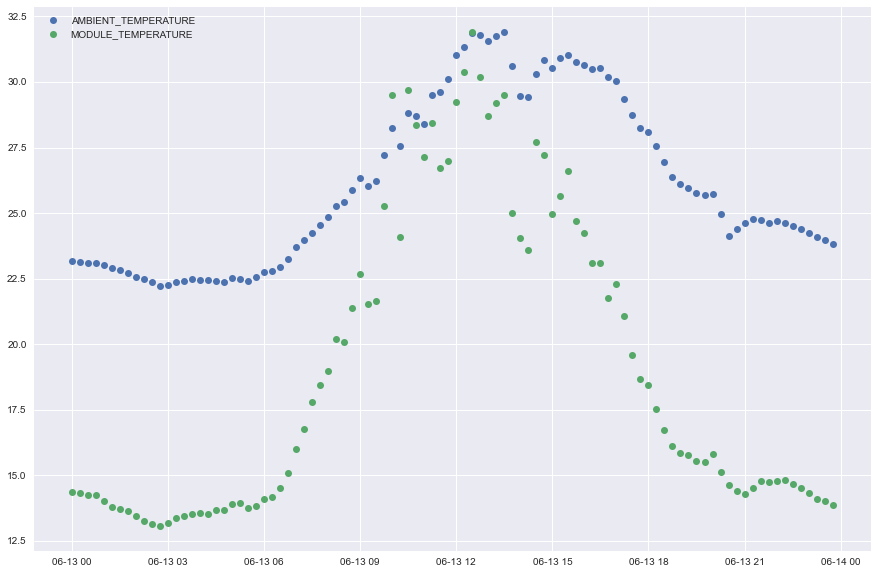

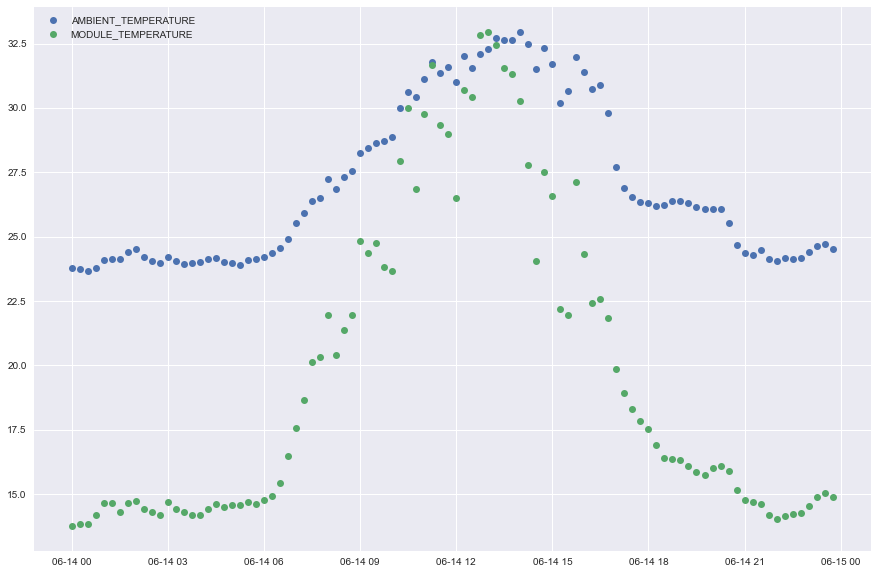

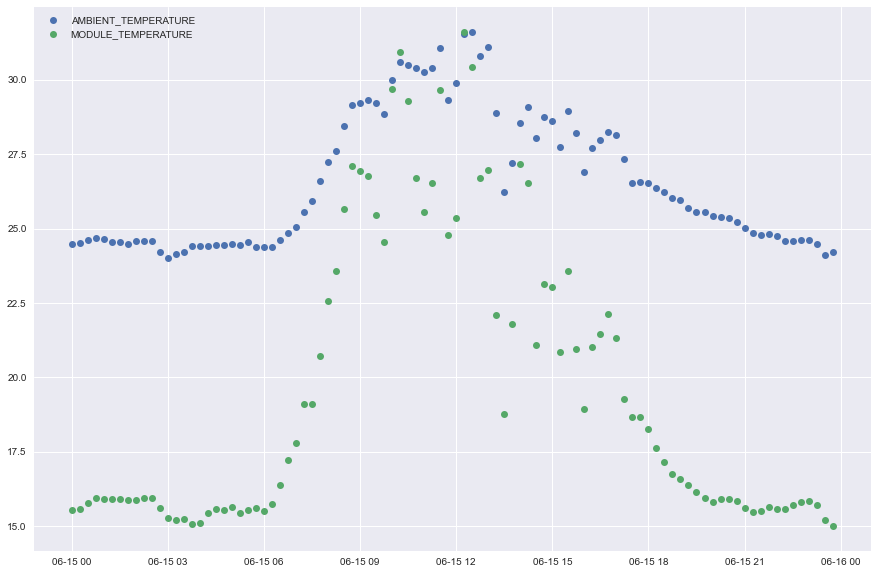

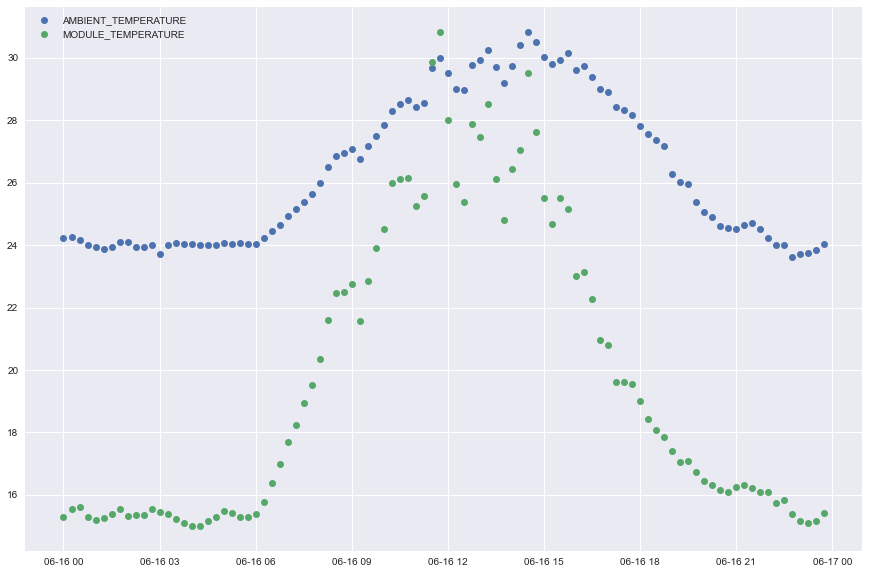

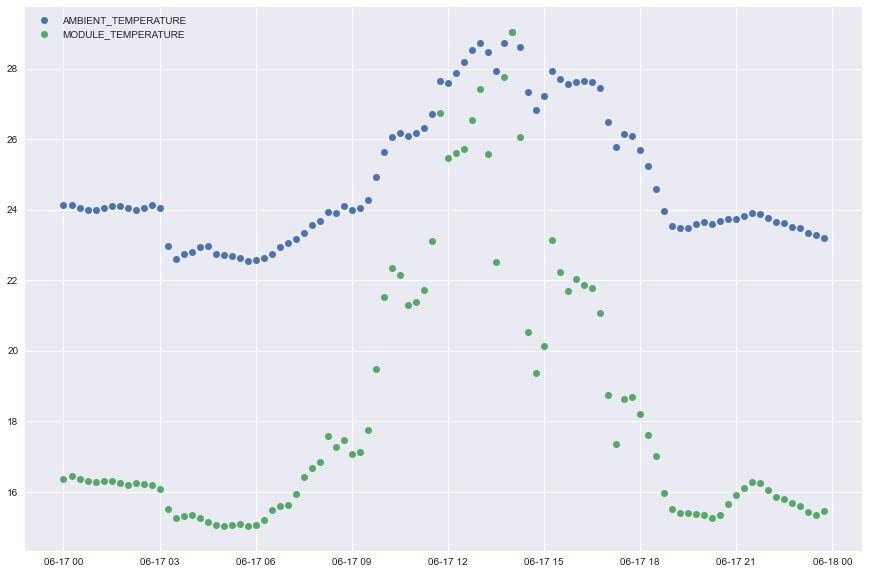

In [7]:
datetime_vs(plant_weat, 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE')

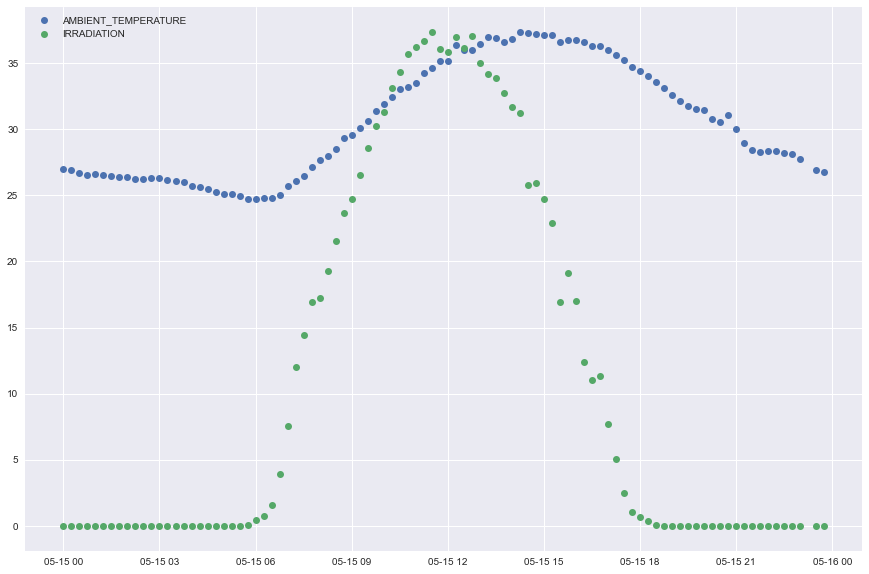

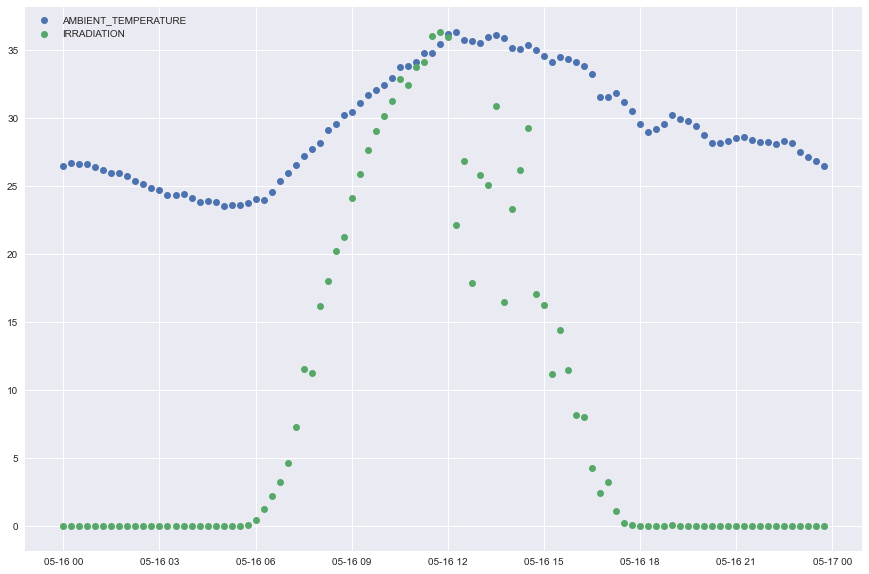

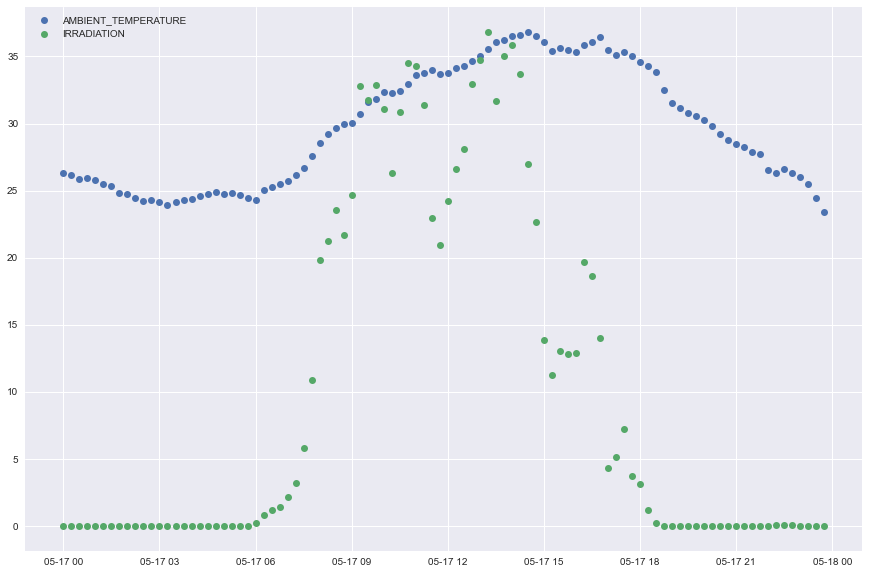

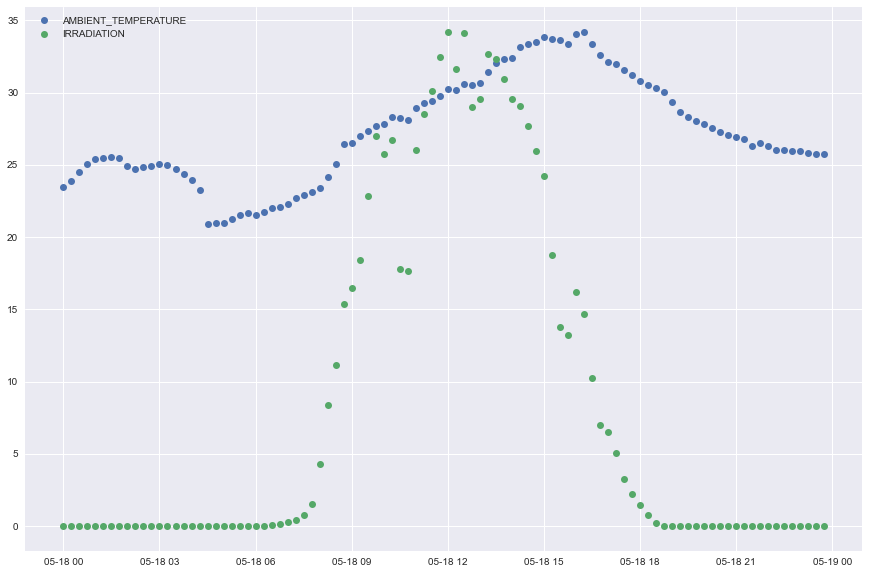

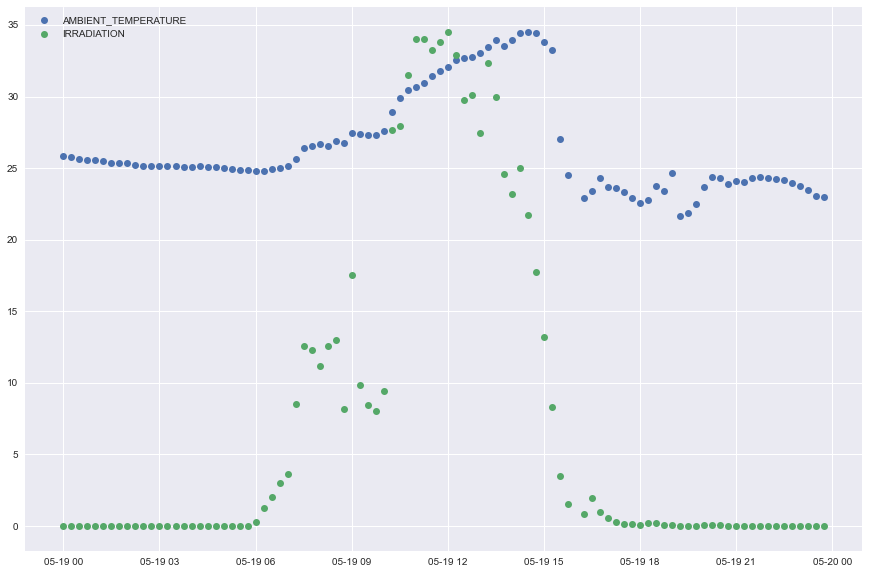

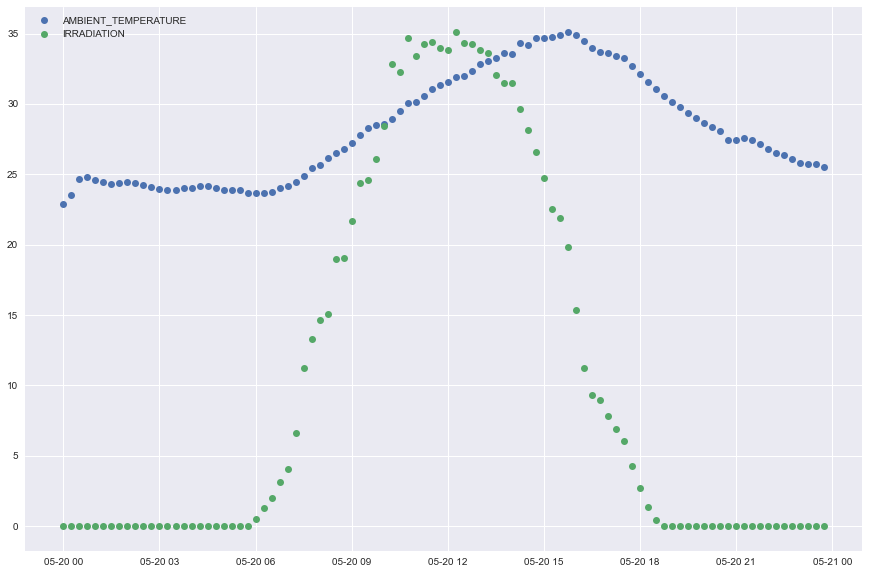

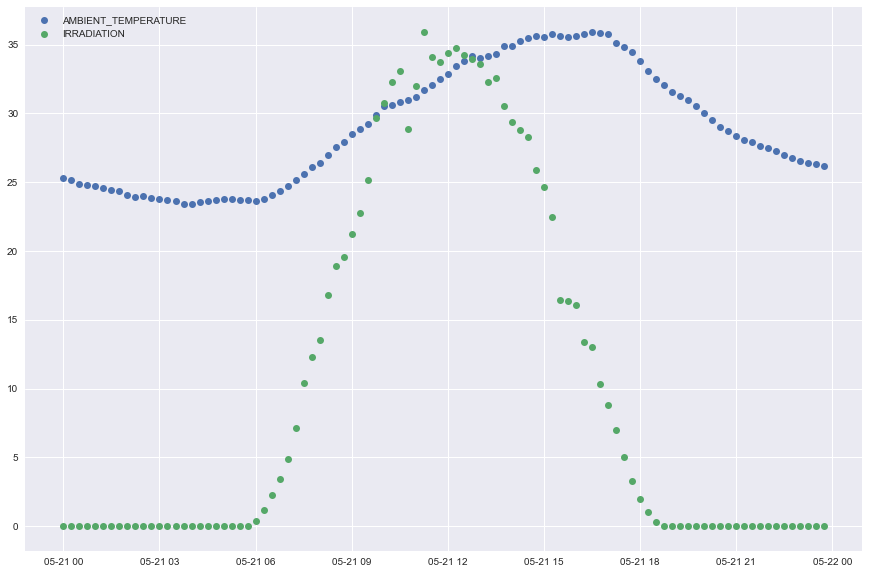

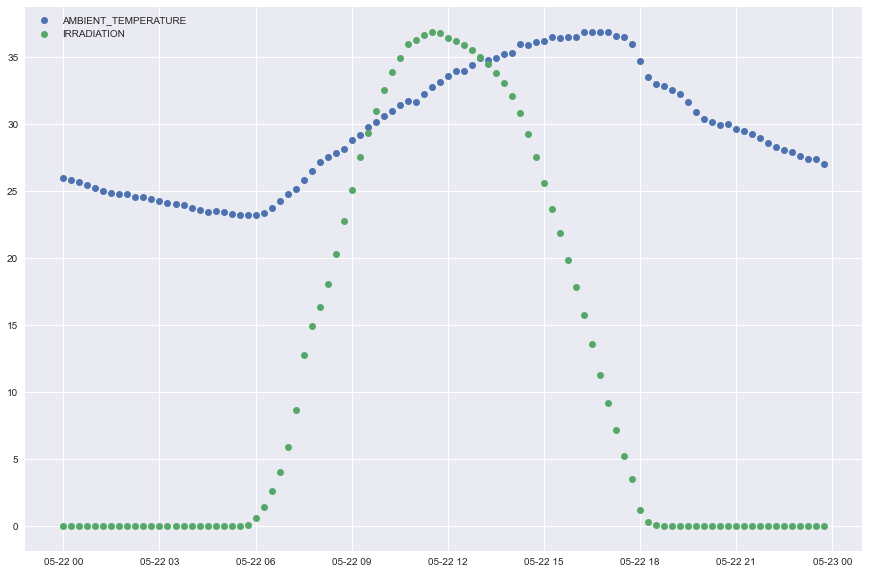

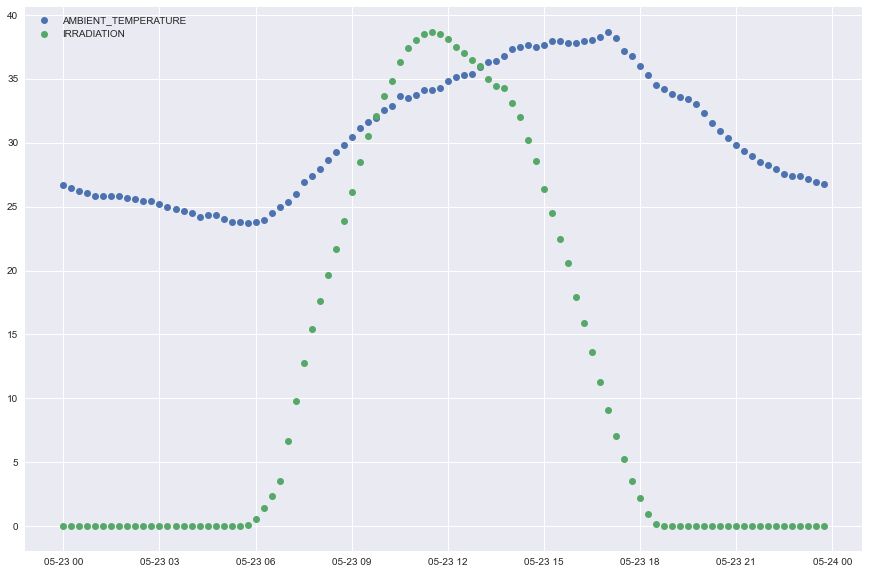

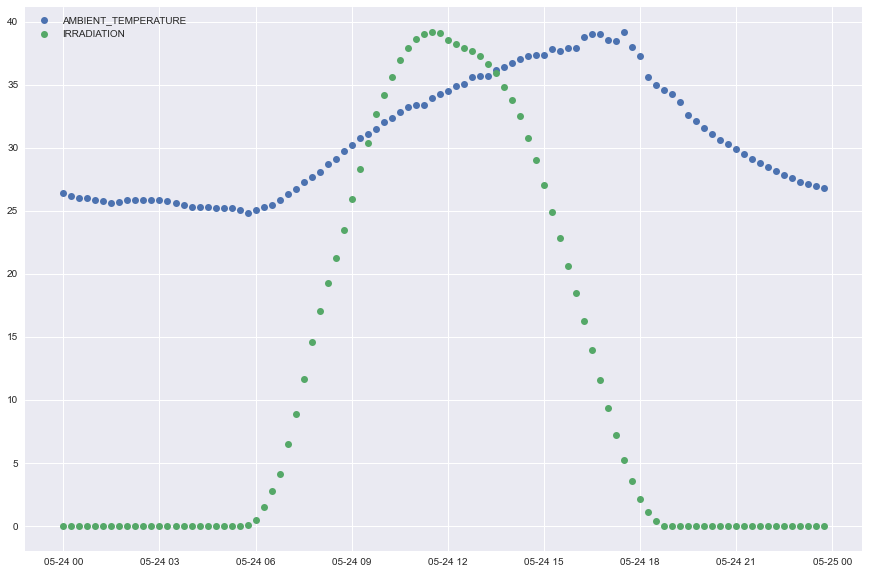

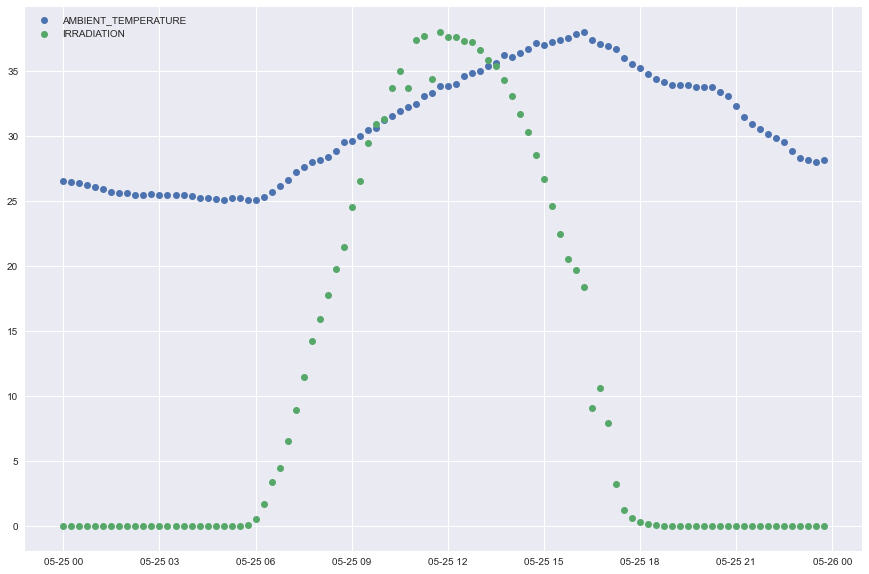

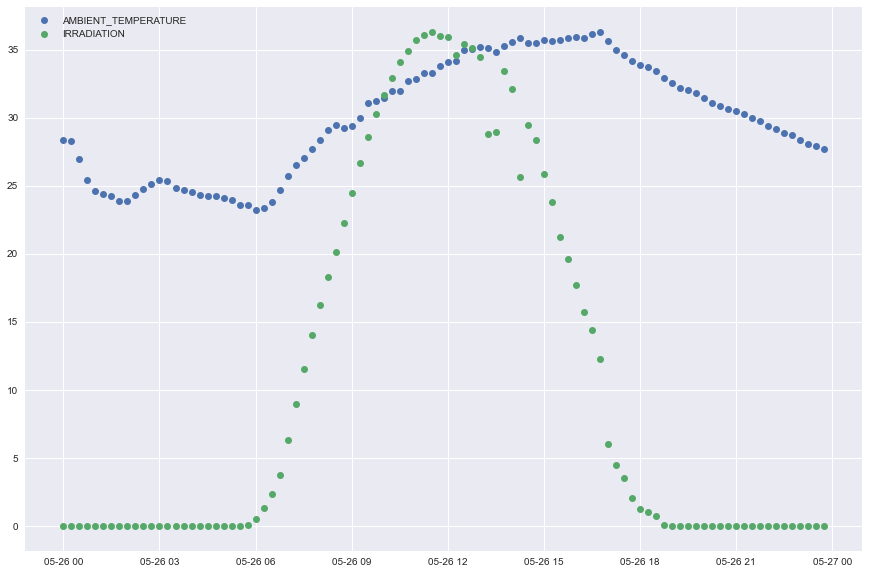

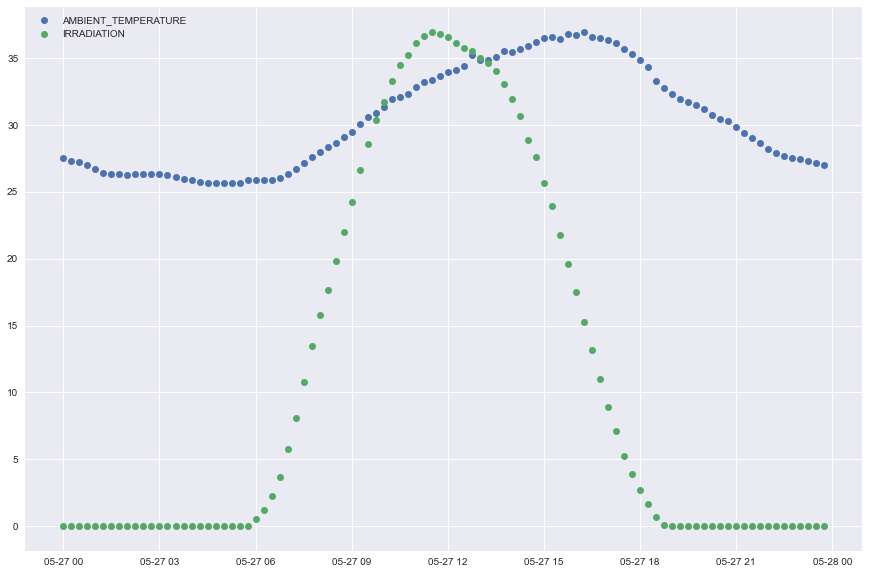

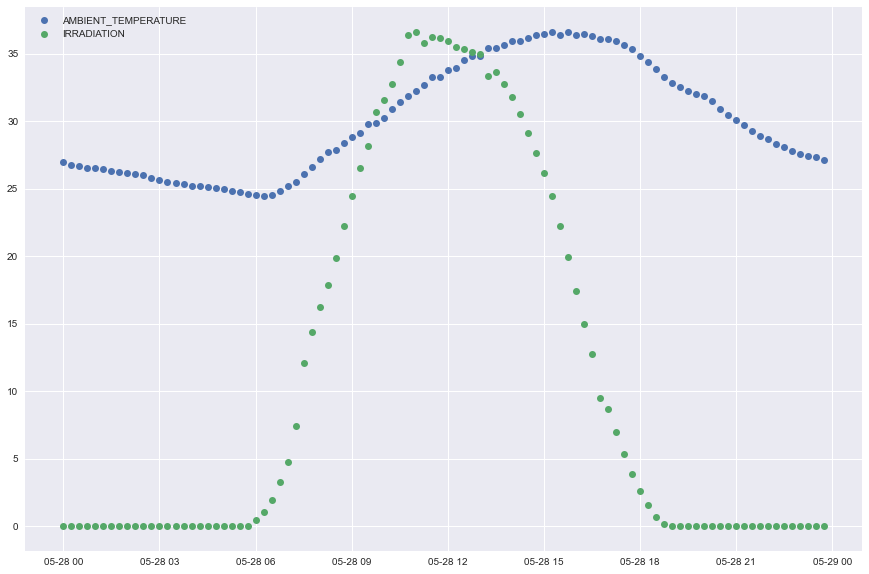

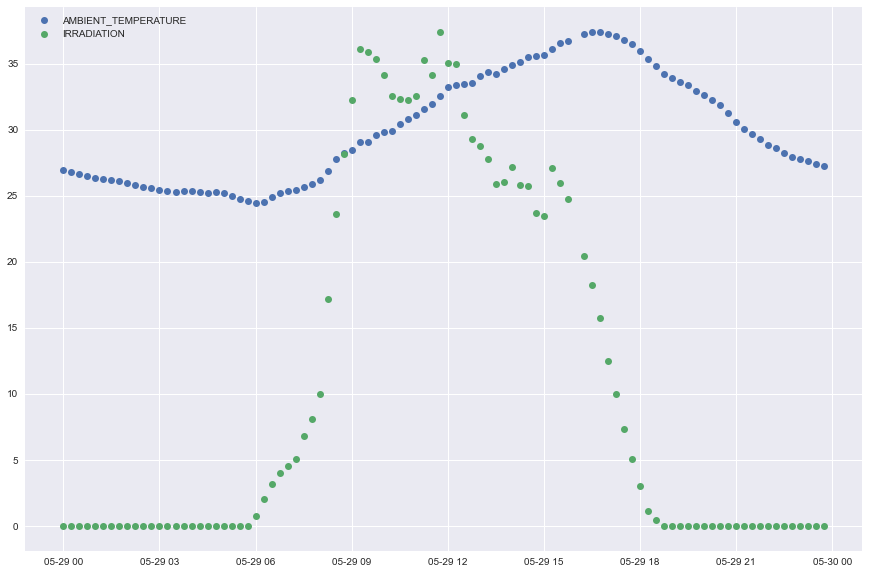

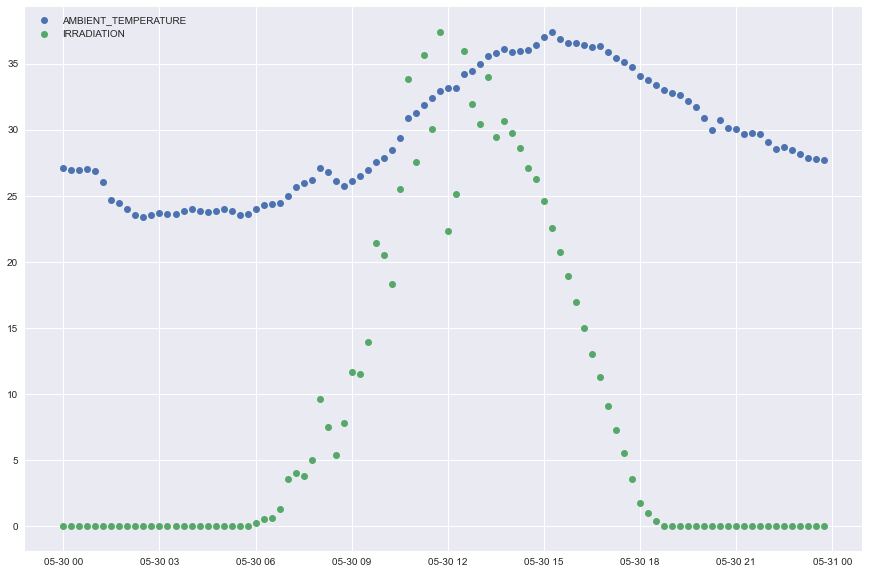

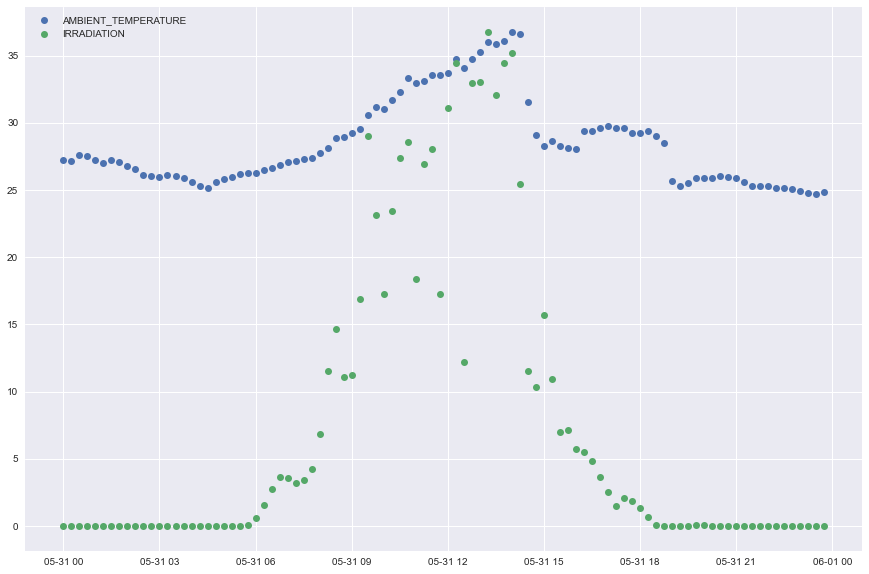

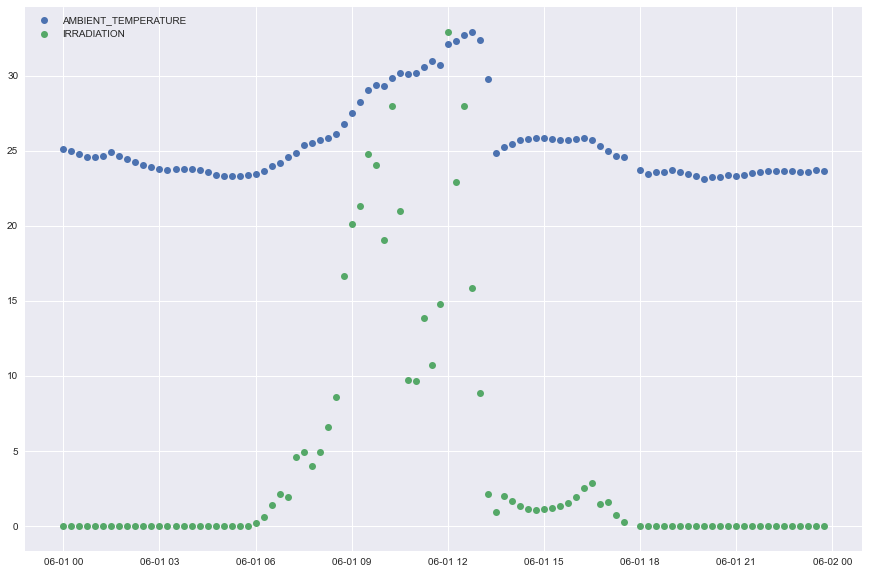

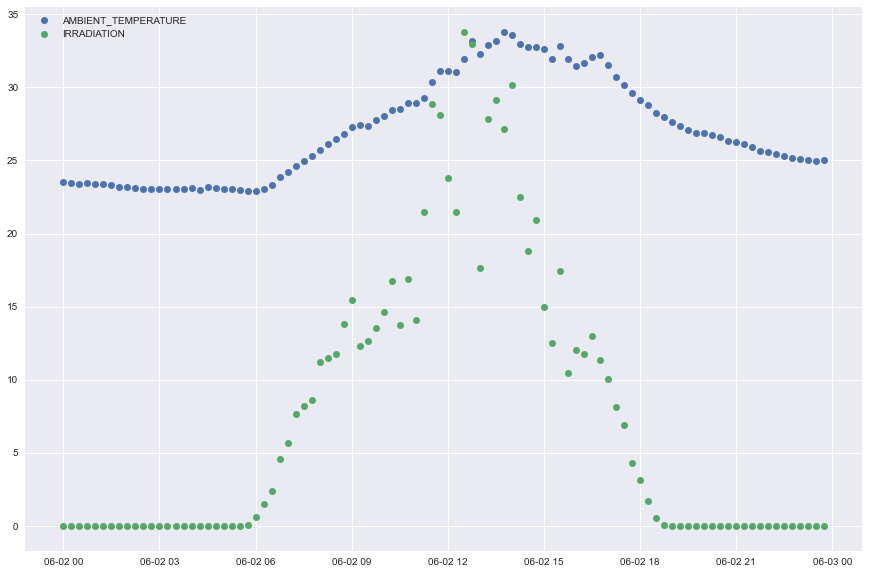

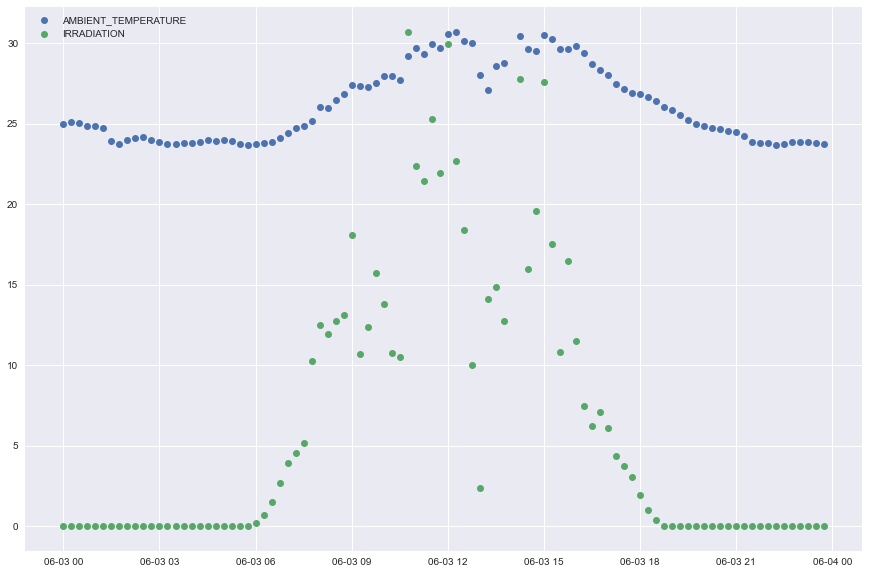

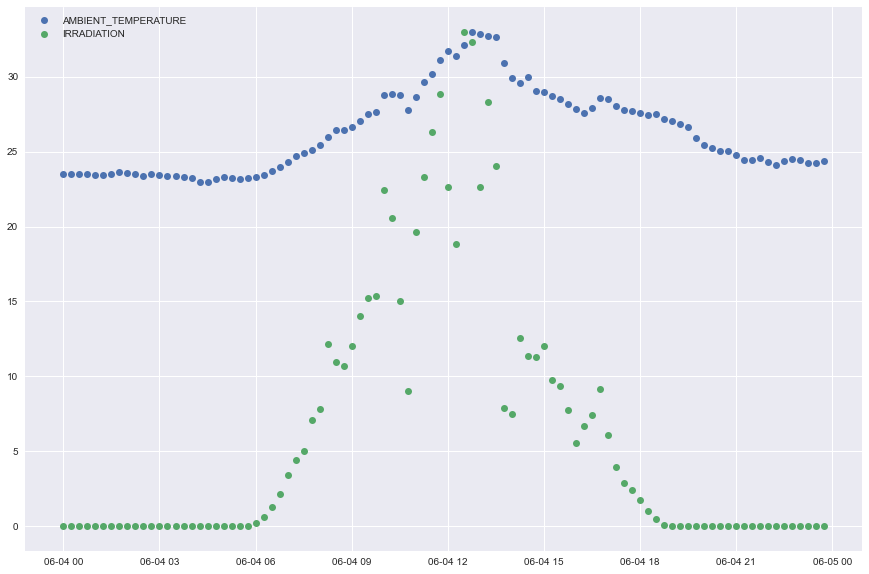

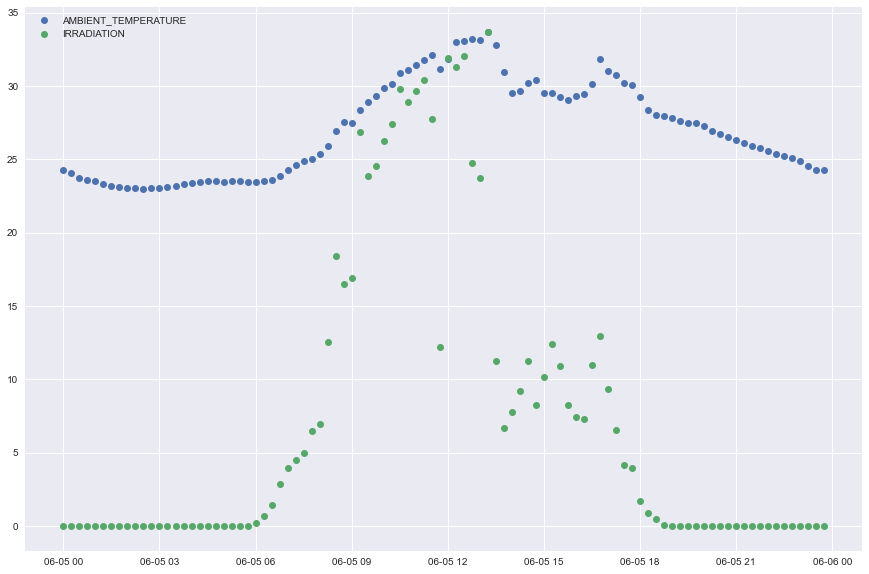

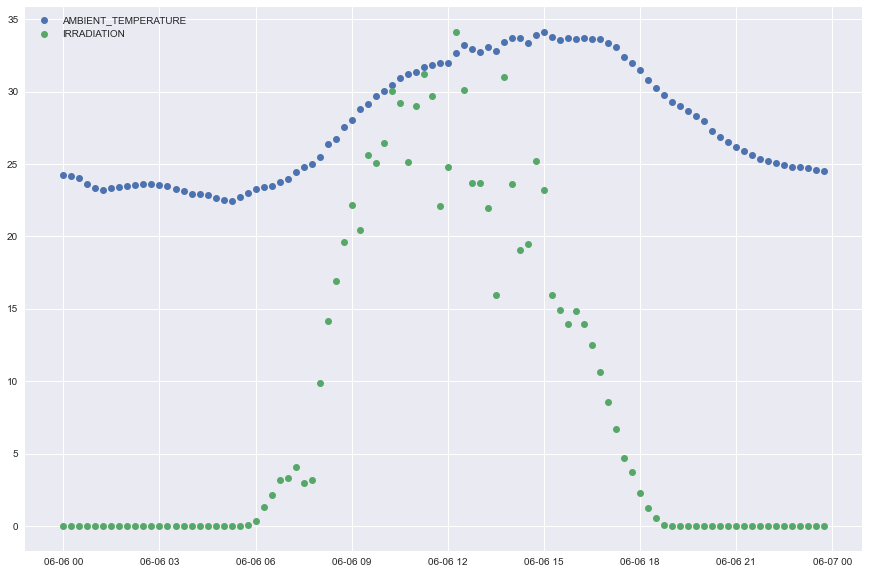

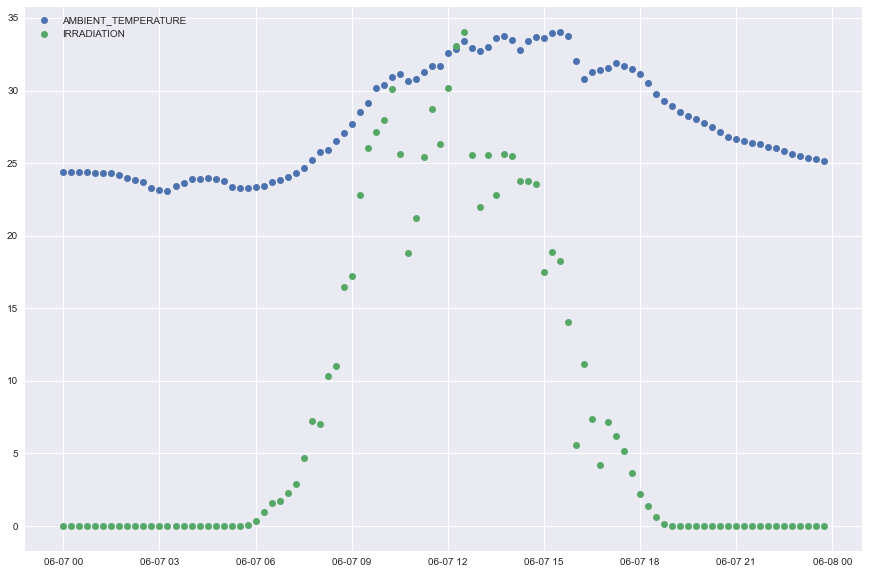

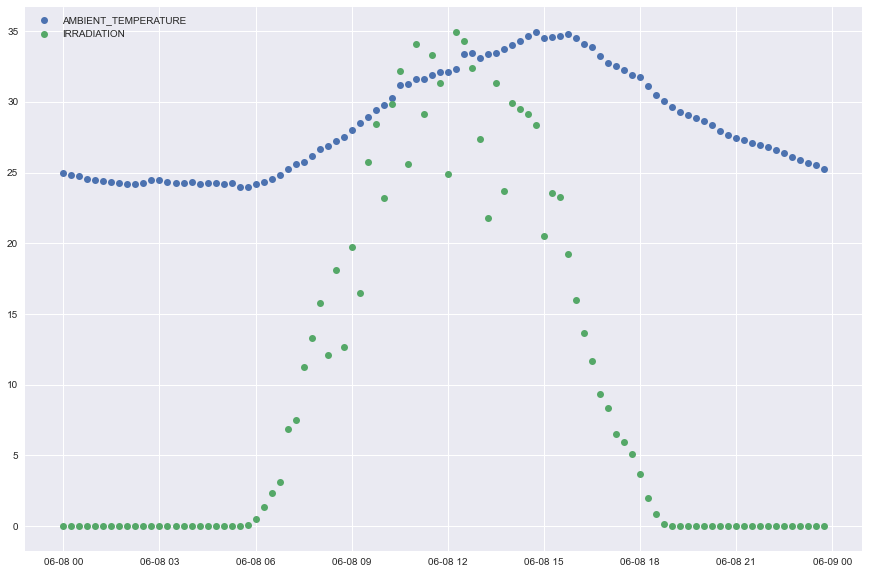

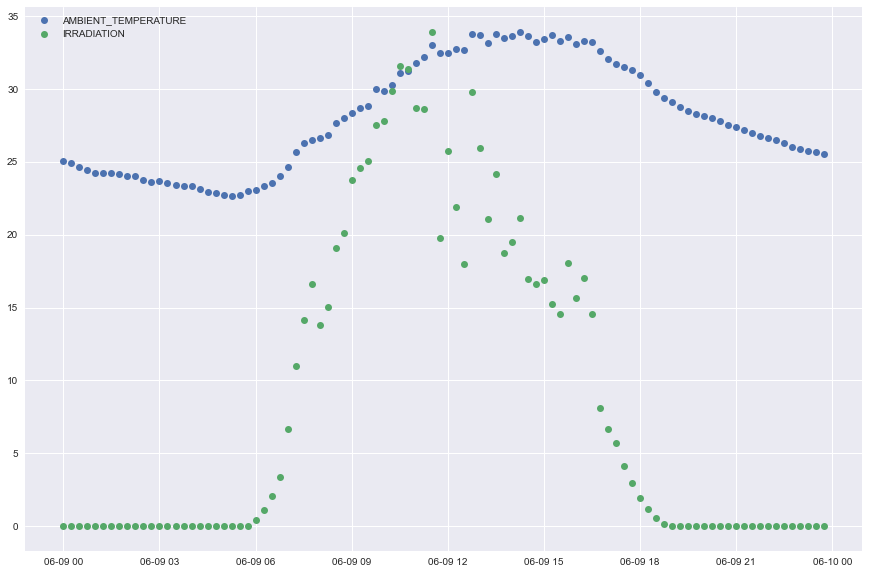

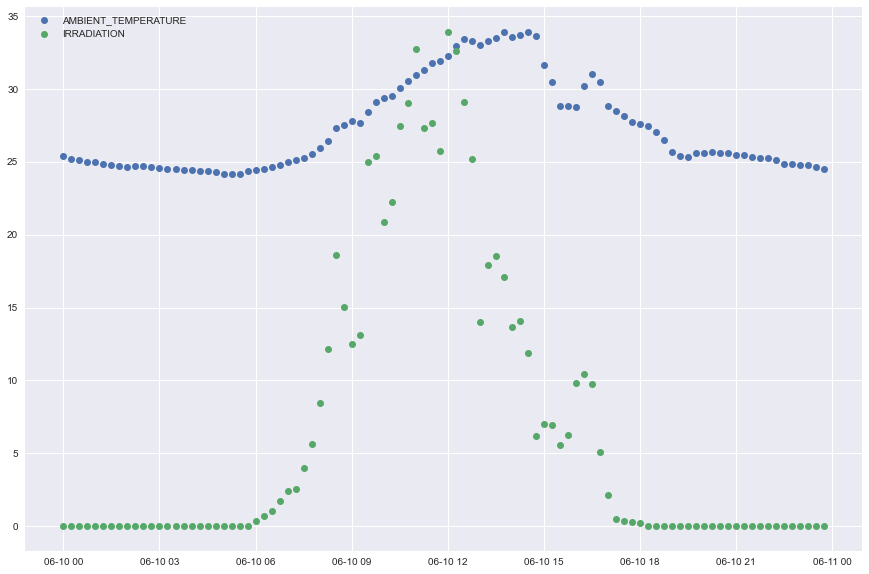

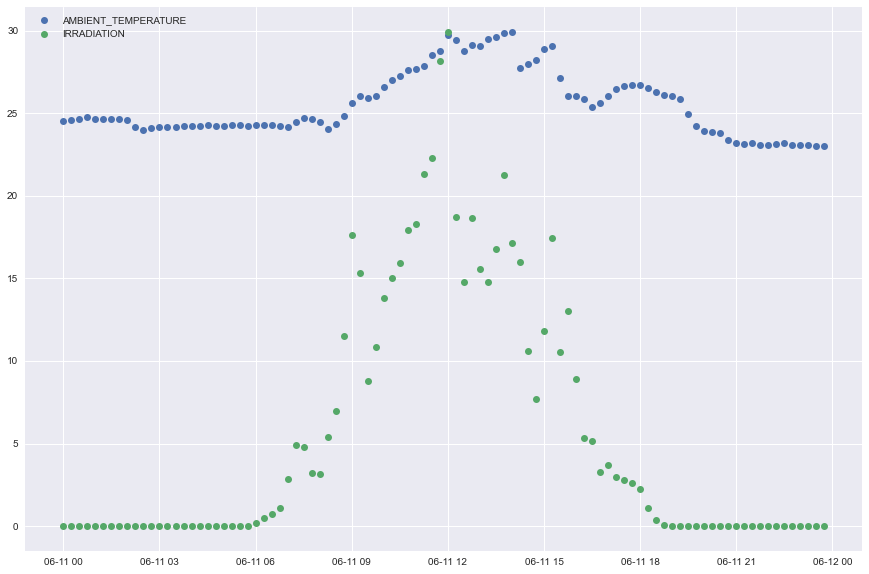

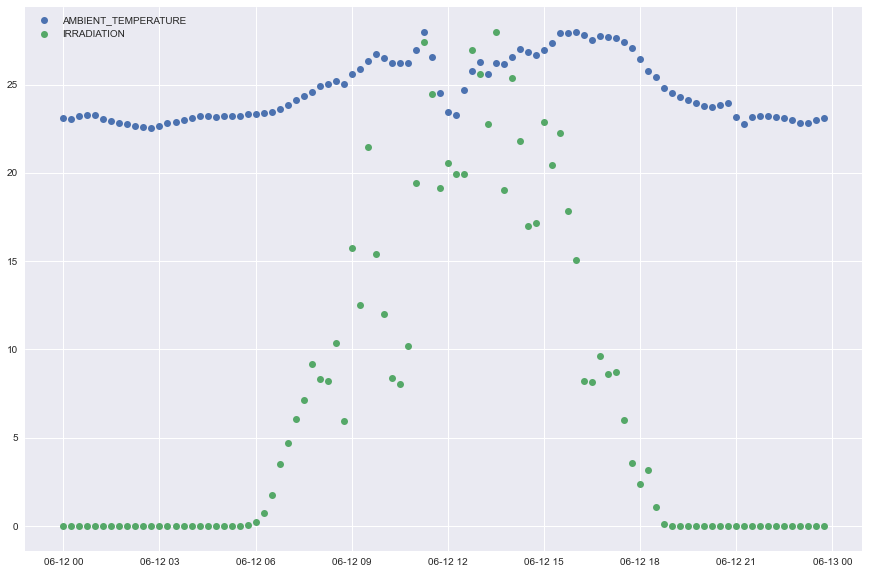

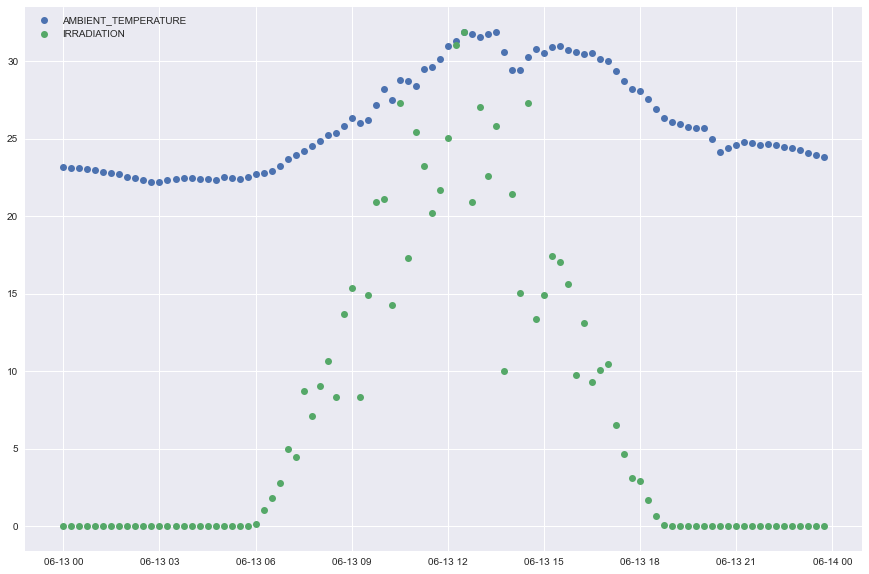

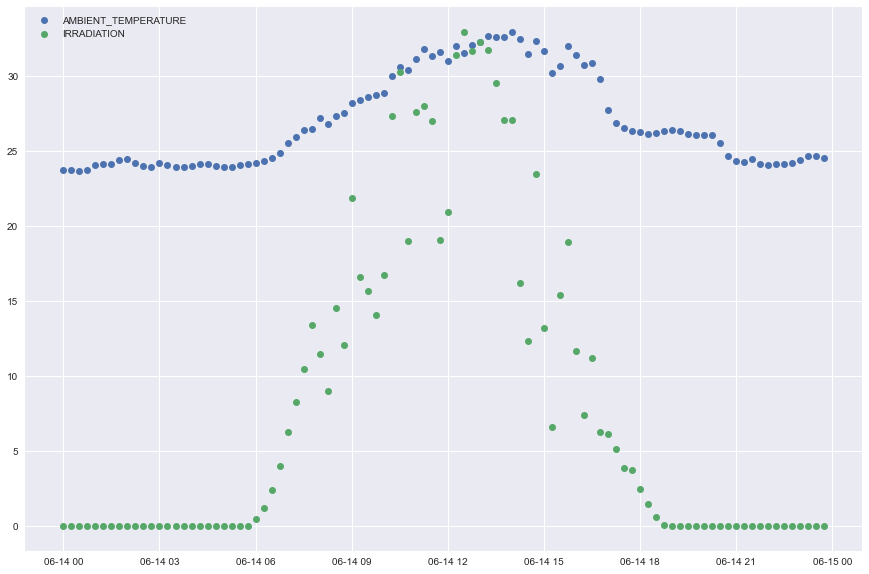

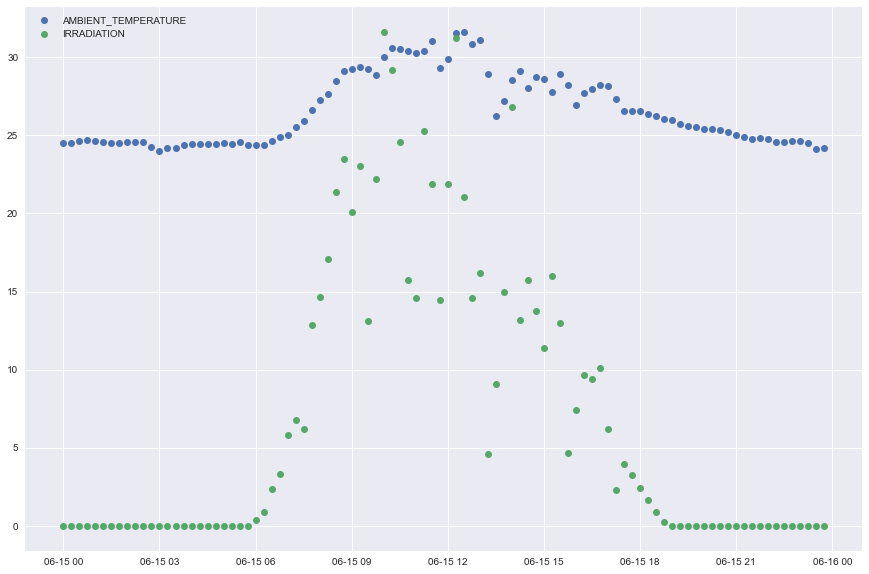

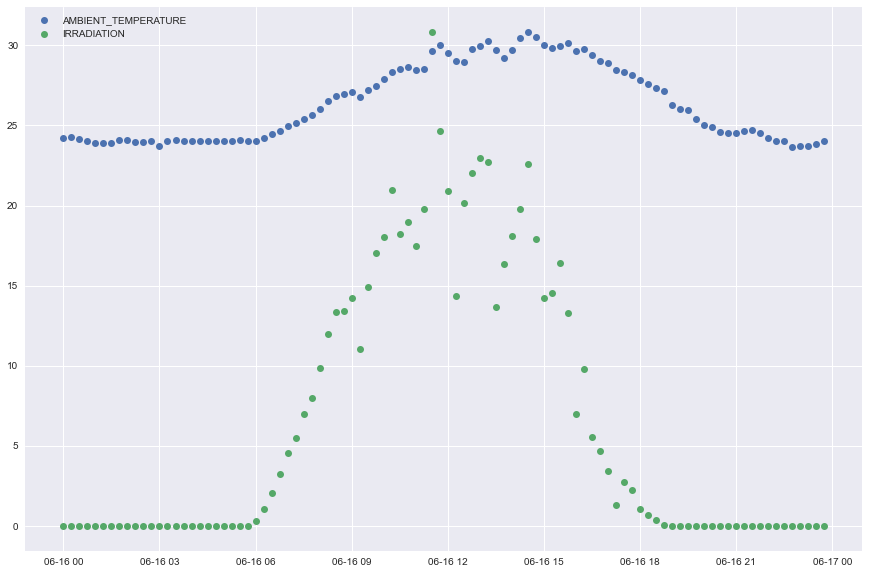

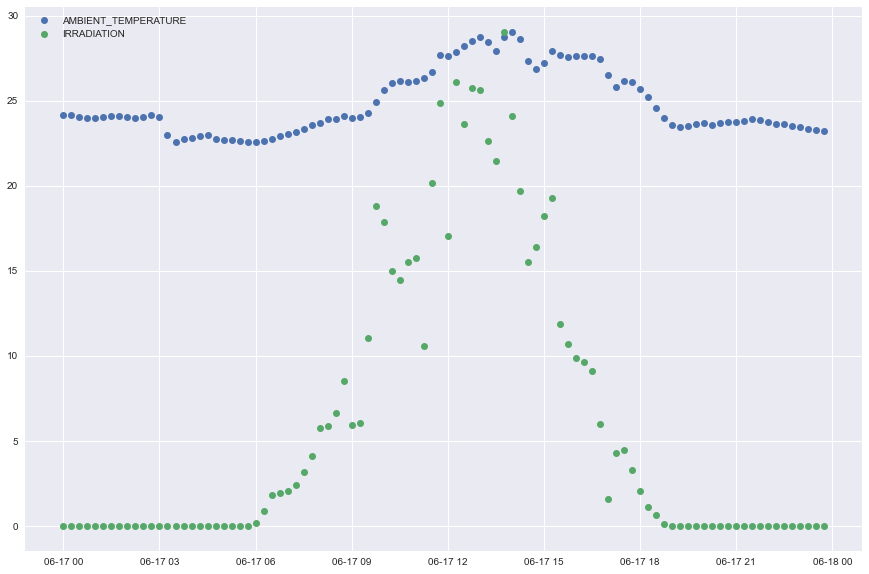

In [8]:
datetime_vs(plant_weat, 'AMBIENT_TEMPERATURE', 'IRRADIATION')

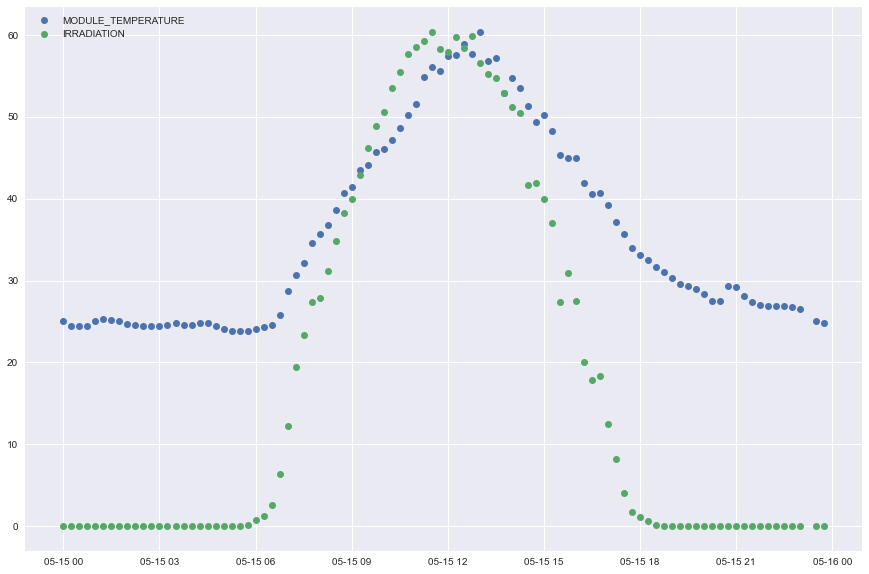

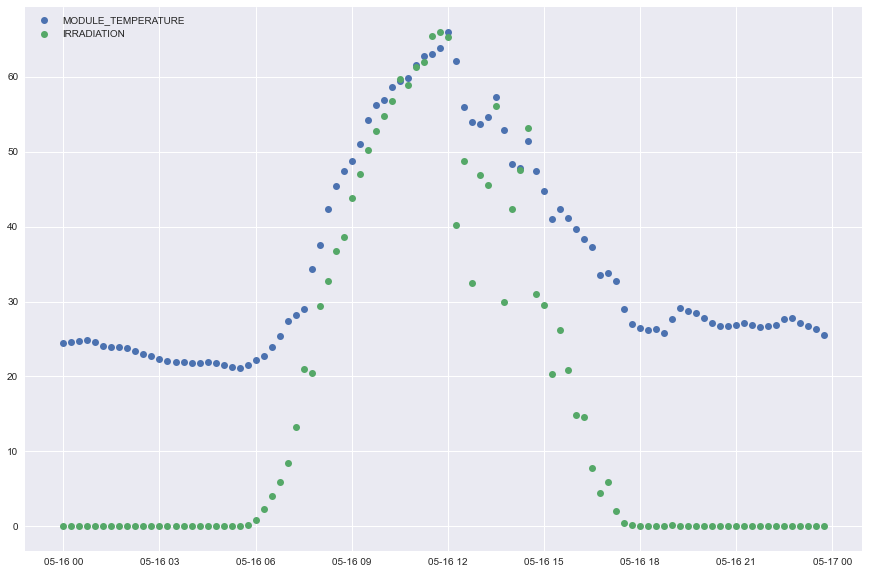

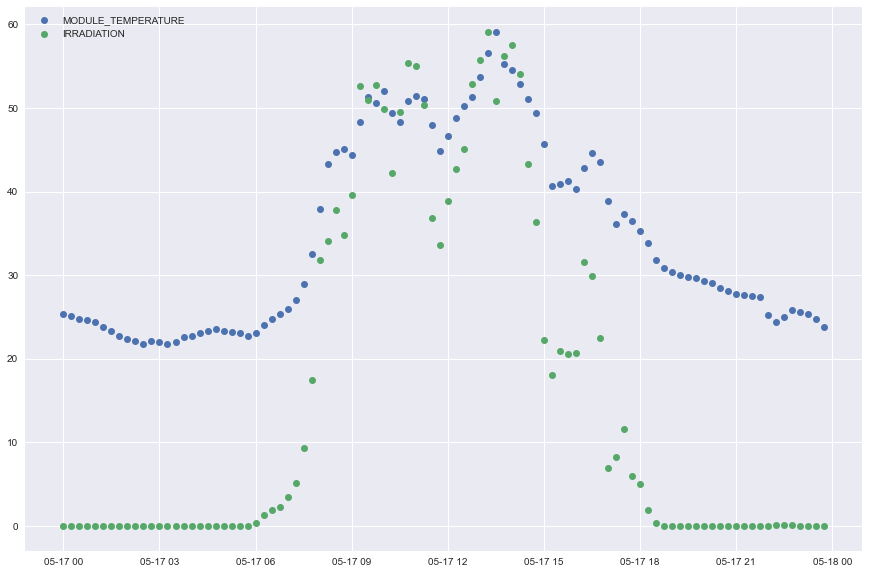

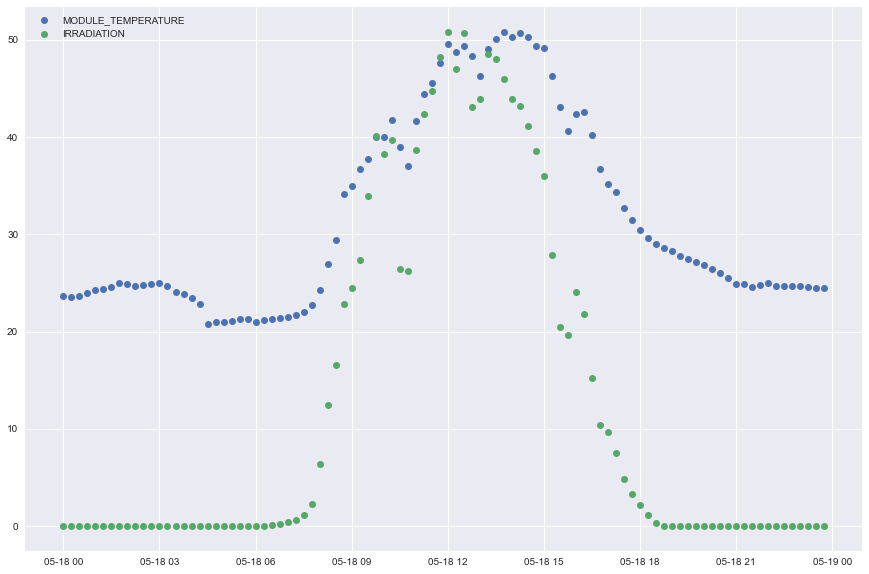

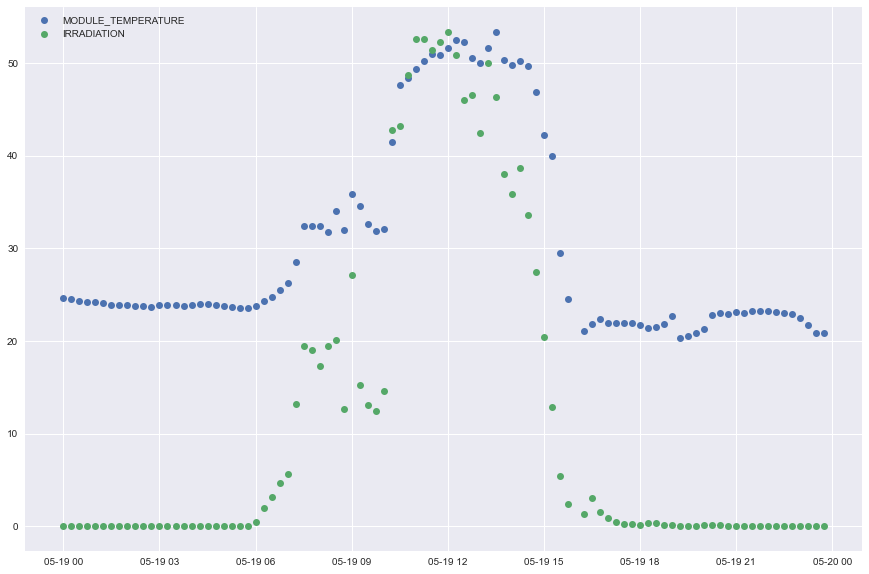

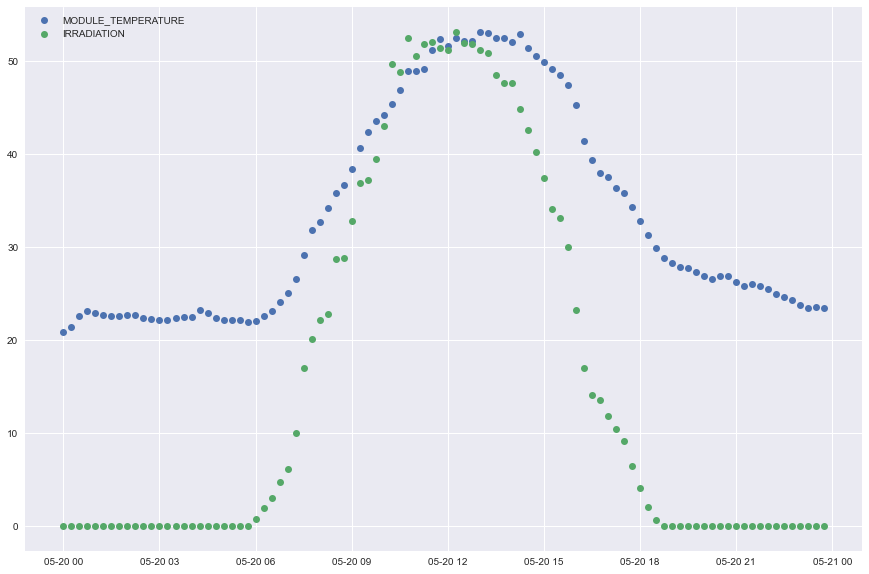

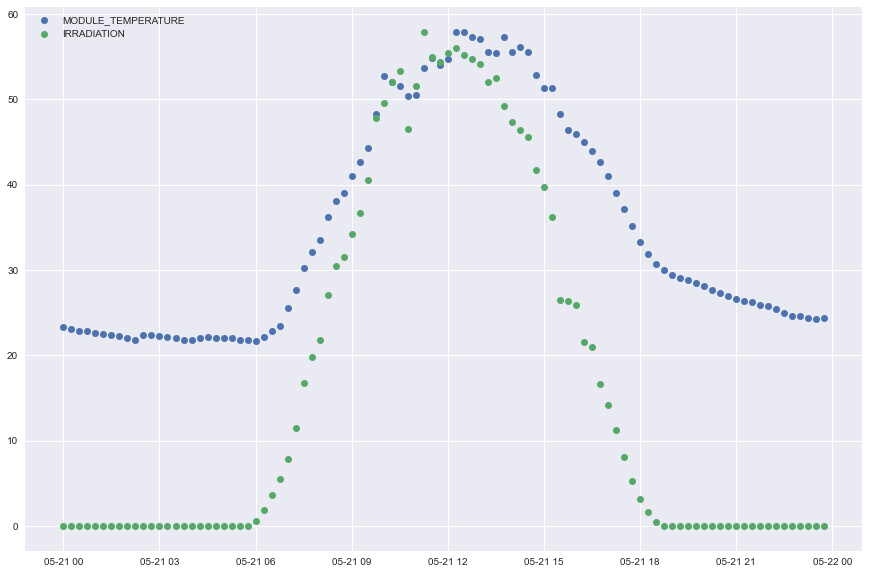

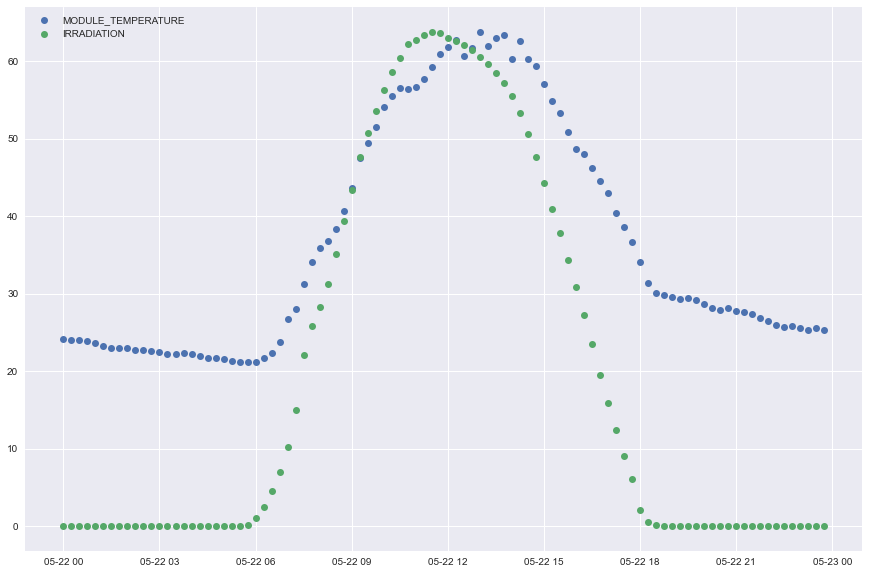

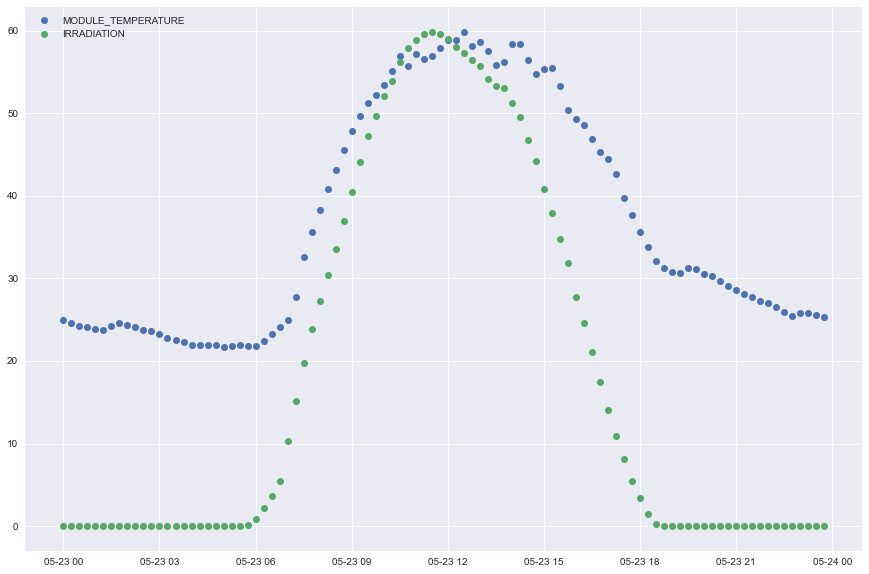

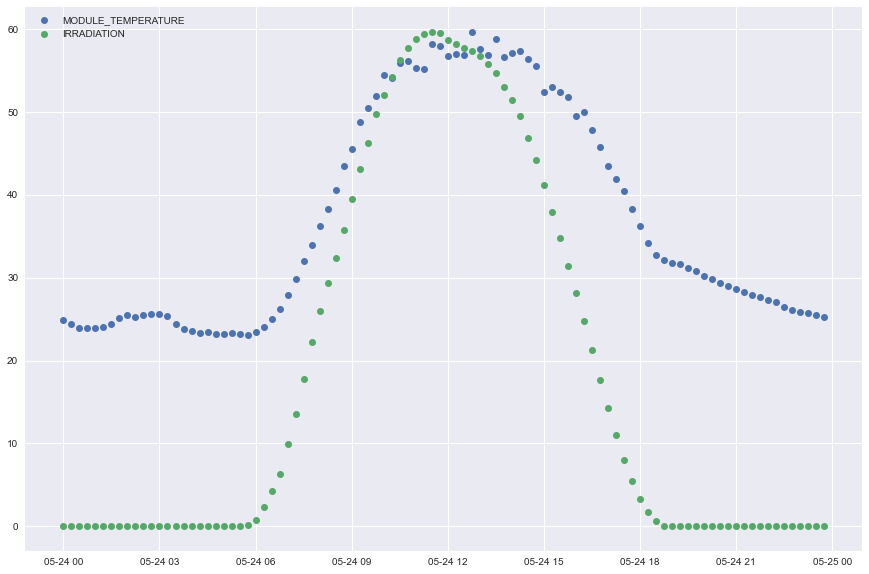

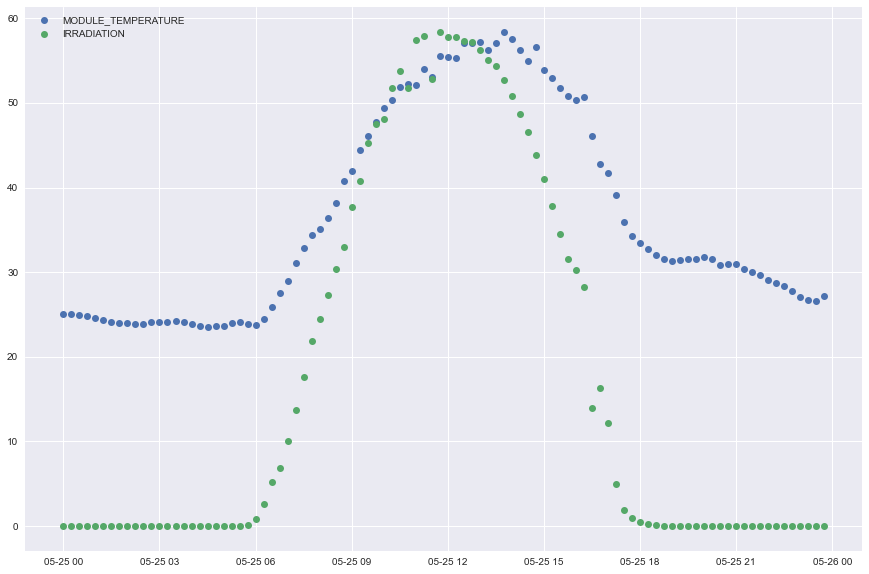

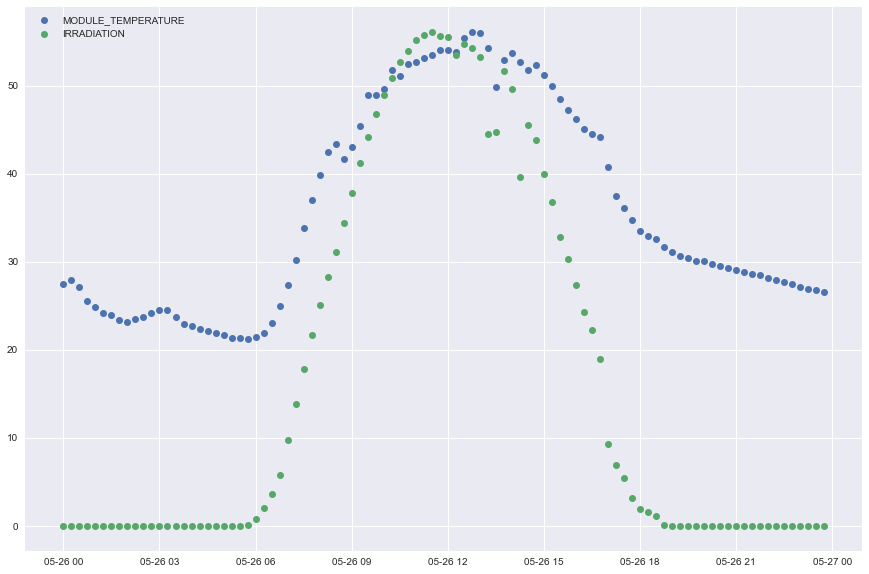

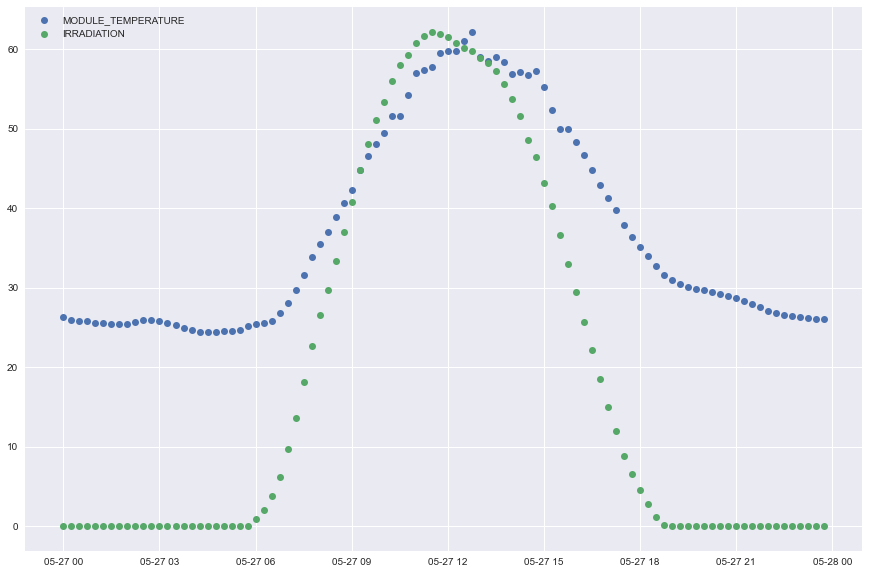

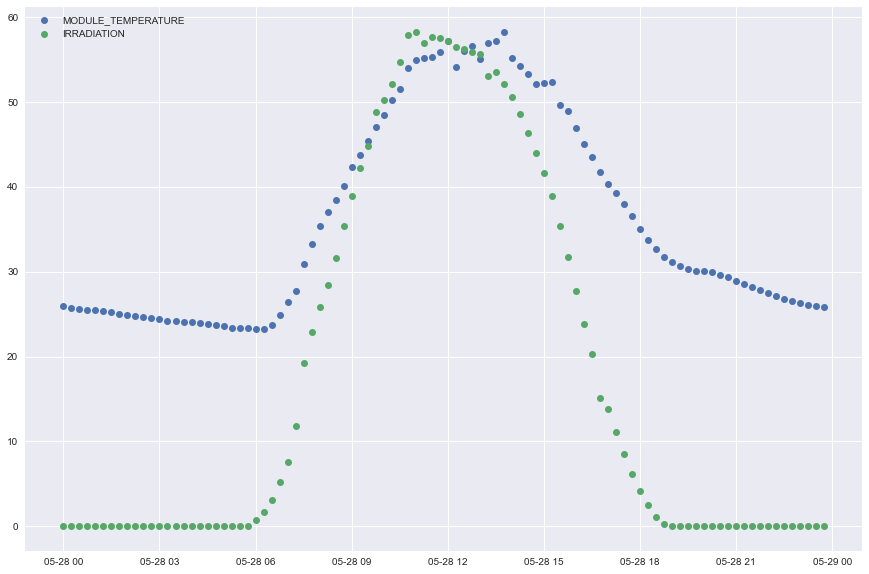

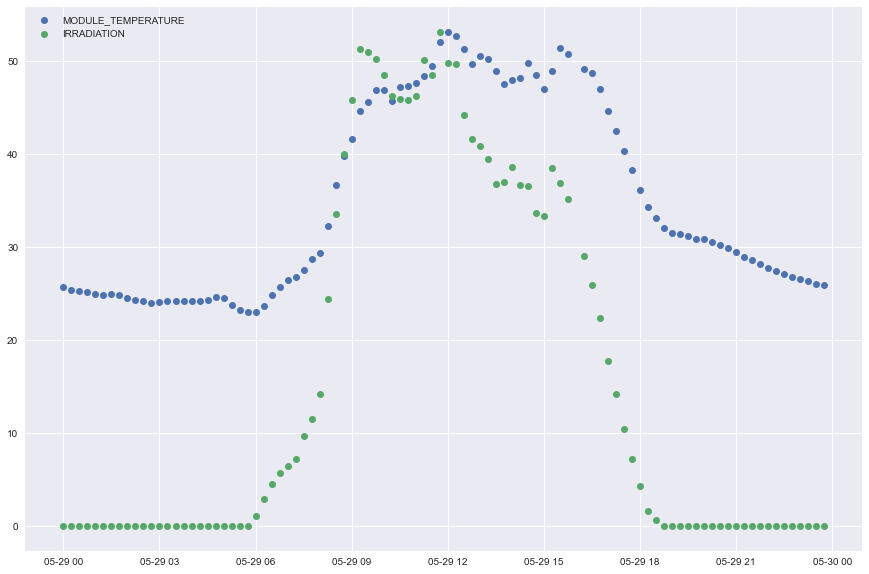

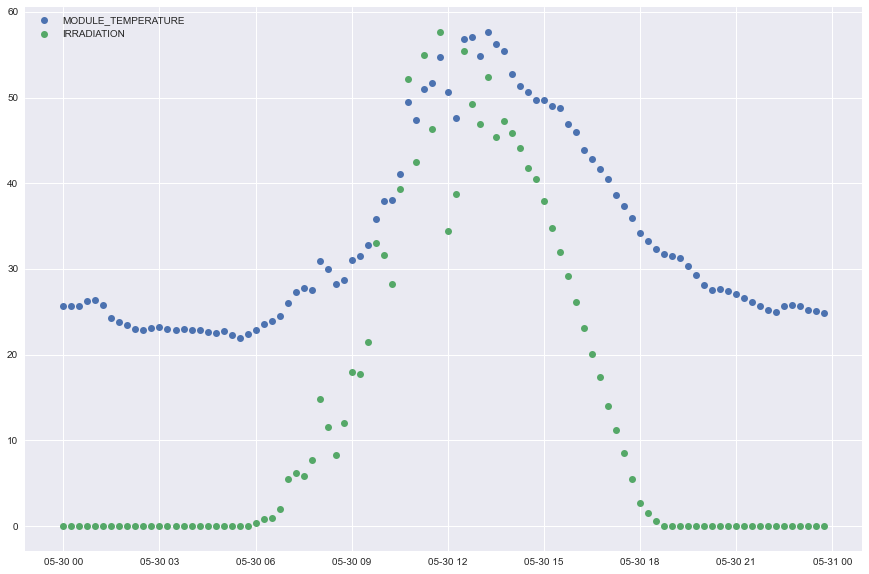

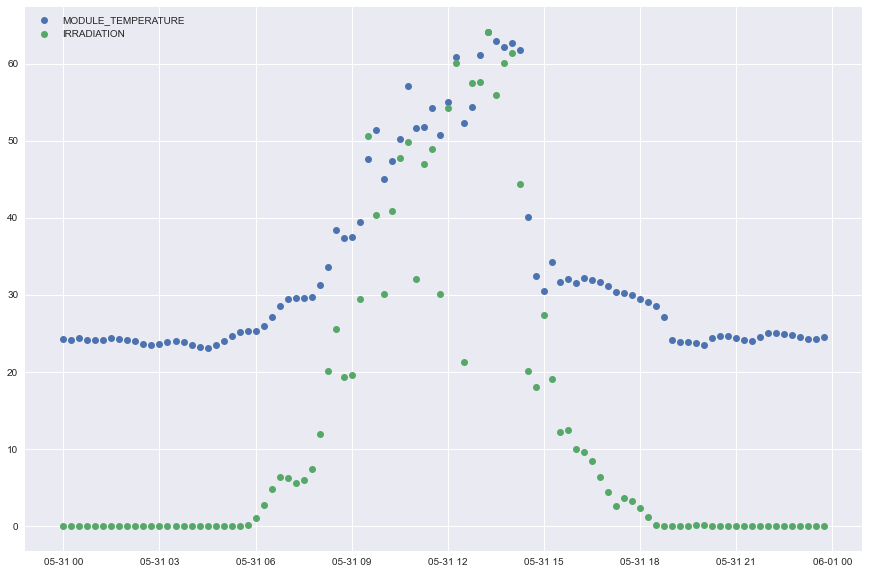

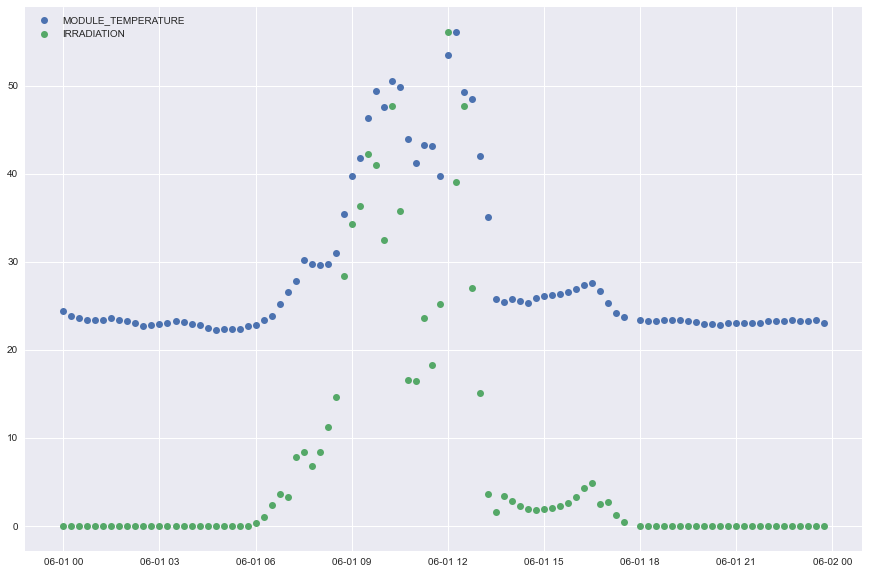

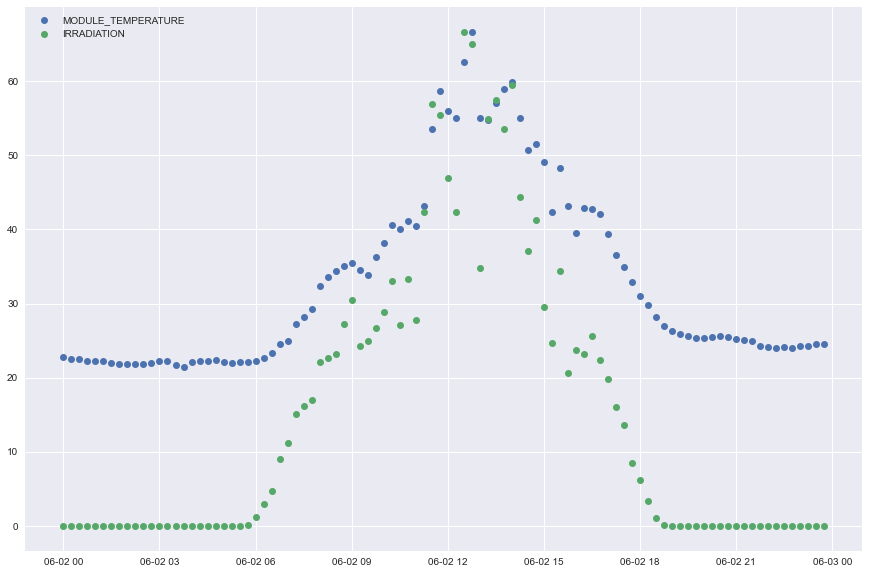

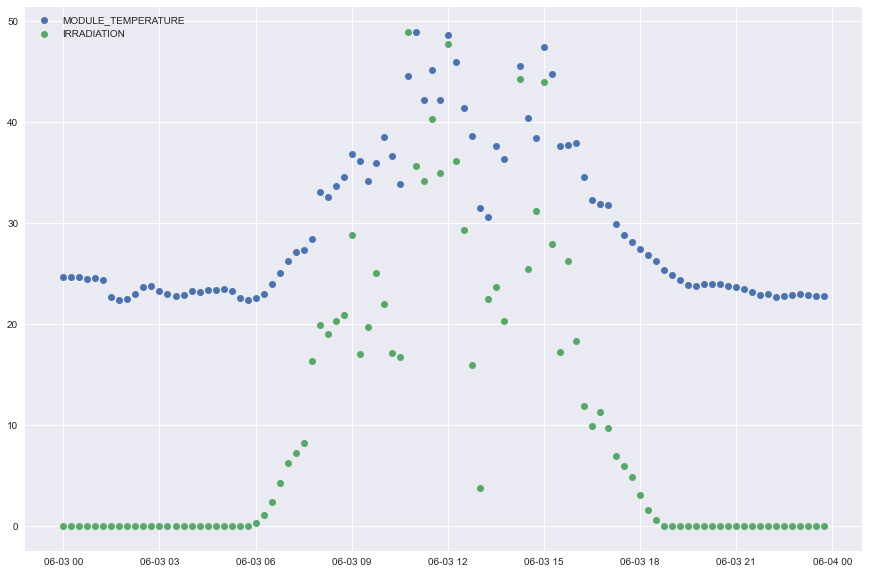

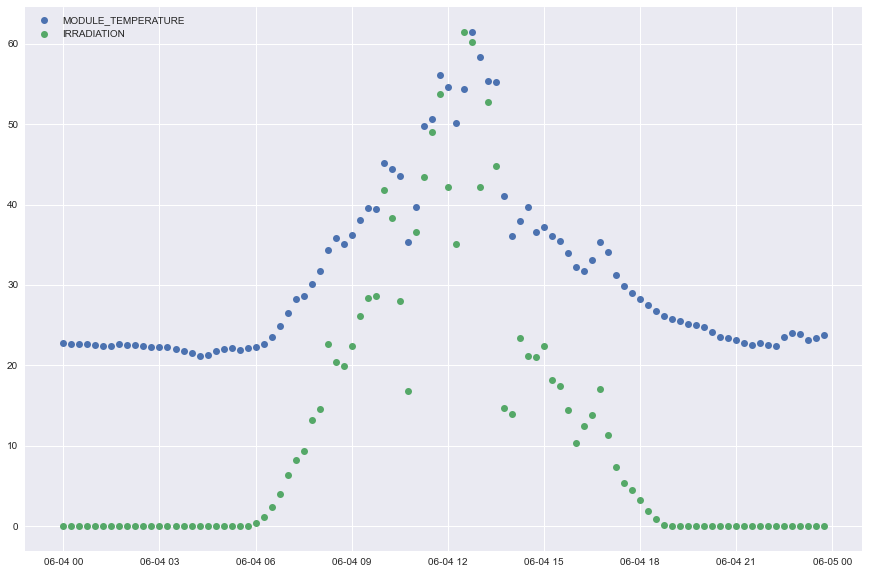

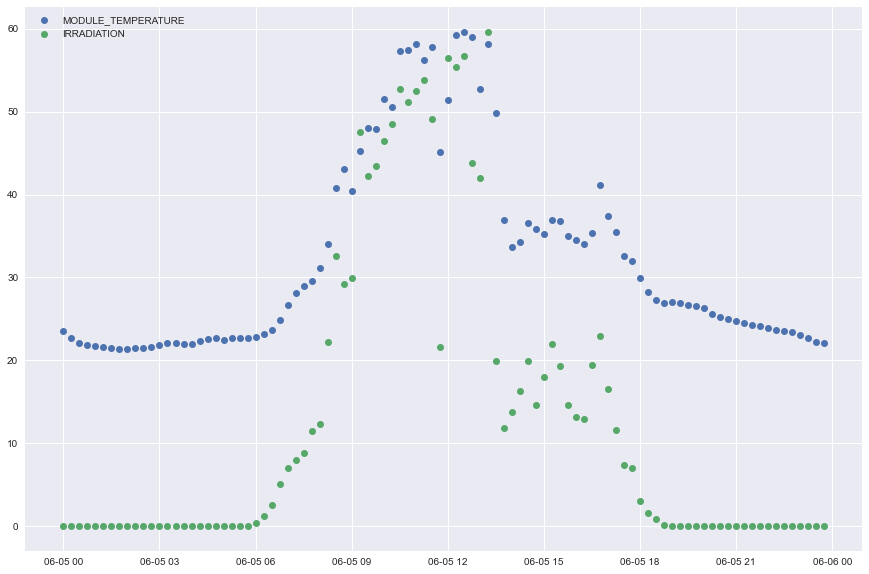

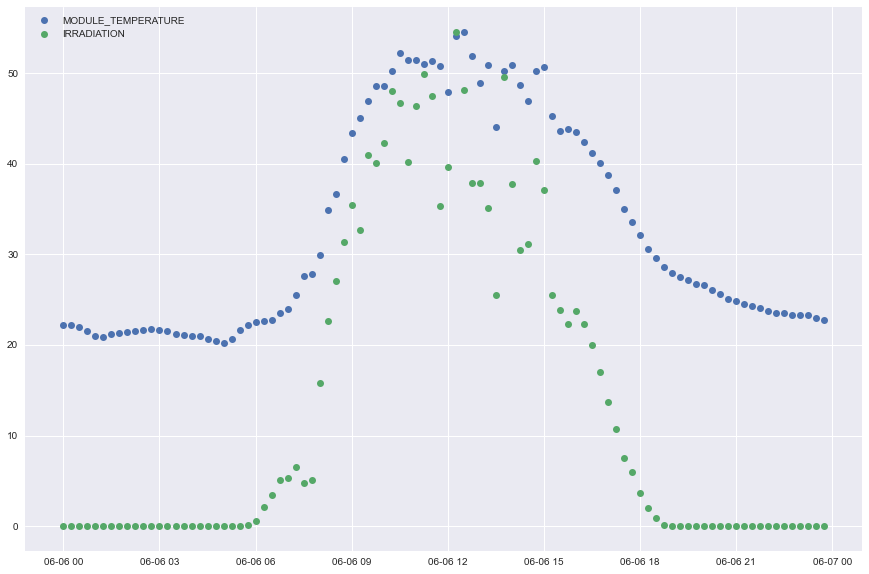

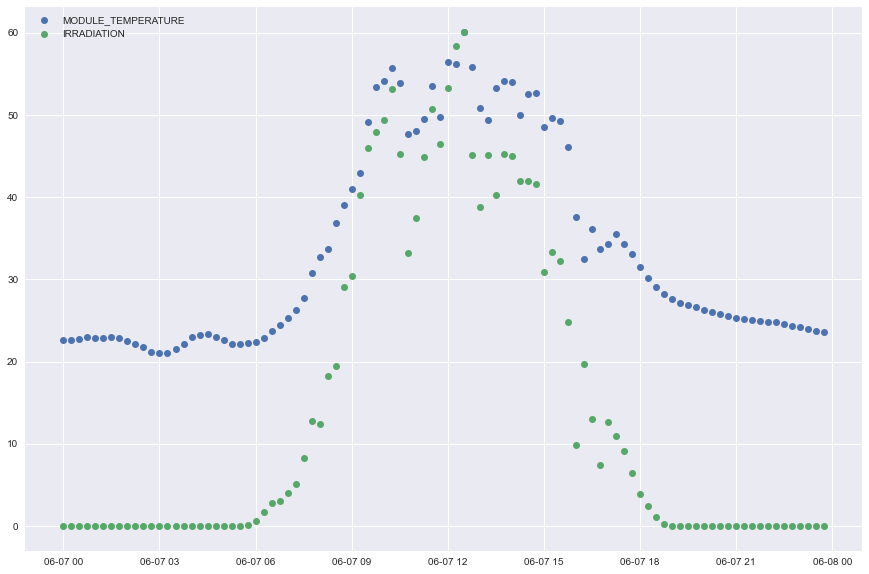

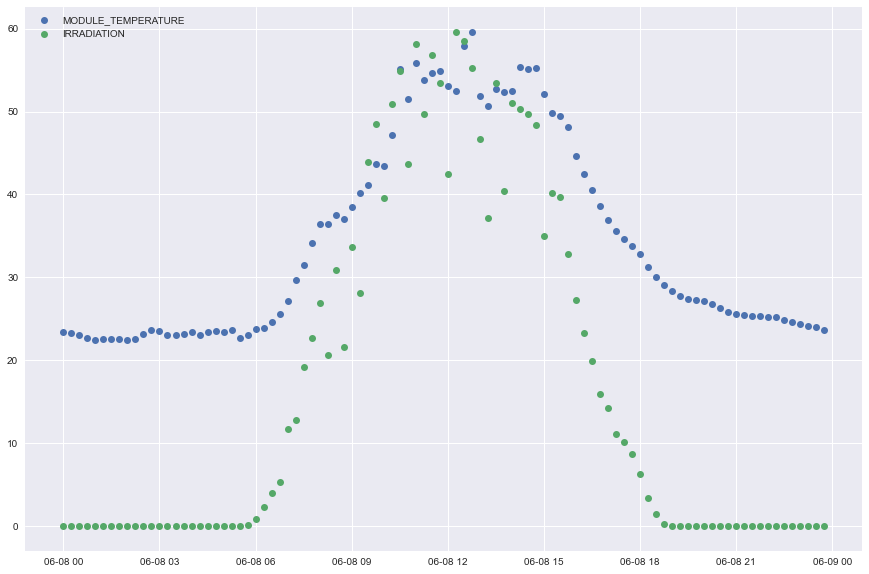

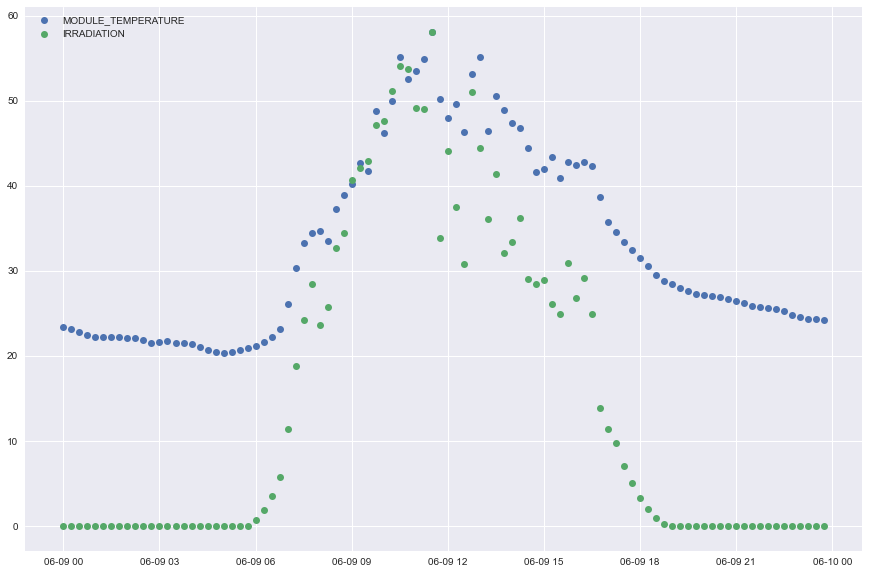

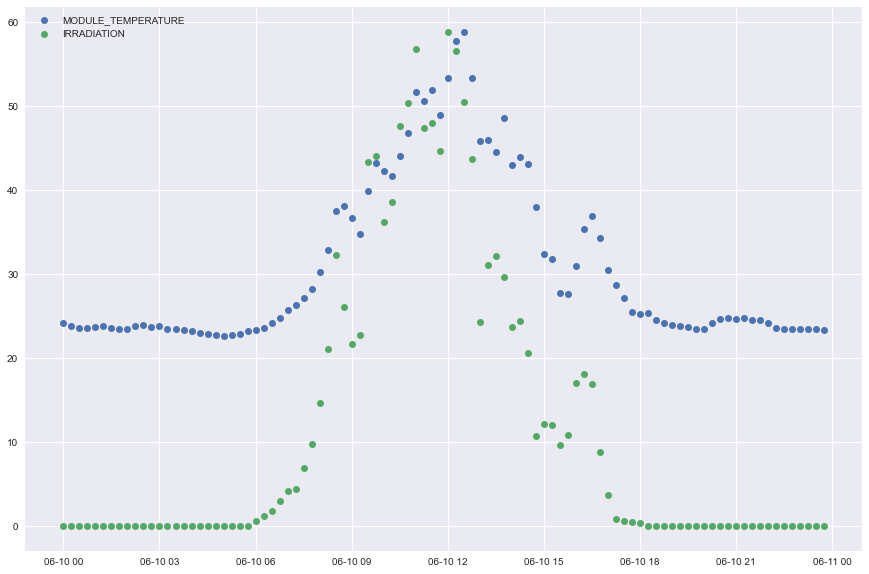

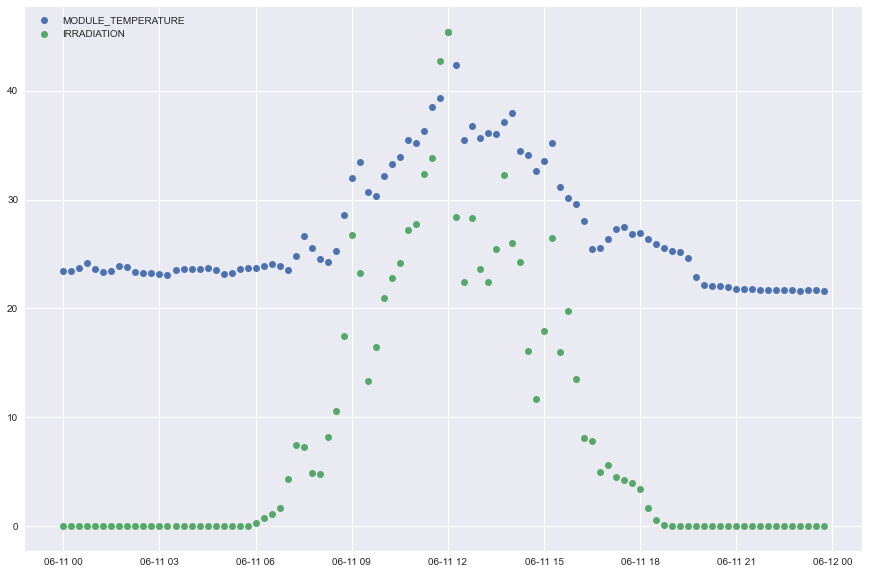

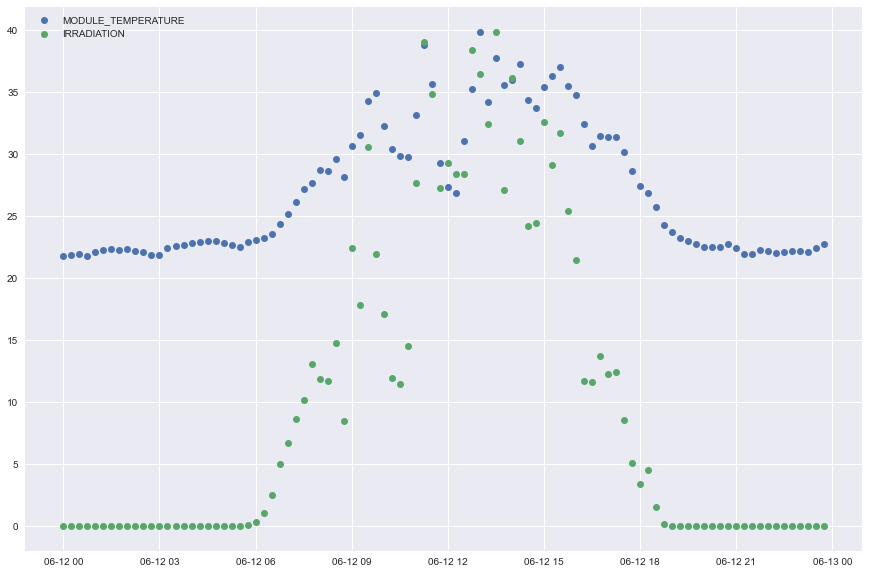

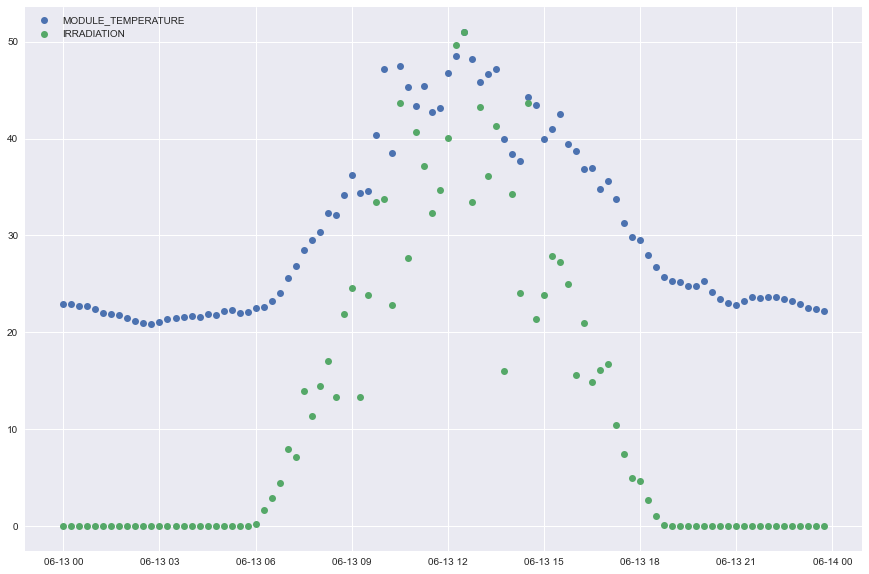

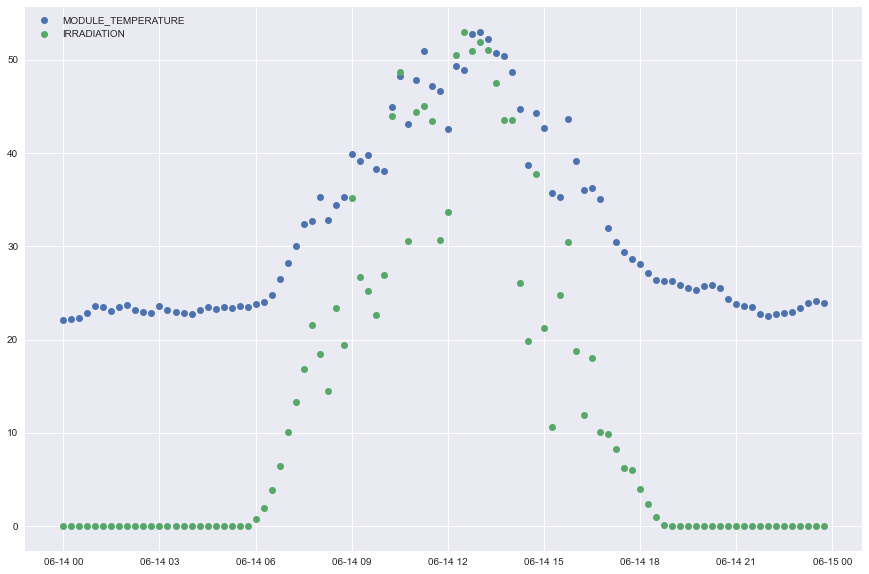

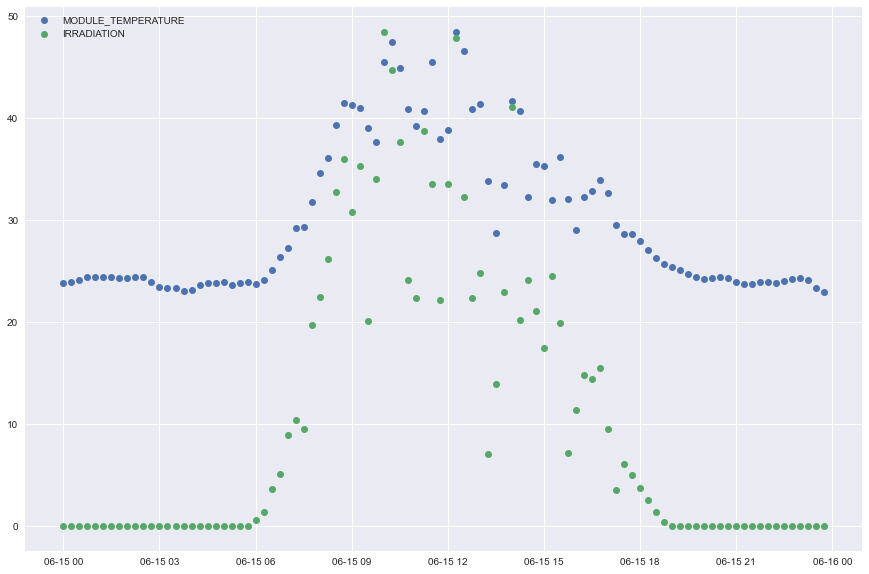

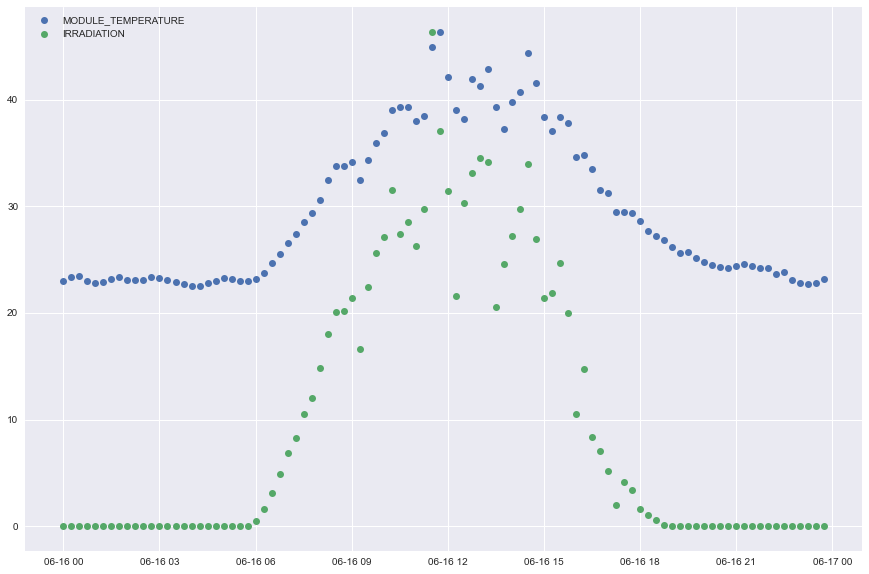

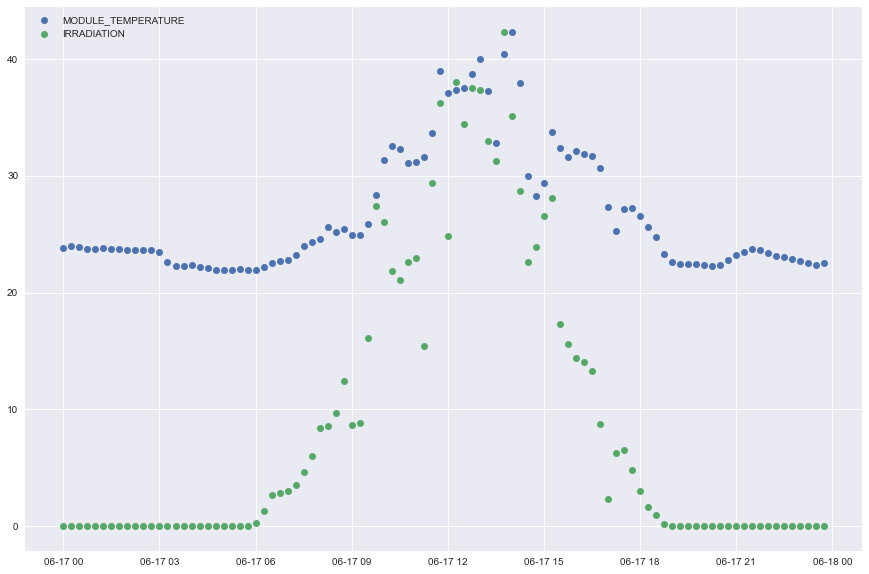

In [9]:
datetime_vs(plant_weat, 'MODULE_TEMPERATURE', 'IRRADIATION')

## Plot ambient temperature vs AC power for a number of inverters of the same plant

Plotting for the 4UPUqMRk7TRMgml source key 


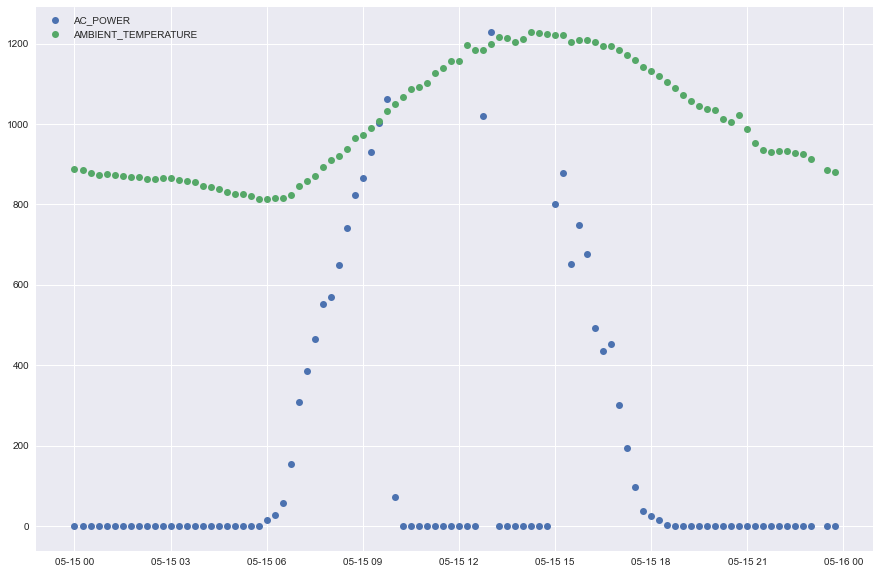

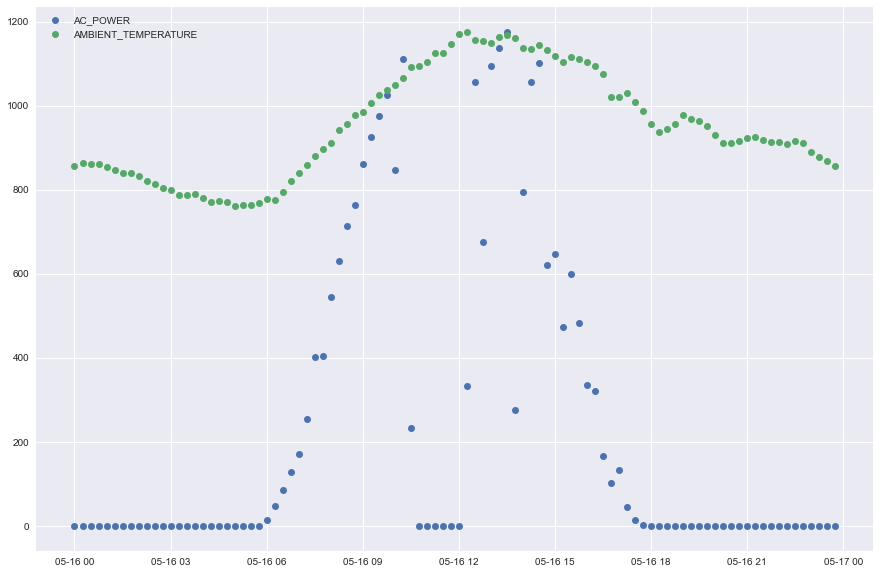

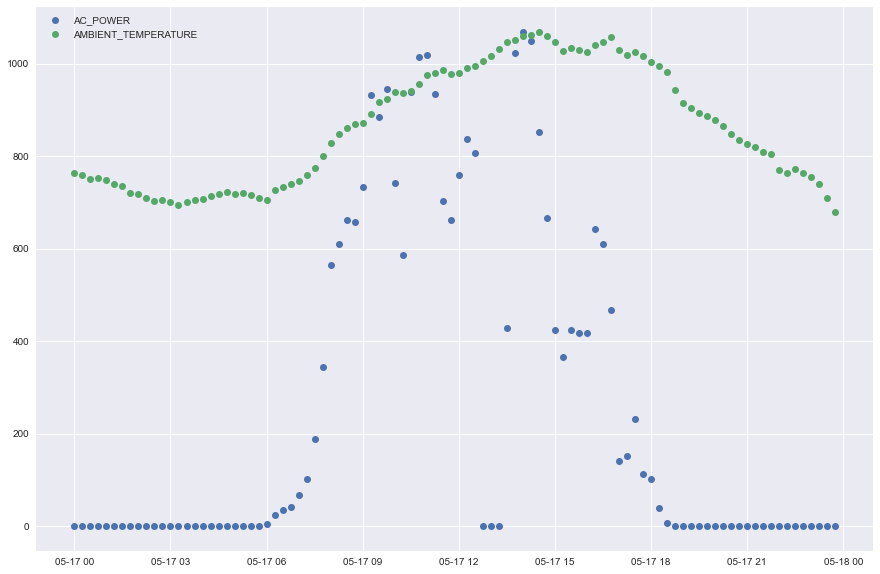

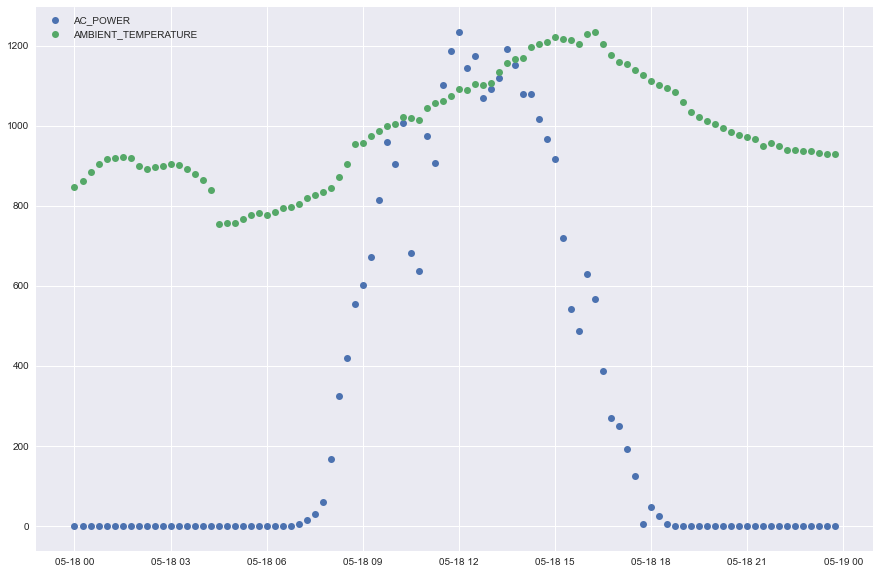

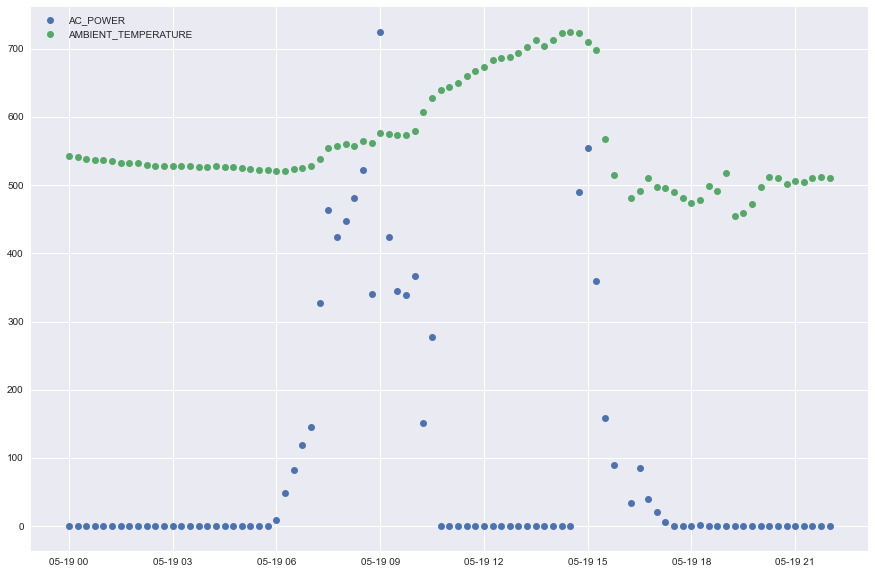

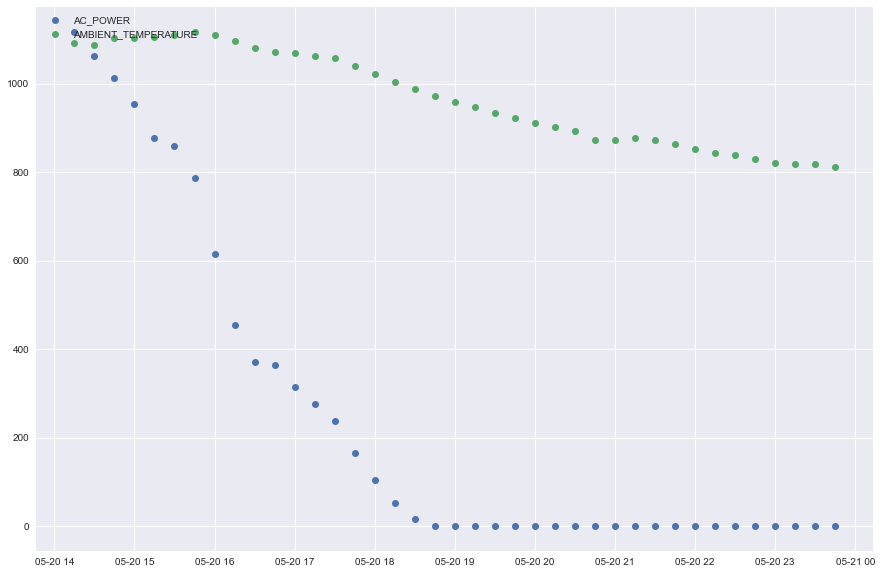

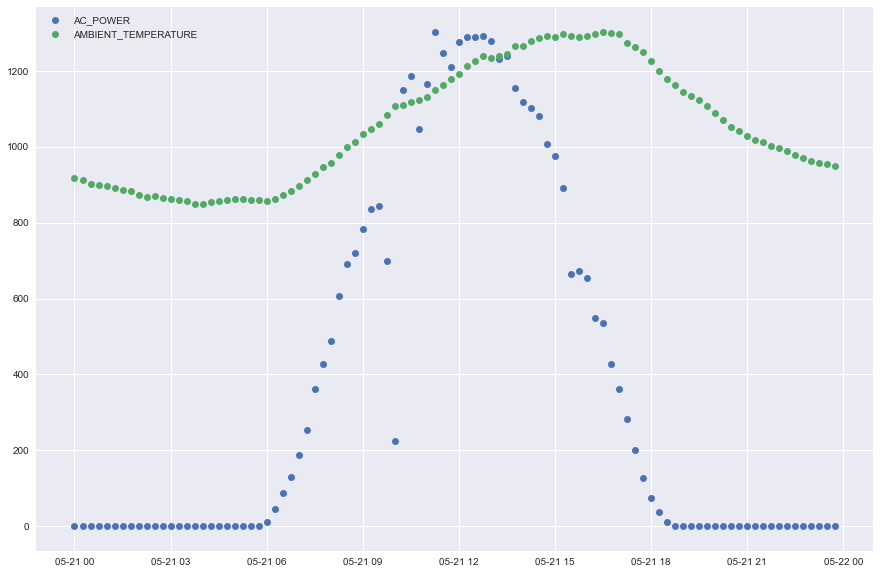

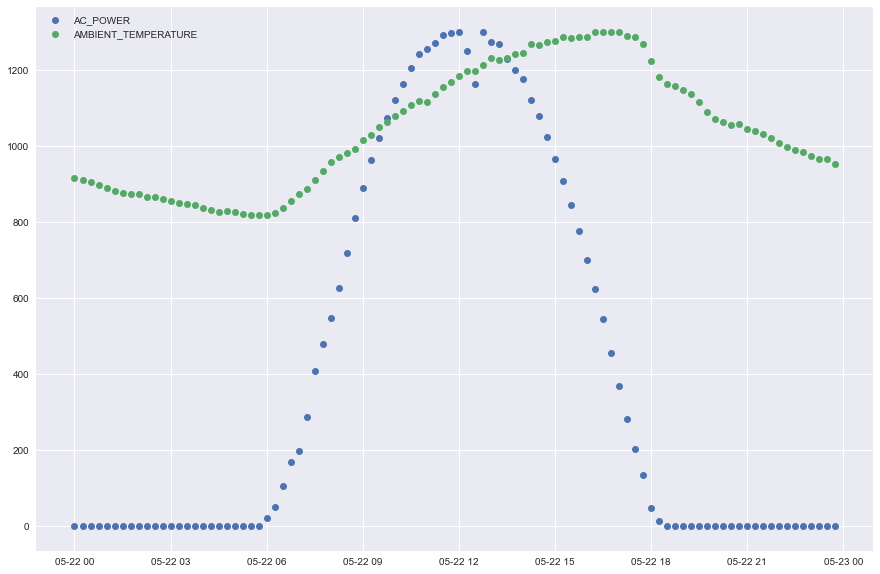

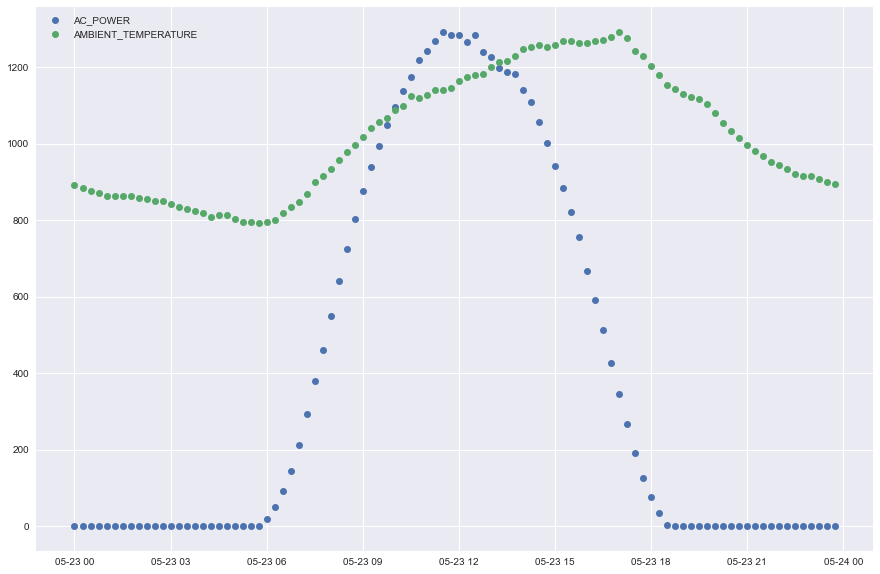

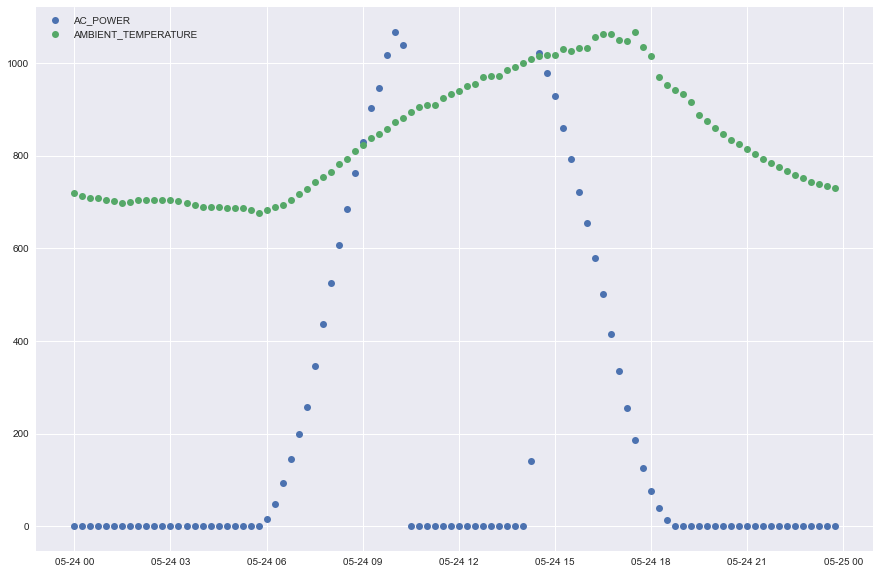

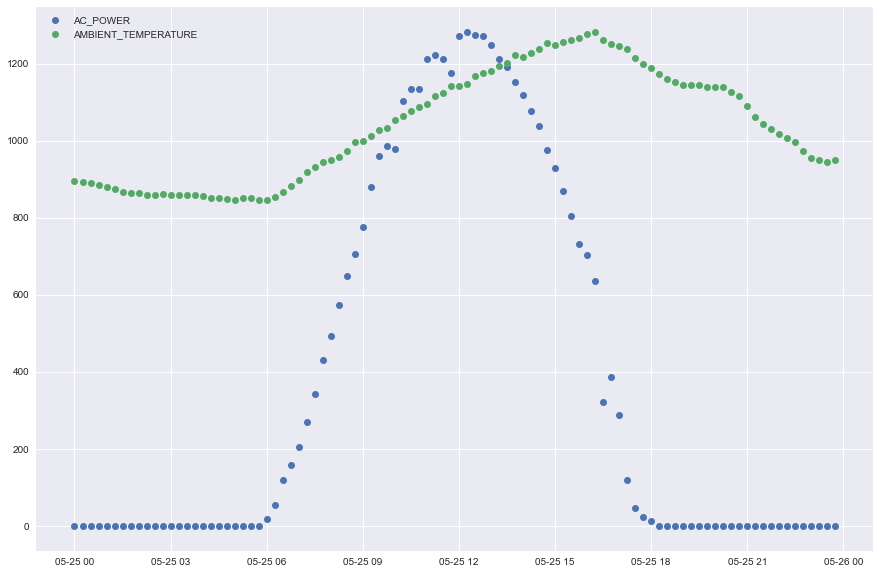

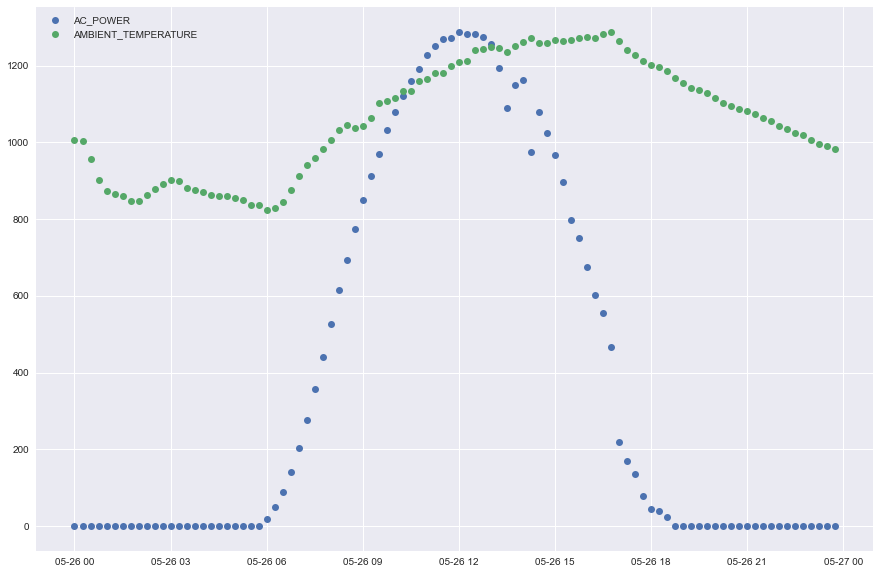

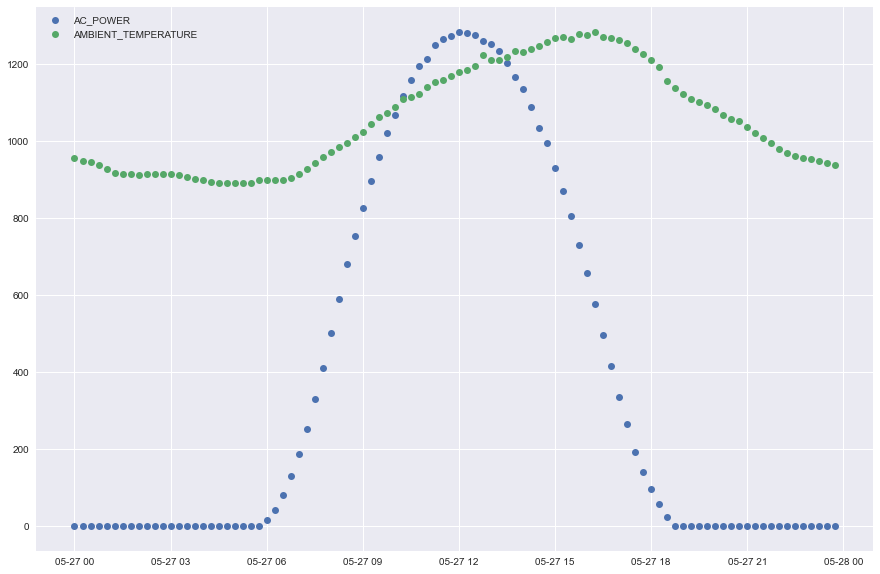

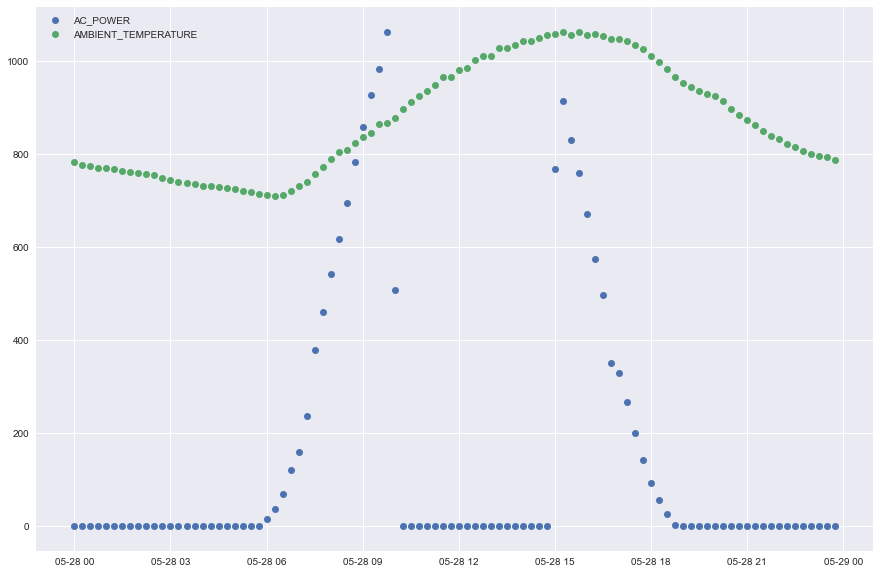

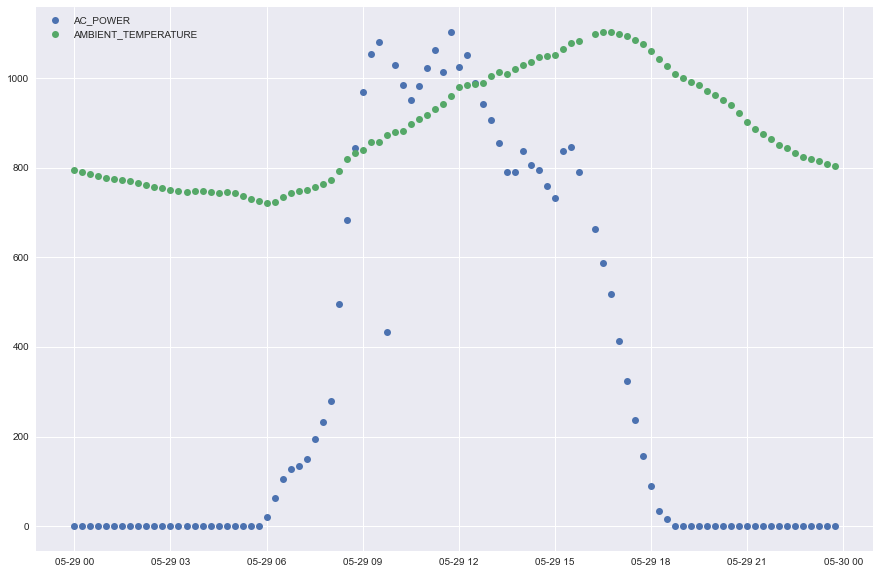

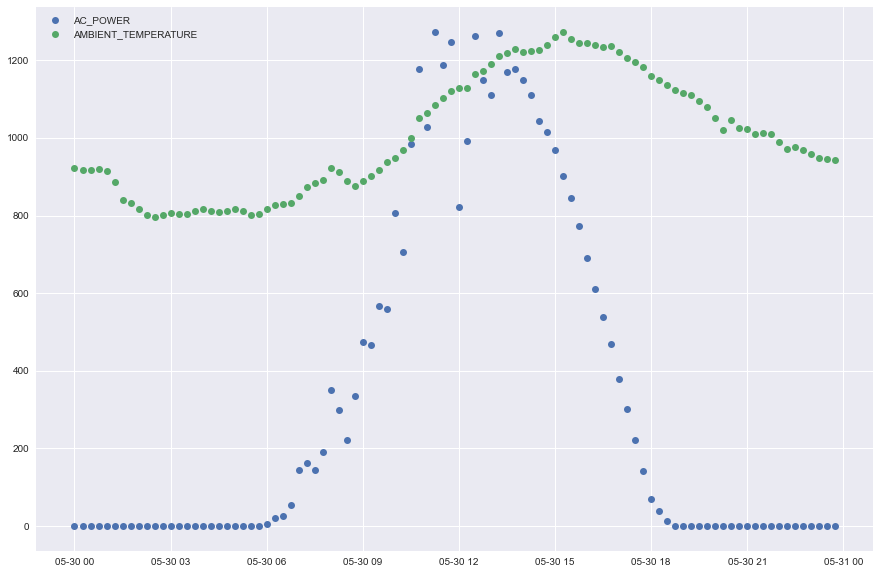

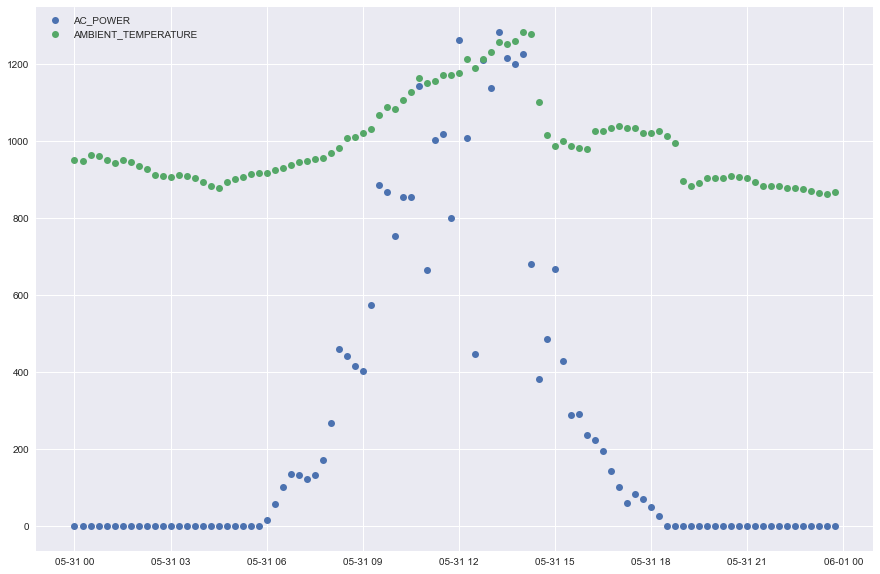

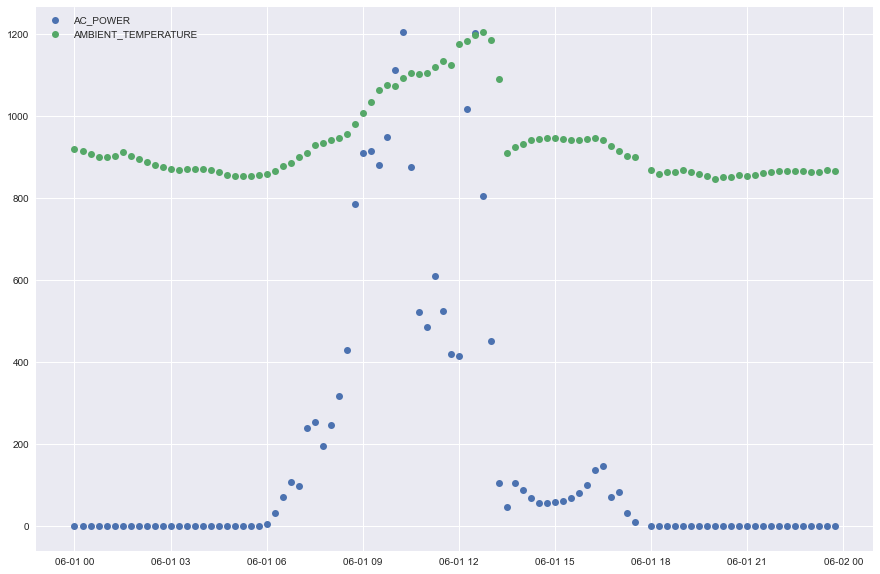

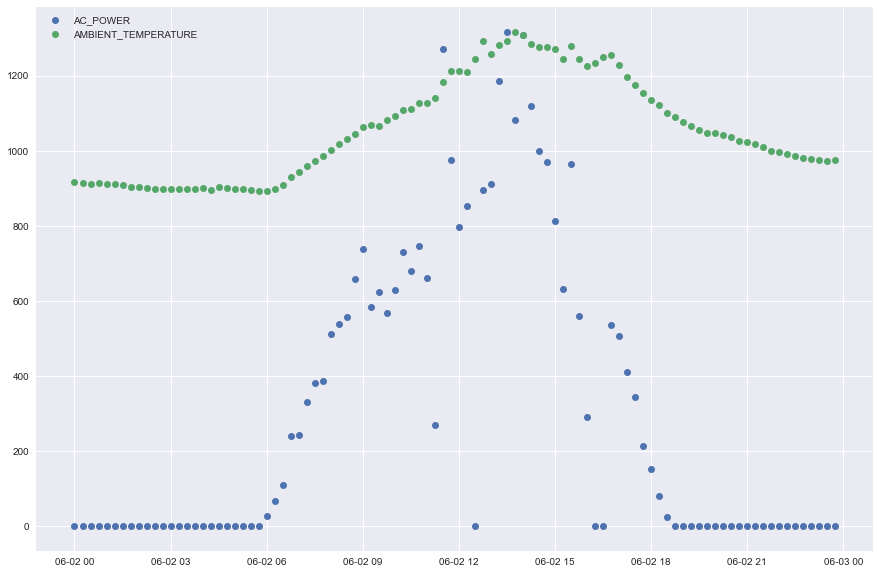

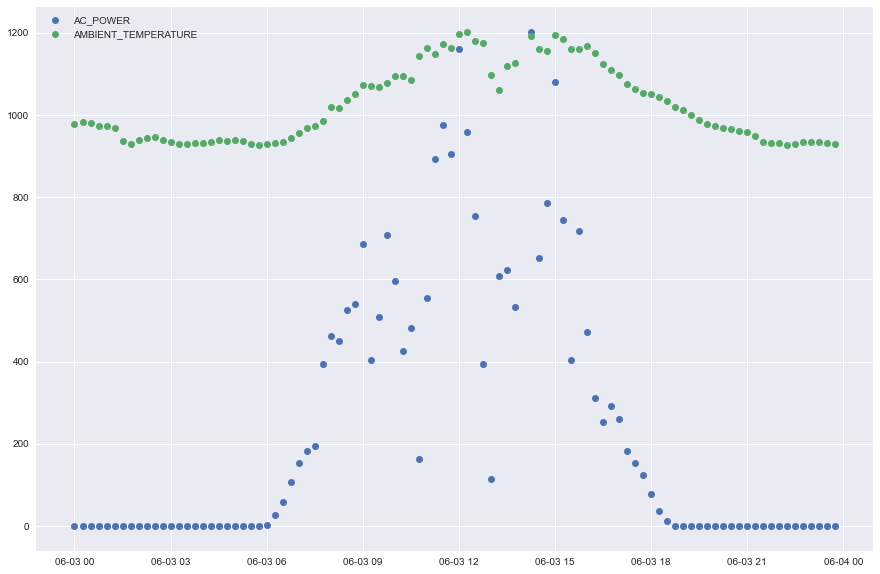

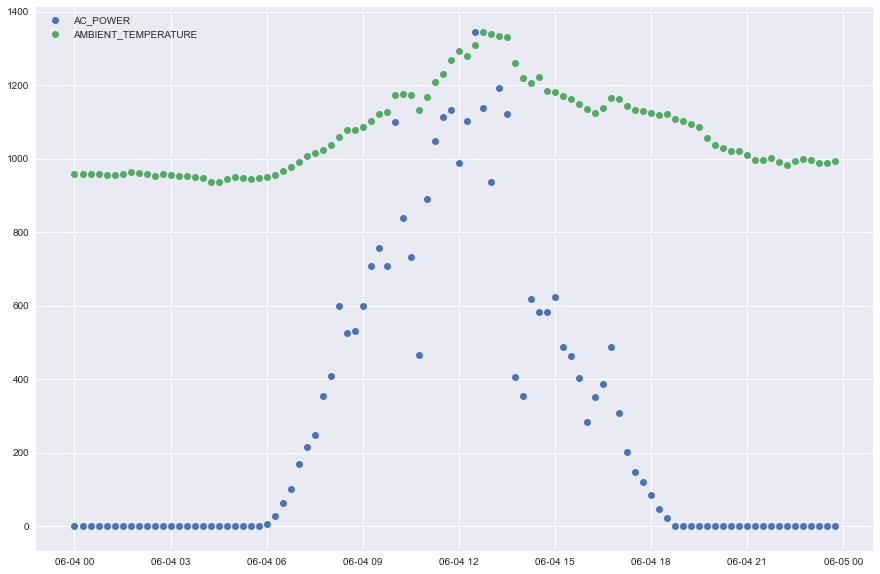

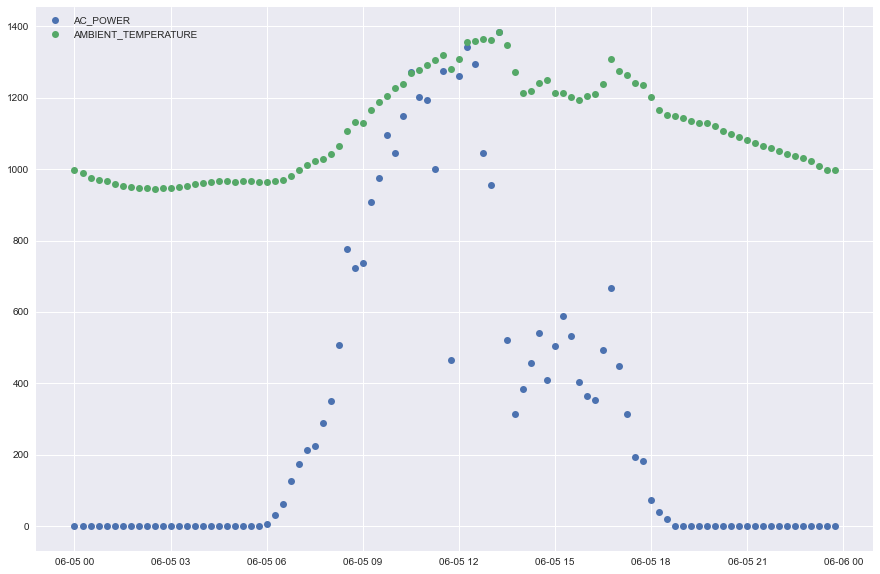

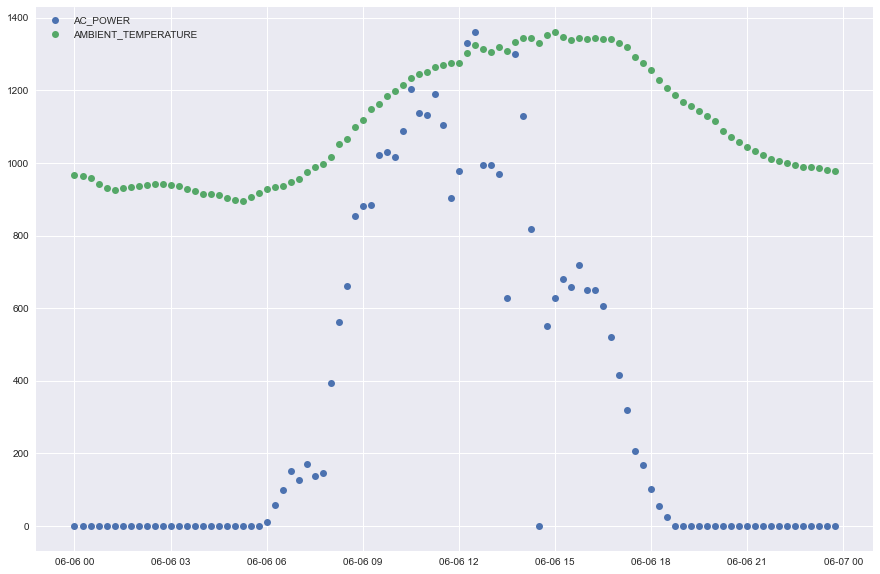

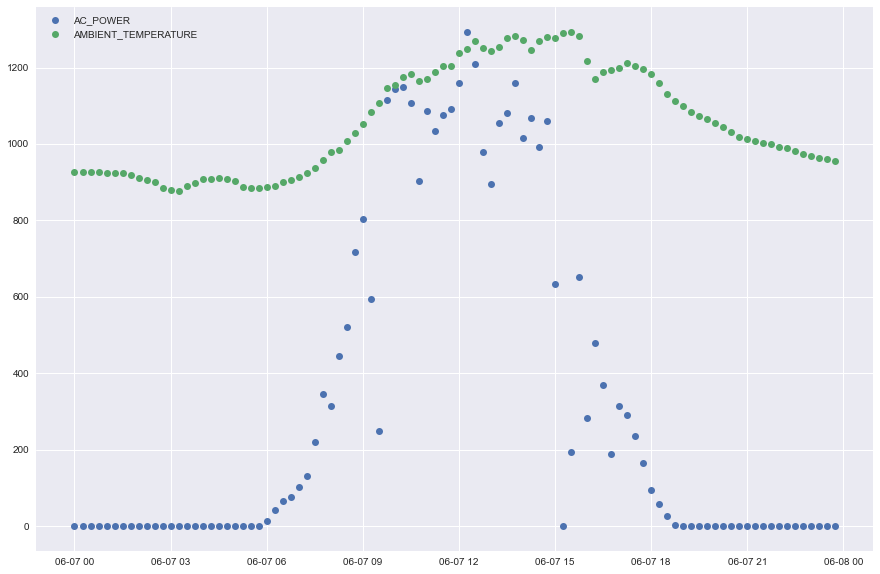

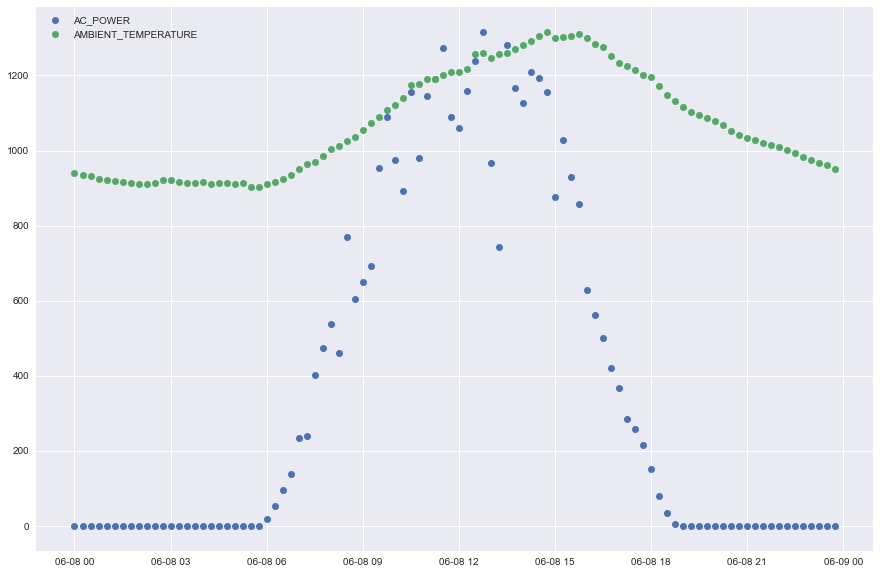

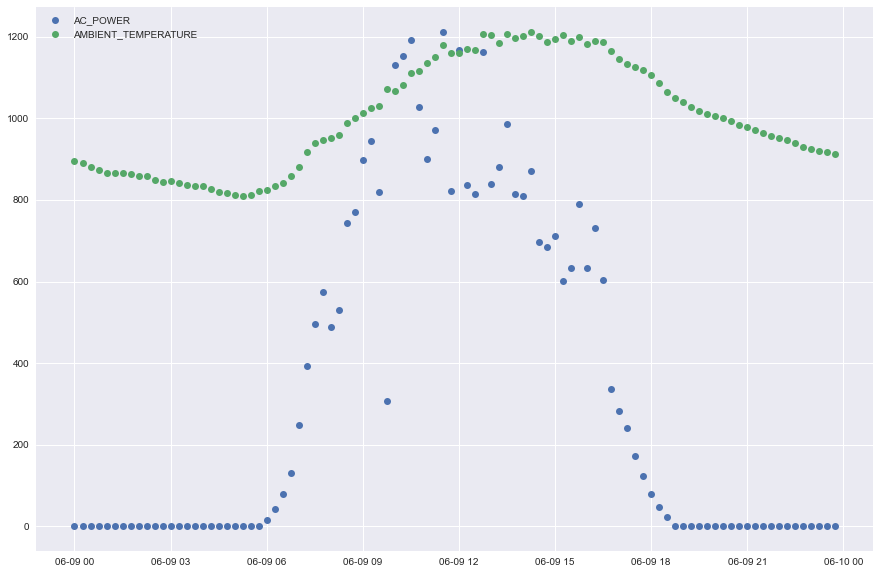

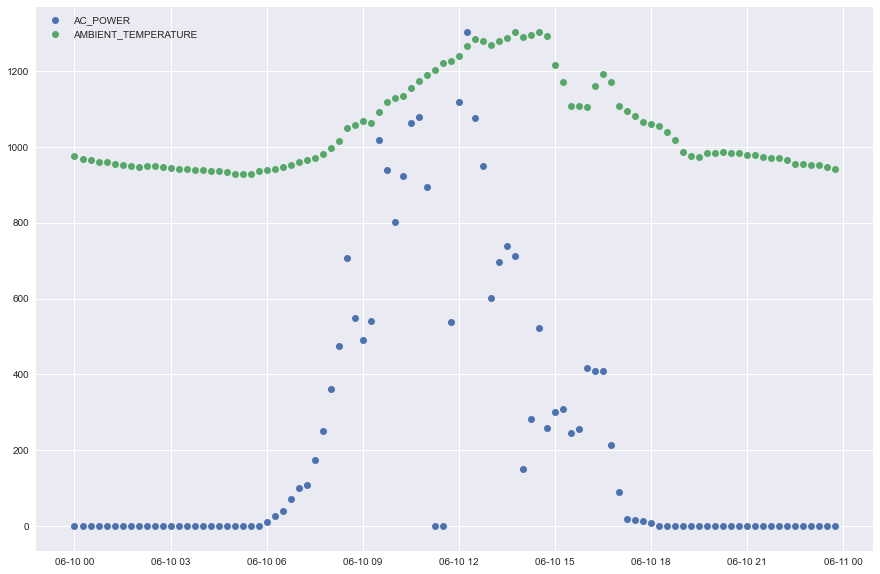

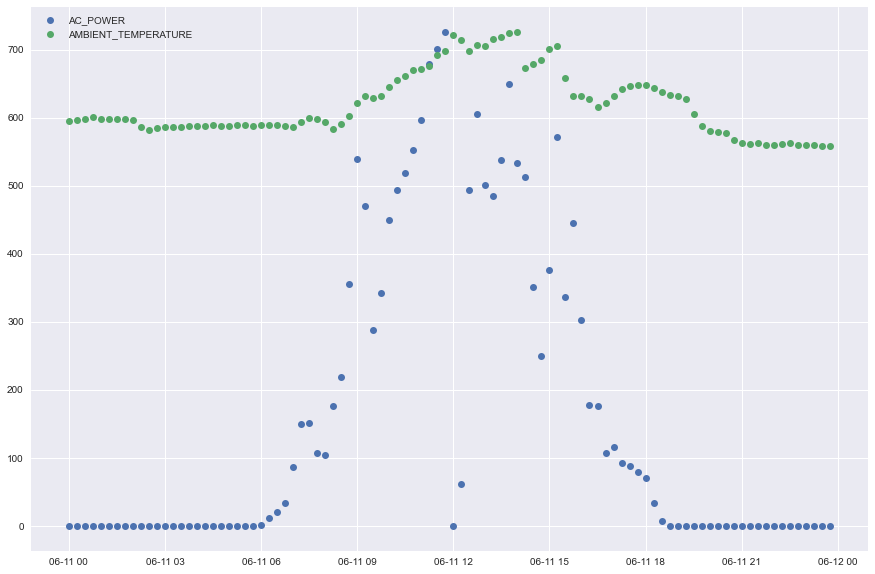

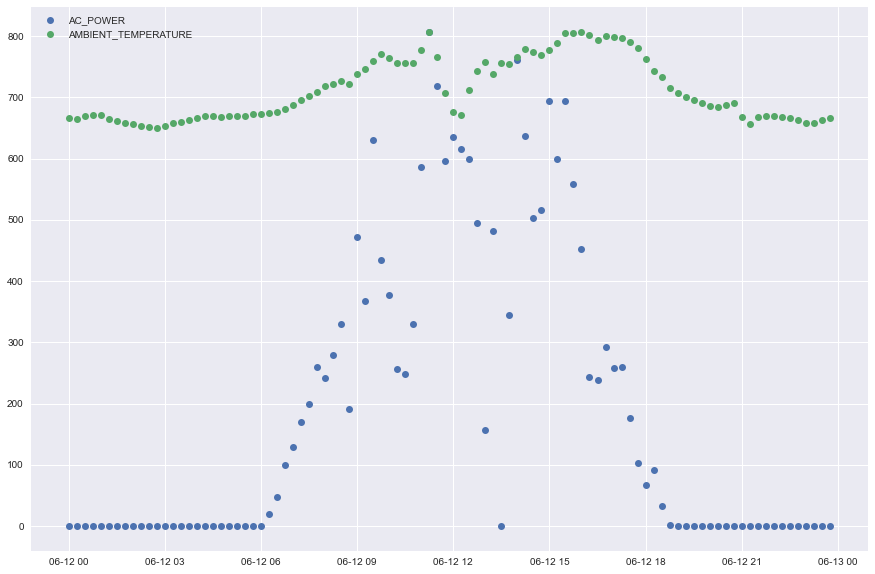

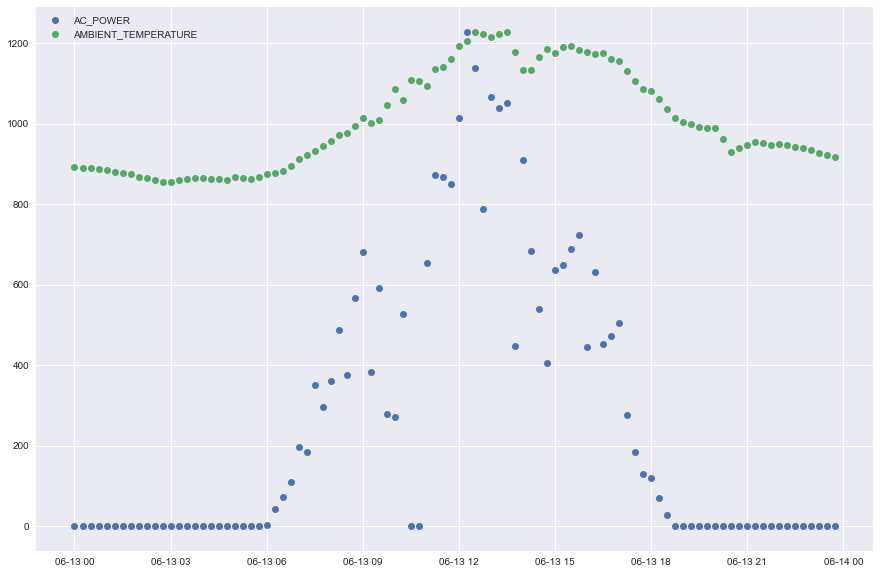

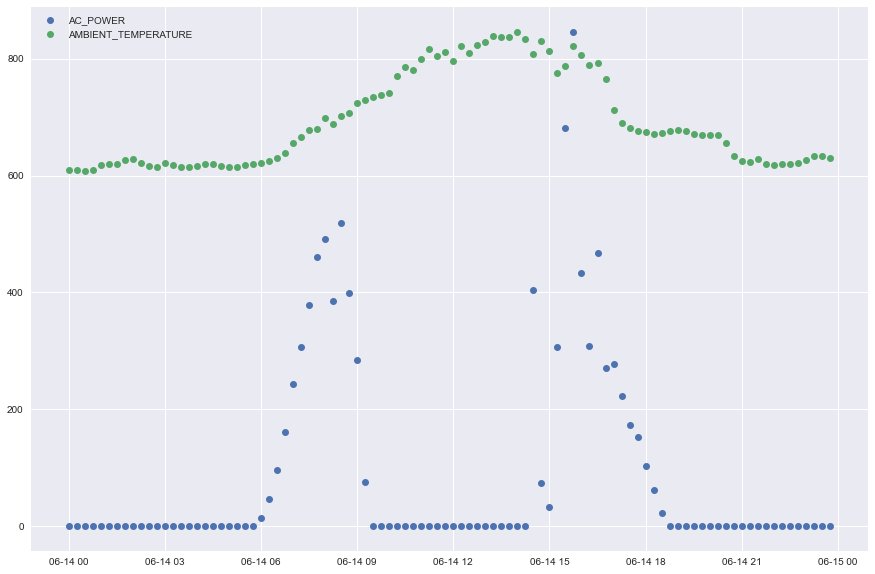

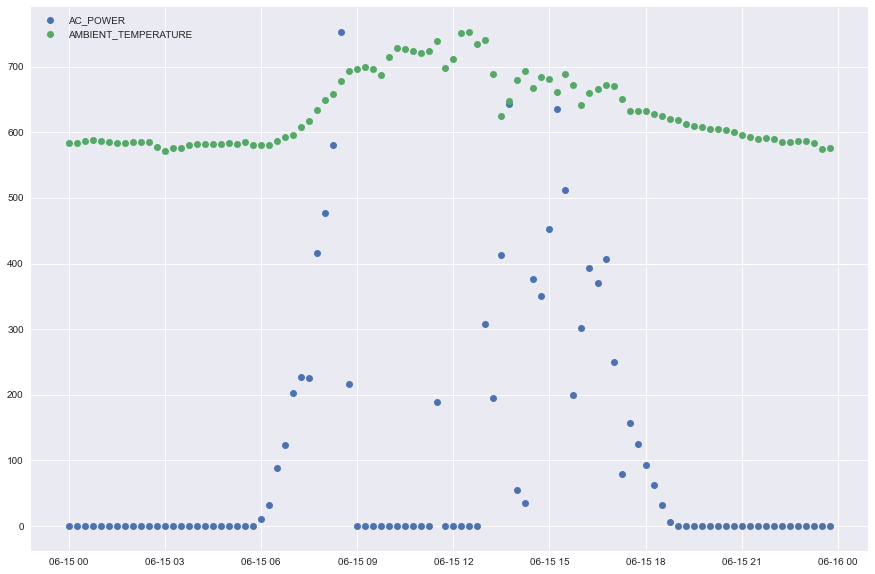

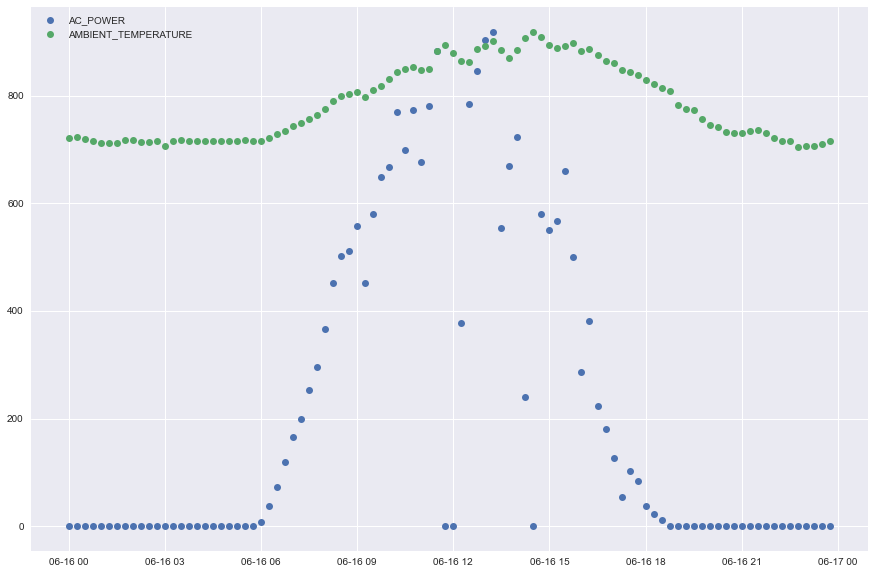

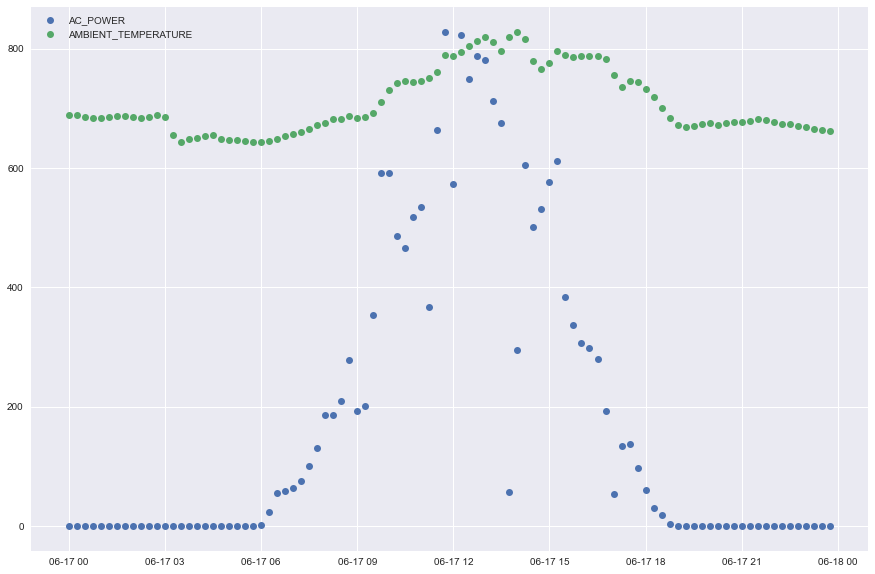

In [10]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'AC_POWER', 'AMBIENT_TEMPERATURE')

## Plot ambient temperature vs DC for a number of inverters of the same plant

Plotting for the 4UPUqMRk7TRMgml source key 


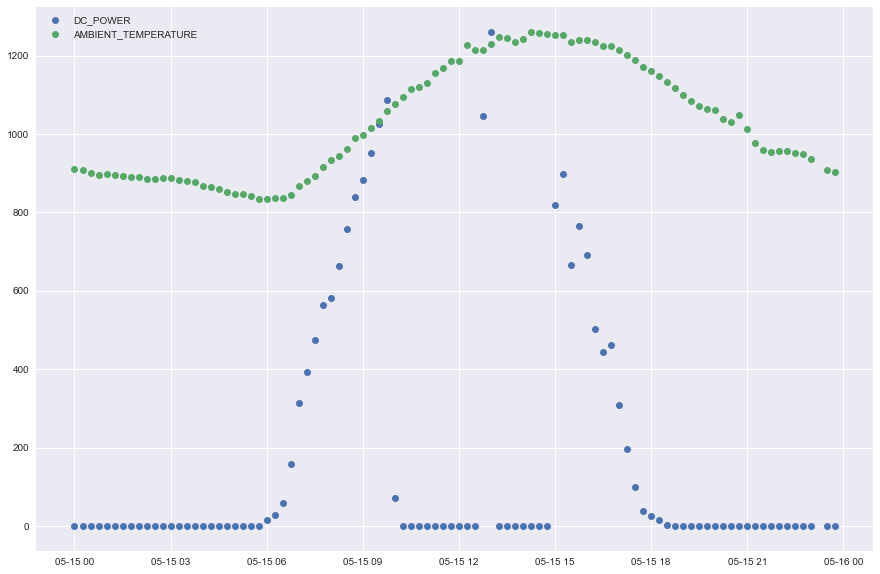

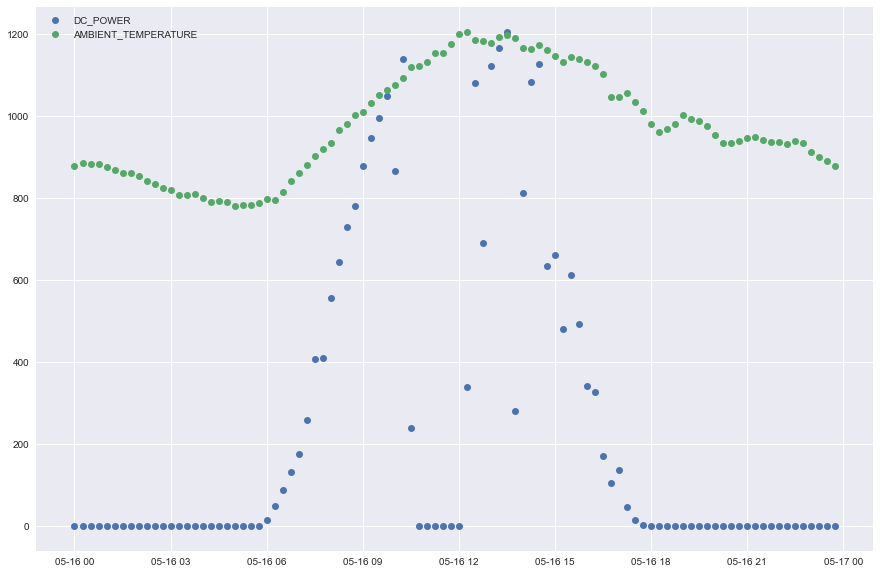

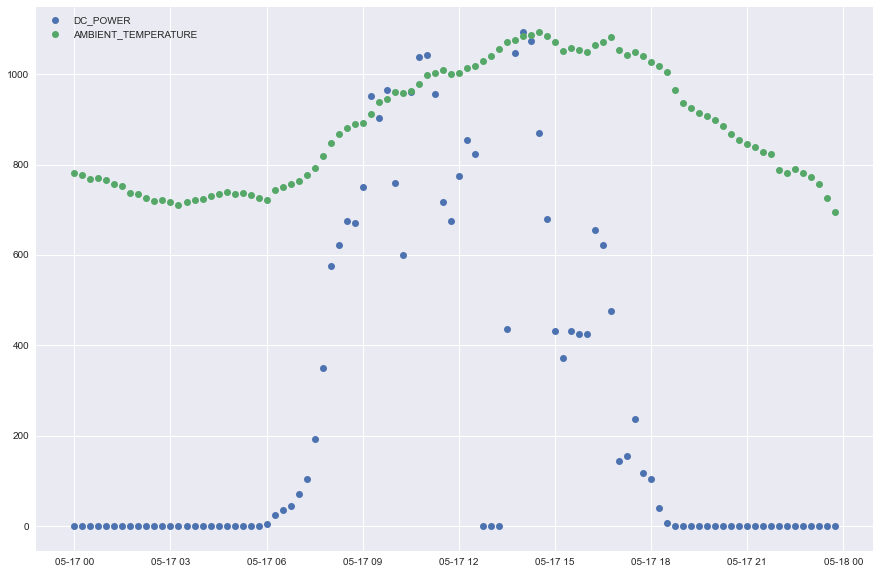

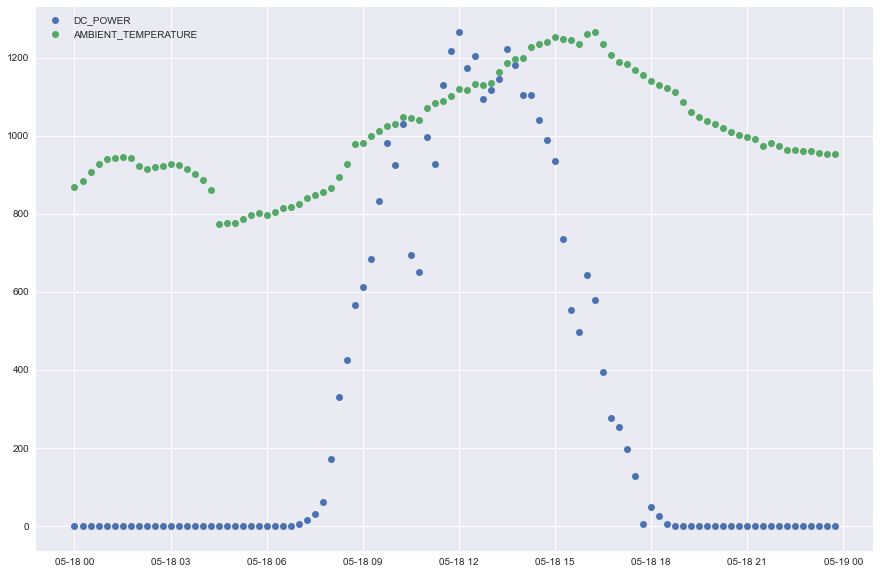

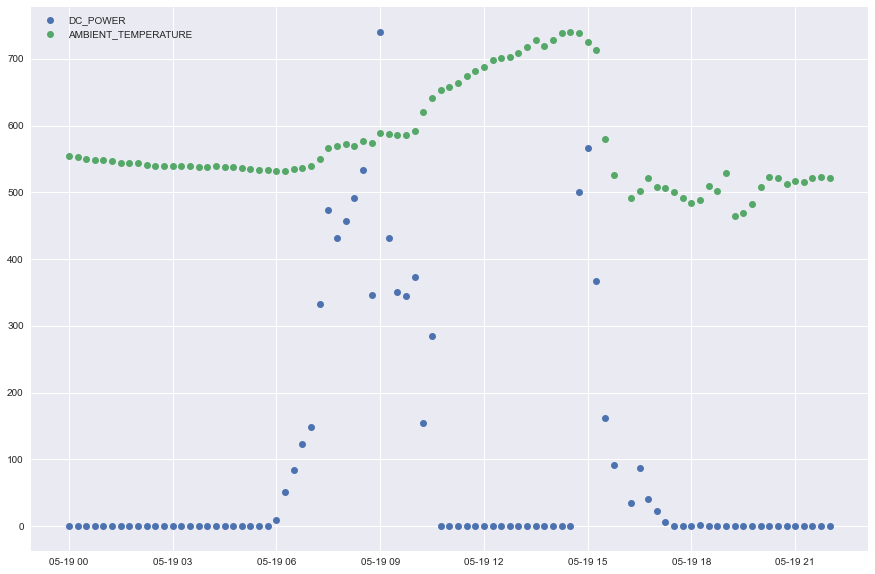

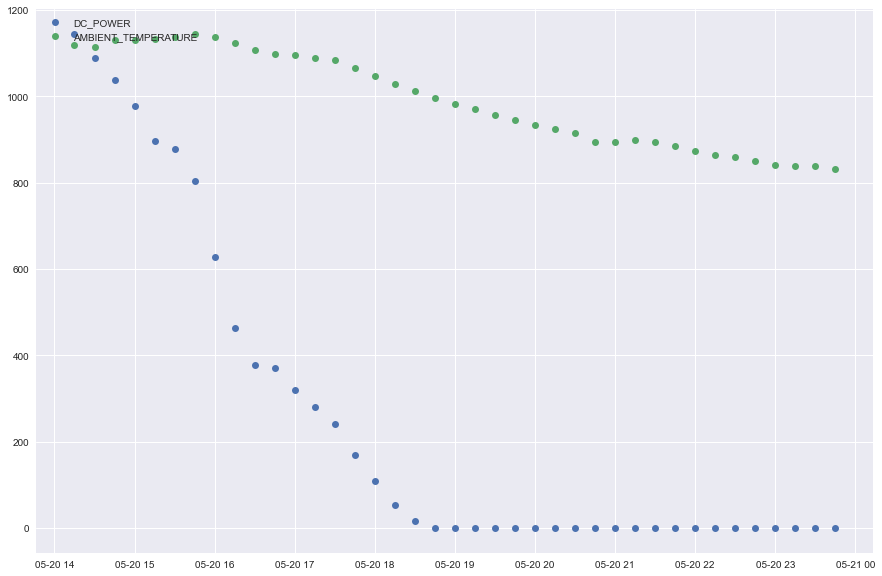

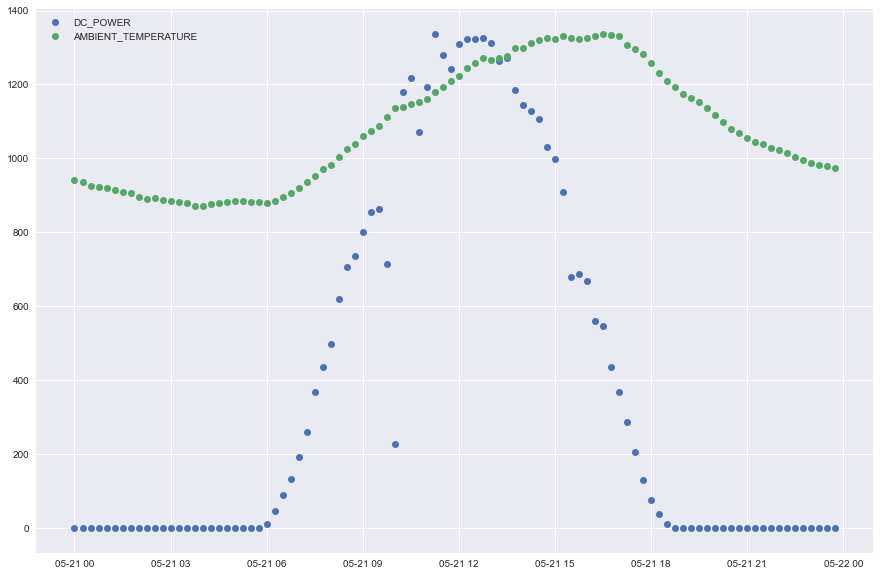

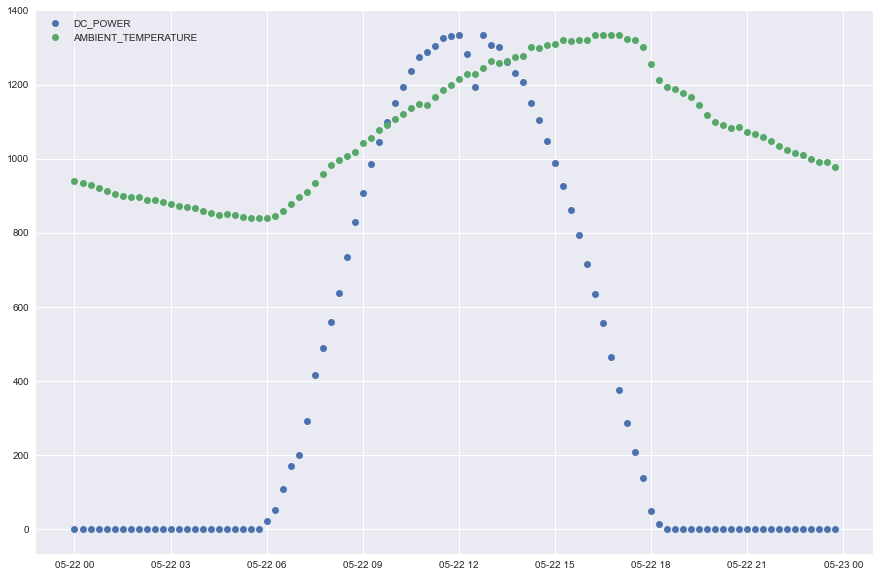

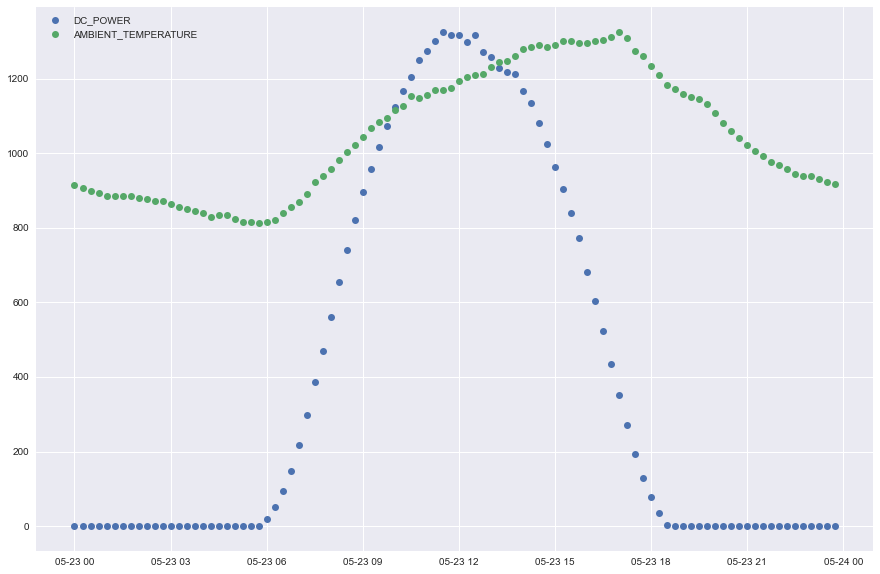

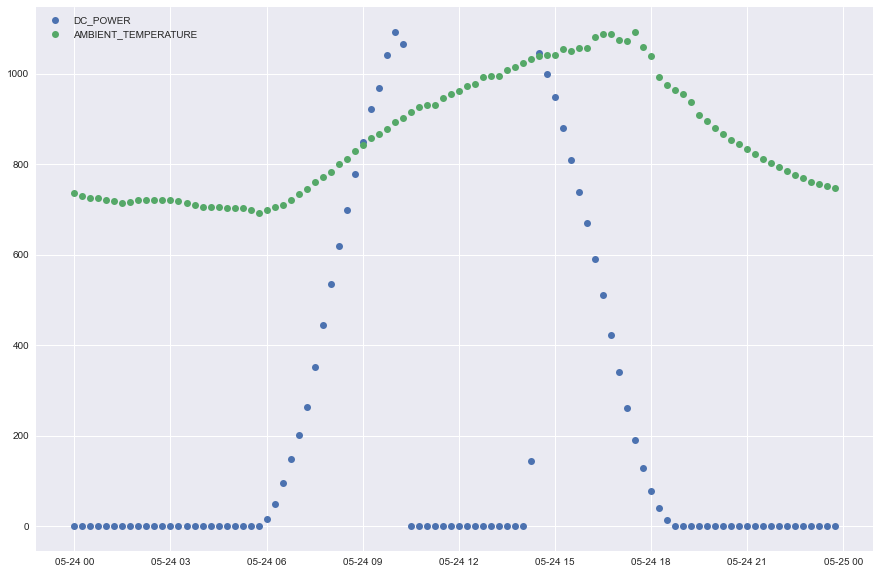

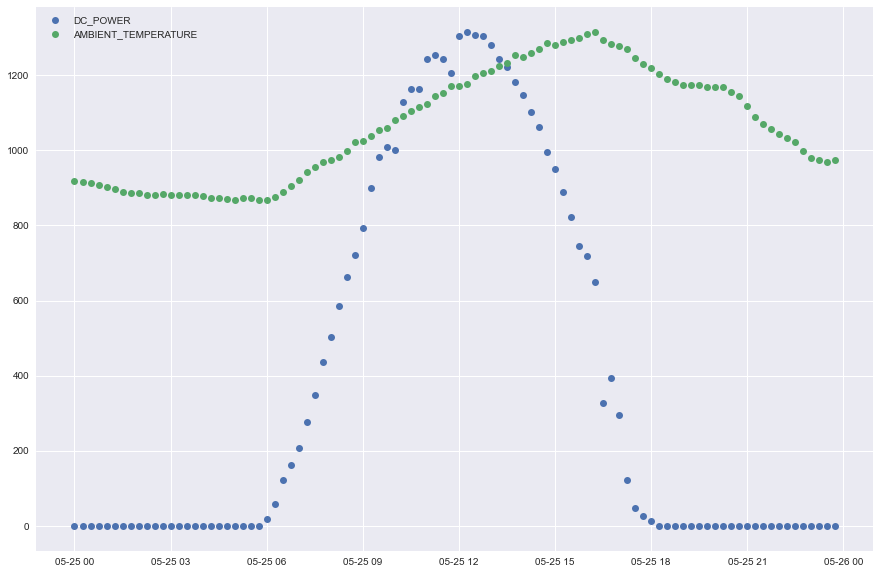

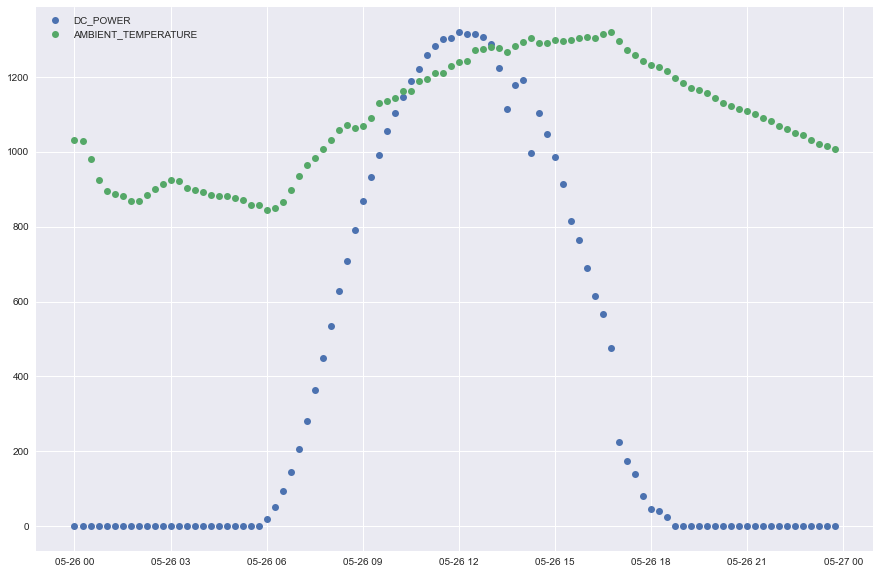

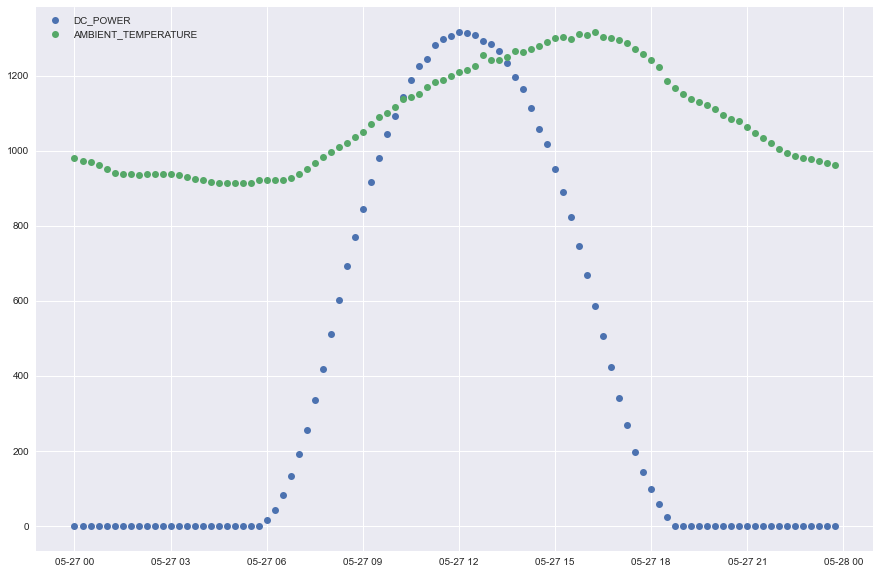

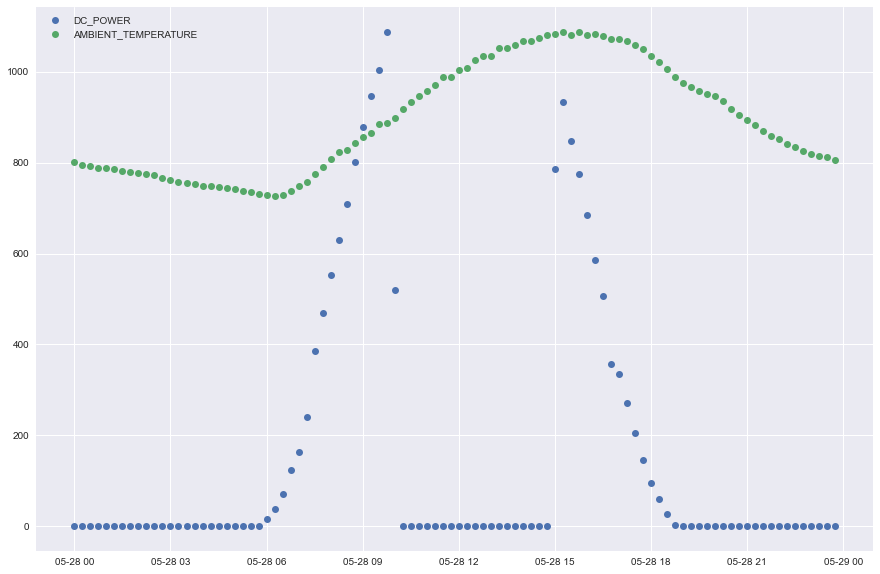

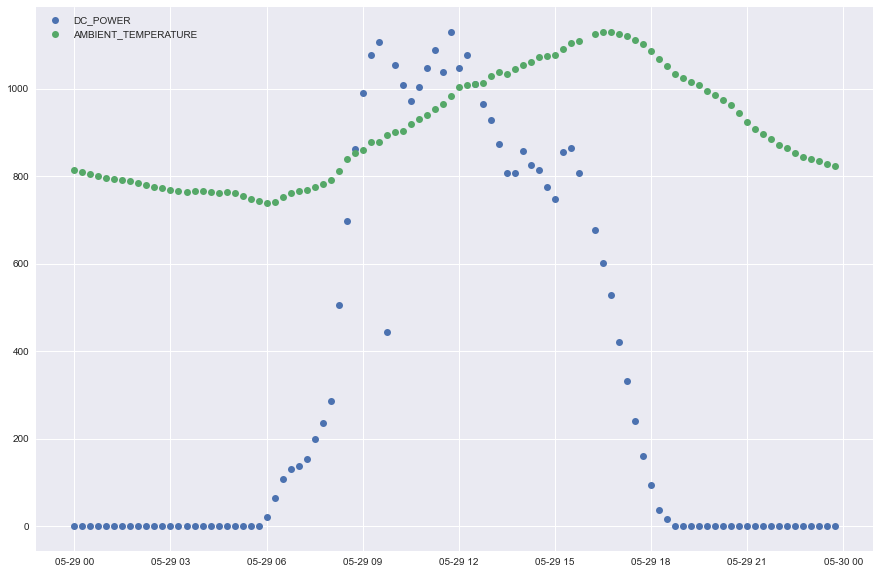

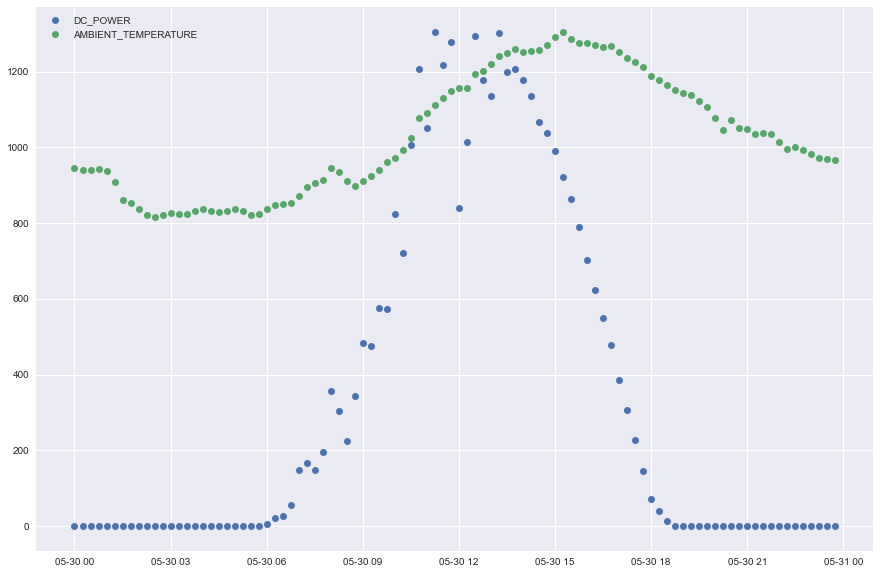

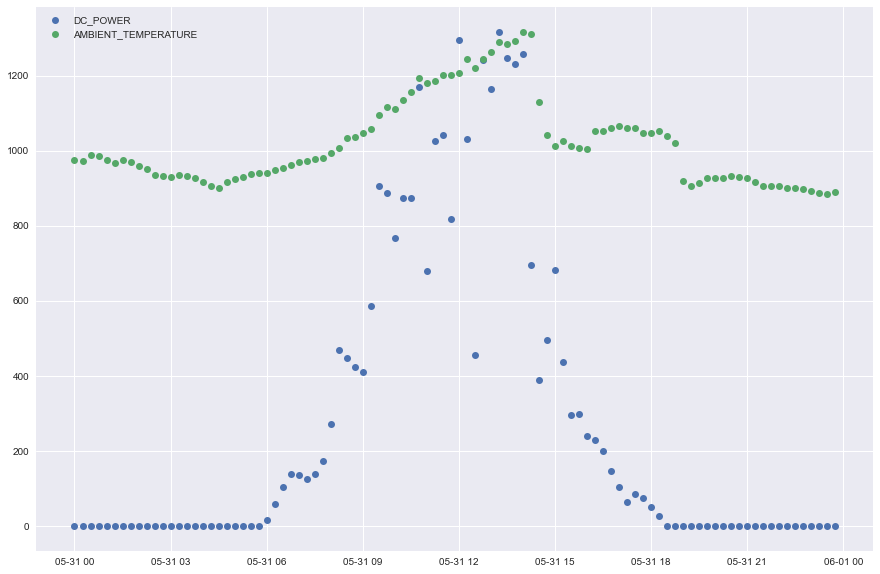

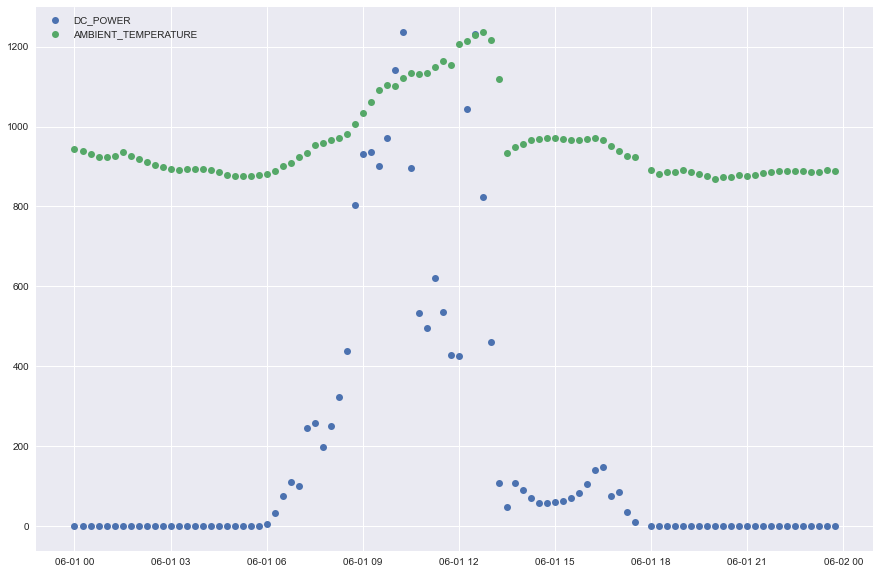

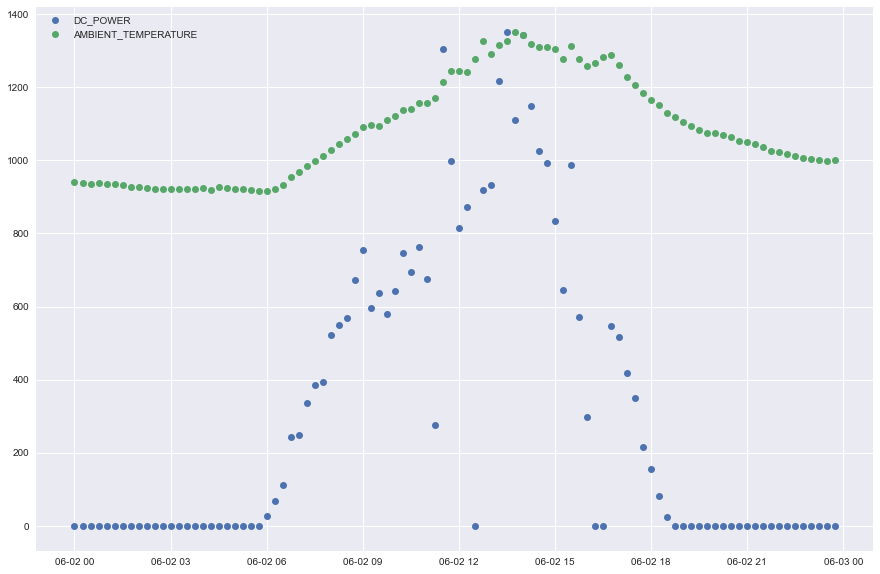

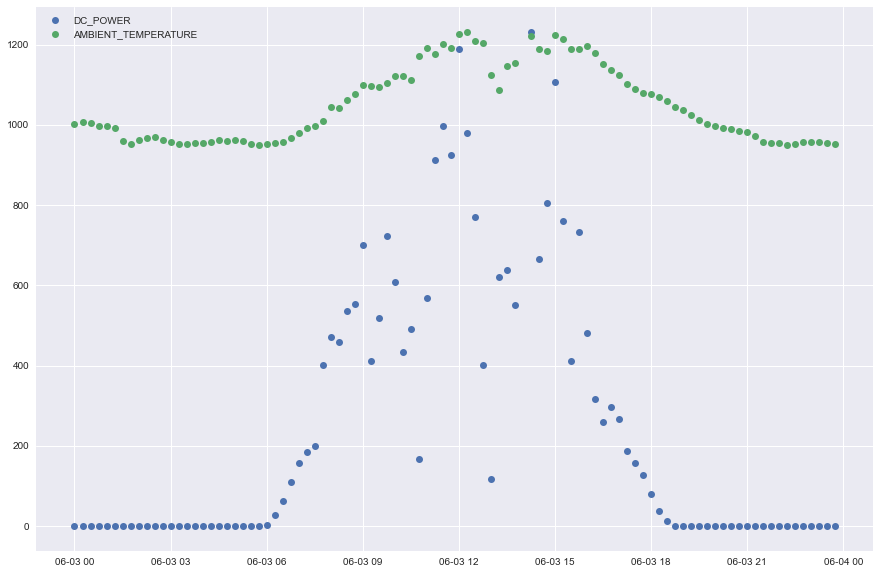

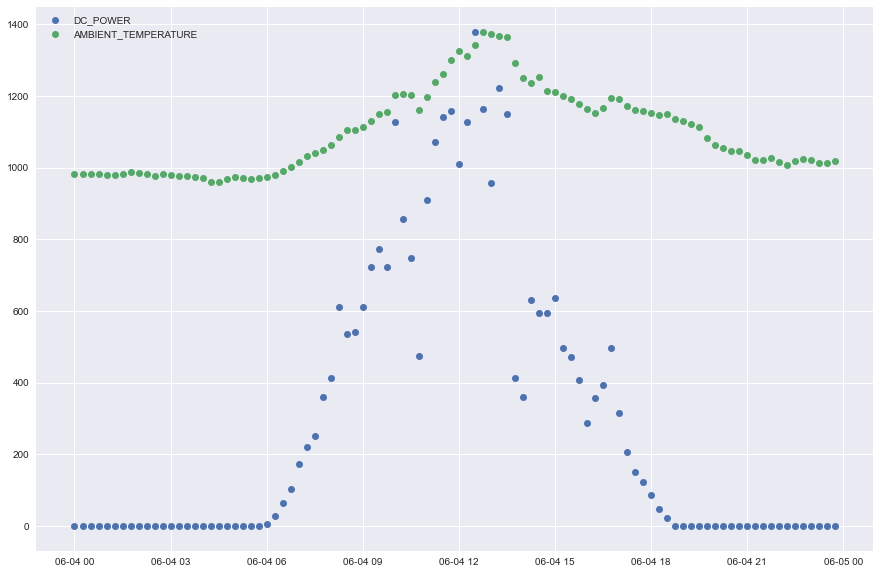

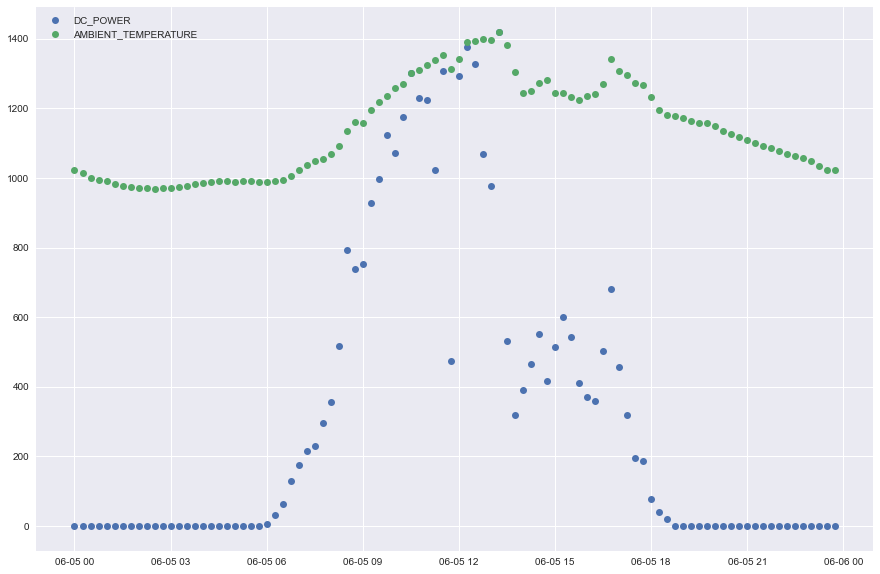

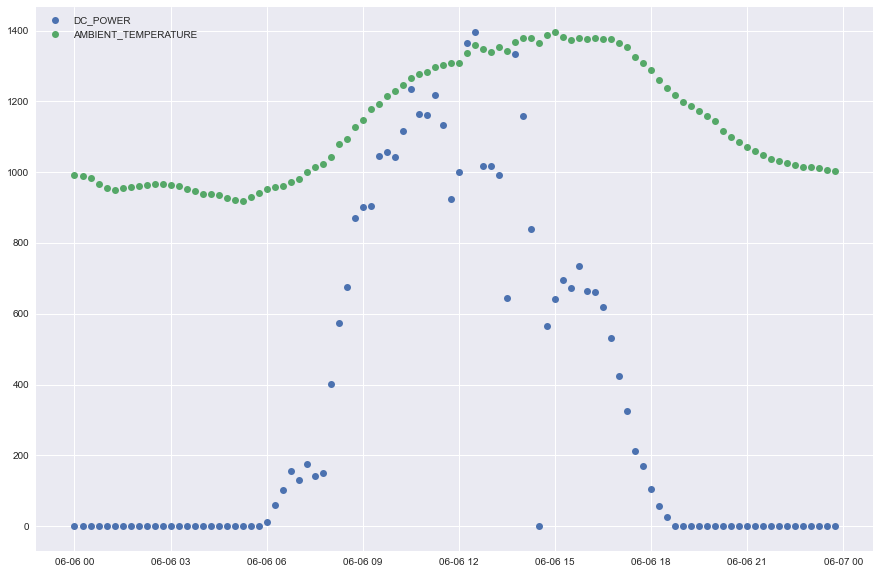

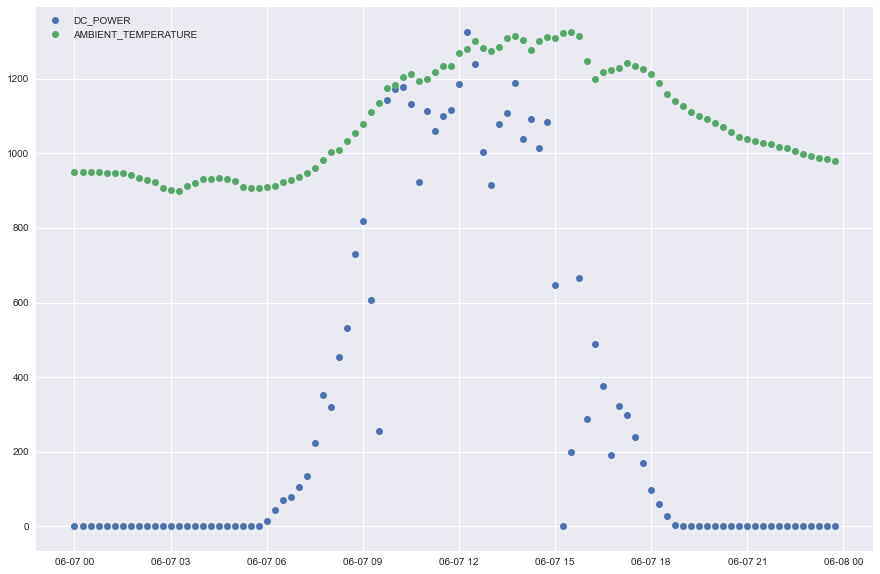

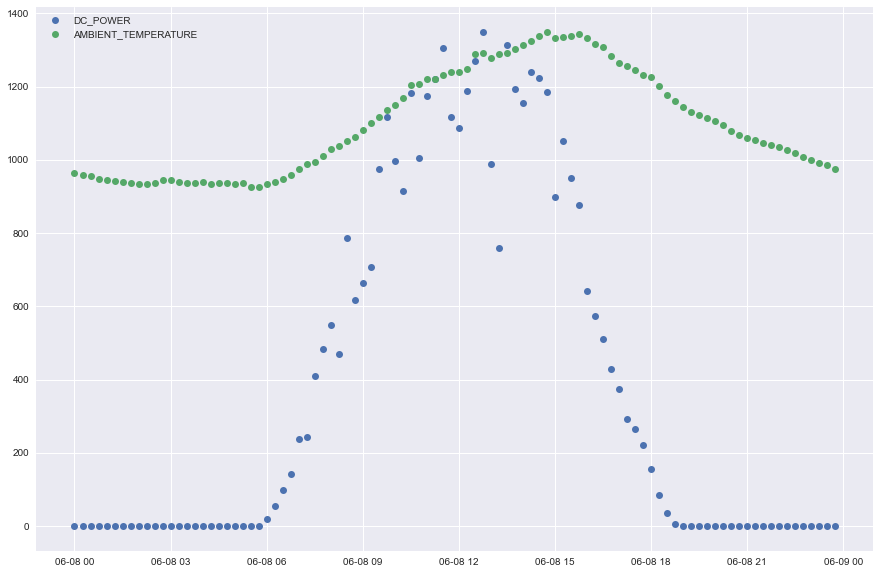

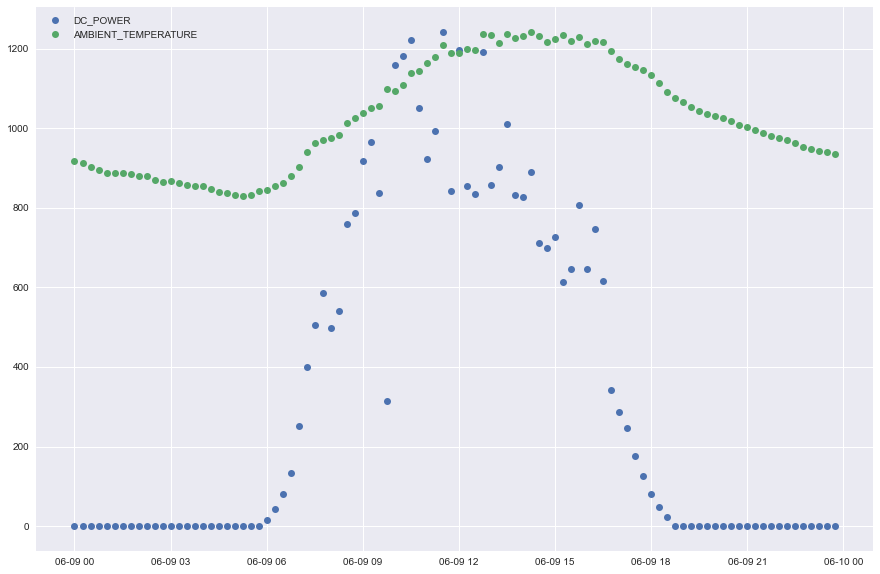

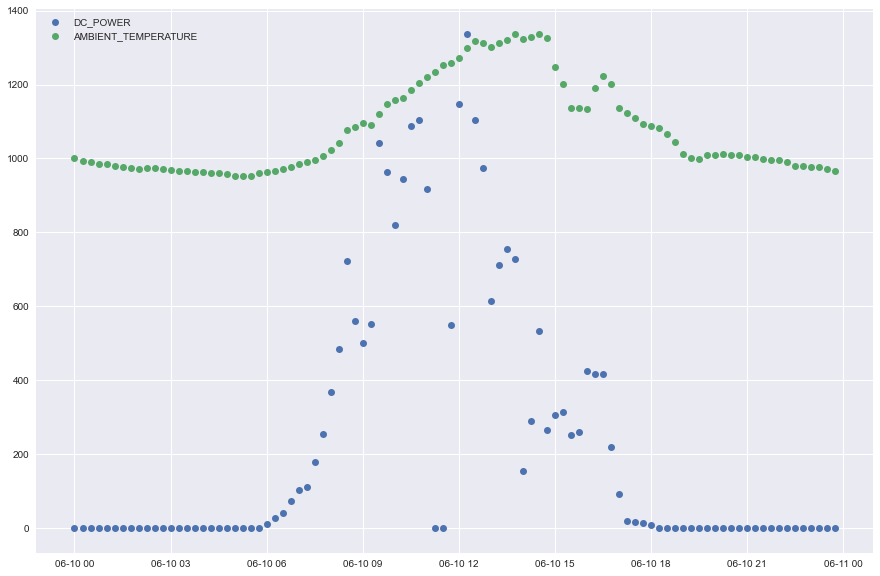

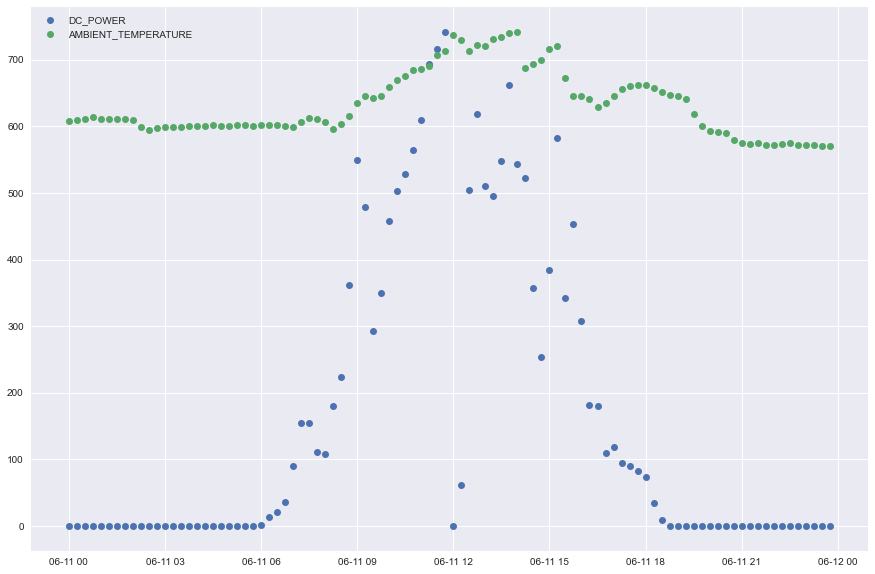

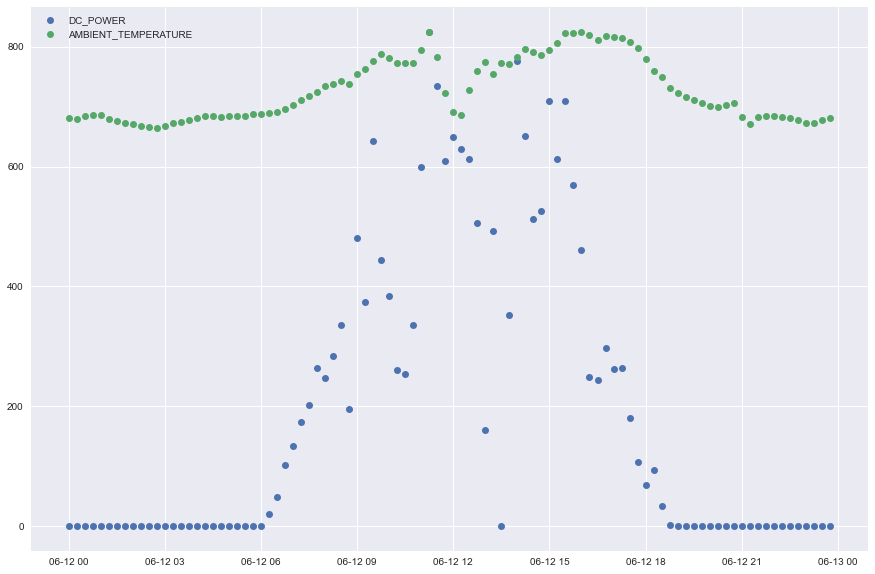

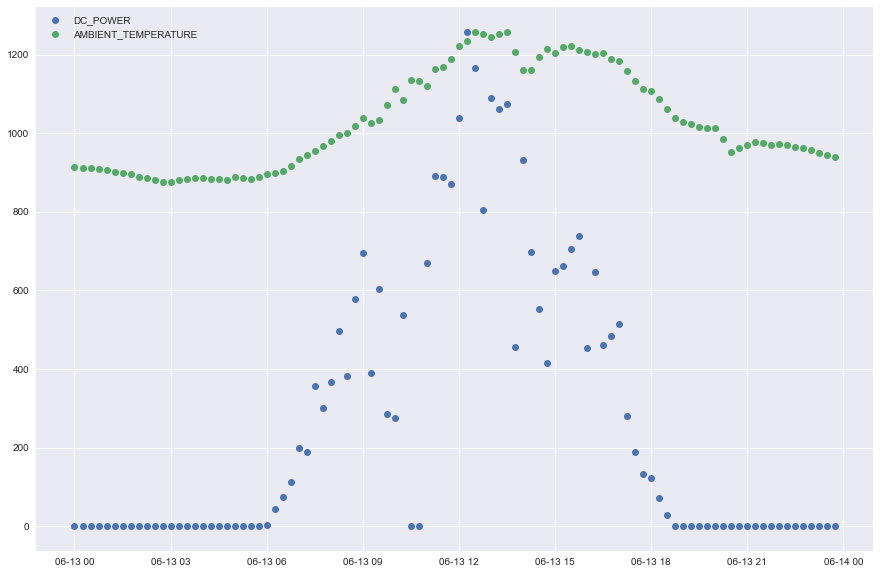

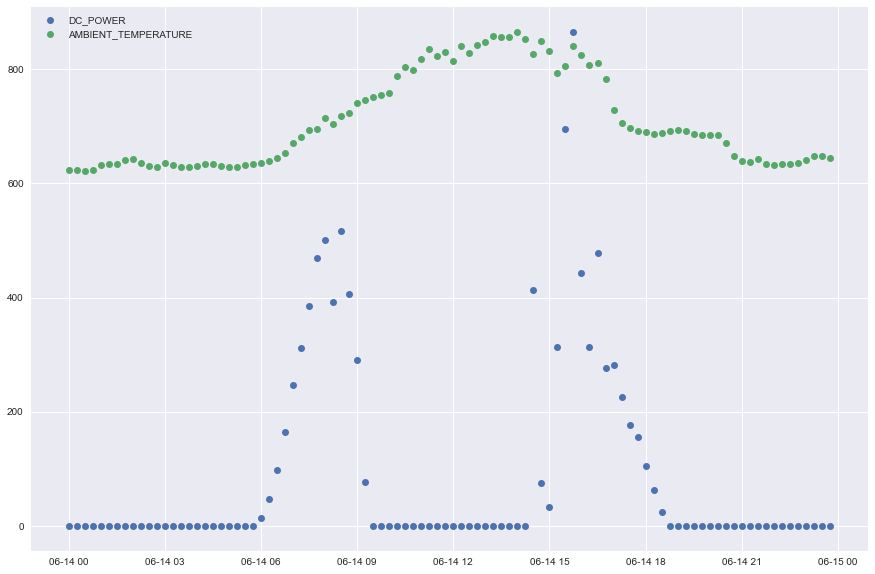

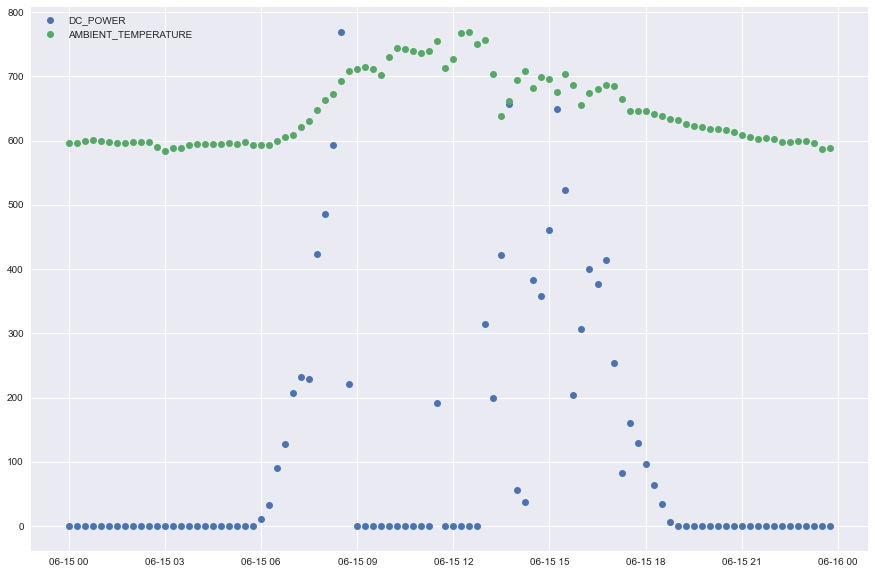

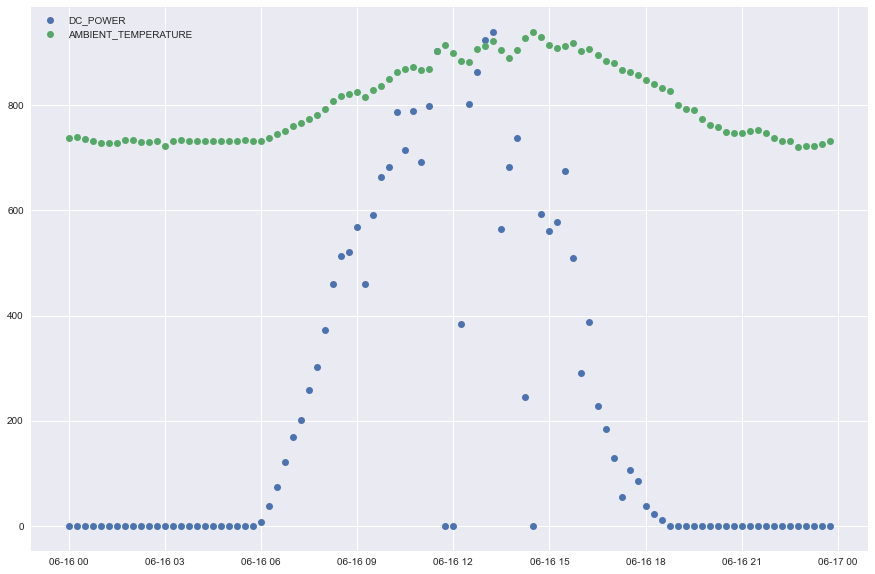

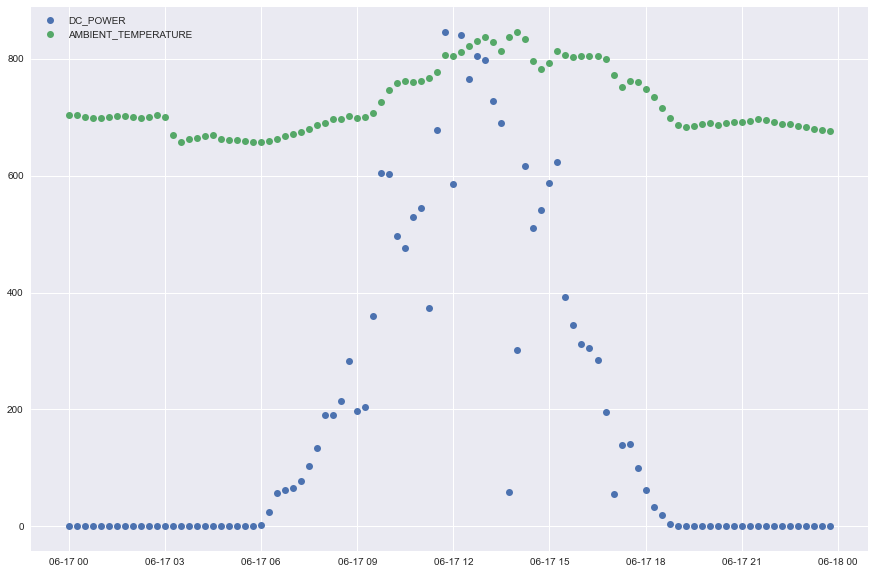

In [11]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'DC_POWER', 'AMBIENT_TEMPERATURE')

## Plot module temperature vs AC power for a number of inverters of the same plant

Plotting for the 4UPUqMRk7TRMgml source key 


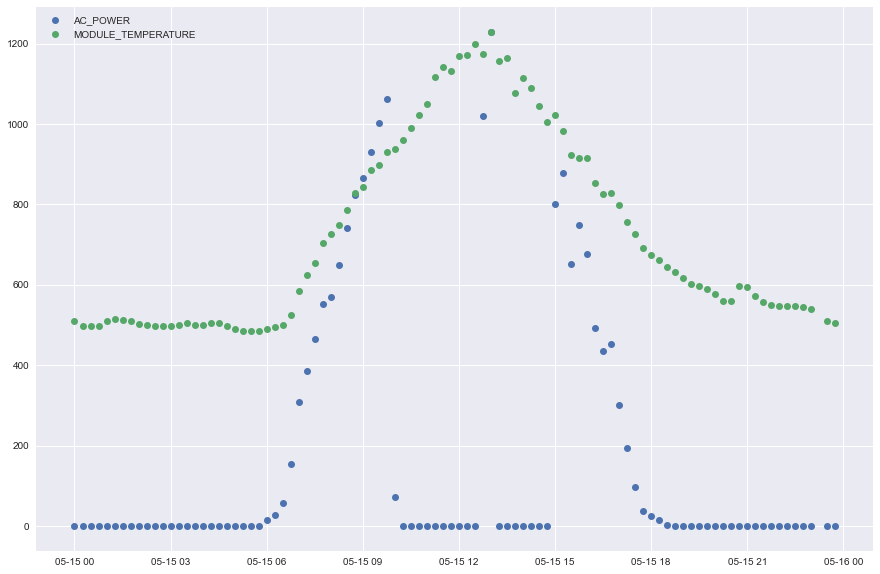

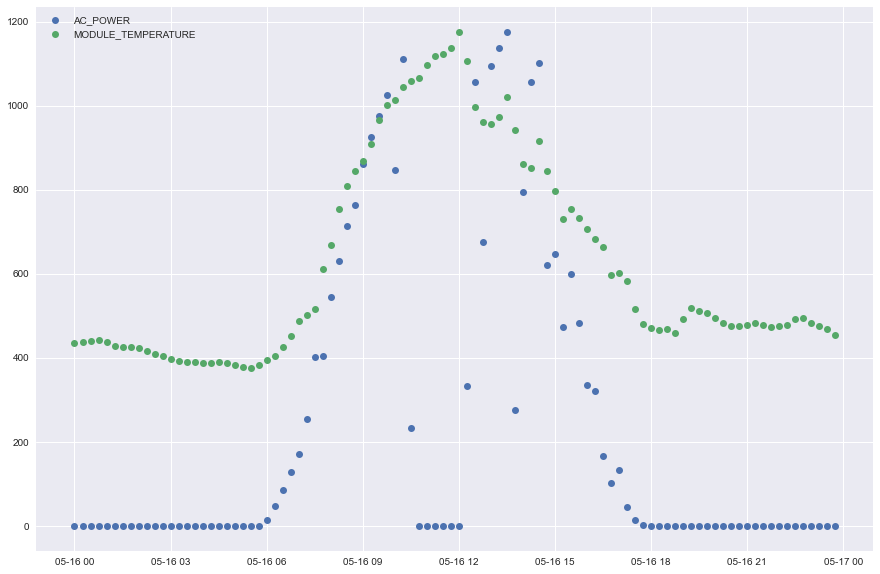

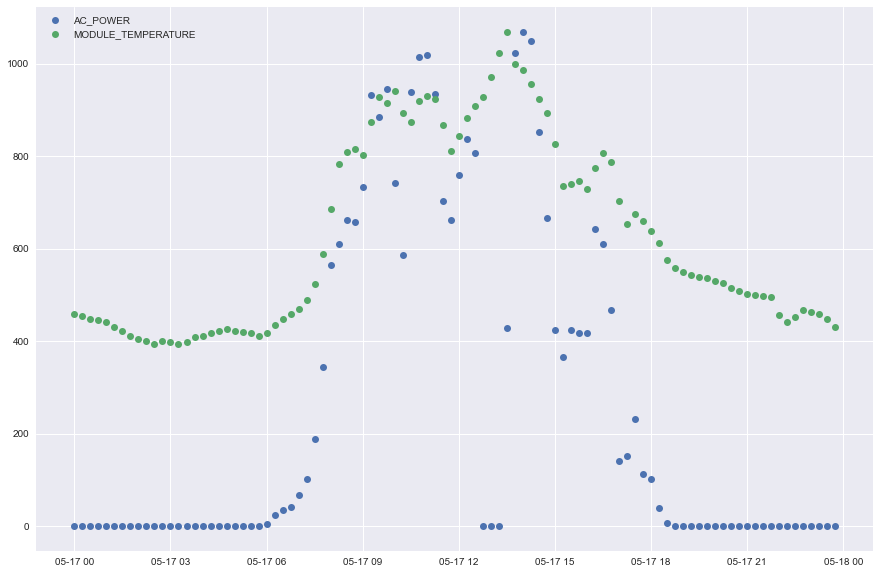

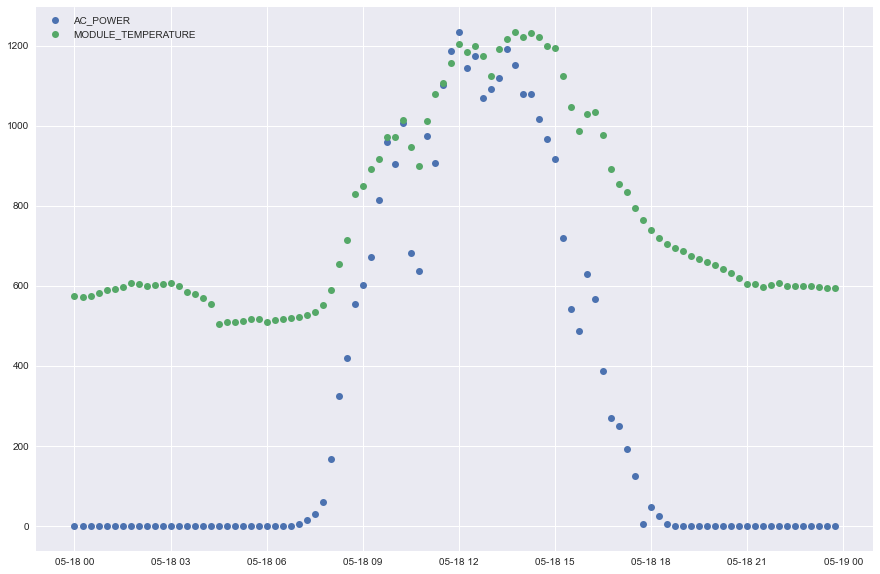

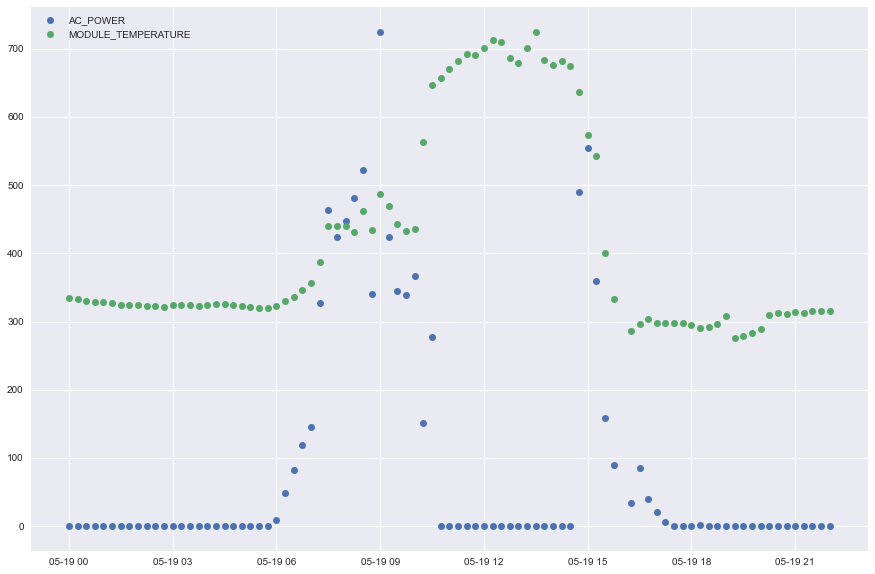

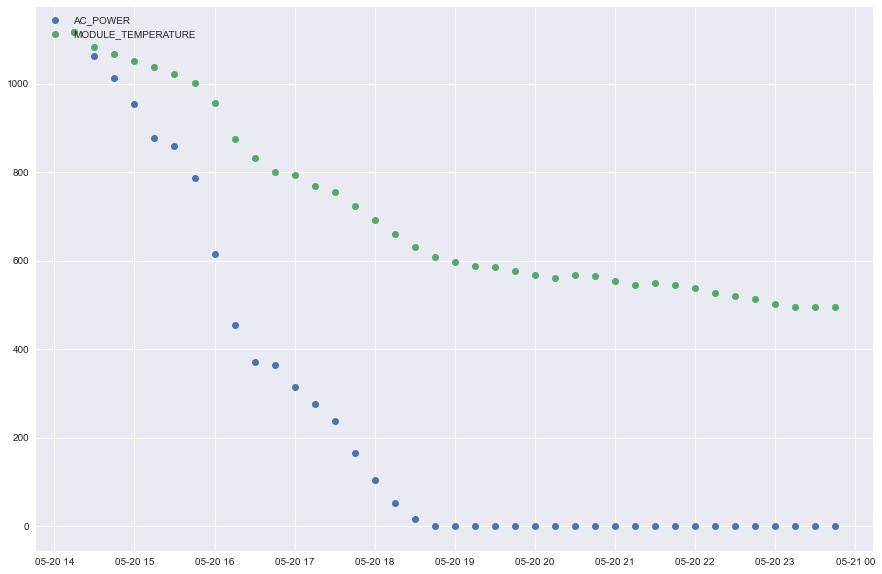

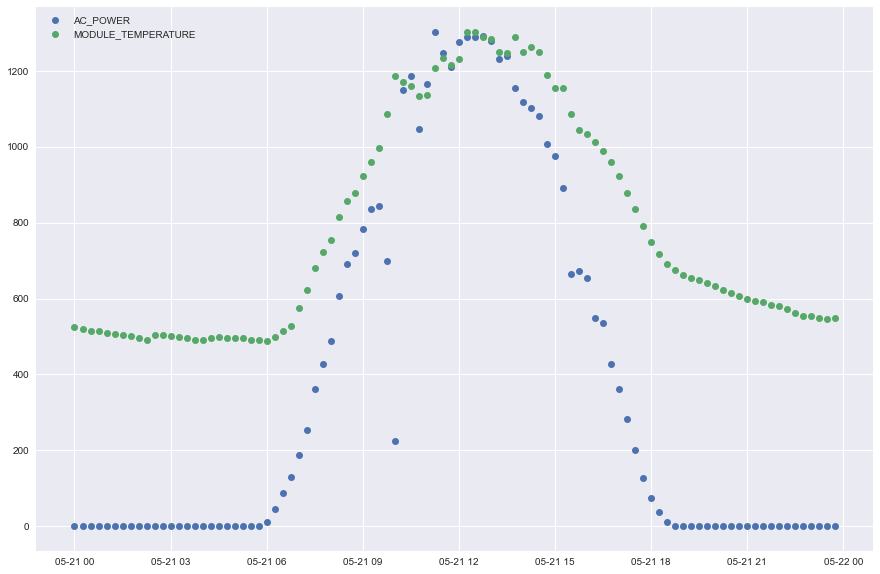

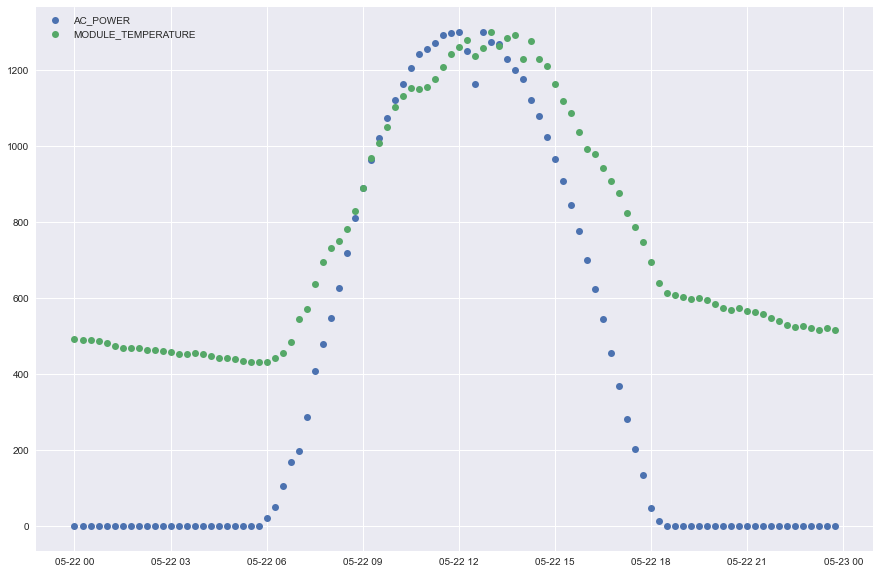

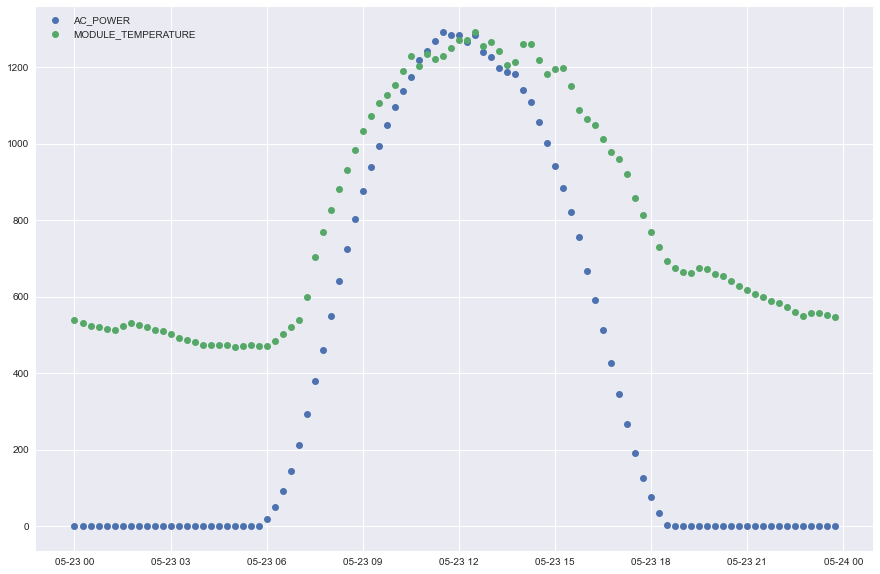

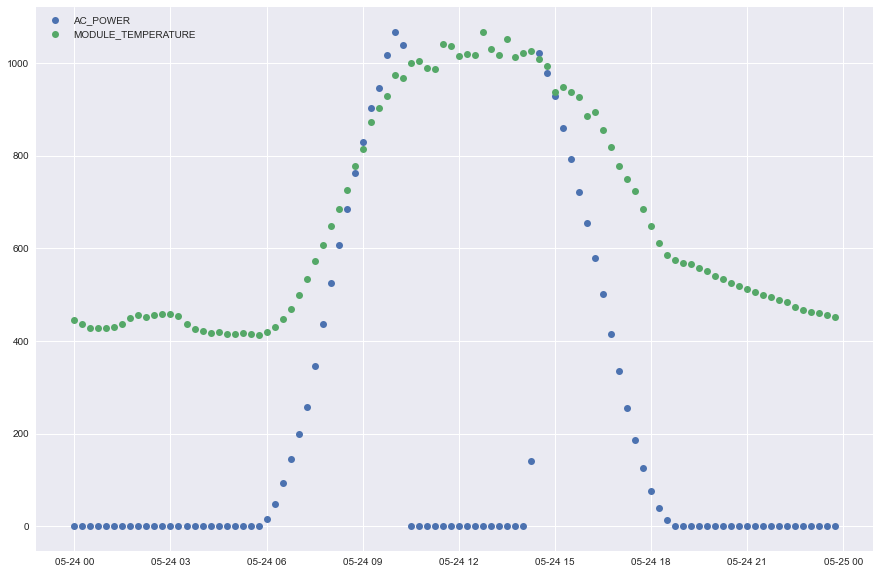

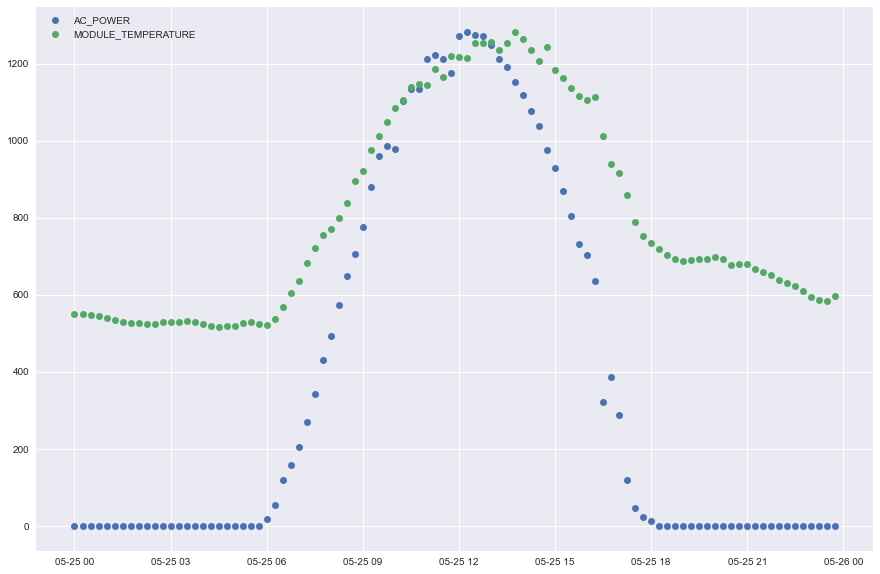

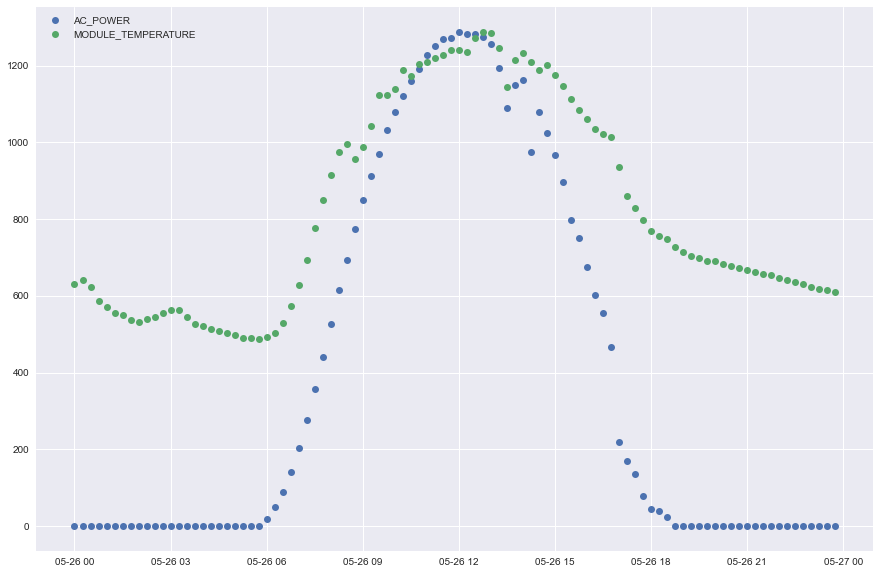

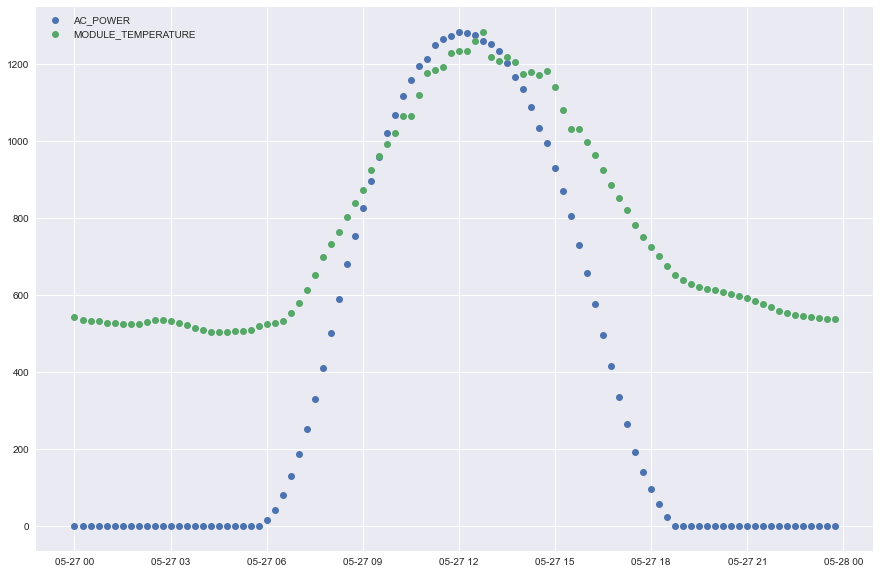

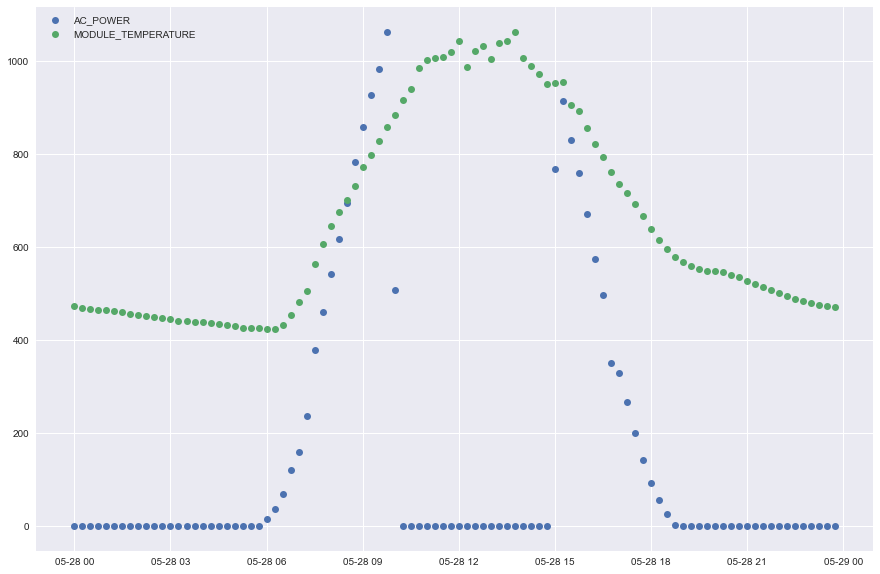

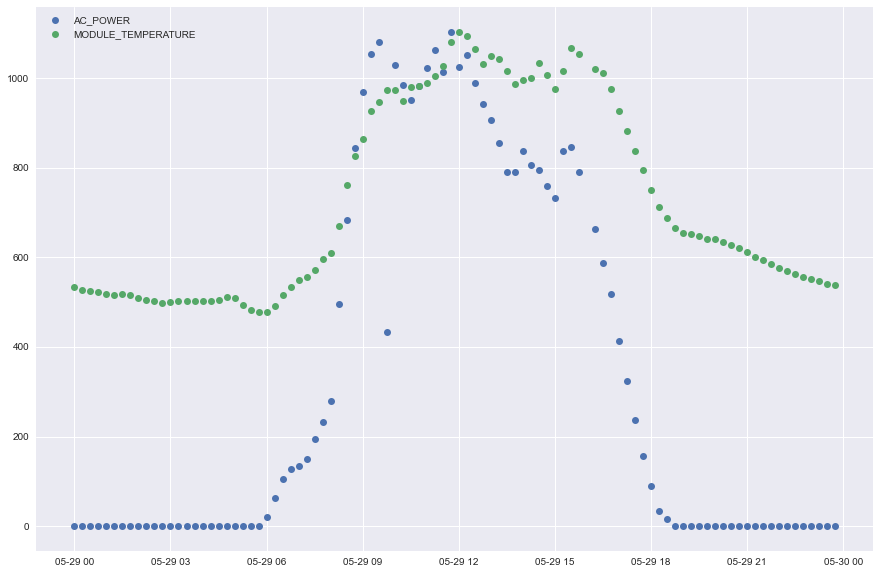

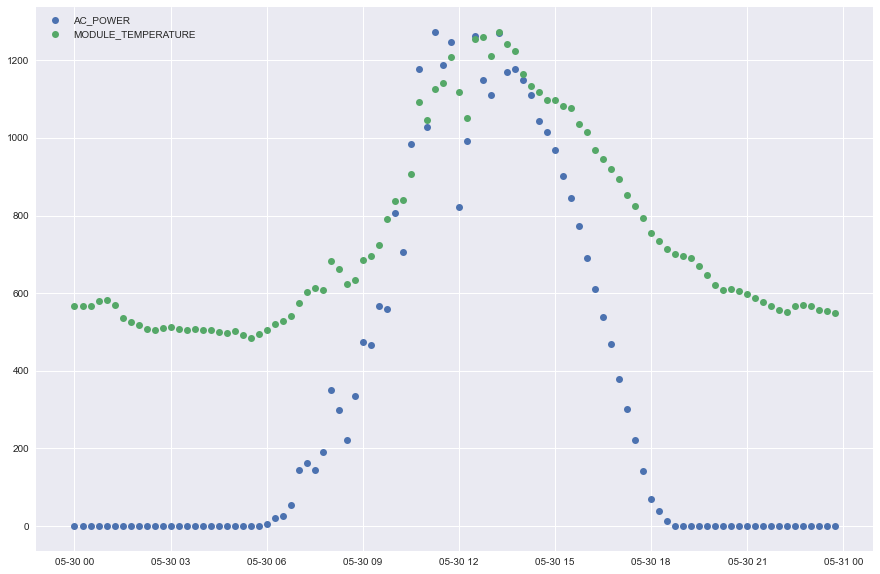

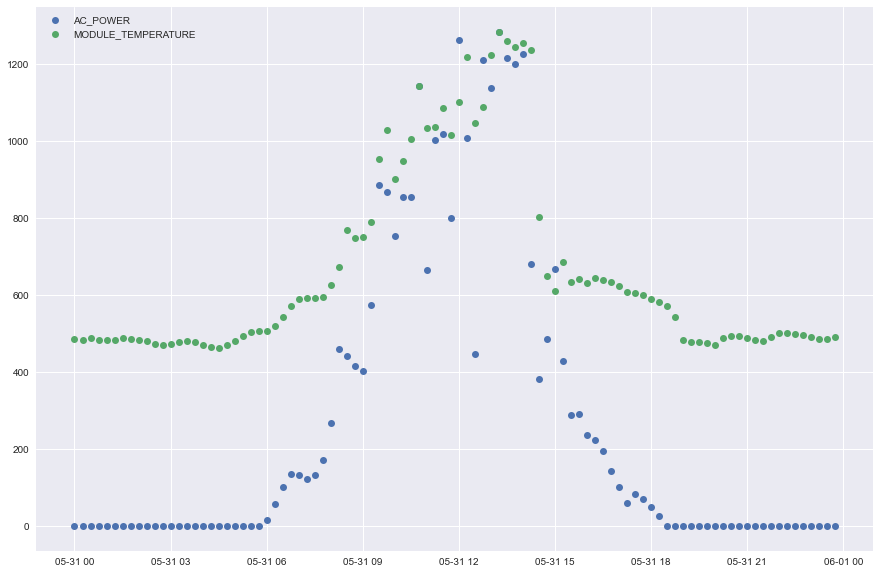

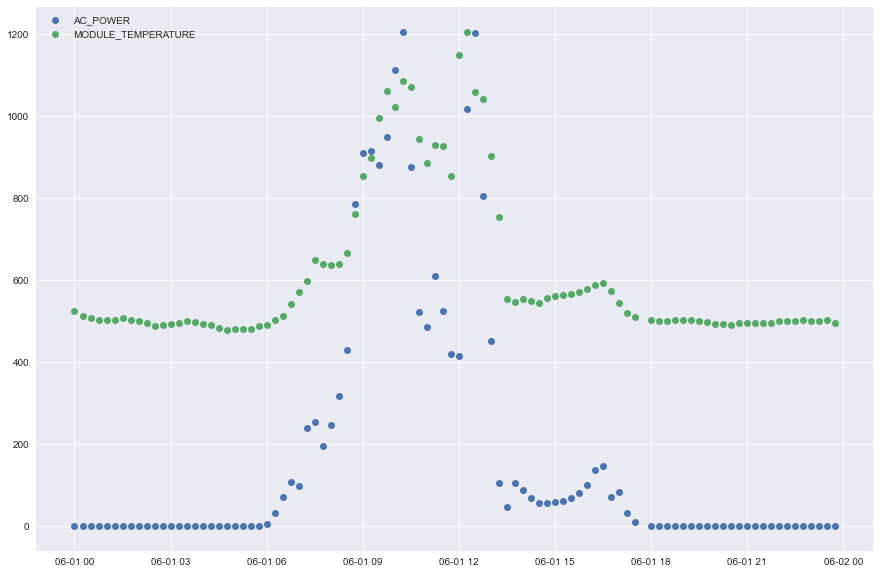

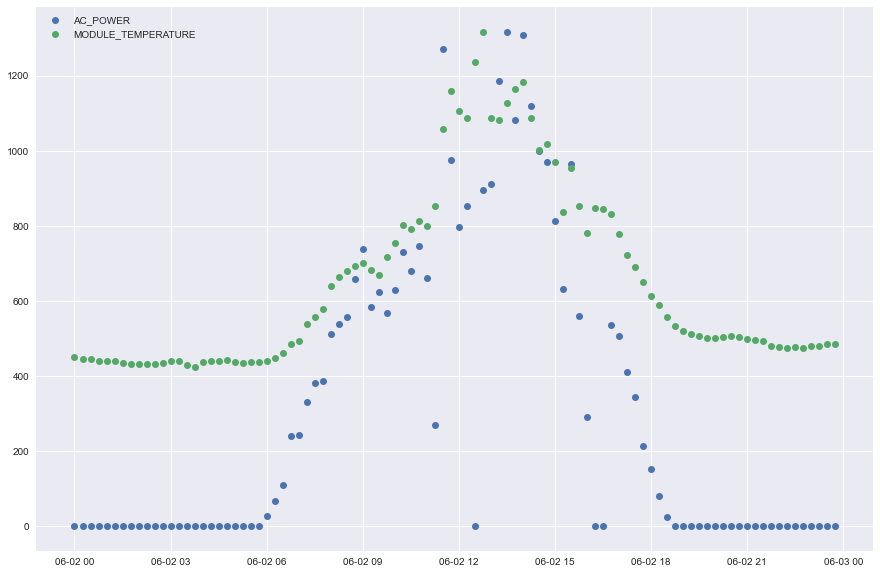

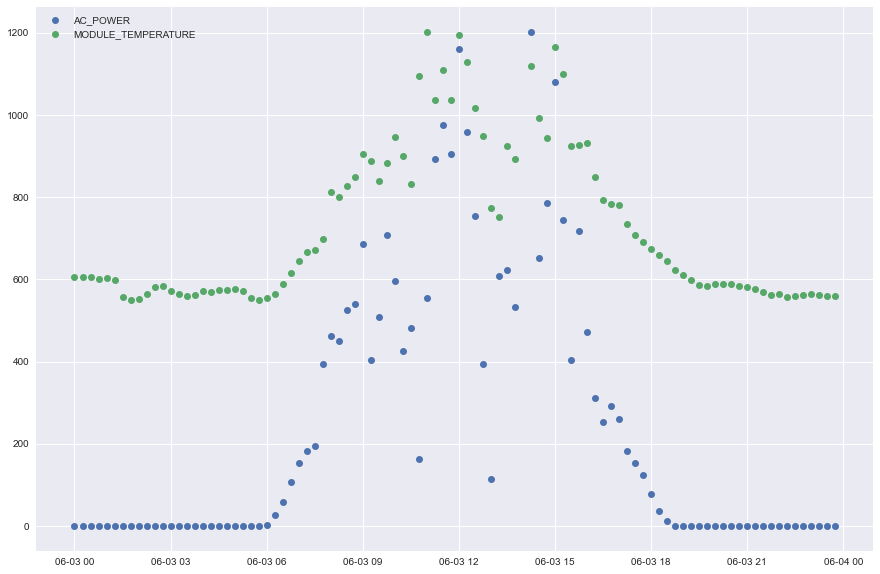

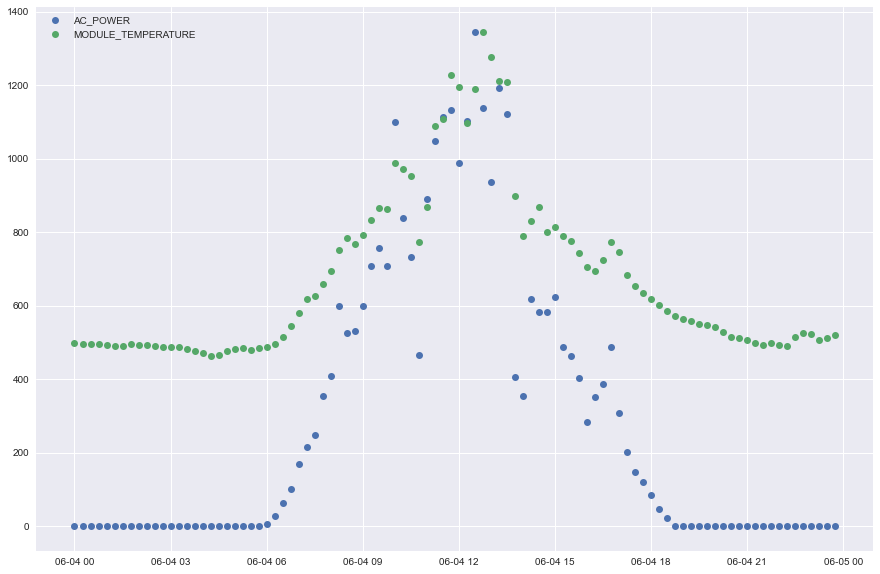

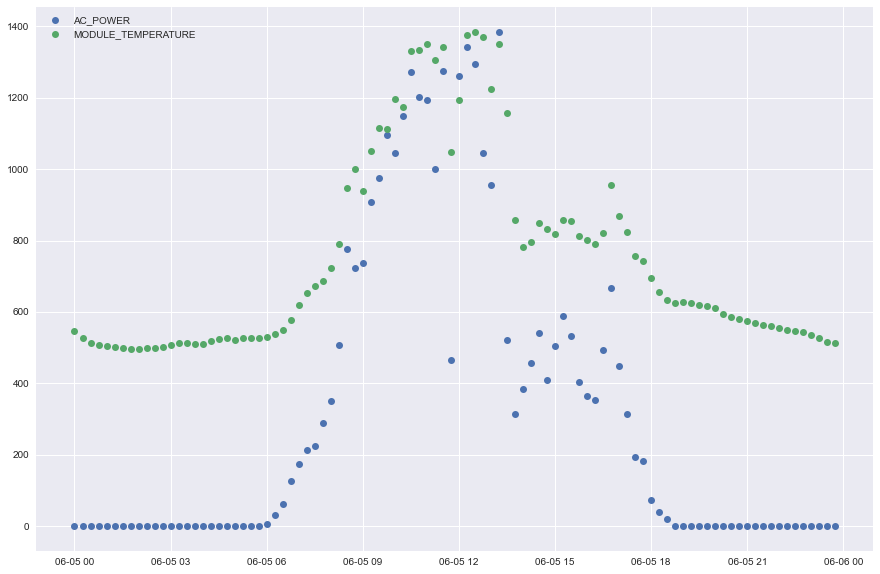

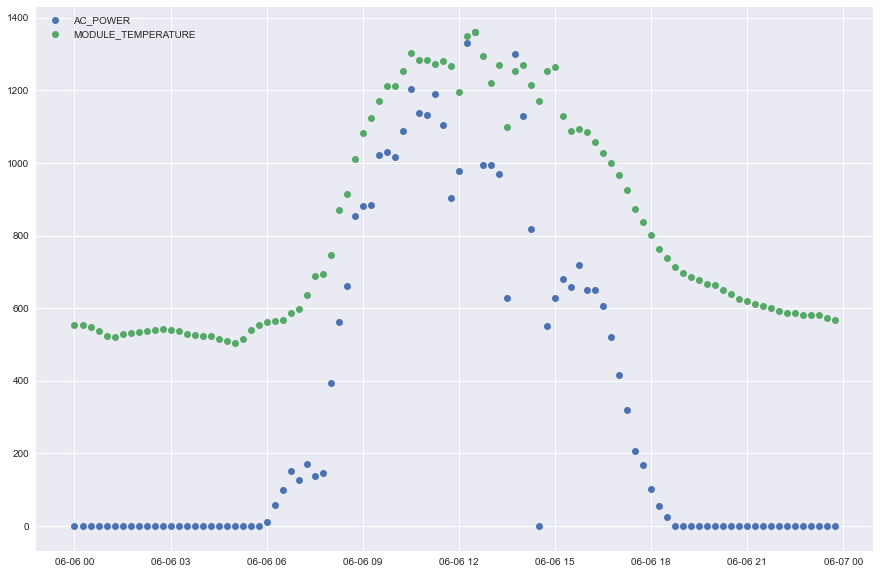

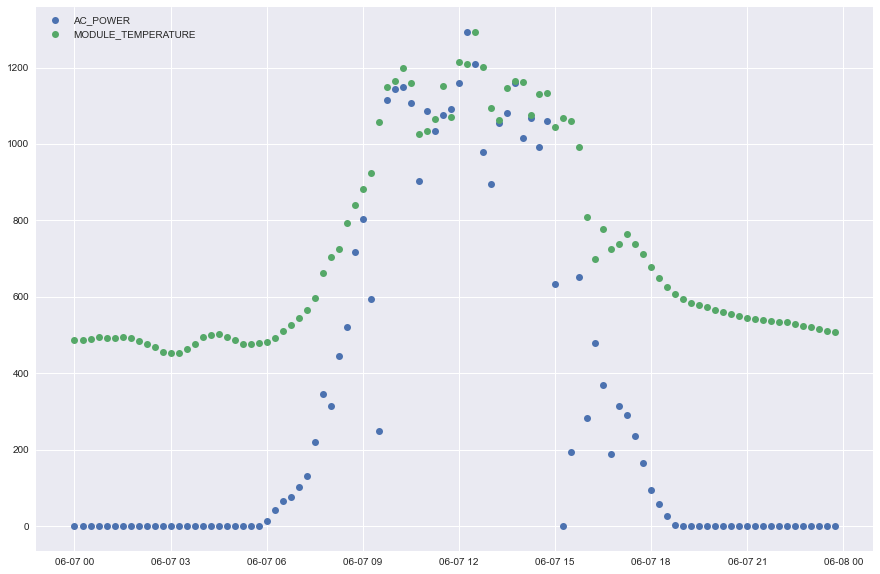

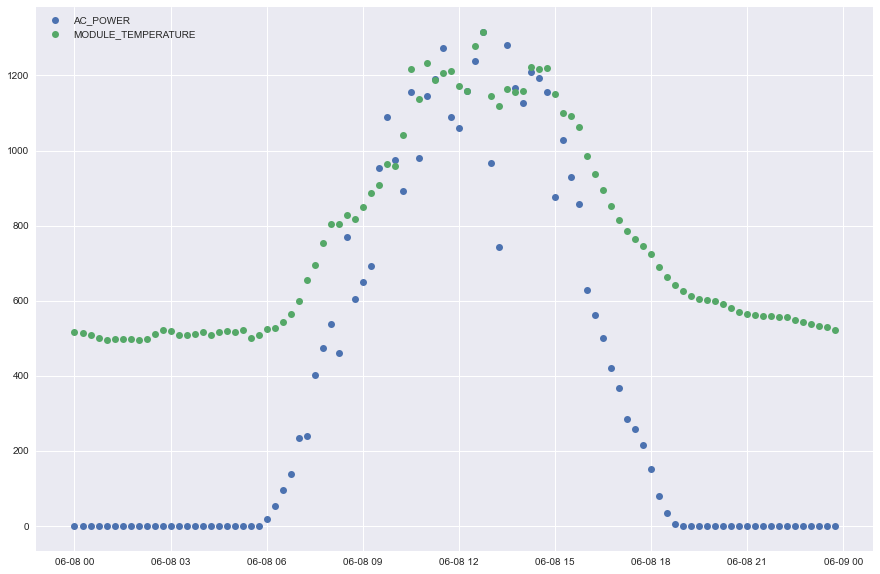

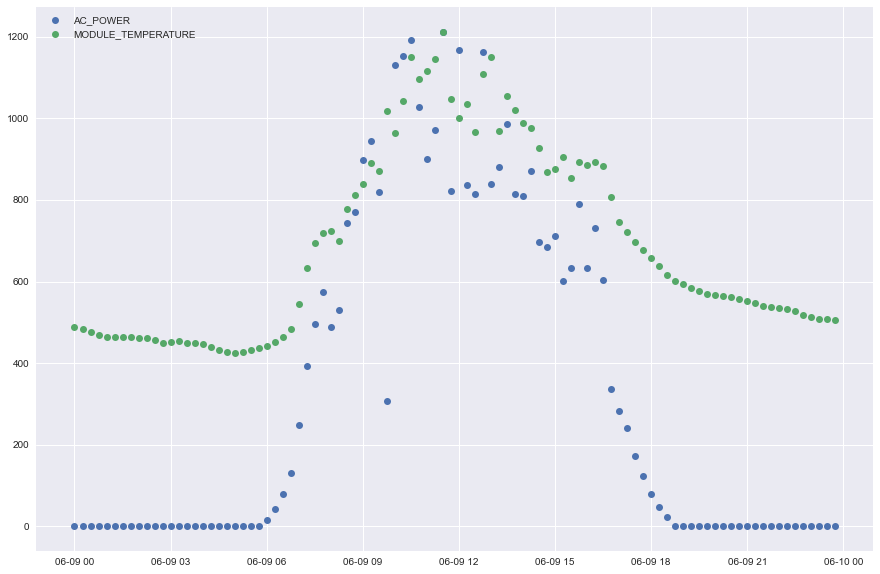

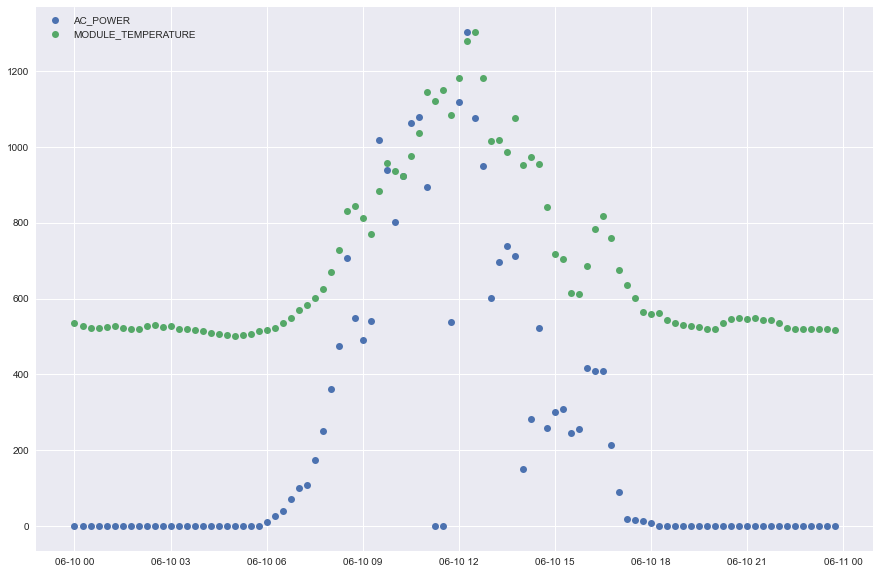

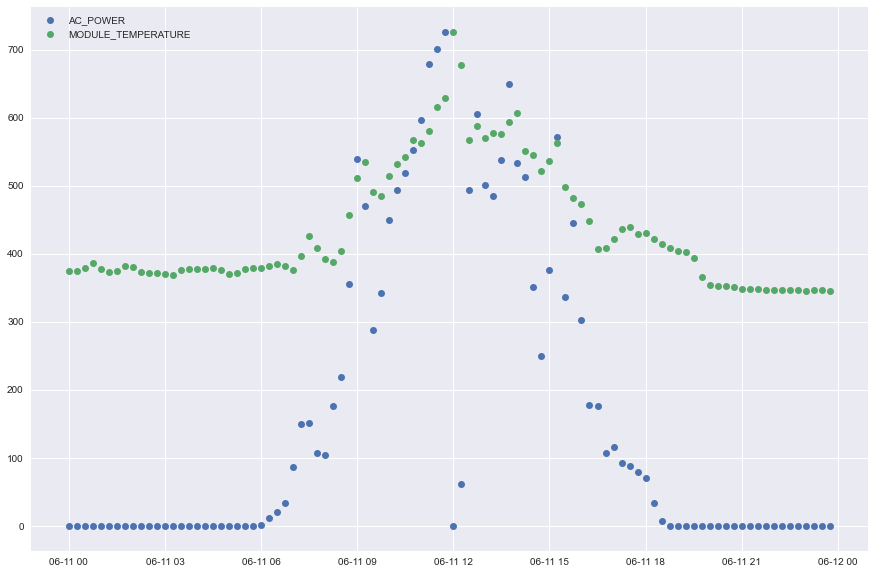

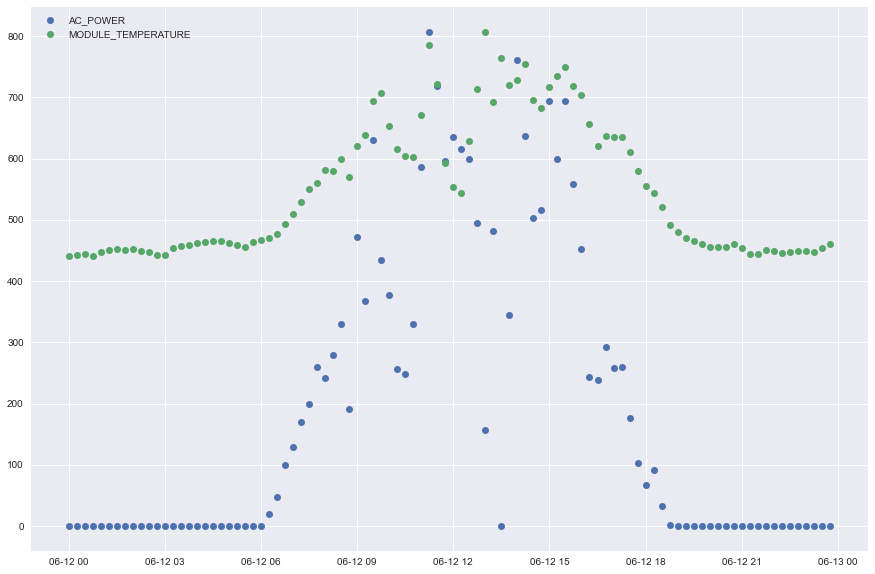

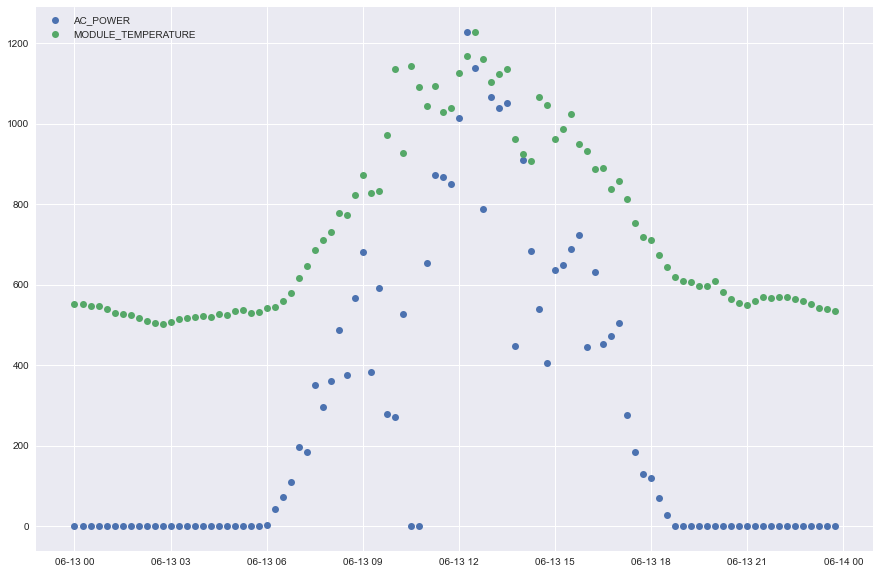

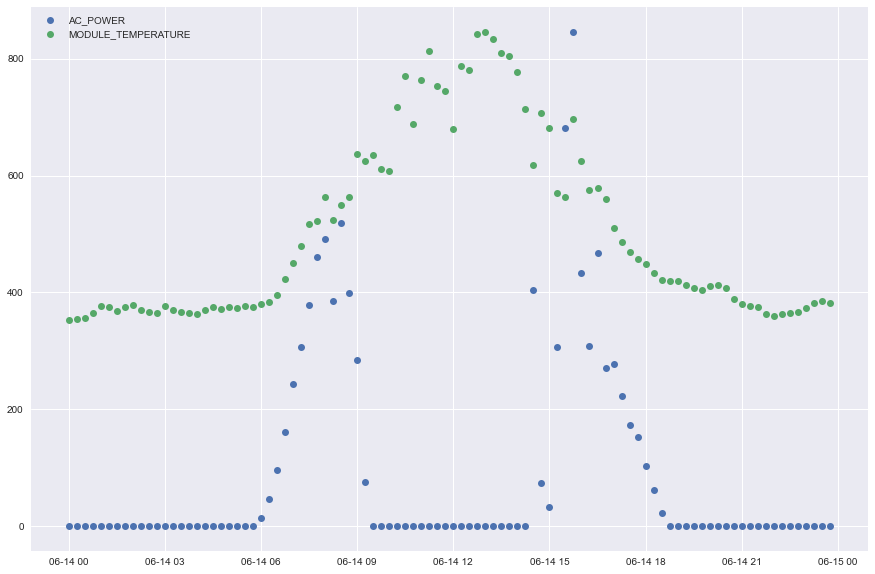

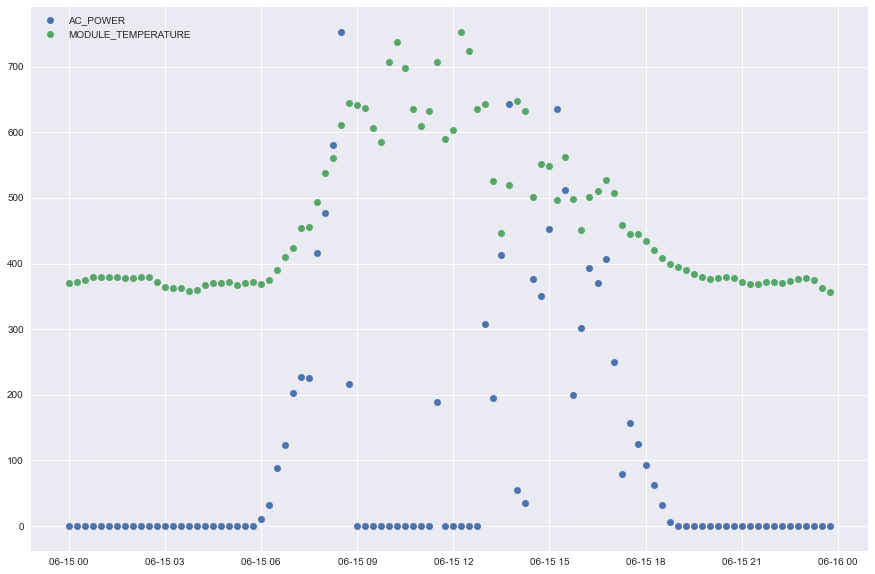

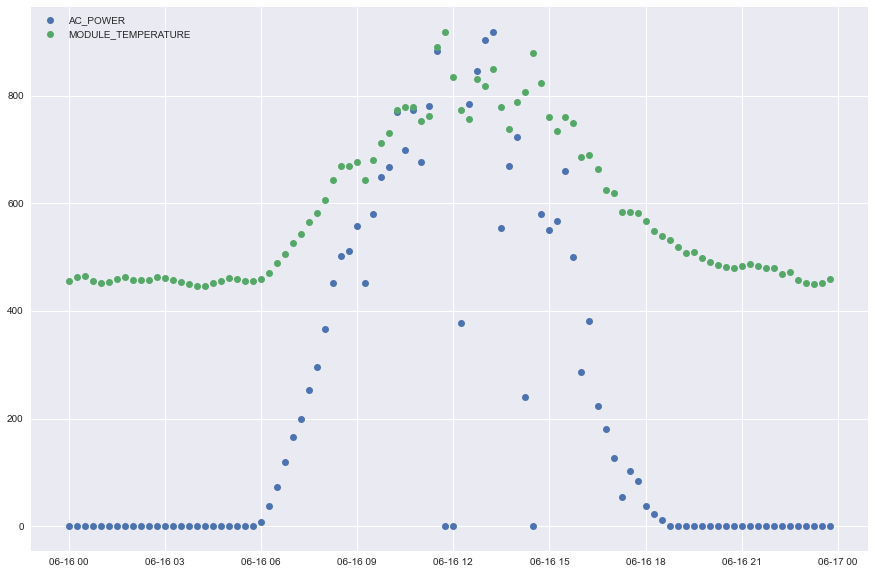

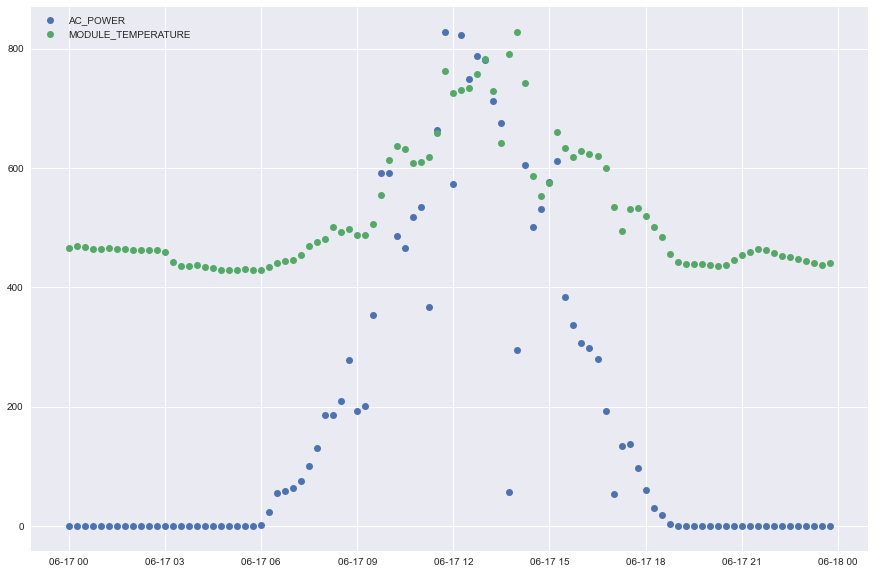

In [12]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'AC_POWER', 'MODULE_TEMPERATURE')

## Plot module temperature vs DC for a number of inverters of the same plant

Plotting for the 4UPUqMRk7TRMgml source key 


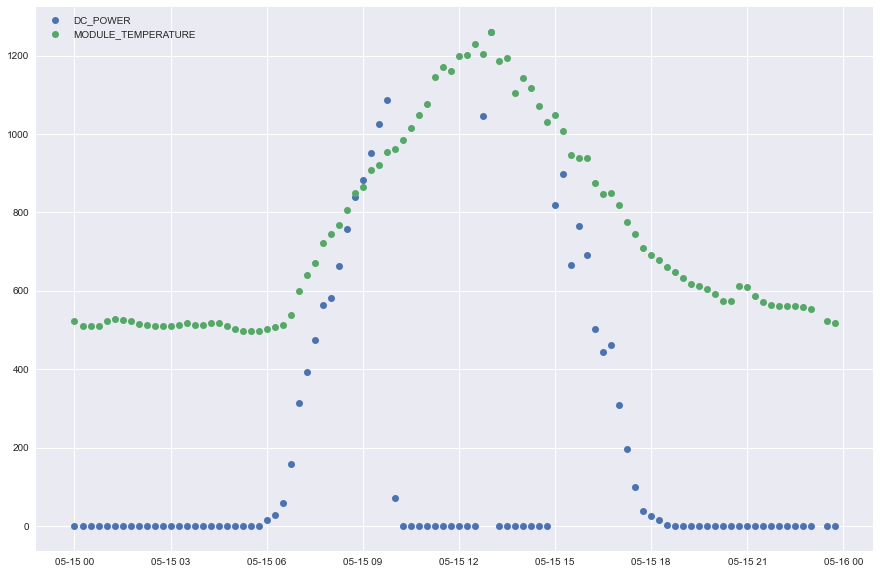

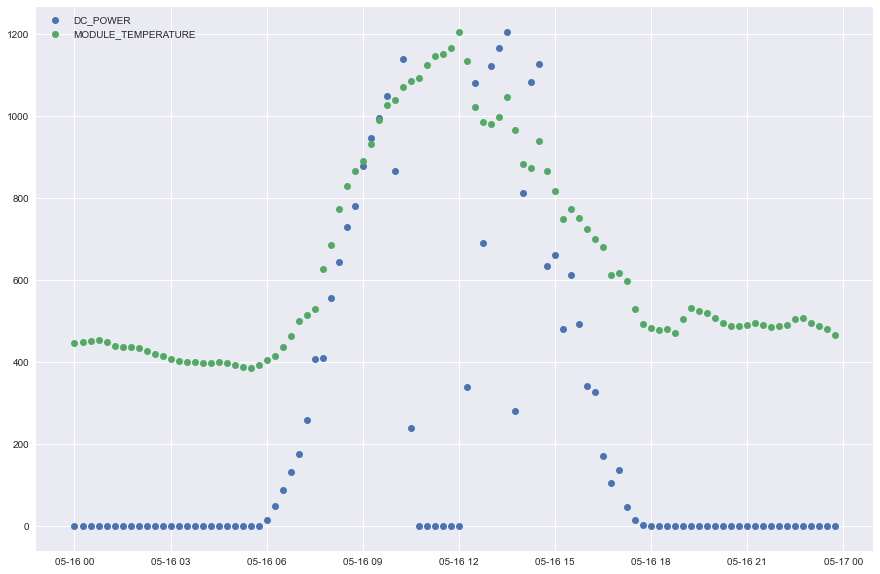

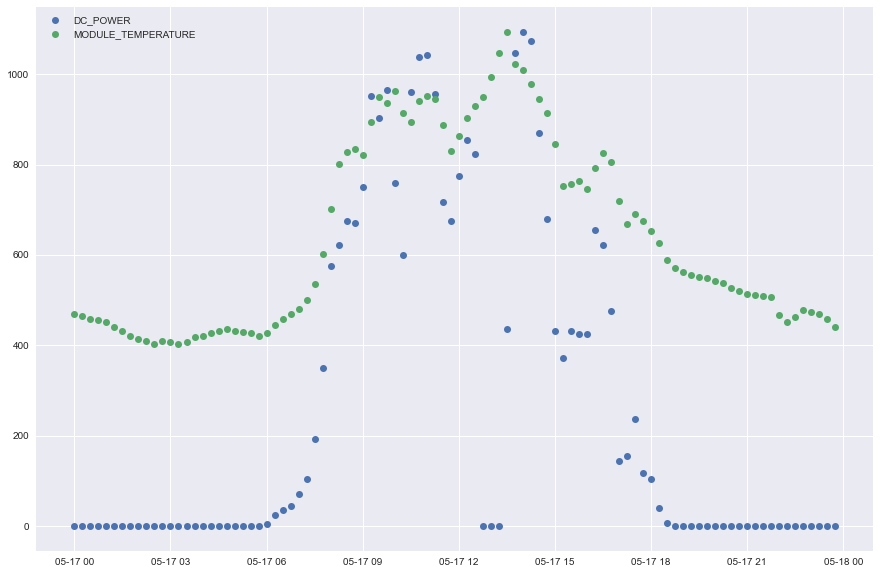

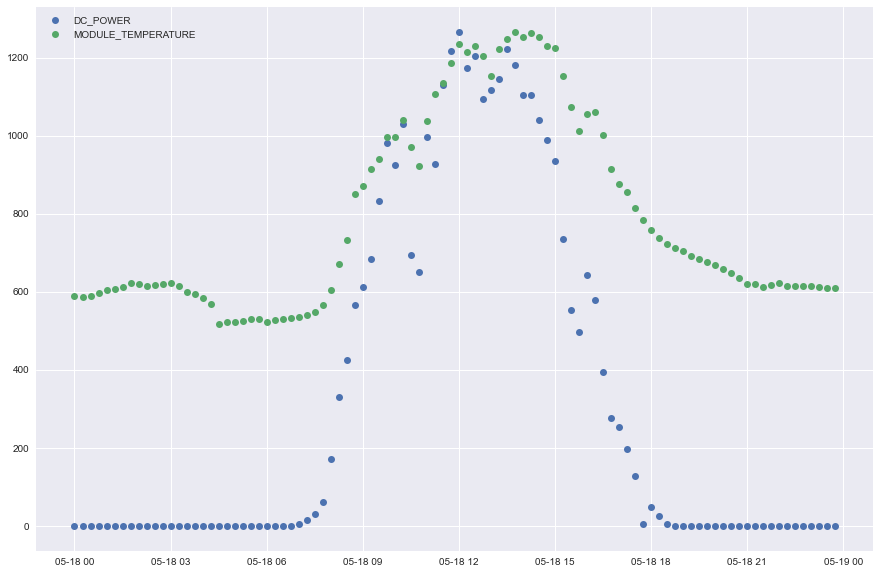

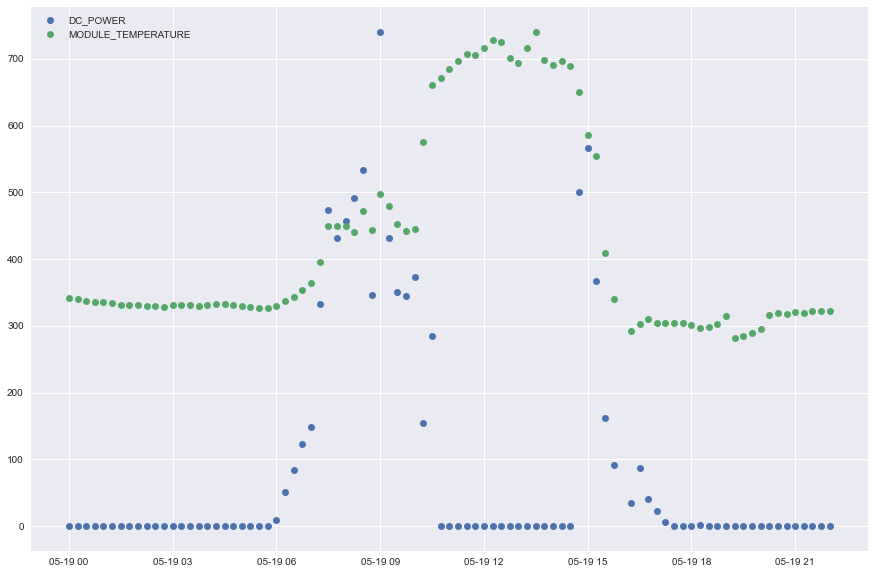

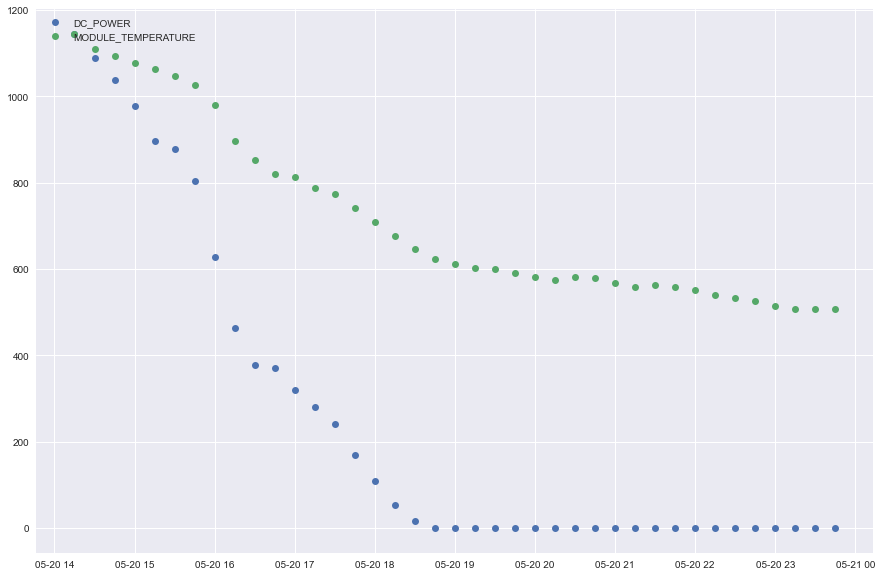

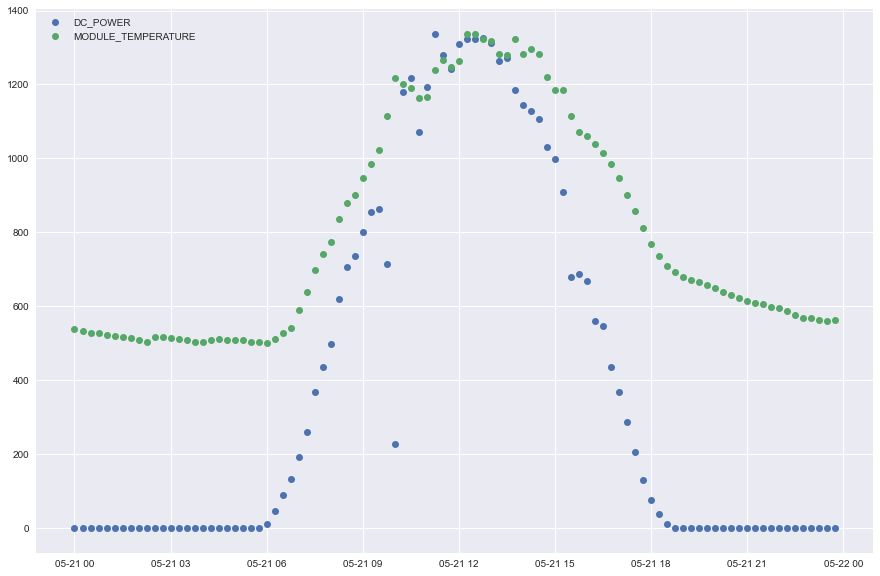

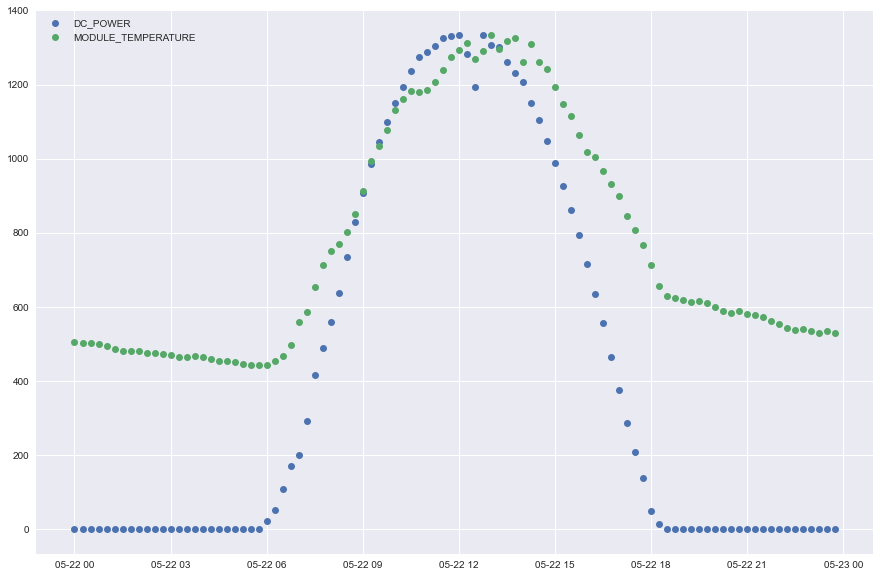

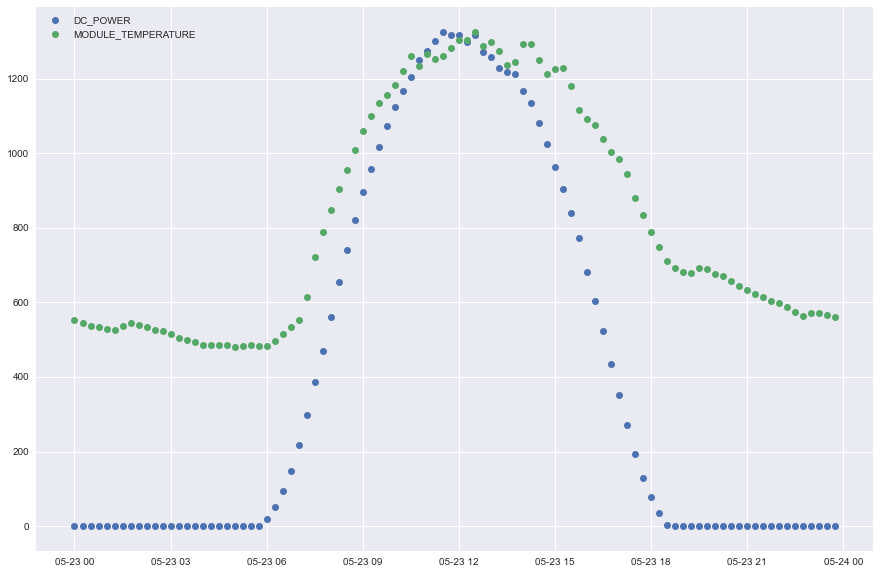

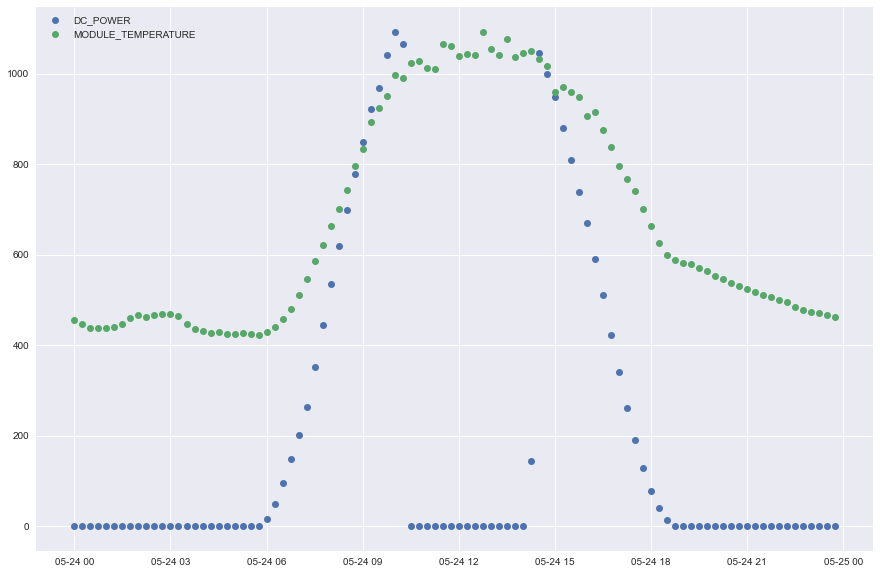

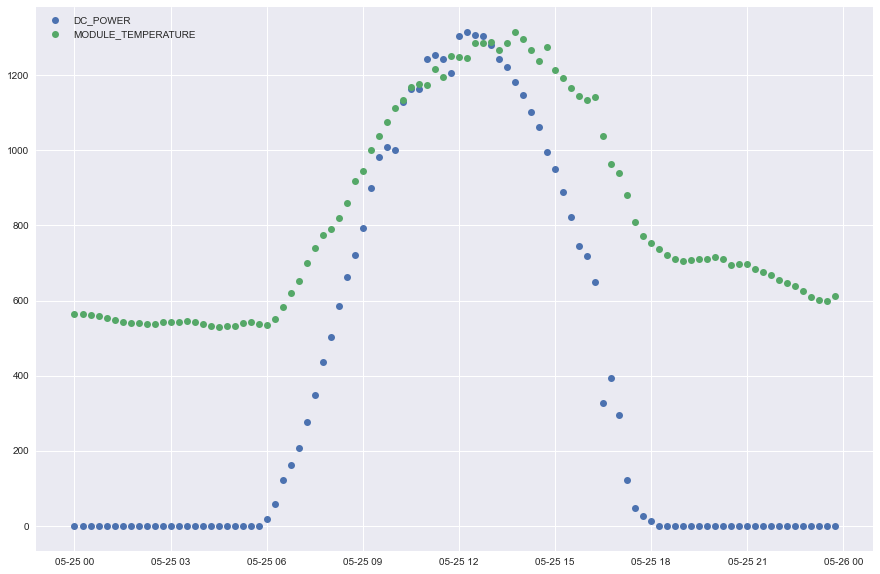

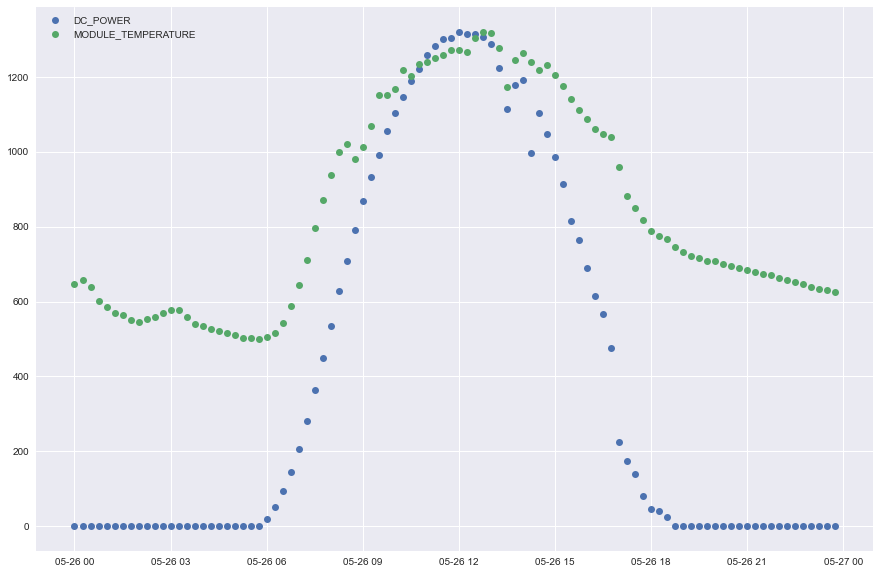

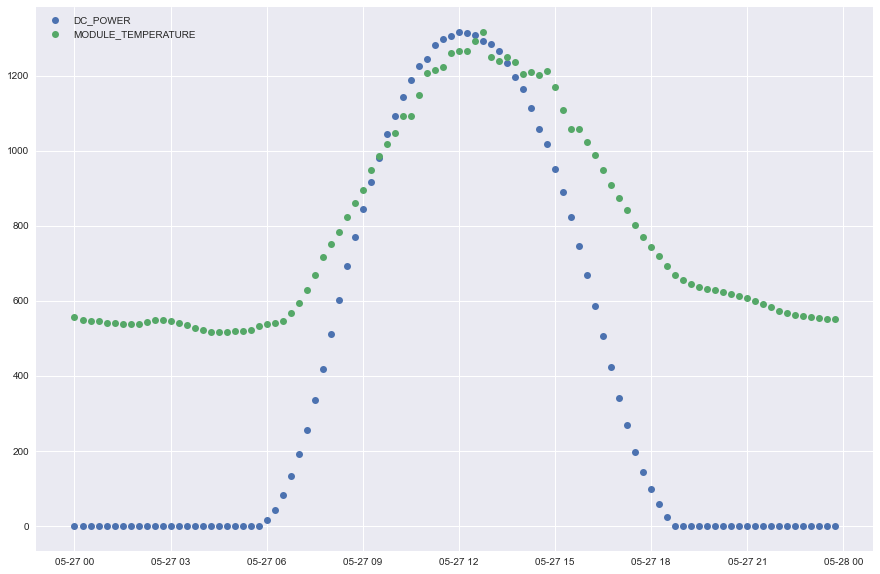

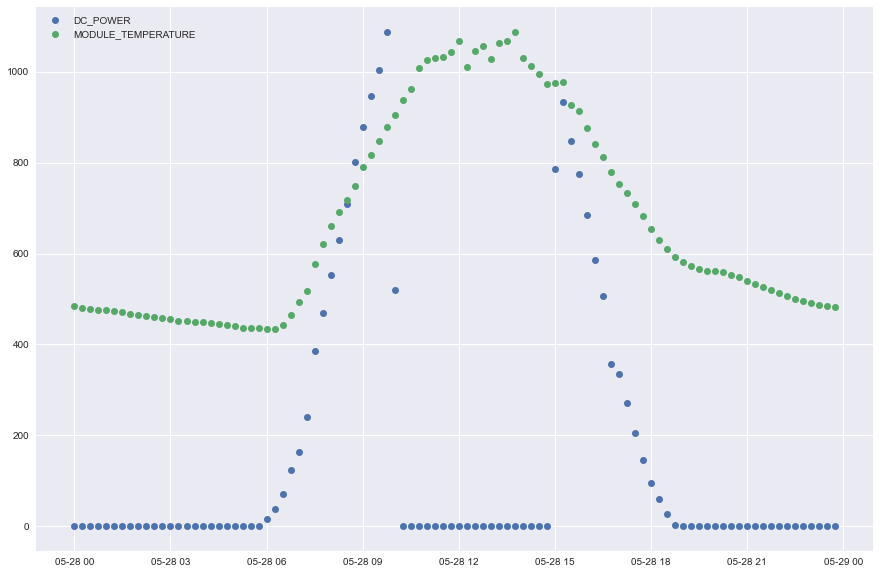

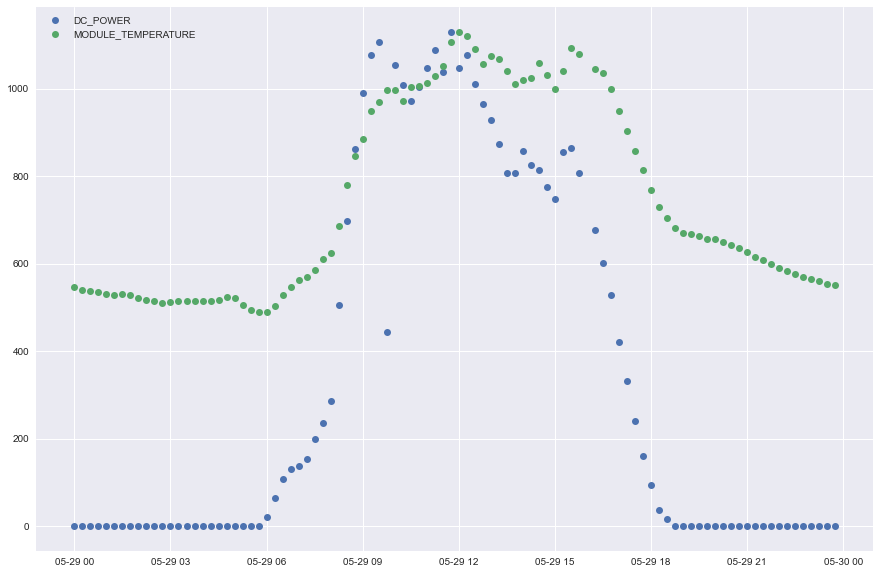

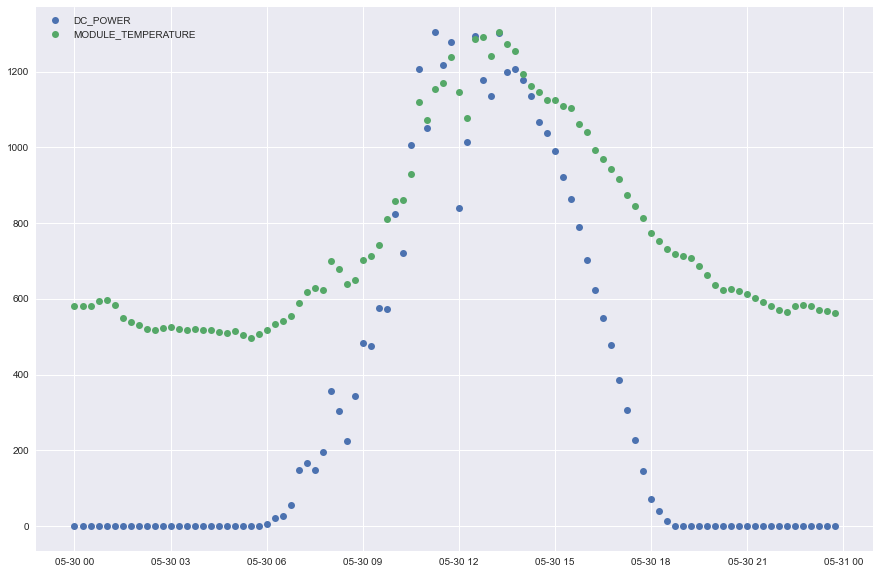

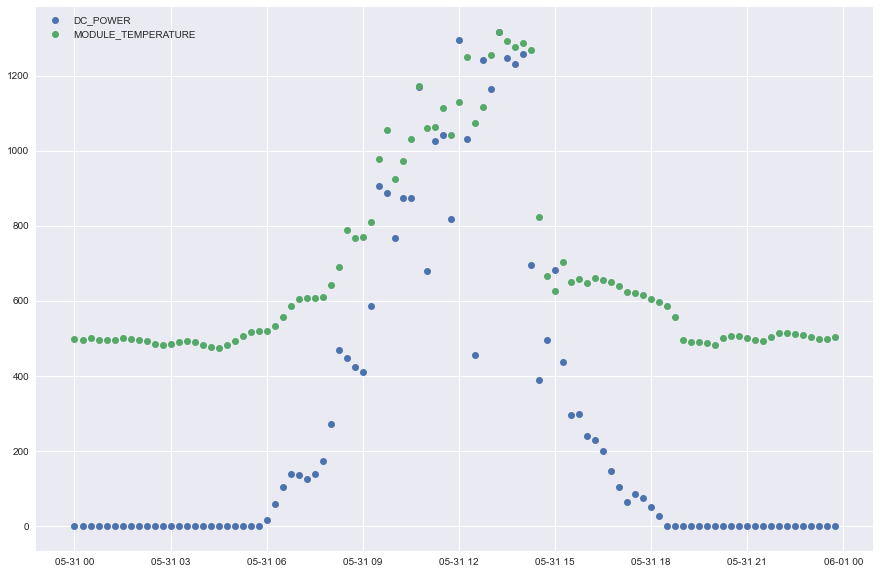

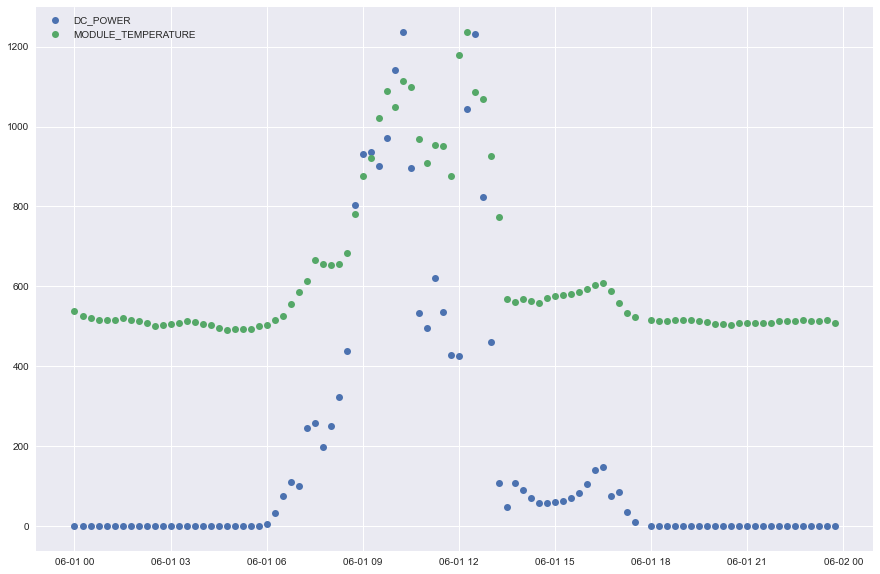

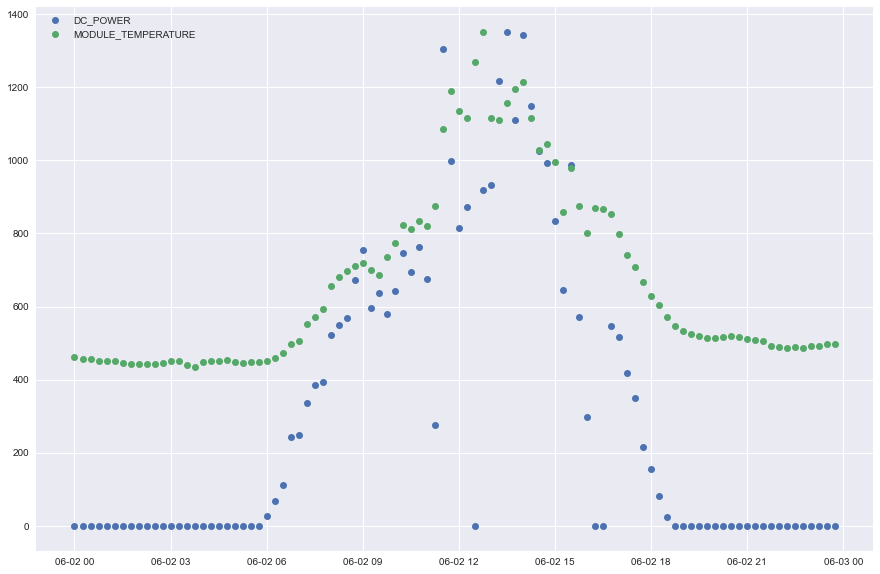

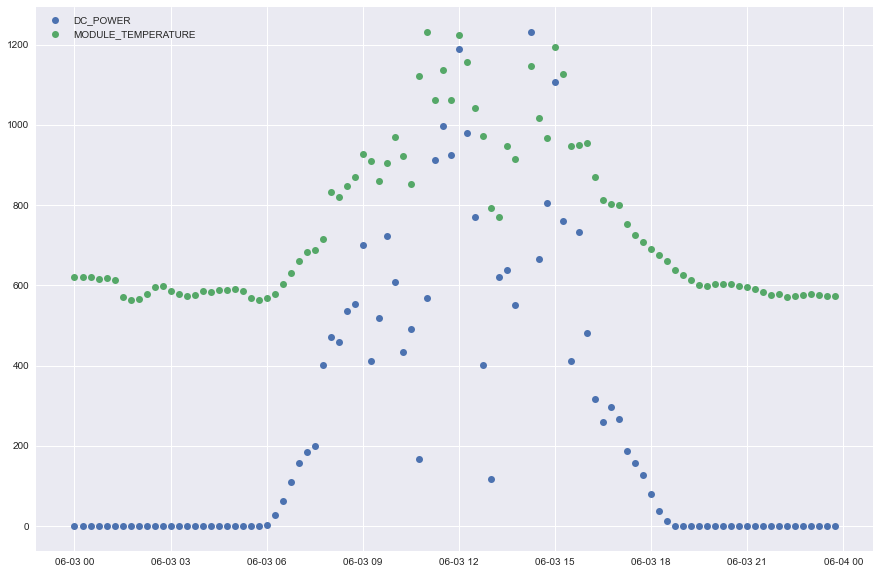

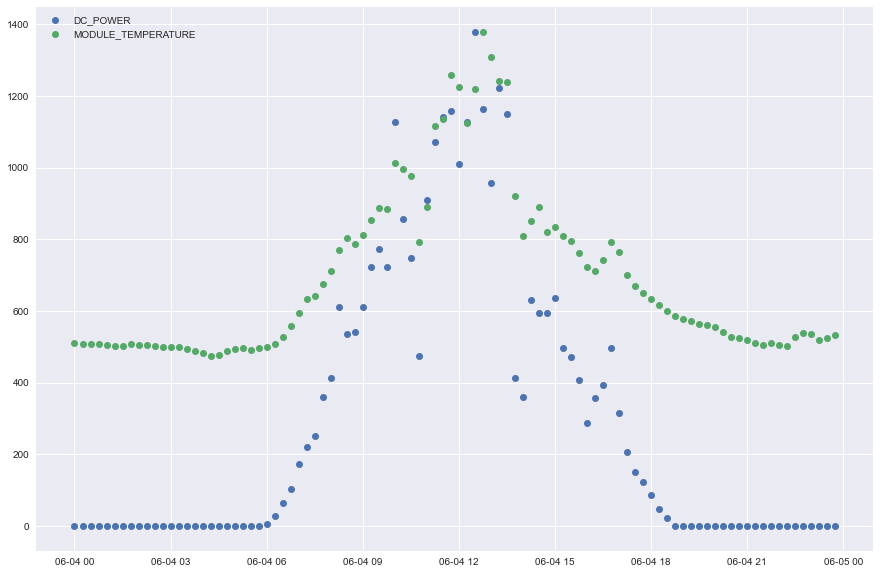

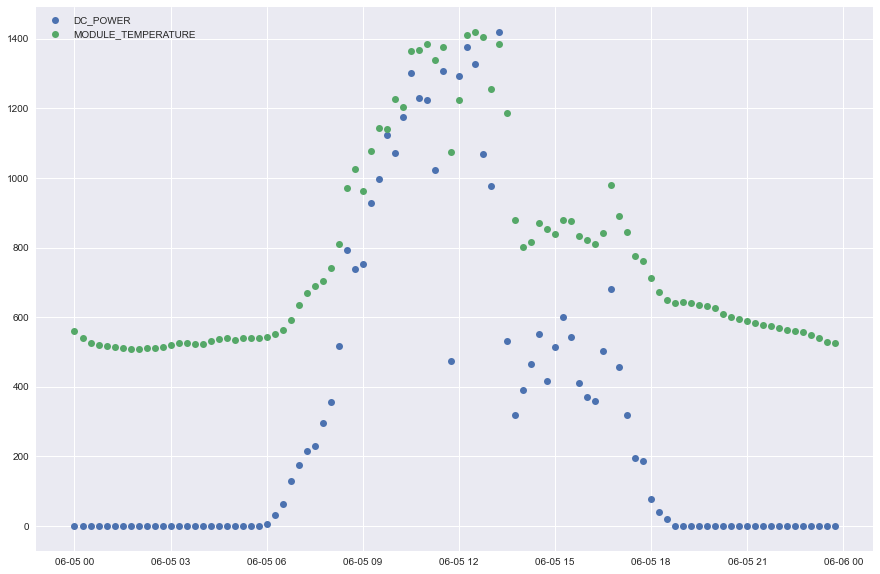

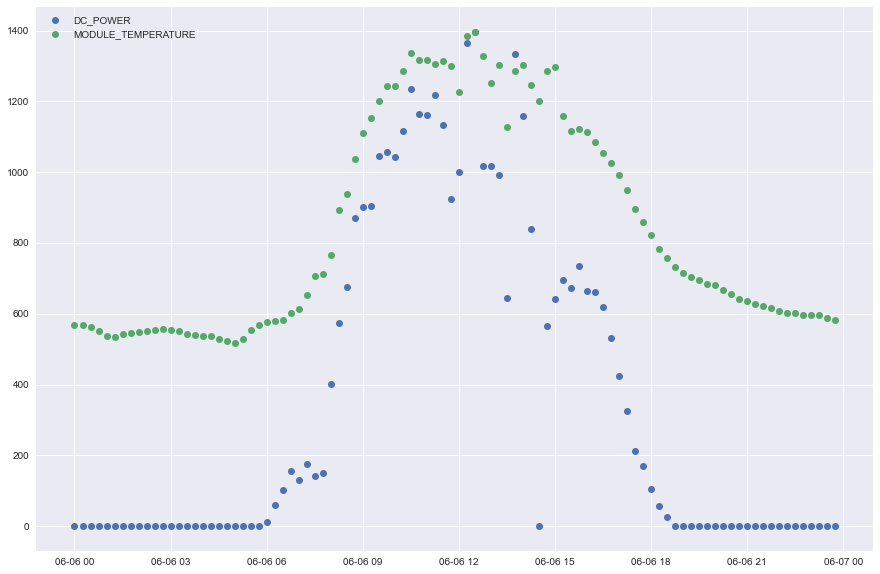

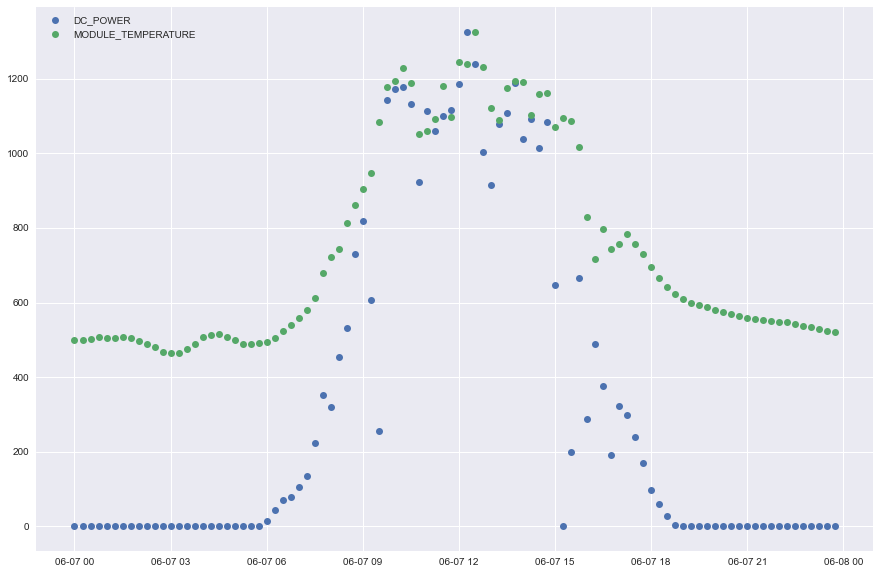

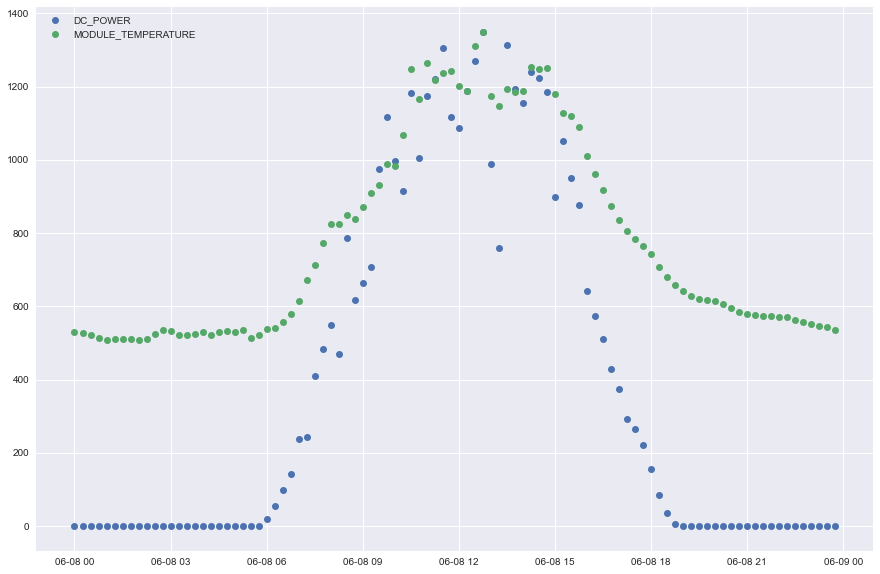

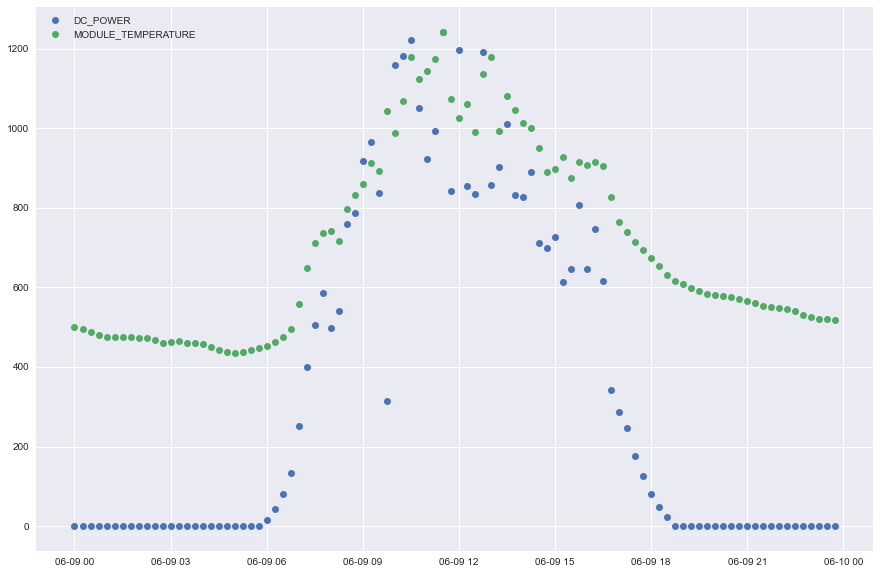

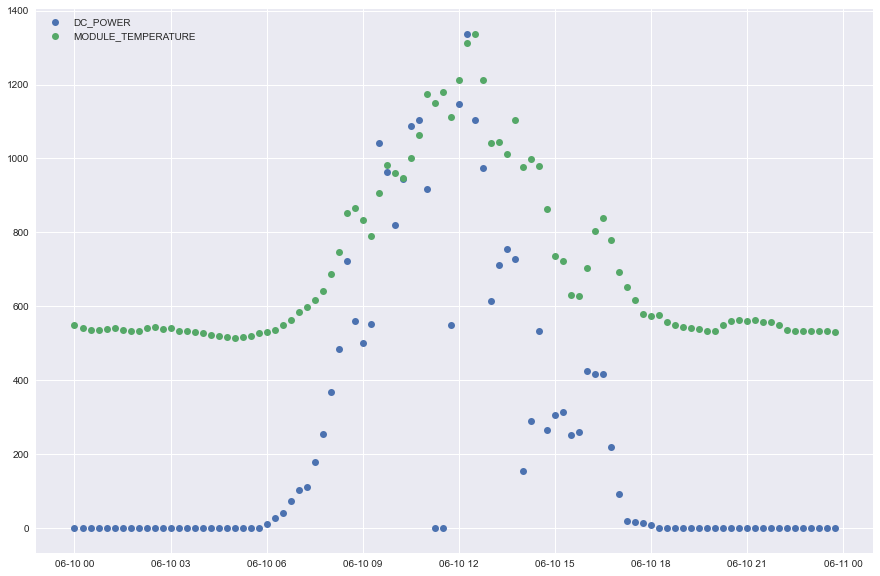

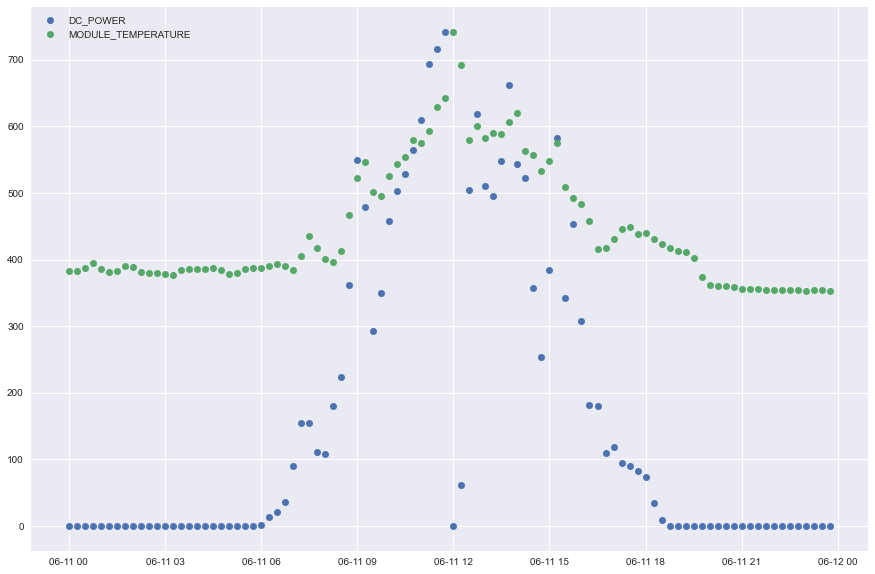

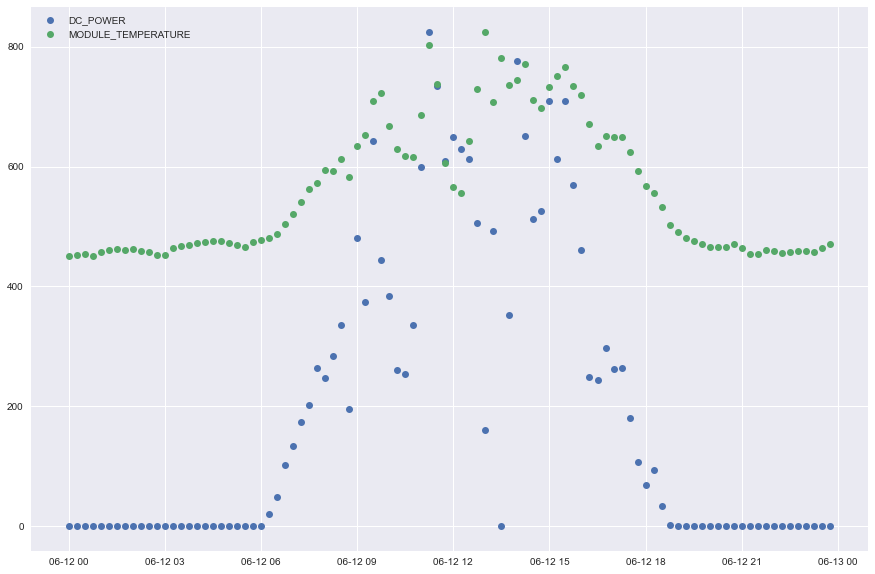

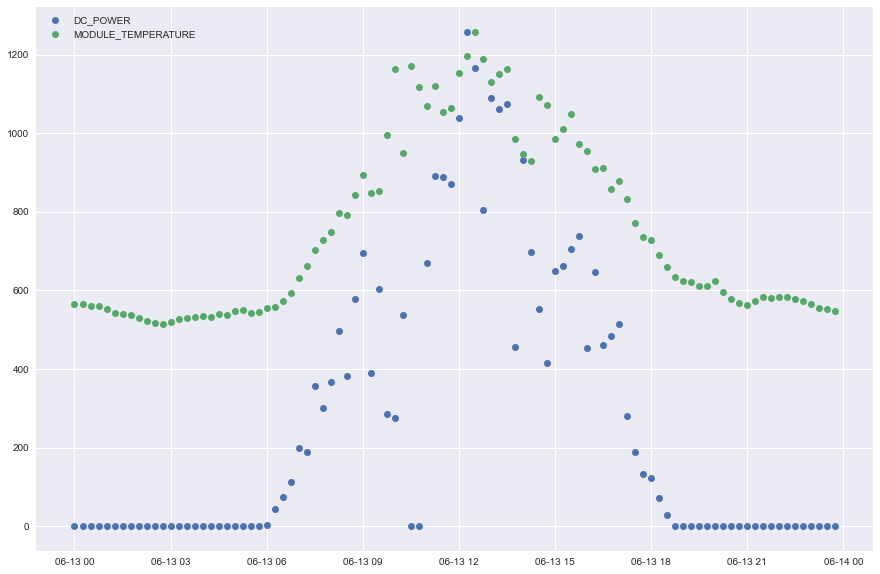

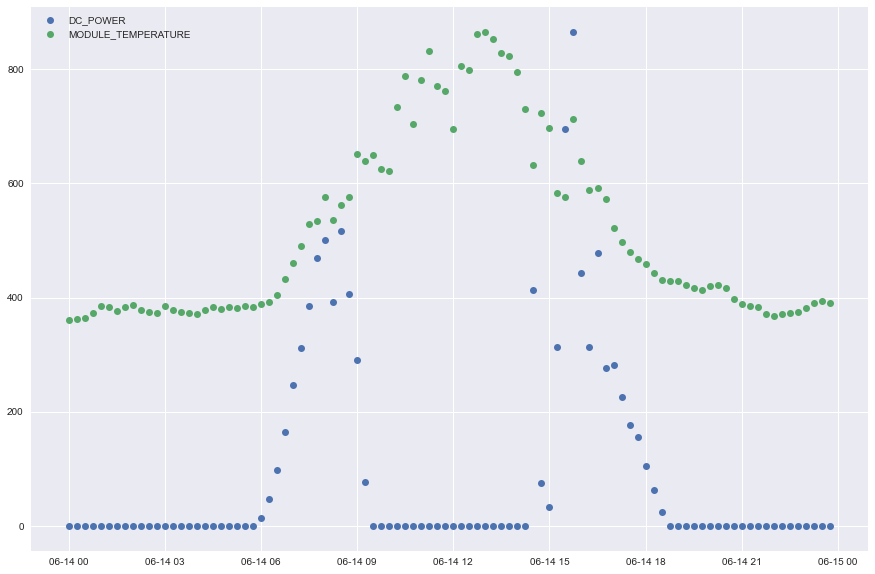

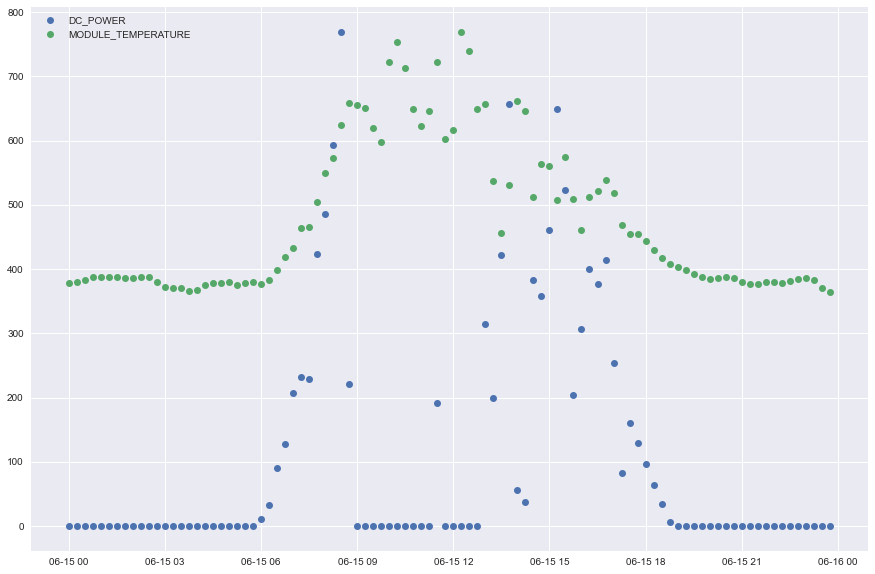

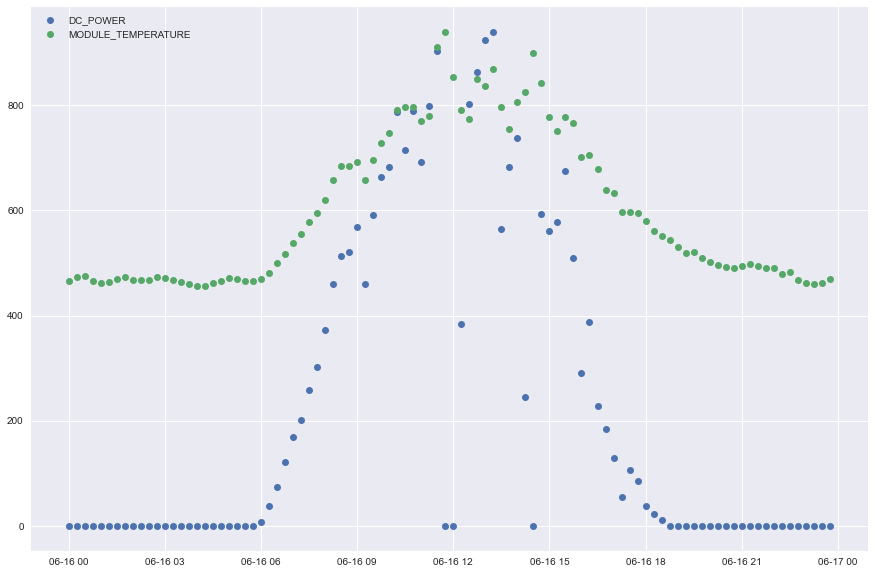

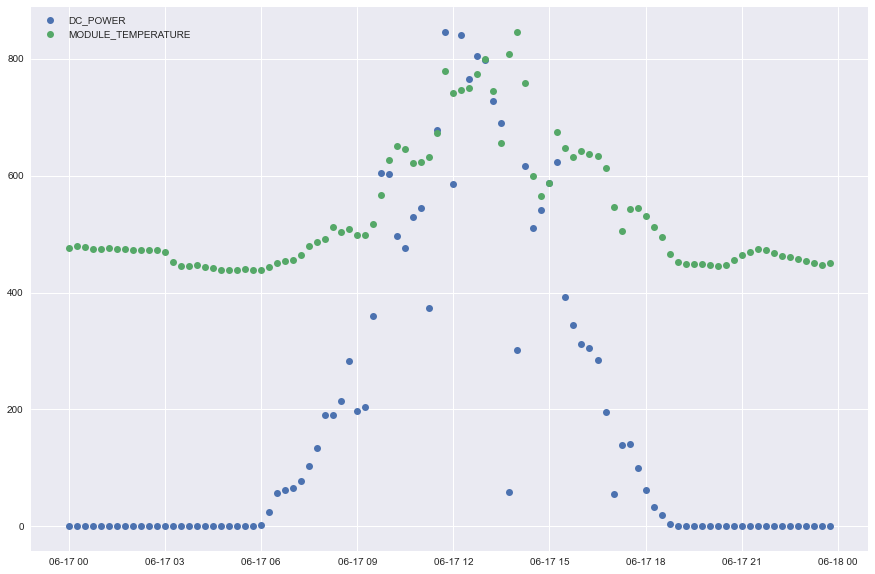

In [13]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'DC_POWER', 'MODULE_TEMPERATURE')

## For each day plot DAILY_YIELD against time (one inverter)

Plotting for the 4UPUqMRk7TRMgml source key 


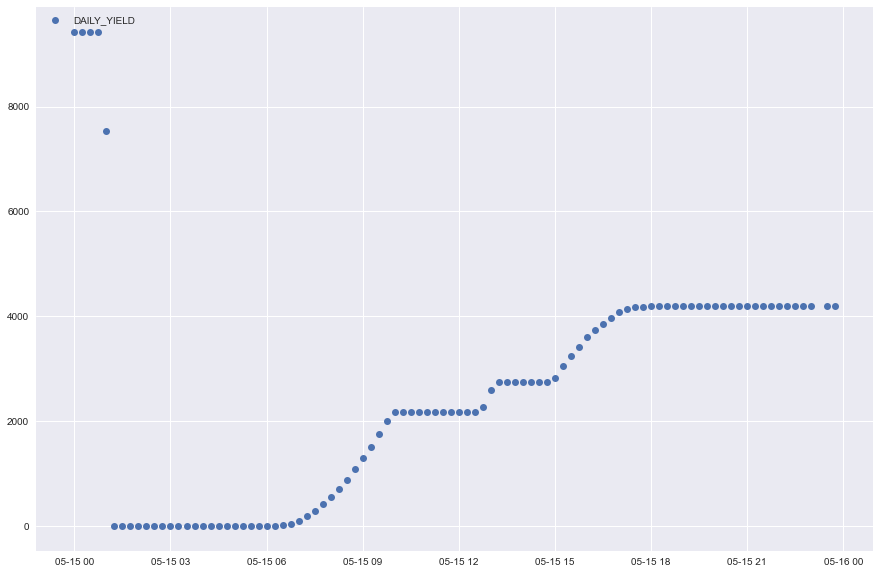

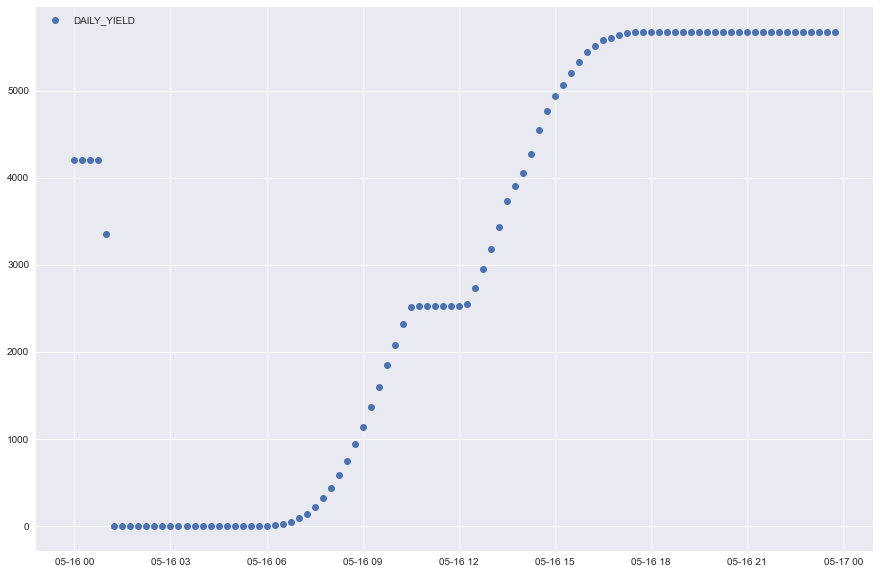

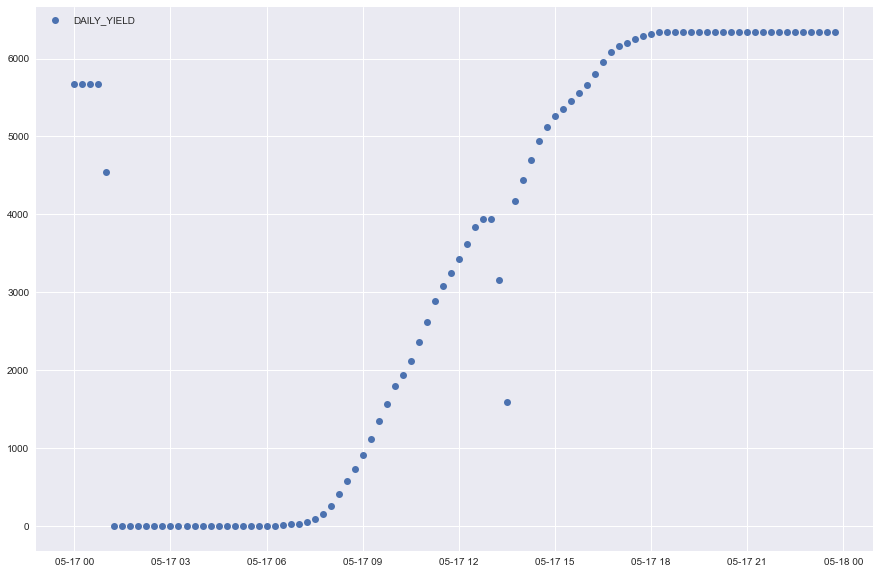

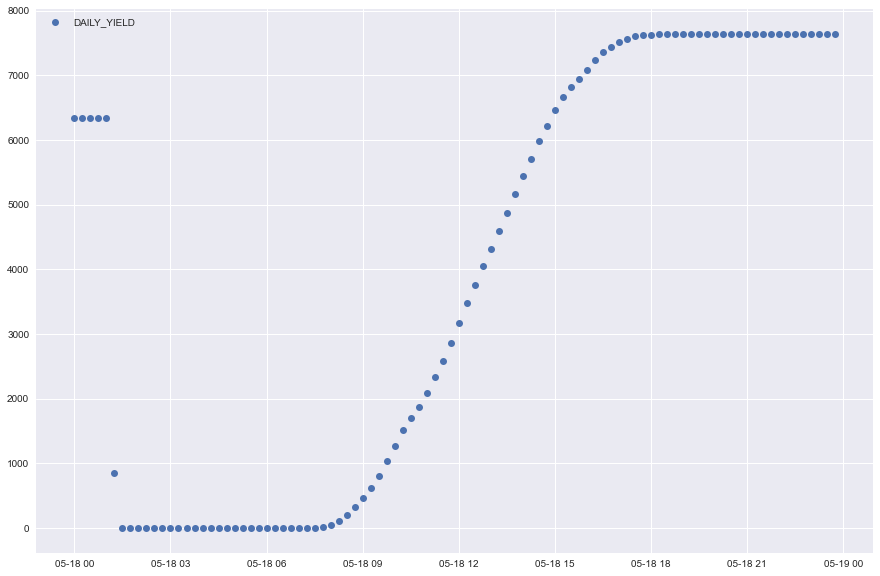

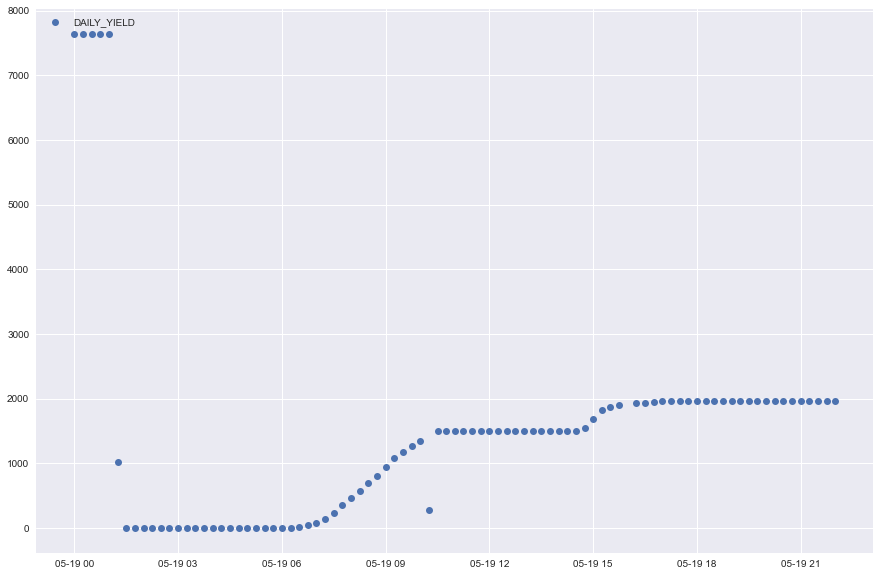

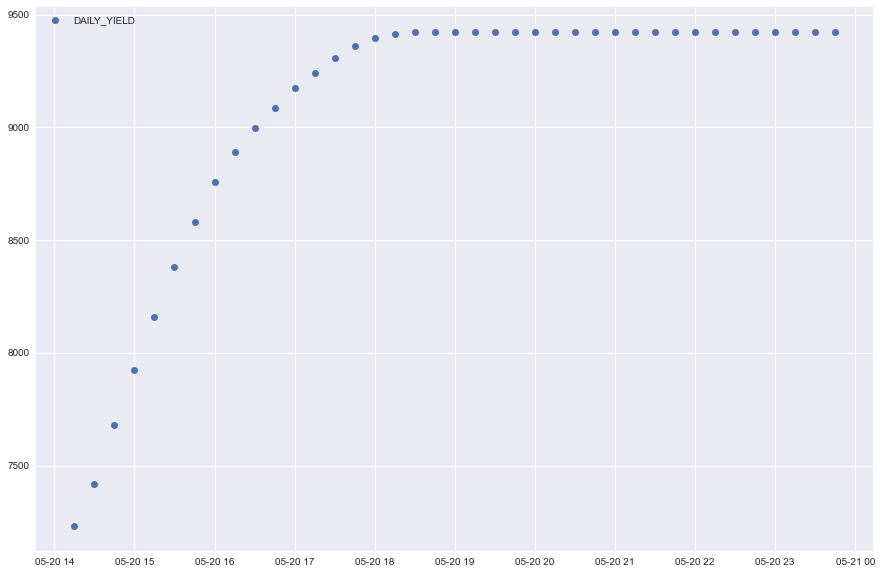

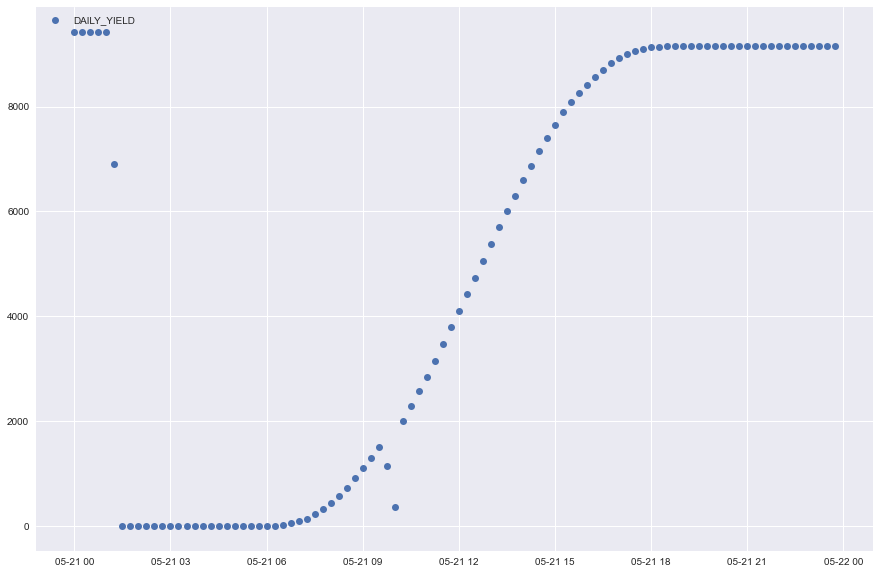

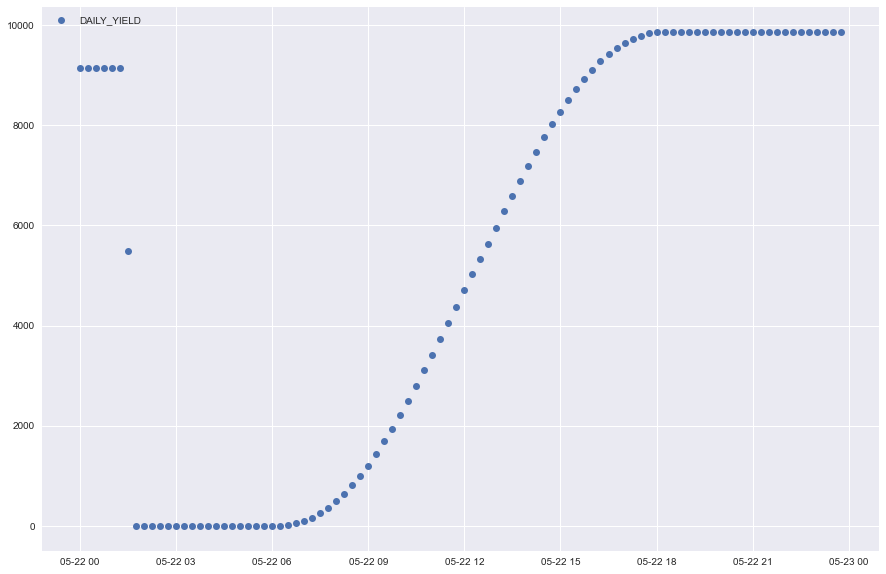

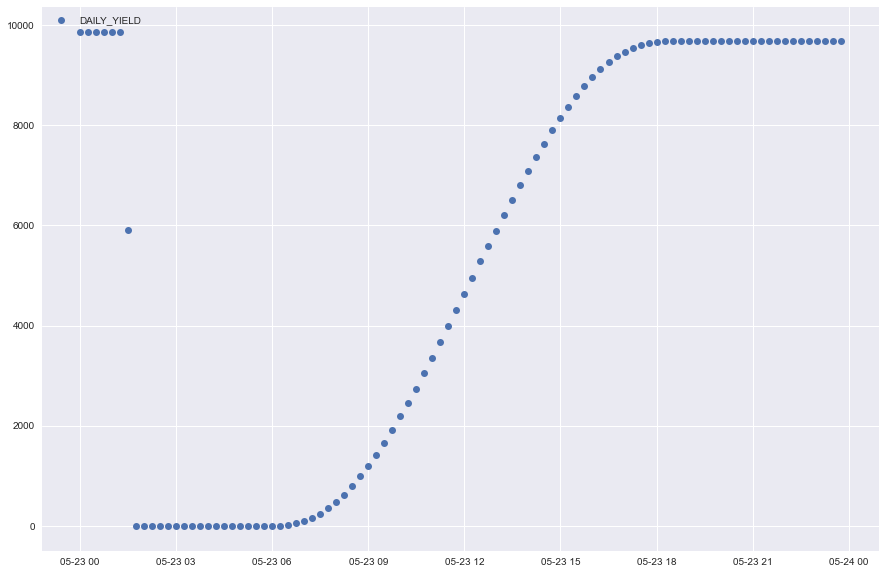

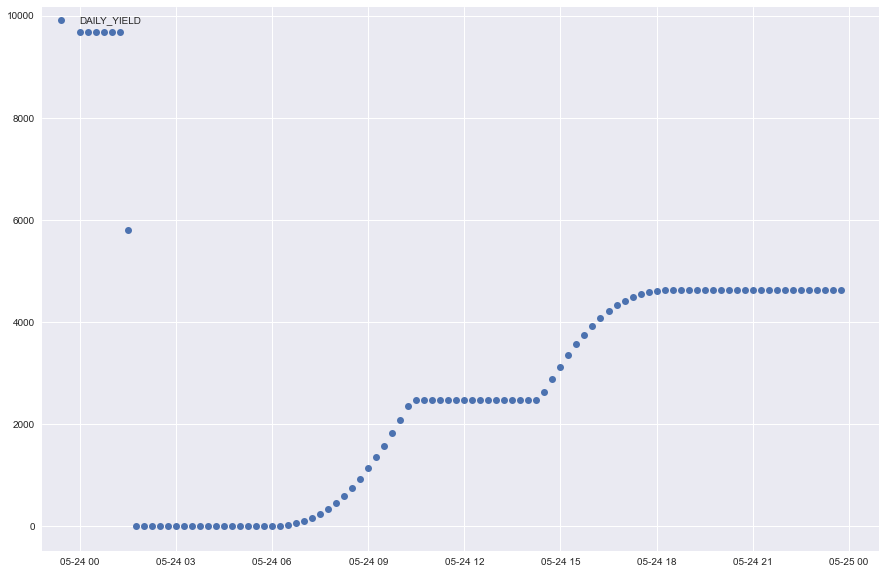

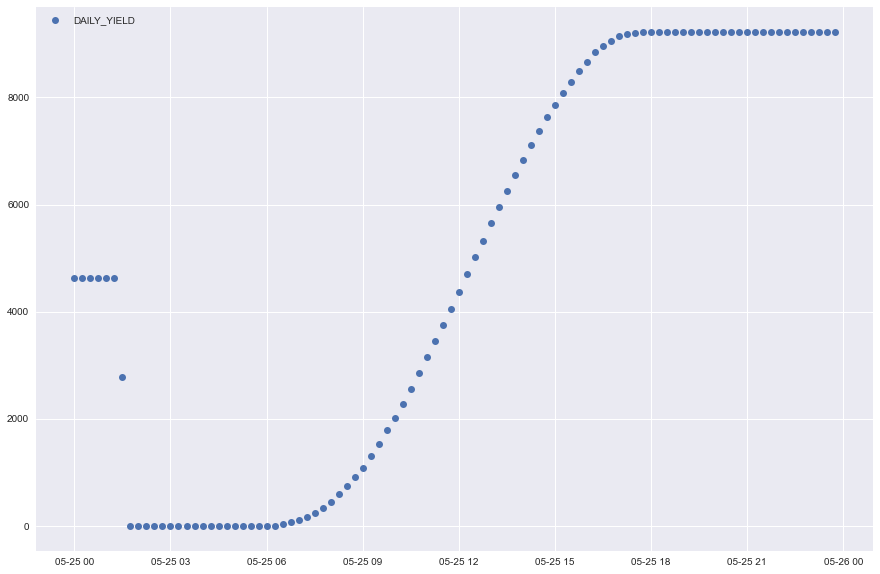

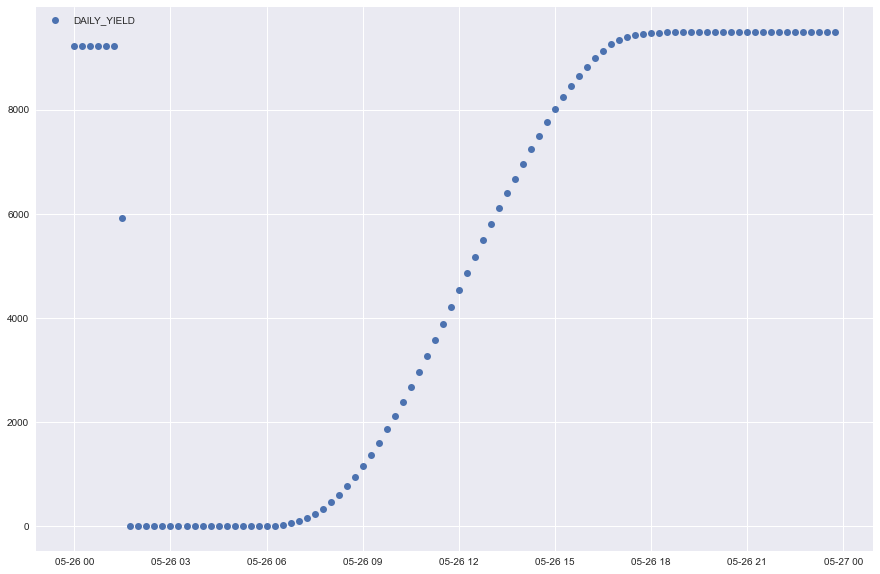

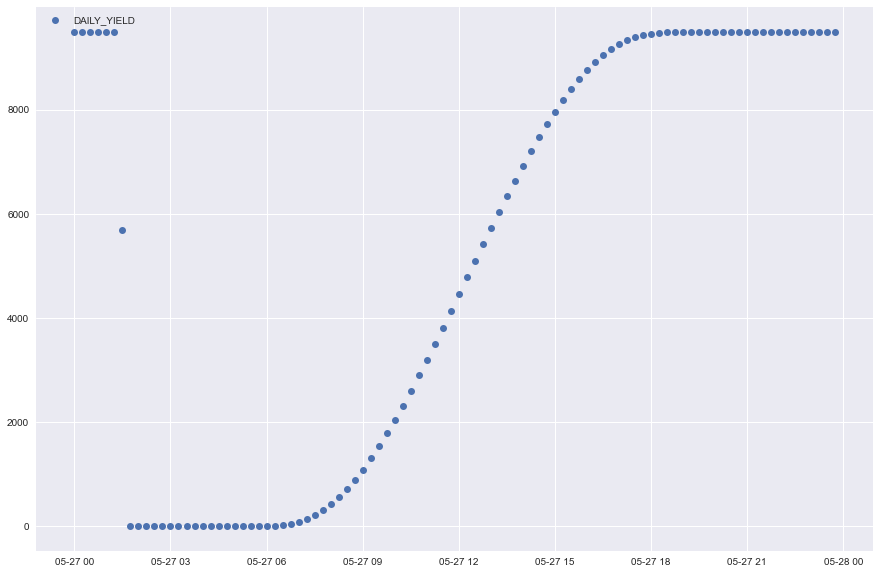

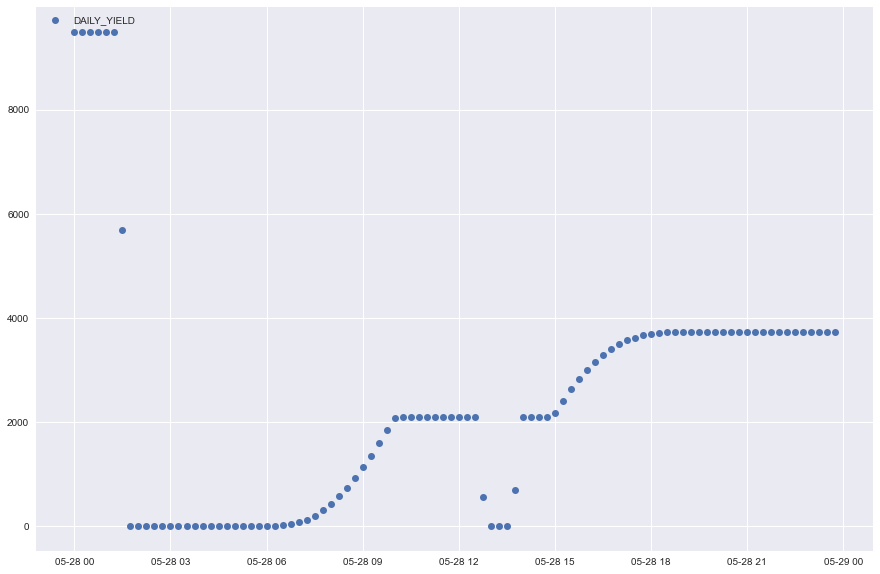

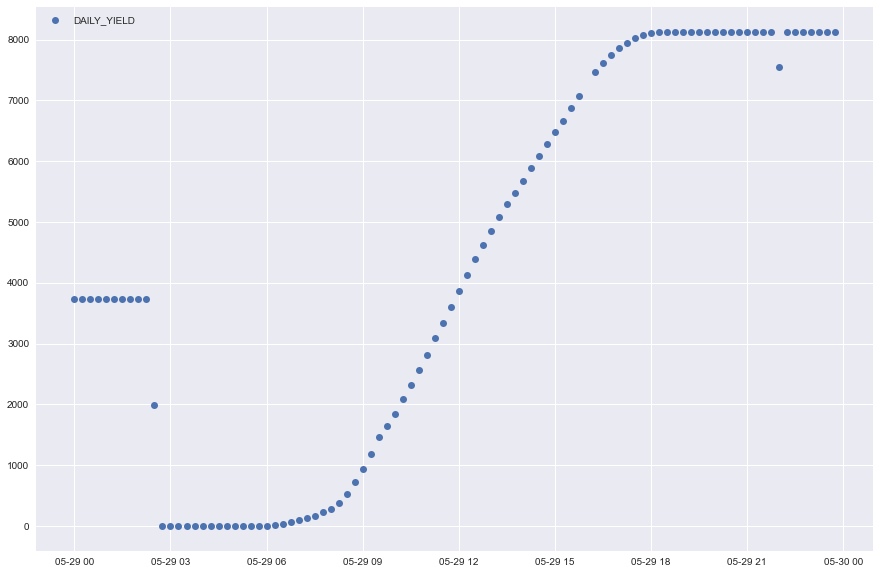

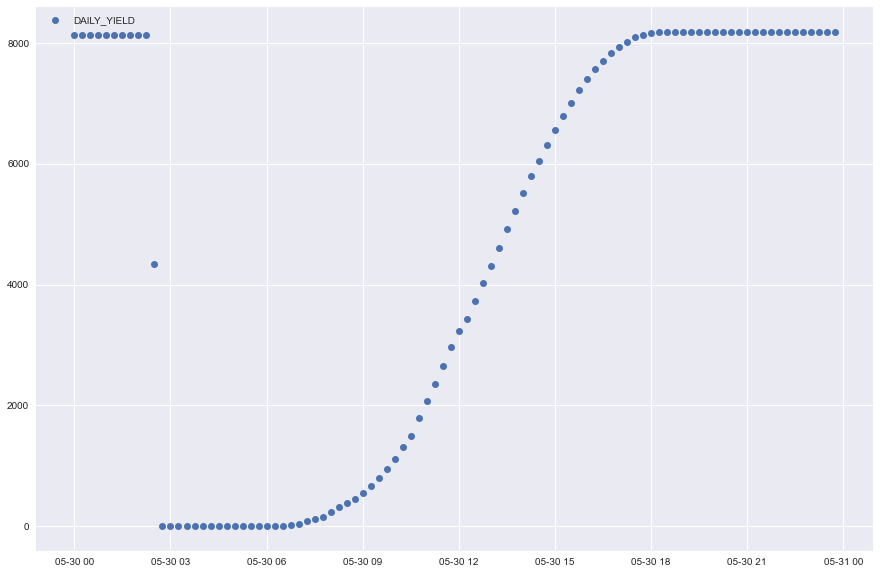

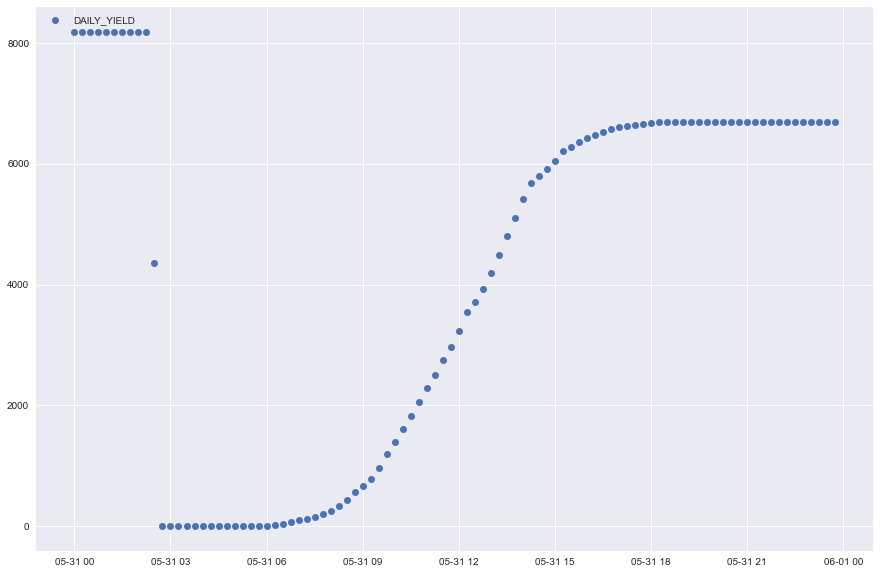

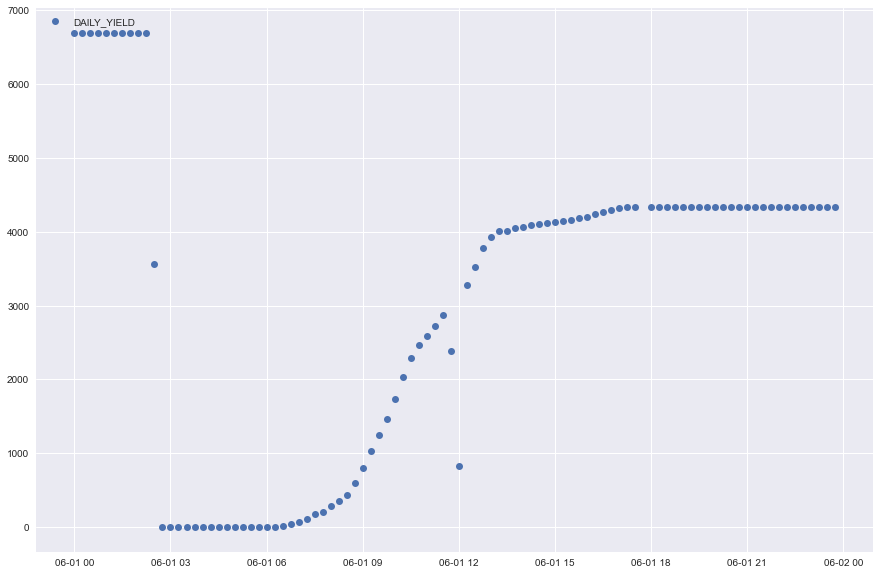

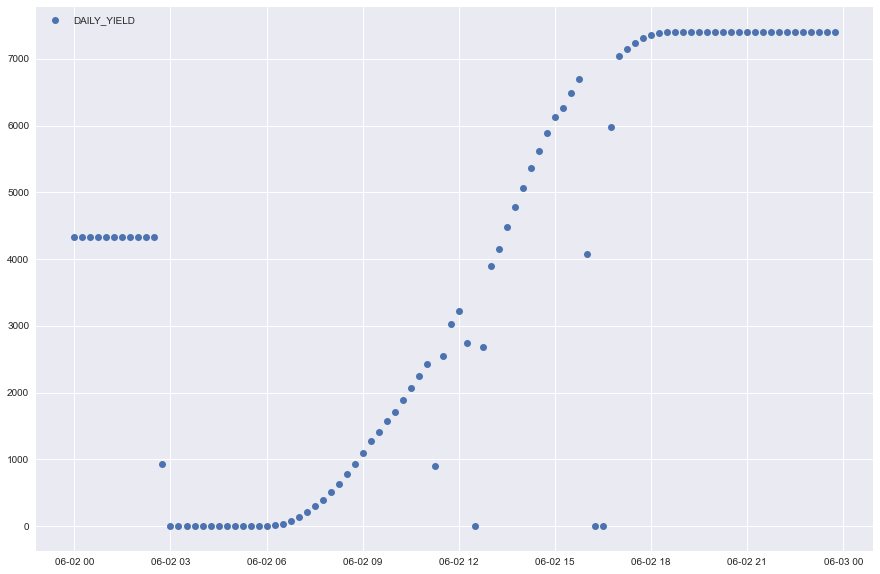

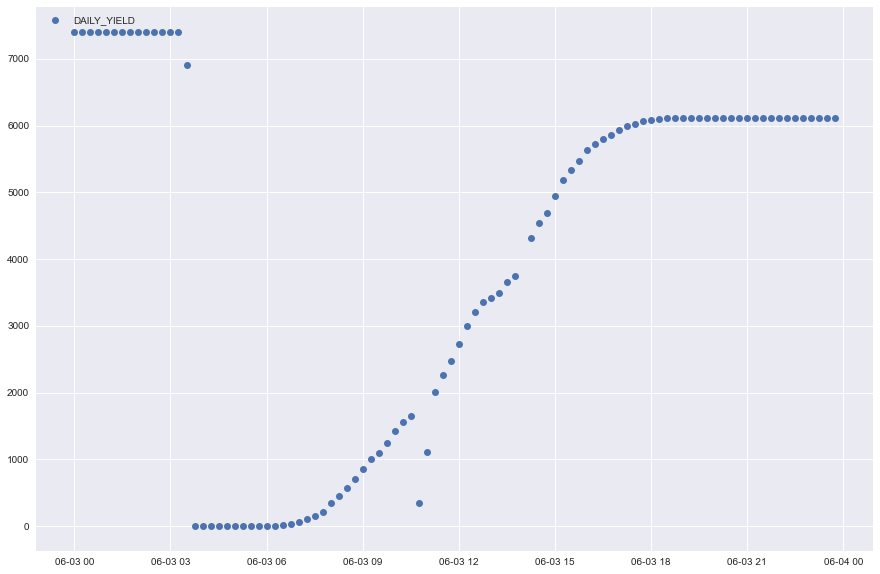

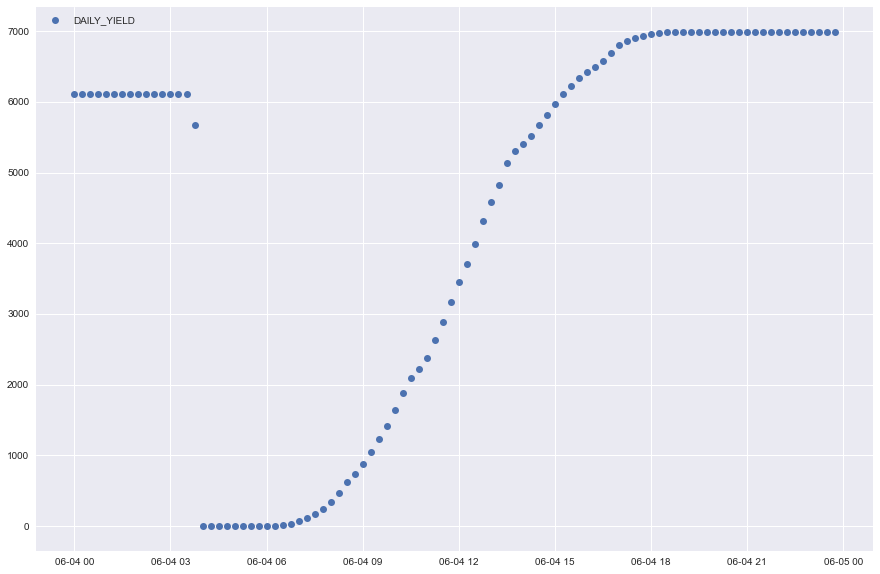

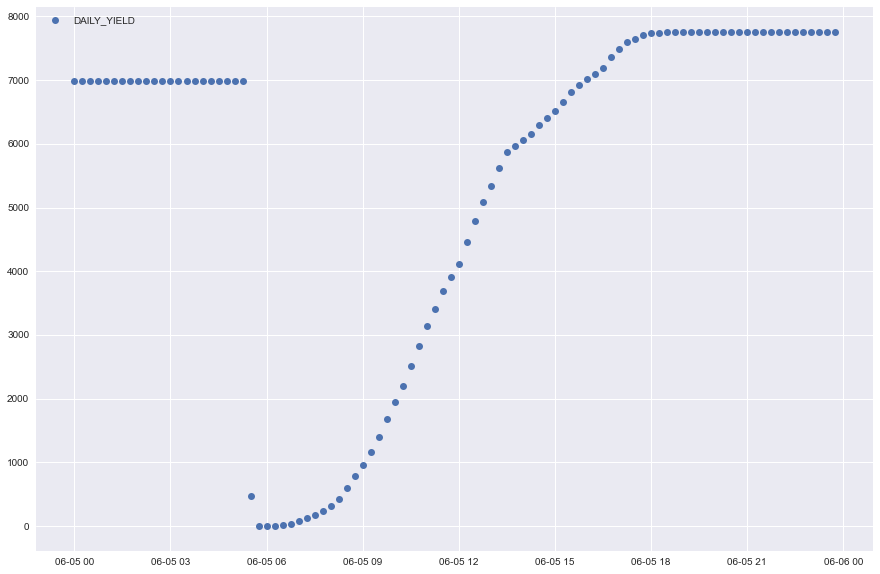

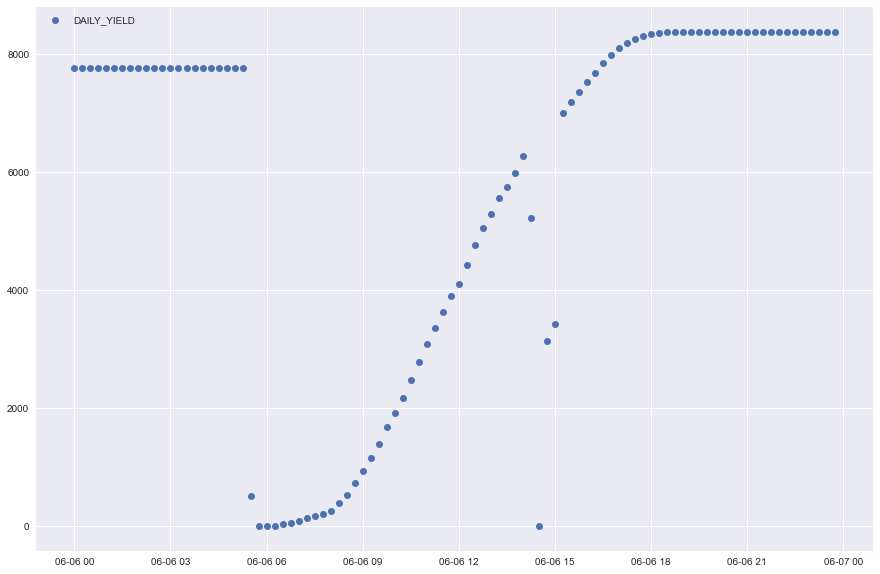

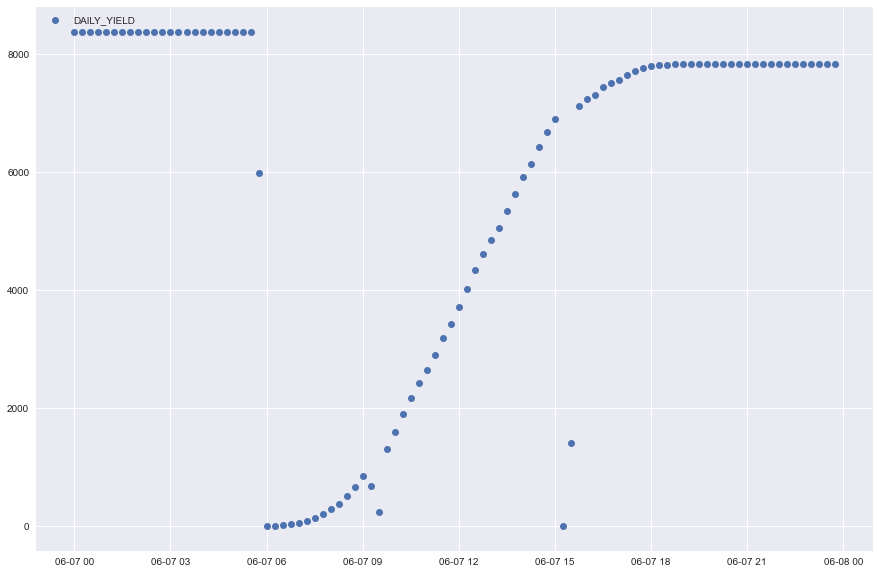

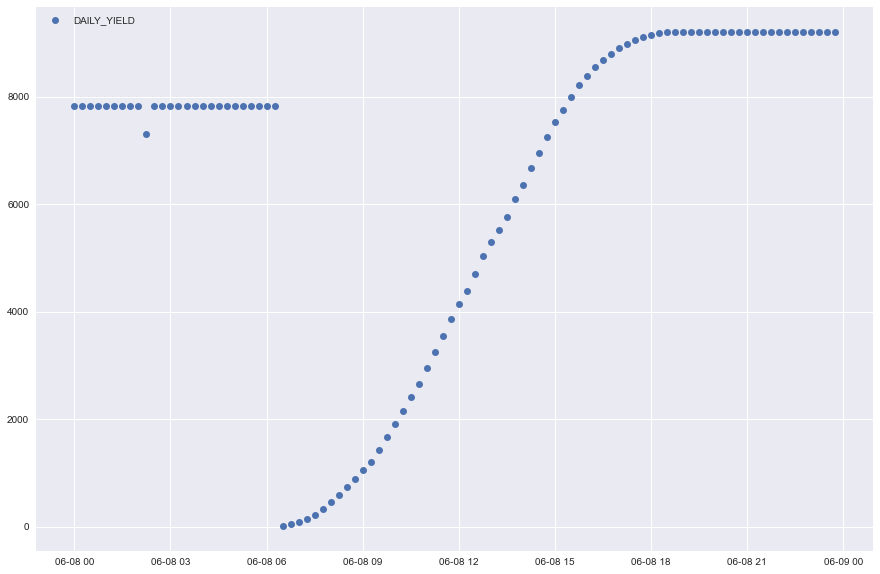

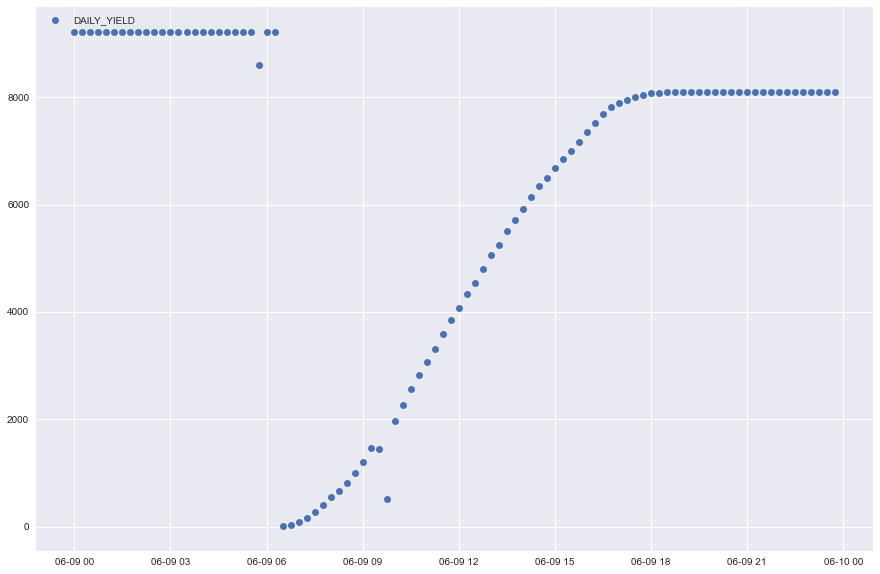

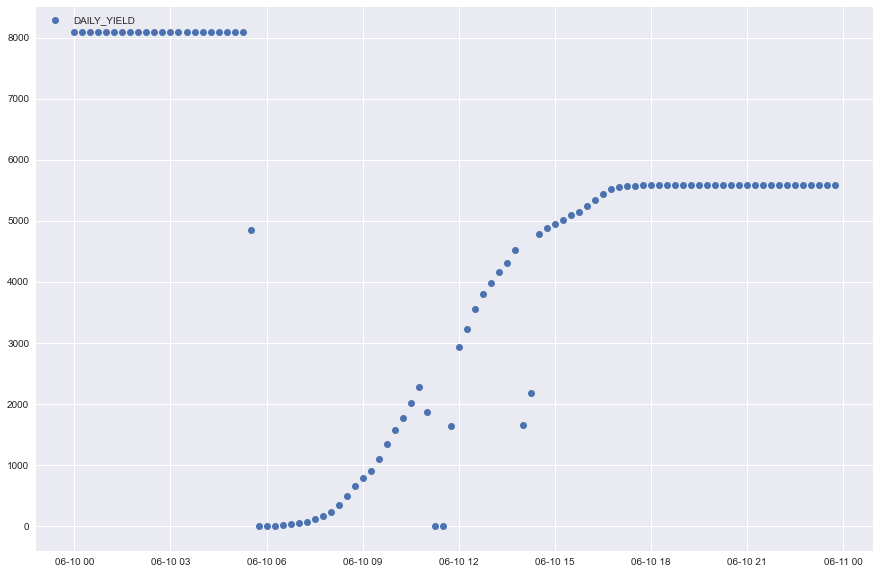

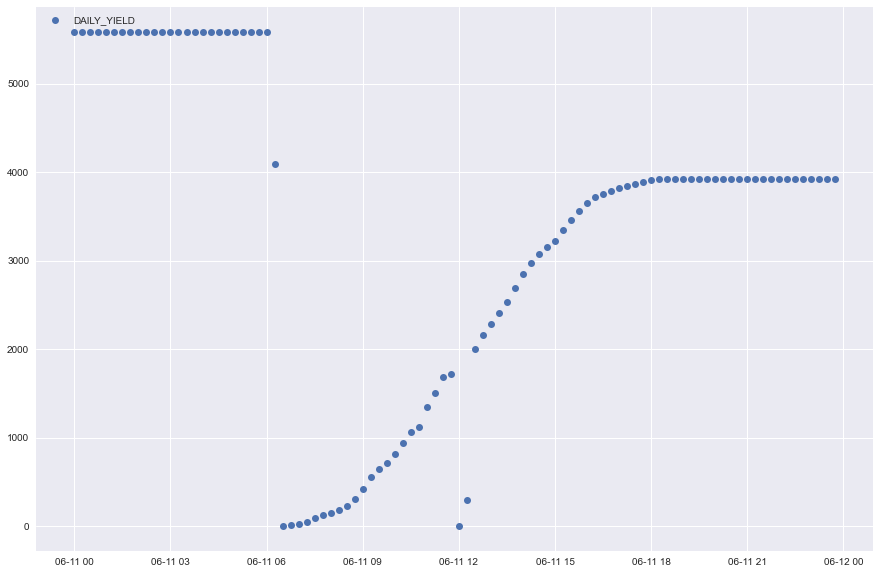

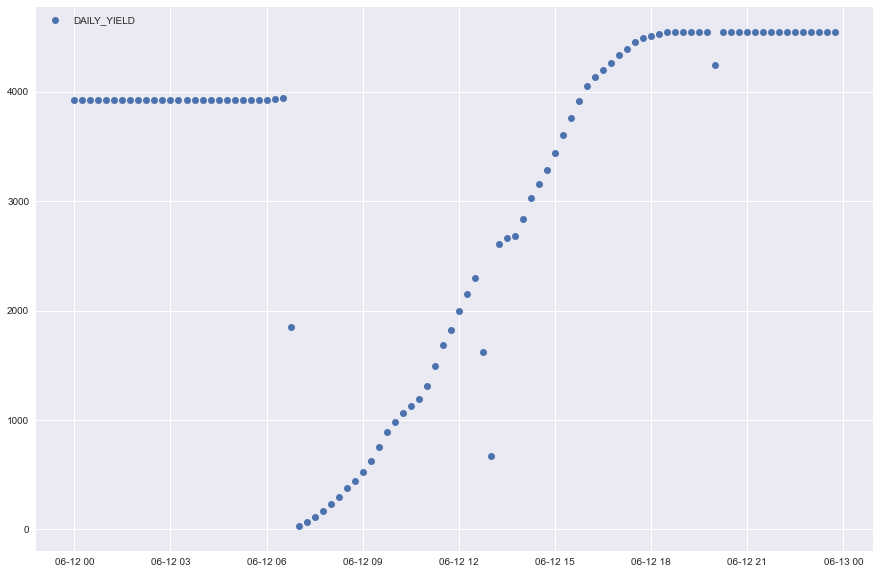

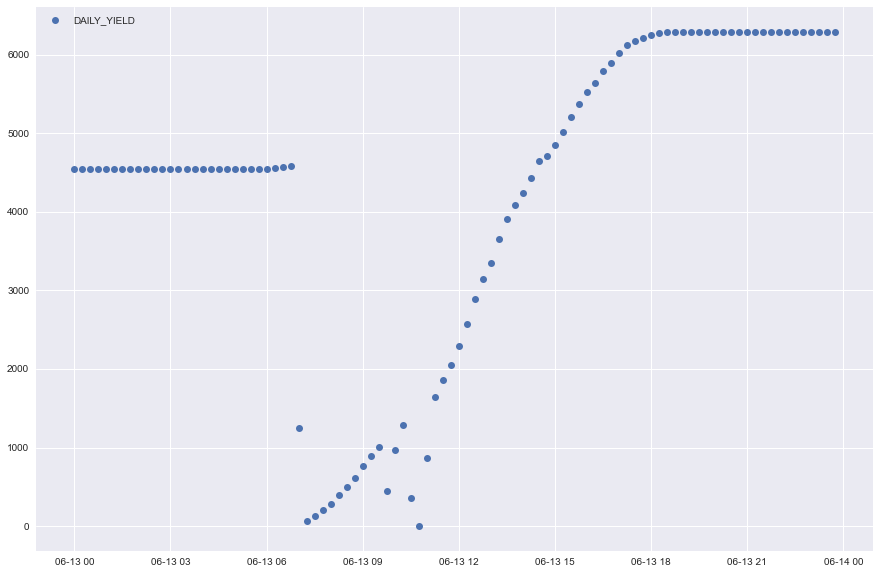

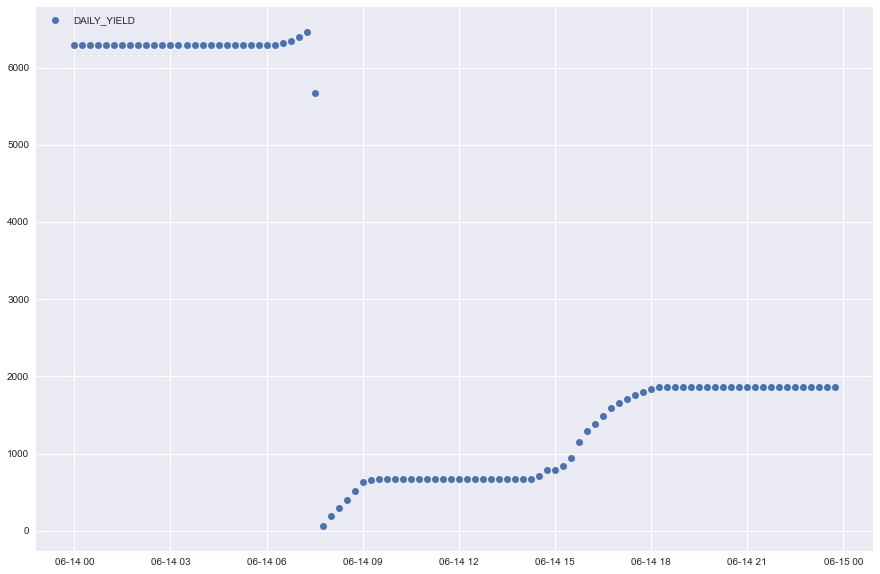

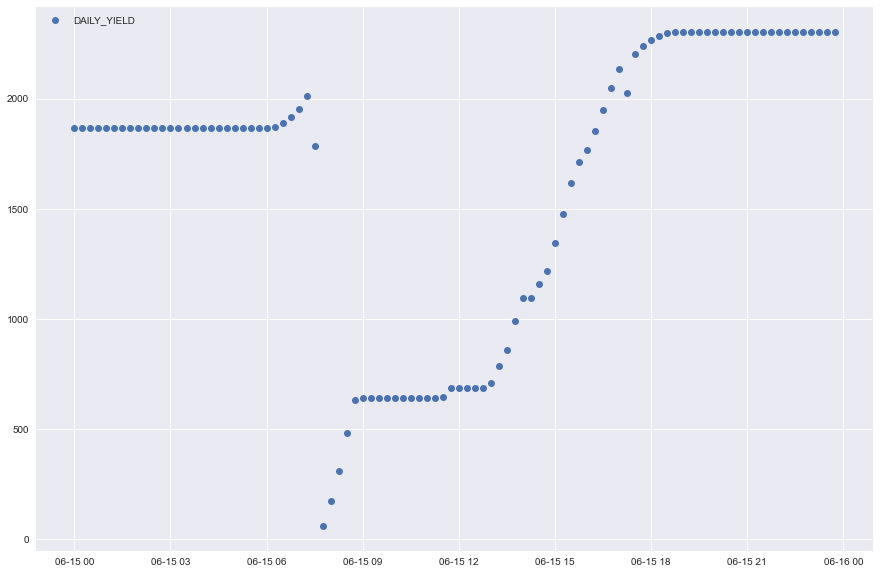

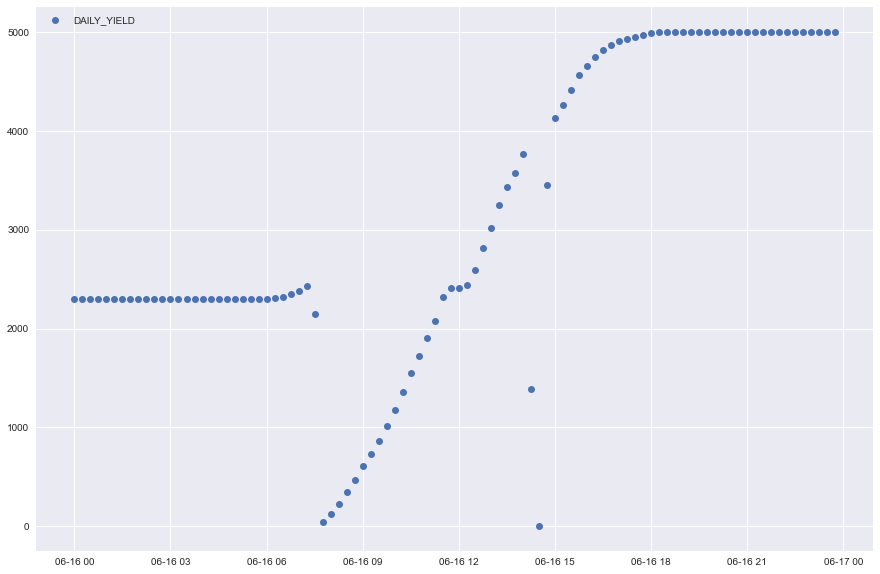

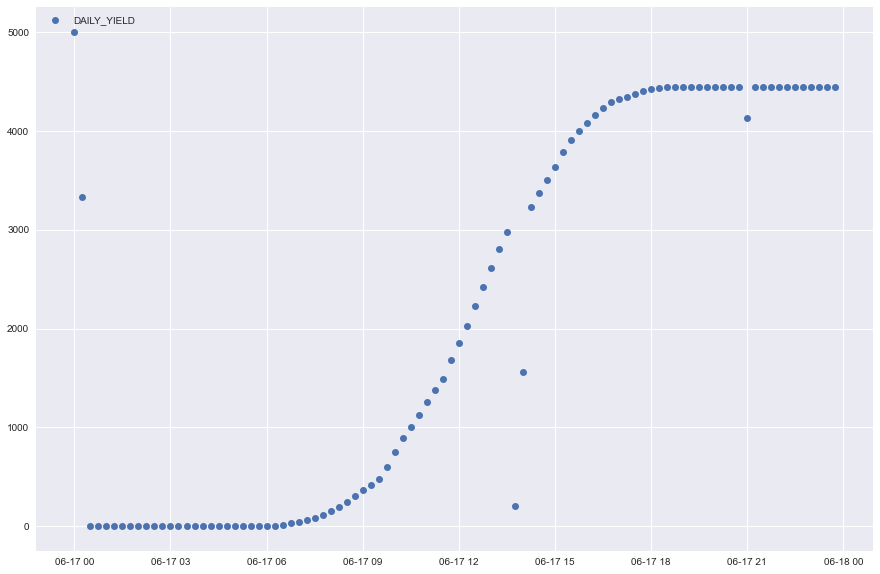

In [14]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'DAILY_YIELD')

## For each day plot DAILY_YIELD against time

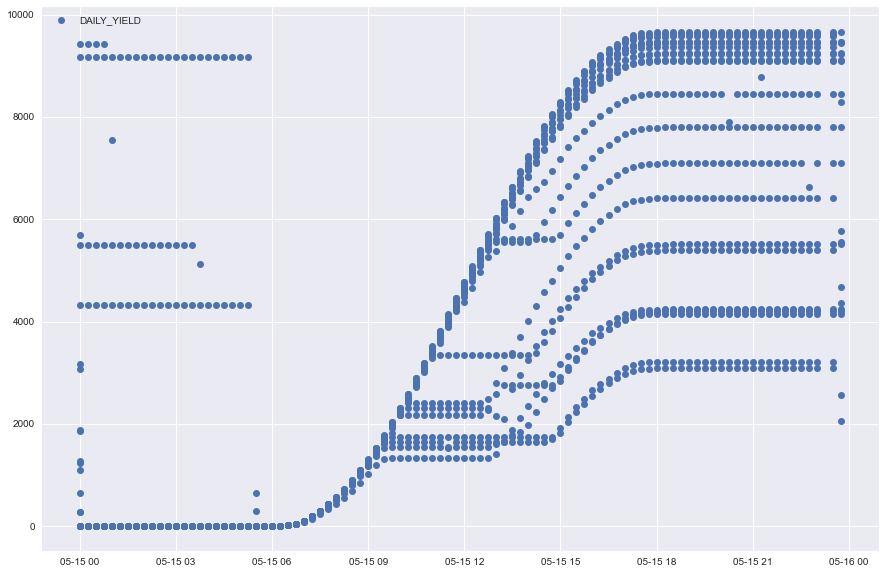

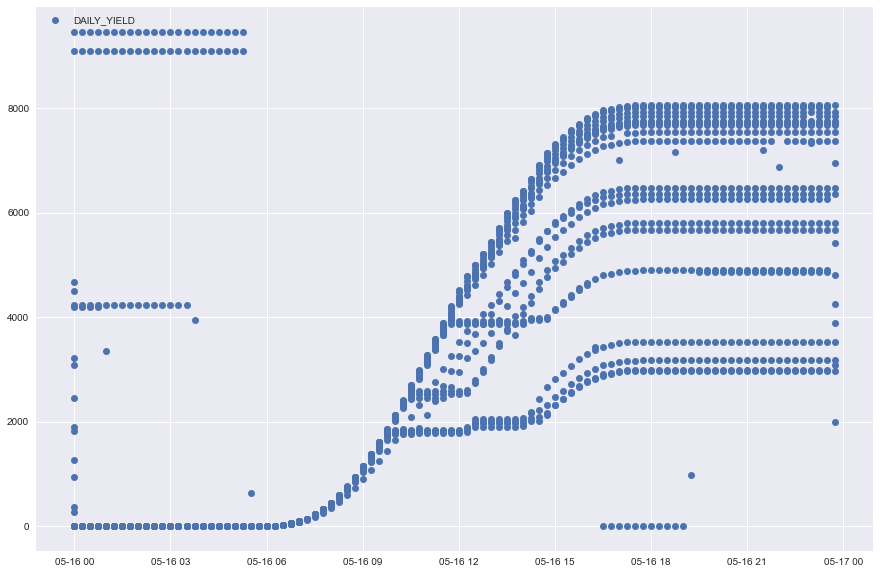

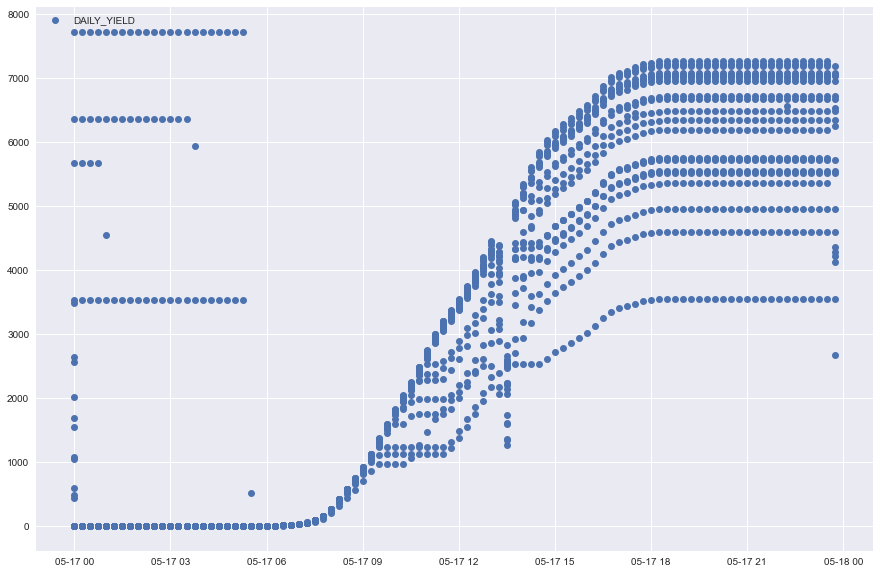

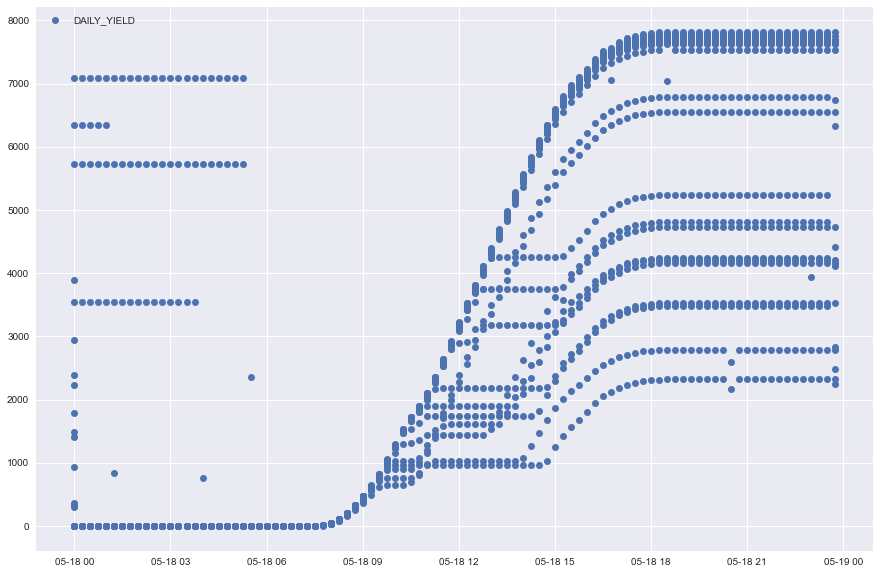

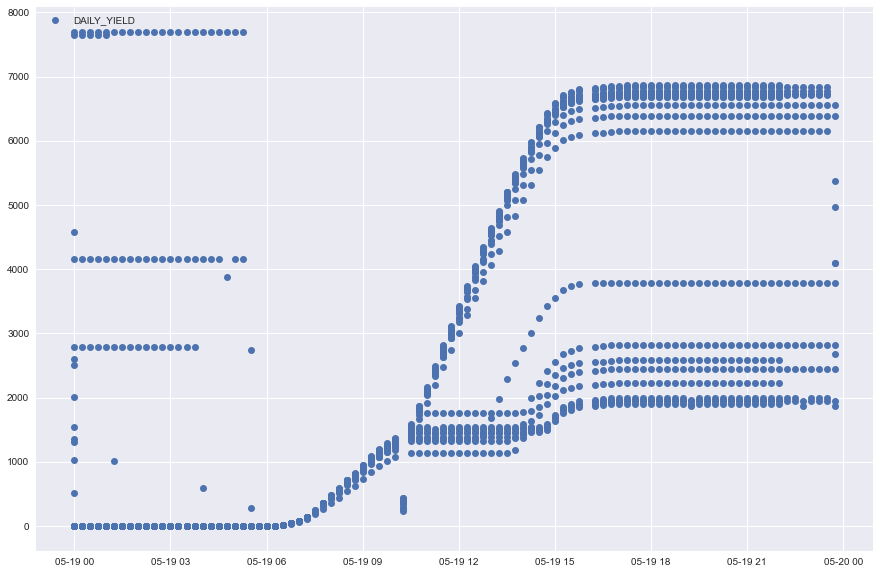

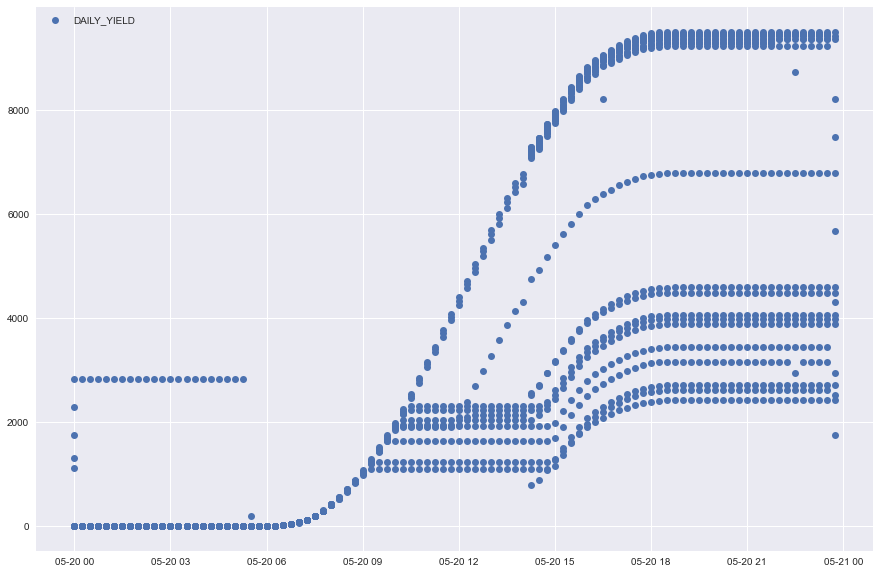

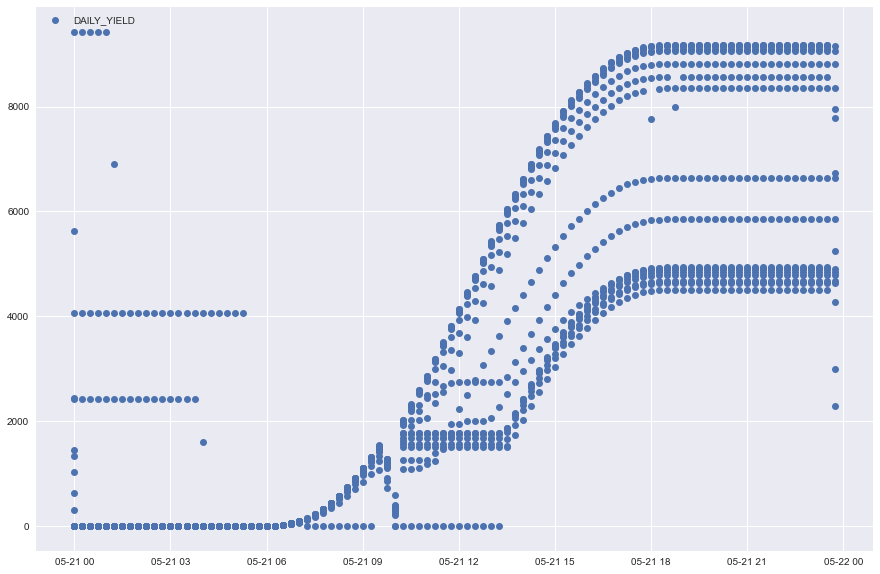

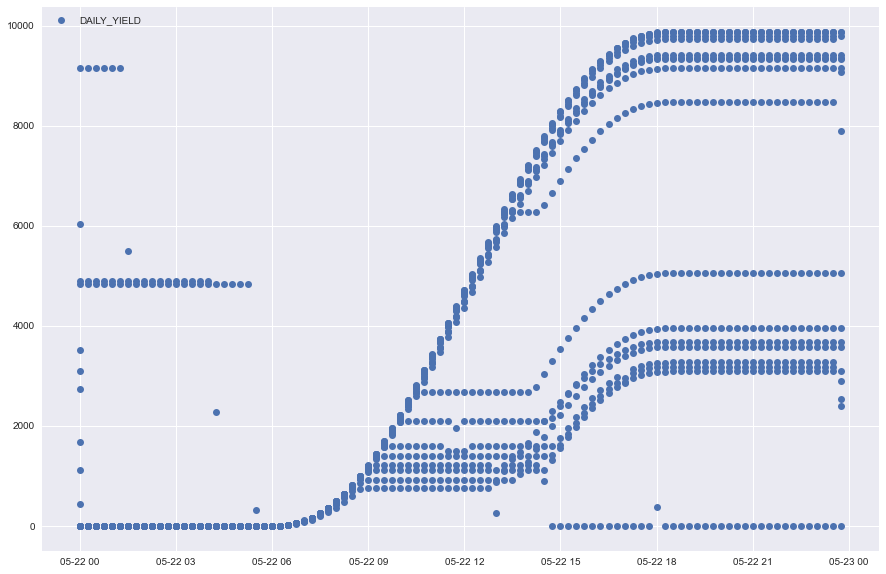

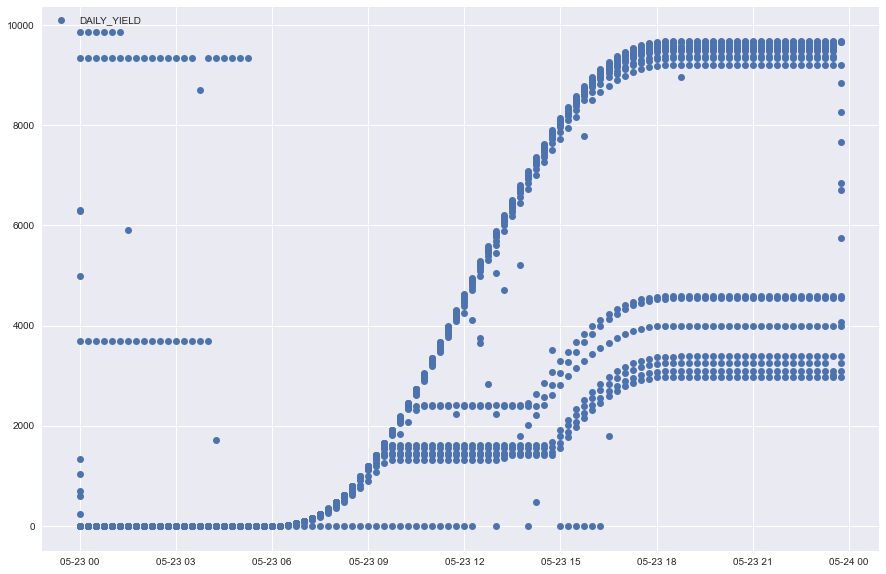

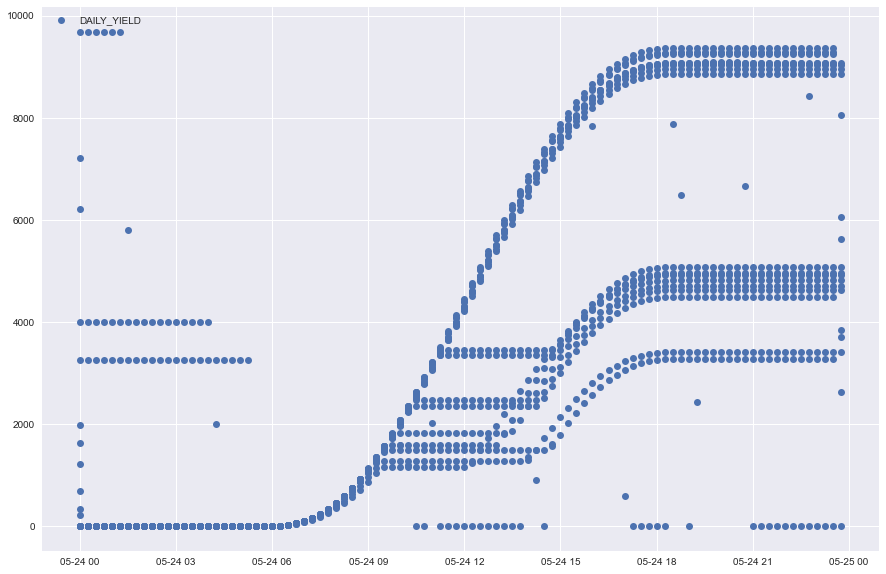

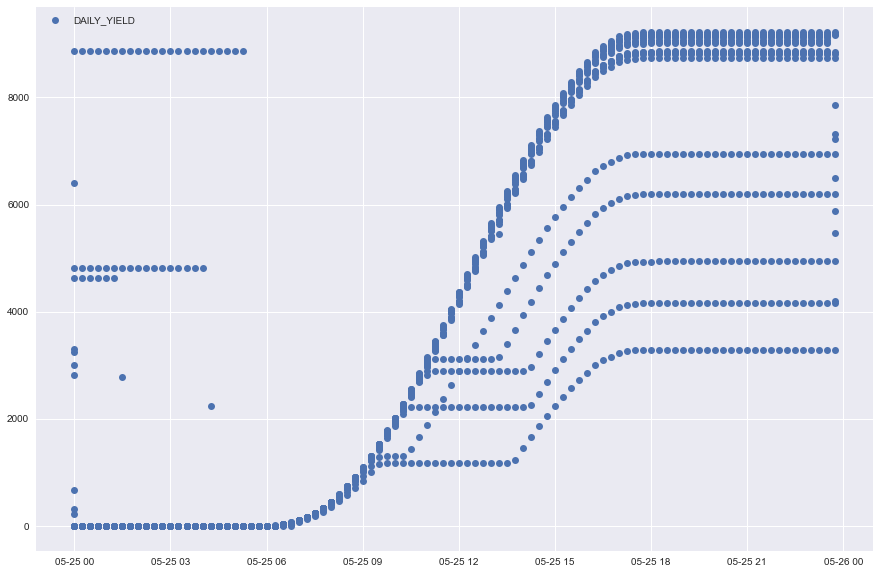

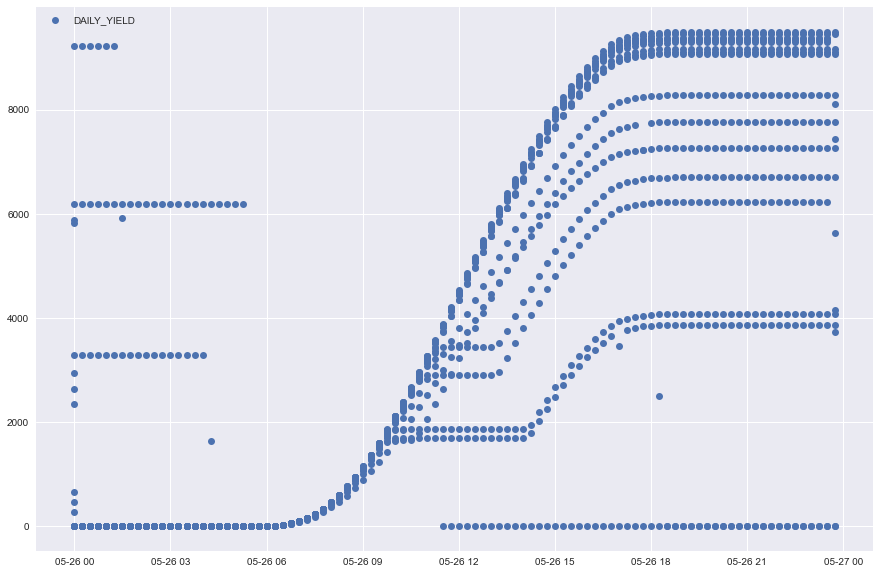

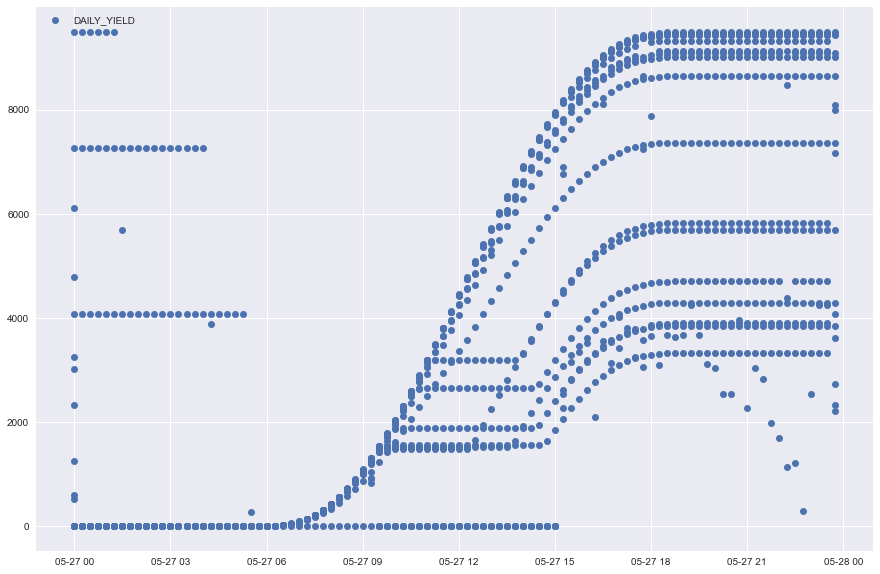

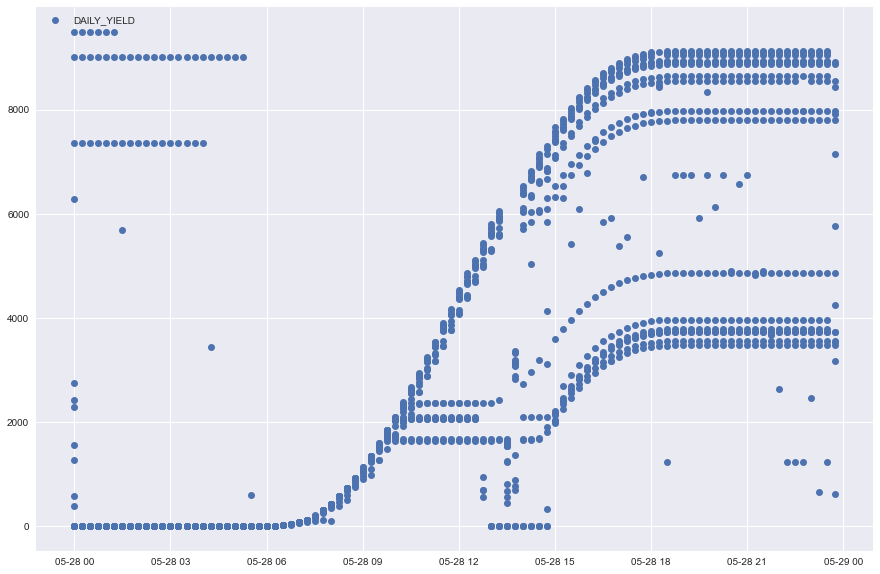

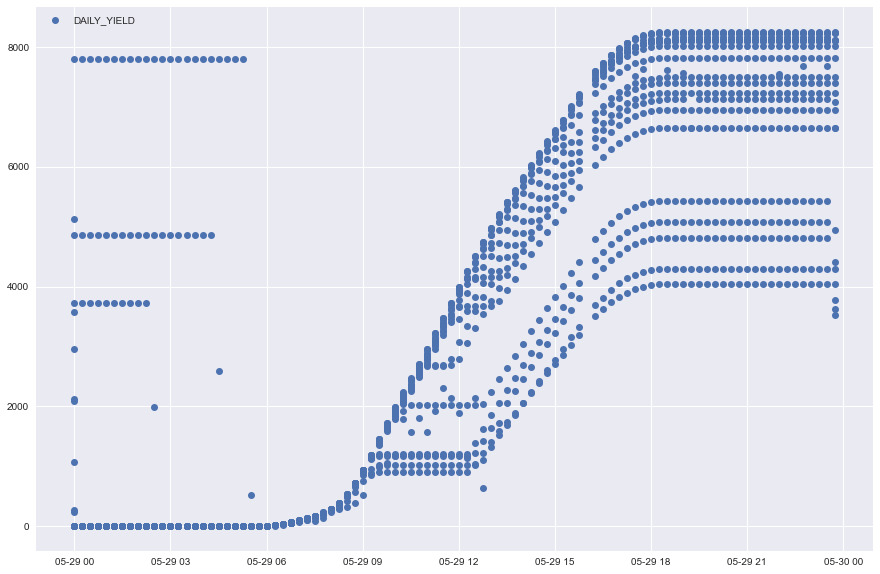

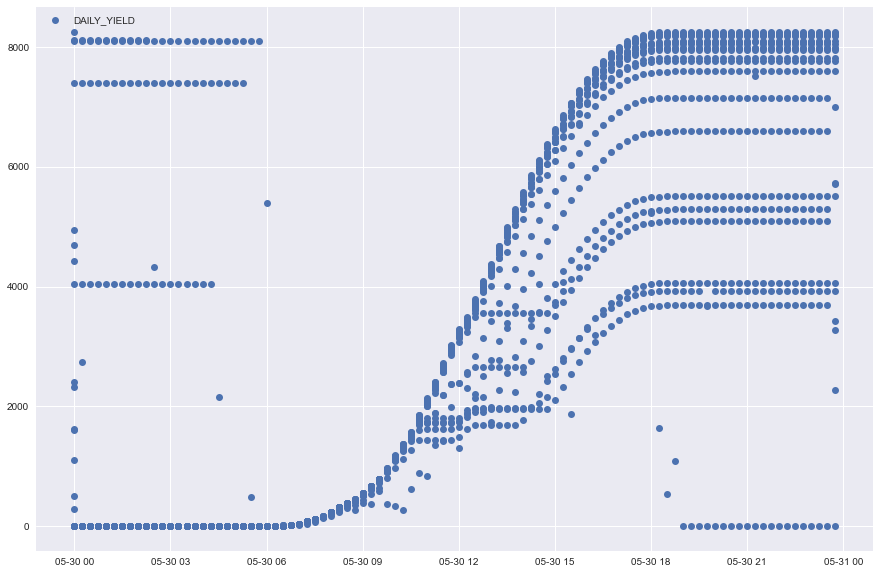

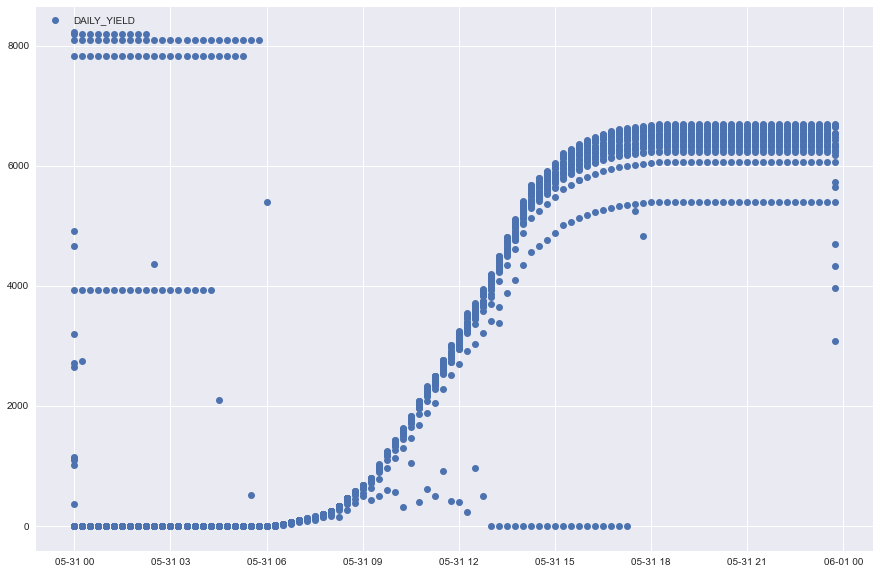

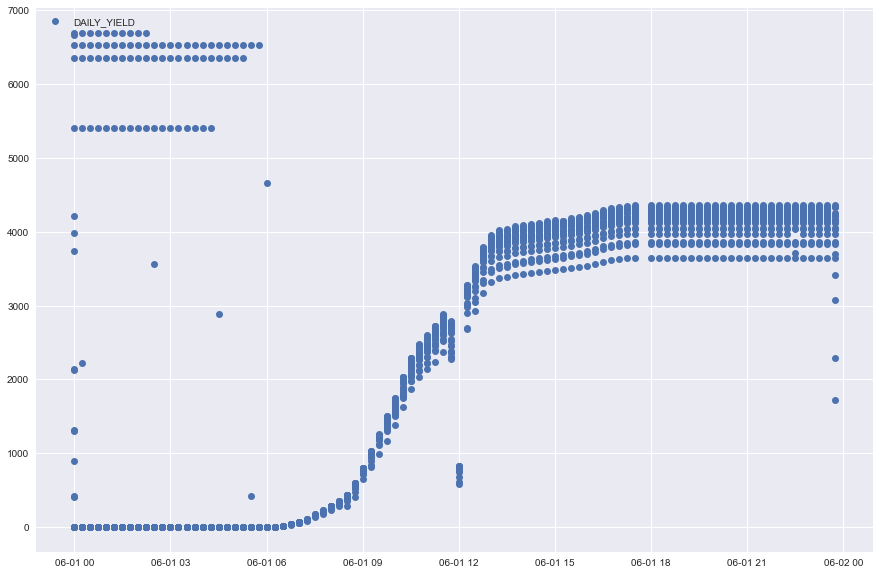

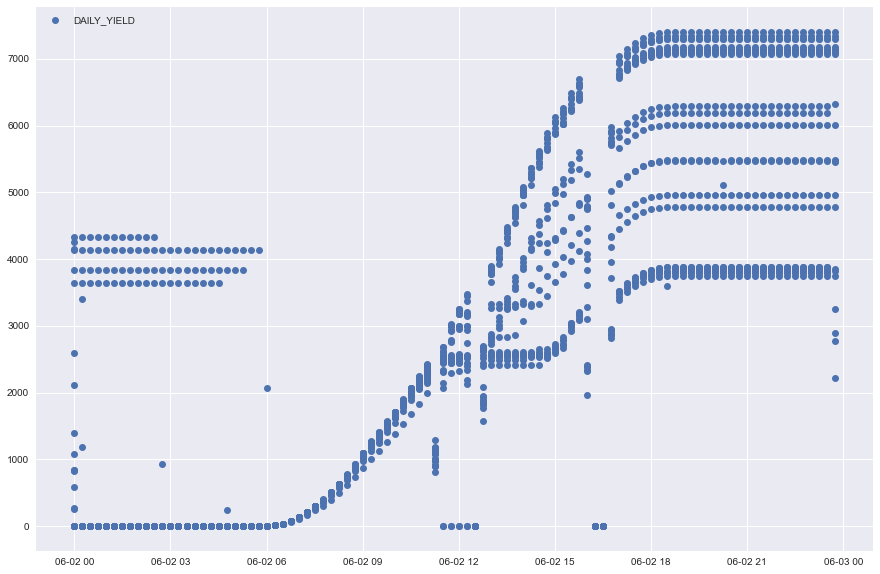

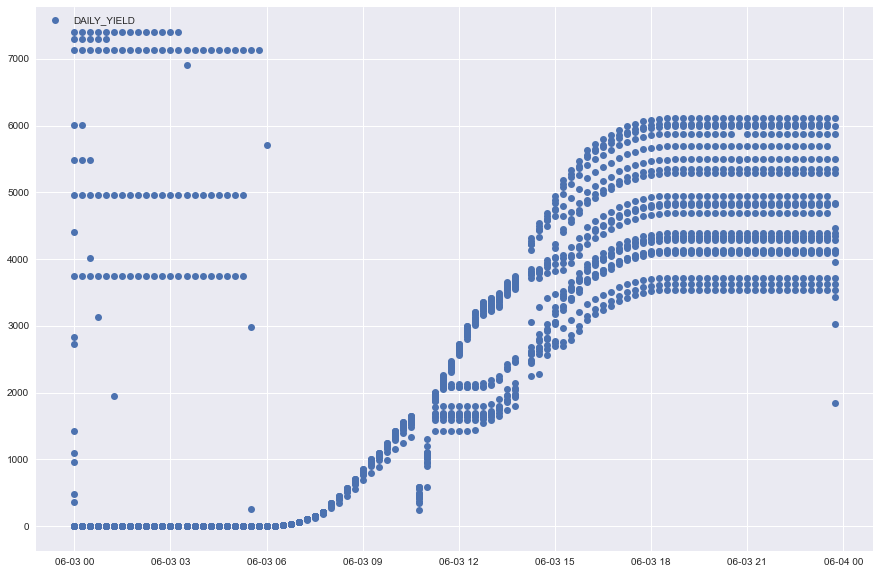

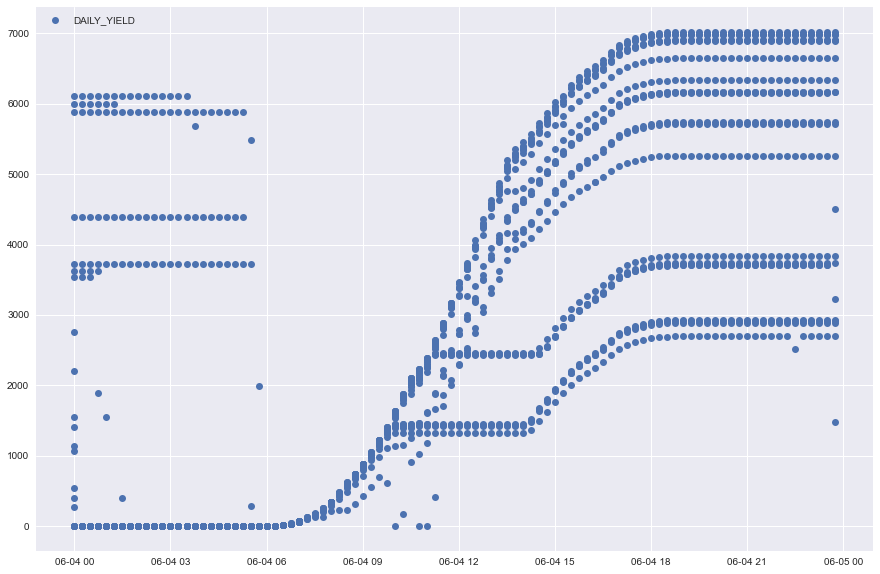

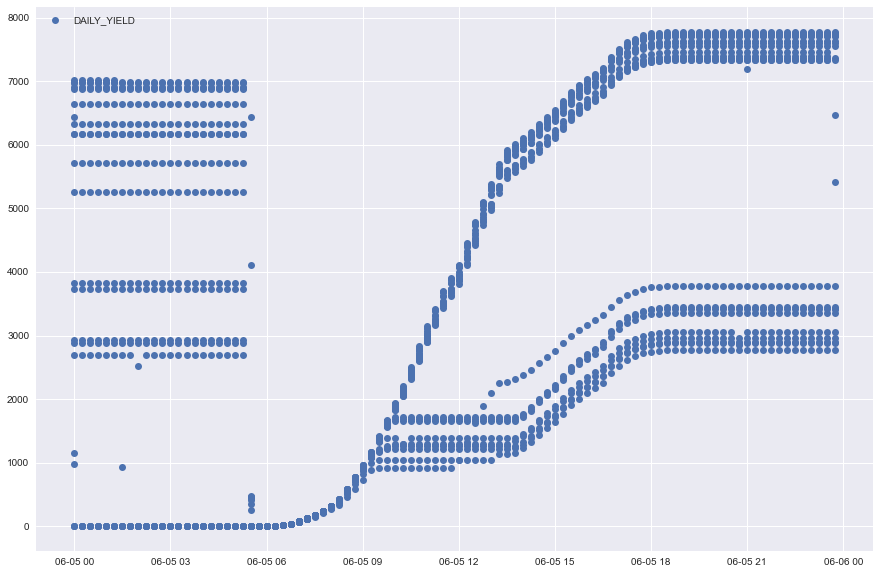

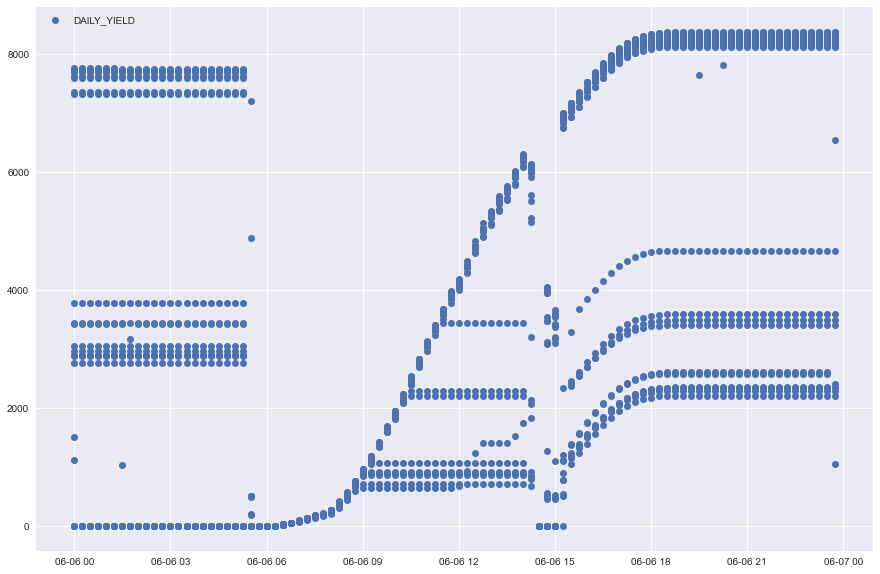

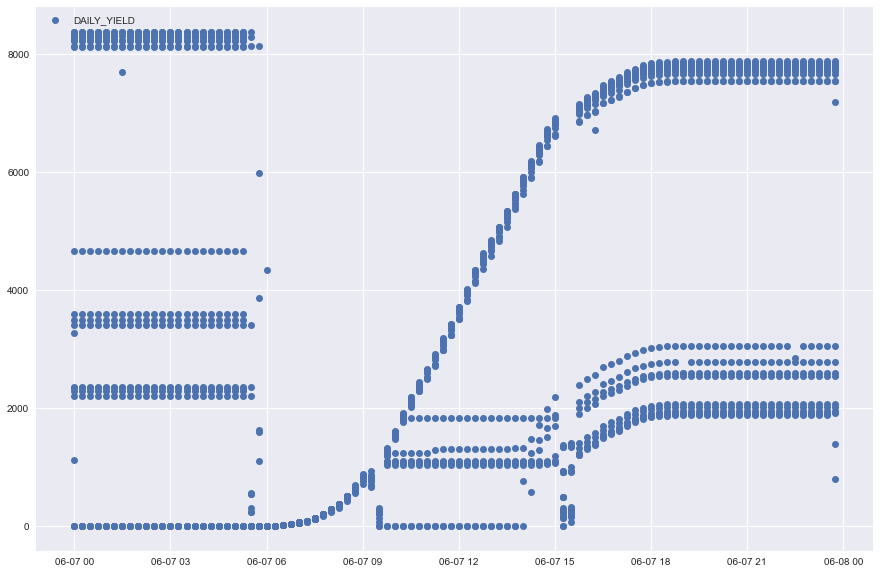

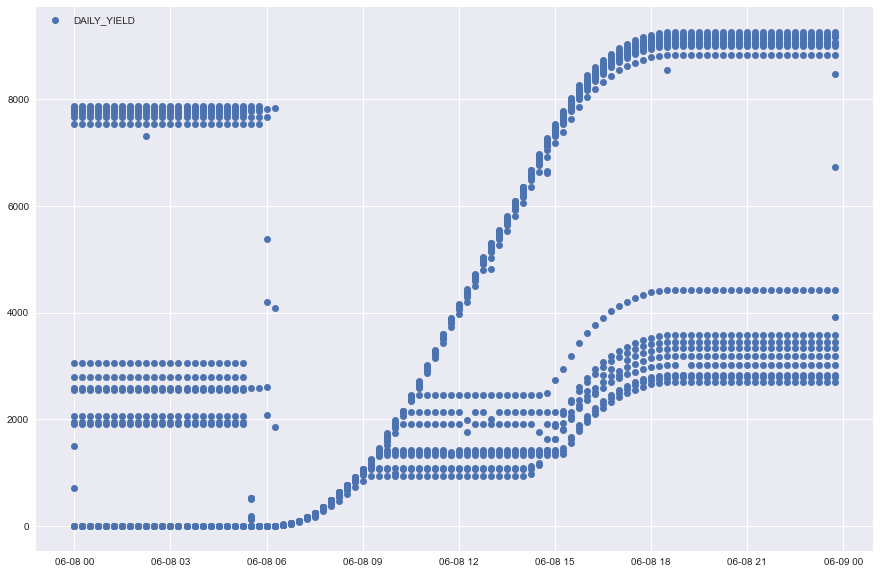

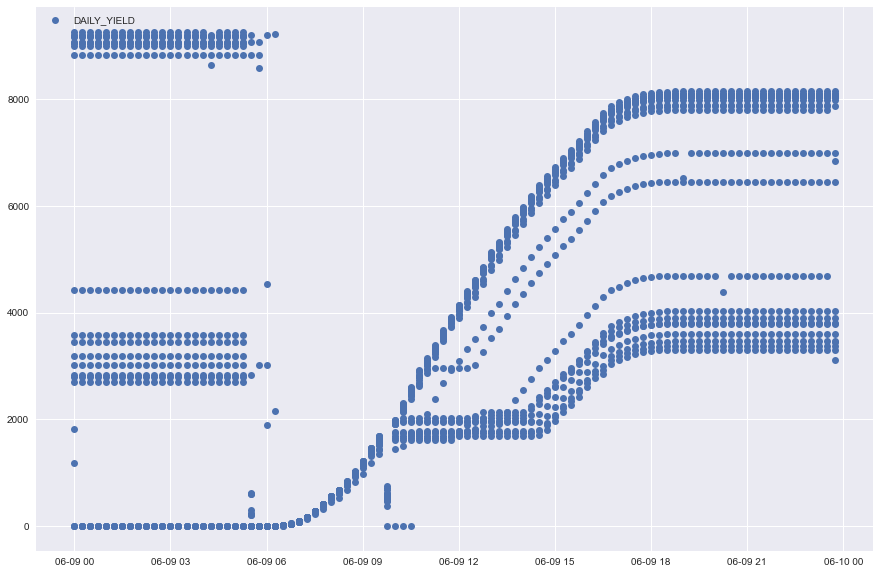

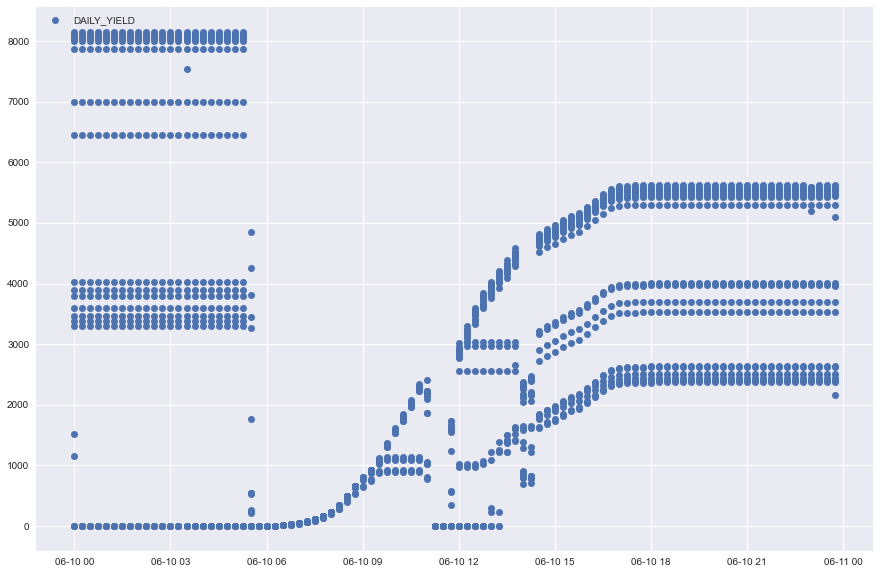

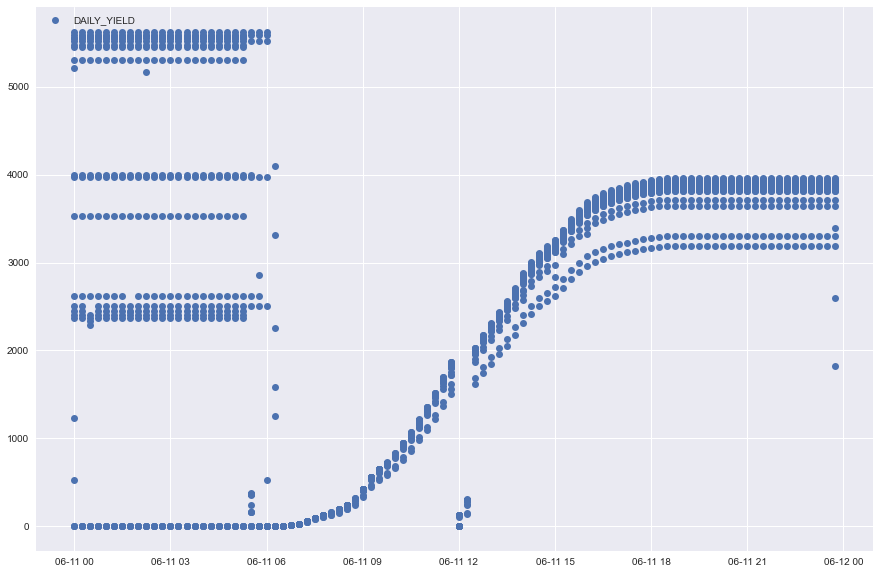

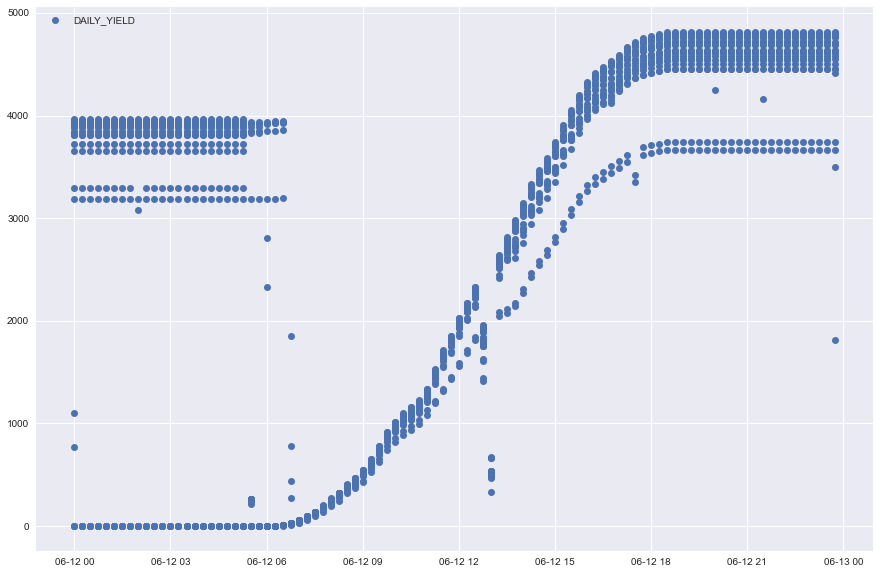

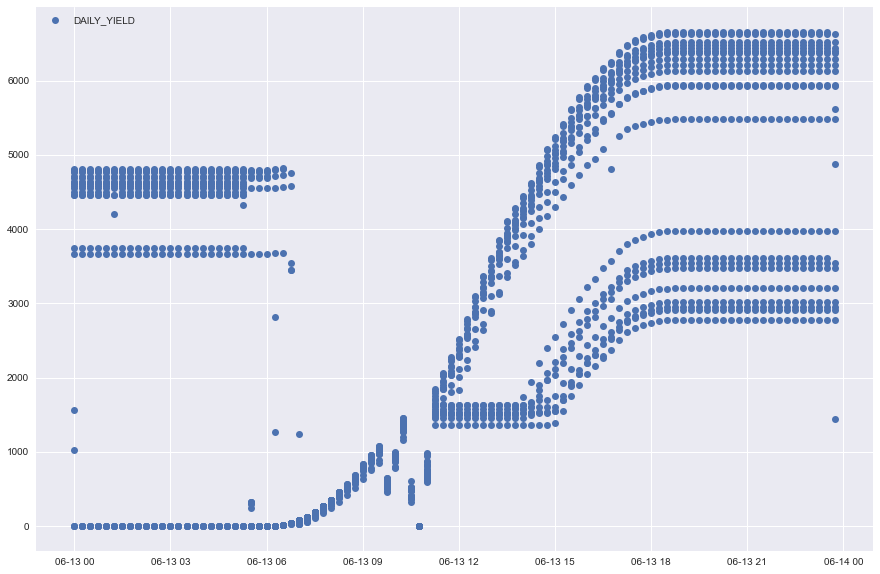

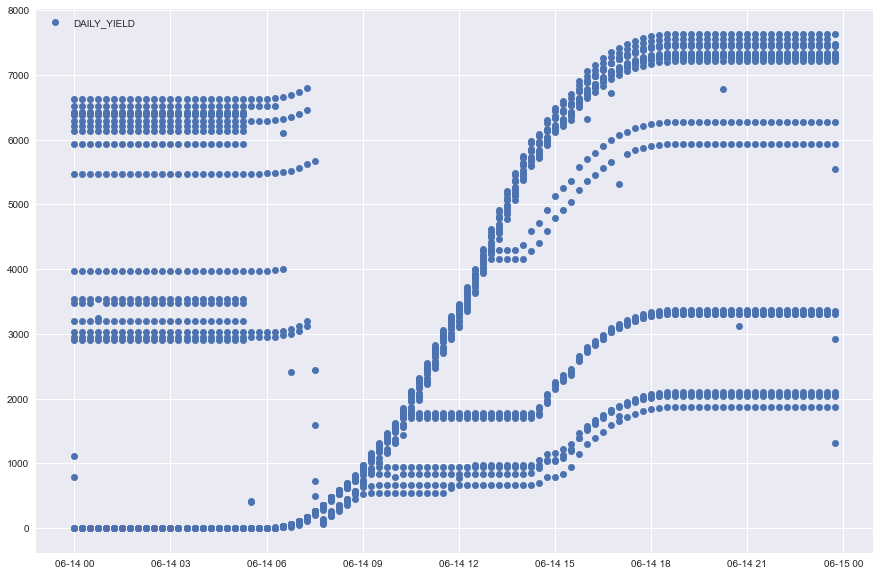

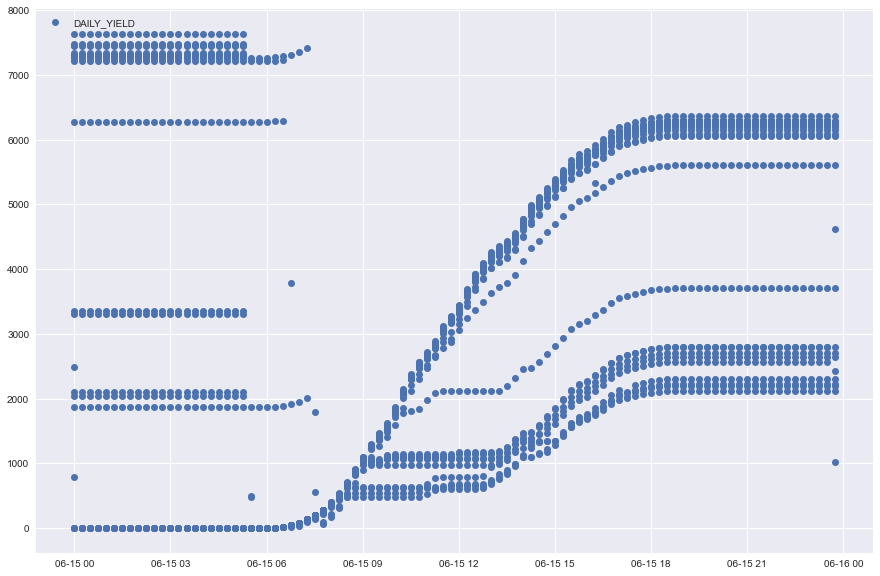

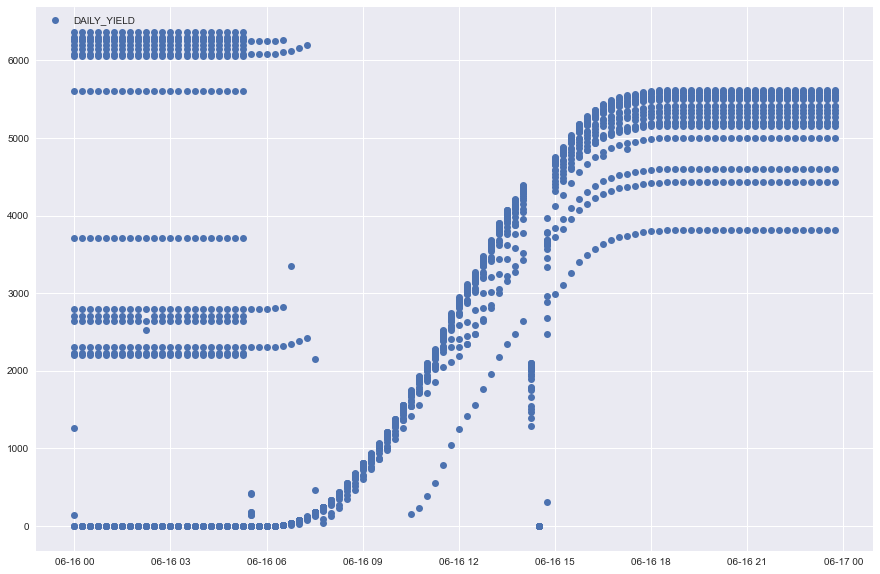

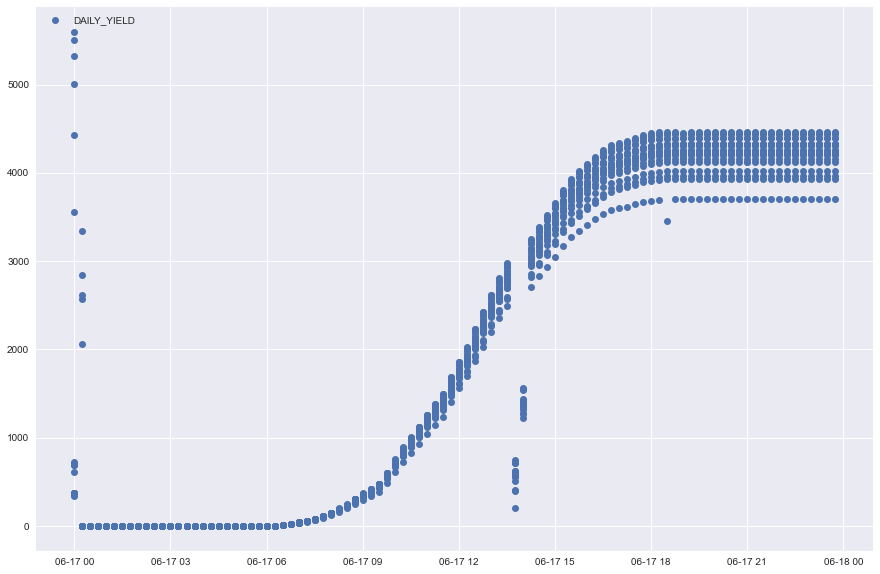

In [15]:
datetime_vs(plant_gen, 'DAILY_YIELD')

## Calculate average daily temperature and total solar irradiance in the day and plot these values against the
daily yield (just the final value in the day) for a number of inverters

Plotting for the 4UPUqMRk7TRMgml source key 


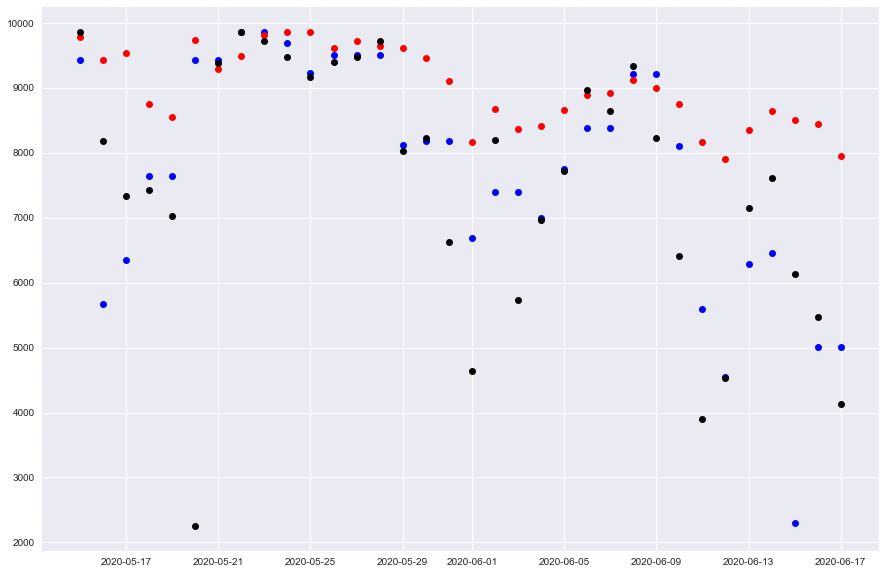

In [16]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    agg_df = merged_df.set_index('DATE_TIME').resample('D').agg({'IRRADIATION': 'sum', 'DAILY_YIELD': 'max', 'AMBIENT_TEMPERATURE': 'mean'})
    agg_df.dropna(inplace=True)
    plt.figure(figsize=(15, 10))
    plt.plot_date(agg_df.index, agg_df['DAILY_YIELD'], color='blue')
    plt.plot_date(agg_df.index, agg_df['AMBIENT_TEMPERATURE'] * (agg_df['DAILY_YIELD'].max() / agg_df['AMBIENT_TEMPERATURE'].max()), color='red')
    plt.plot_date(agg_df.index, agg_df['IRRADIATION'] * (agg_df['DAILY_YIELD'].max() / agg_df['IRRADIATION'].max()), color='black')
    plt.show()